In [1]:
"""
En esta primer celda, importamos las librerías y funciones que necesitamos
Luego, cargamos la base de datos desde el archivo CSV,
y finalmente, creamos las columnas que necesitamos a partir de las ya existentes,
evitando de esta forma la existencia de información redundante en la base original
"""

#Importamos la función display y el modulo Math
from IPython.display import display,Math

#Importamos las librerías que necesitamos, y le asignamos un nombre corto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.font_manager as fnt_mng
import sympy as sym
import numpy as np
import gc
import scipy.stats
import matplotlib.lines as mlines

#Habilitamos el recolector de basura, de manera que podemos optimizar el uso de memoria RAM
gc.enable()

pd.options.display.float_format = '{:.2f}'.format
pd.set_option("display.max_colwidth", 150)

#En primer lugar, importamos la base de datos en formato CSV,
#y con el método de pandas "read_csv", la convertimos en DataFrame

municipios= pd.read_csv(r'base_final_v5.csv', encoding="utf-8")

#Esta línea la incluimos para que en el display, nos imprima todas las filas de la base de datos
pd.set_option('display.max_rows', municipios.shape[0]+1)

#Convertimos las columnas correspondientes a población y superficie en vectores de numpy
#En este caso, serán arrays unidimensionales, con tantos elementos como registros existentes en la base
vector_poblacion=municipios.POBLACION.to_numpy()
vector_superficie=municipios.SUPERFICIE.to_numpy()

#Calculamos el vector densidad, dividiendo el vector población sobre el vector superficie
#Redondeamos el resultado de cada elemento a dos cifras decimales
vector_densidad=(vector_poblacion/vector_superficie).round(2)

#Insertamos una nueva columna en el DataFrame, con los valores del vector
#de densidad generado, y con el nombre "DENSIDAD_HABITACIONAL", en la posición 5

municipios.insert(5, "DENSIDAD_HABITACIONAL", vector_densidad.tolist(), True)

#Convertimos las columnas correspondientes a hogares totales y hogares con NBI en vectores de numpy
vector_hogares_totales = municipios.HOGARES_TOTALES.to_numpy()
vector_hogares_con_nbi = municipios.HOGARES_CON_NBI.to_numpy()

#Hacemos un procedimiento similar al anterior para calcular los valores de las nuevas columnas
vector_hogares_sin_nbi = vector_hogares_totales - vector_hogares_con_nbi
vector_porcentaje_nbi = (vector_hogares_con_nbi/vector_hogares_totales).round(4)*100

#Agregamos las nuevas columnas generadas al DataFrame
municipios.insert(7, "HOGARES_SIN_NBI", vector_hogares_sin_nbi.tolist(), True)
municipios.insert(9, "PORCENTAJE_NBI", vector_porcentaje_nbi.tolist(), True)


#Finalmente, mostramos por pantalla nuestro DataFrame generado en forma de tabla,
#con todos los datos que debemos analizar en este trabajo
display(municipios)
     
#Al final de cada celda, siempre llamamos al recolector de basura
gc.collect()


NOMBRE REGION PERTENENCIA  POBLACION  SUPERFICIE  \
0                   ADOLFO ALSINA    SUR    INTERIOR      17072     5877.86   
1          ADOLFO GONZALES CHAVES    SUR    INTERIOR      12047     3859.16   
2                         ALBERTI  NORTE    INTERIOR      10654     1124.98   
3                 ALMIRANTE BROWN  NORTE         GBA     552902      129.33   
4                       ARRECIFES  NORTE    INTERIOR      29044     1240.67   
5                      AVELLANEDA  NORTE         GBA     342677       52.48   
6                        AYACUCHO    SUR    INTERIOR      20337     6748.90   
7                            AZUL    SUR    INTERIOR      65280     6540.25   
8                    BAHÍA BLANCA    SUR    INTERIOR     301572     2247.49   
9                        BALCARCE    SUR    INTERIOR      43823     4115.27   
10                       BARADERO  NORTE    INTERIOR      32761     1591.87   
11                  BENITO JUÁREZ    SUR    INTERIOR      20239     5071.94   
12                    BERAZATEGUI  NORTE         GBA     324244      221.01   
13                        BERISSO  NORTE    INTERIOR      88470      137.59   
14                        BOLÍVAR    SUR    INTERIOR      34190     4912.16   
15                        BRAGADO    SUR    INTERIOR      41336     2211.87   
16                       BRANDSEN  NORTE    INTERIOR      26367     1126.02   
17                       C.A.B.A.  NORTE         GBA    2890151      204.00   
18                        CAMPANA  NORTE    INTERIOR      94461      954.54   
19          CAÑUELAS (Máximo Paz)  NORTE         GBA       7311       14.00   
20            CAÑUELAS (Interior)  NORTE    INTERIOR      44581     1175.30   
21              CAPITÁN SARMIENTO  NORTE    INTERIOR      14494      548.89   
22                 CARLOS CASARES    SUR    INTERIOR      22237     2520.39   
23                 CARLOS TEJEDOR    SUR    INTERIOR      11570     3910.74   
24                CARMEN DE ARECO  NORTE    INTERIOR      14692     1061.31   
25                       CASTELLI    SUR    INTERIOR       8205     2063.19   
26                      CHACABUCO  NORTE    INTERIOR      48703     2287.38   
27                      CHASCOMÚS  NORTE    INTERIOR      42277     4163.19   
28                      CHIVILCOY  NORTE    INTERIOR      64185     2057.09   
29                          COLÓN  NORTE    INTERIOR      24890      994.57   
30   CORONEL DE MARINA L. ROSALES    SUR    INTERIOR      62152     5831.50   
31                CORONEL DORREGO    SUR    INTERIOR      15825     1622.60   
32               CORONEL PRINGLES    SUR    INTERIOR      22933     5257.14   
33                 CORONEL SUÁREZ    SUR    INTERIOR      38320     6006.83   
34                       DAIREAUX    SUR    INTERIOR      16889     3827.47   
35                        DOLORES    SUR    INTERIOR      27042     1973.14   
36                       ENSENADA  NORTE    INTERIOR      56729       99.93   
37                        ESCOBAR  NORTE         GBA     213619      303.75   
38             ESTEBAN ECHEVERRÍA  NORTE         GBA     300959      120.22   
39          EXALTACIÓN DE LA CRUZ  NORTE    INTERIOR      29805      634.17   
40                         EZEIZA  NORTE         GBA     163722      236.81   
41               FLORENCIO VARELA  NORTE         GBA     426005      189.90   
42            FLORENTINO AMEGHINO    SUR    INTERIOR       8869     1808.55   
43               GENERAL ALVARADO    SUR    INTERIOR      39594     1614.35   
44                 GENERAL ALVEAR    SUR    INTERIOR      11130     3384.08   
45               GENERAL ARENALES  NORTE    INTERIOR      14903     1482.64   
46               GENERAL BELGRANO    SUR    INTERIOR      17365     1843.21   
47                  GENERAL GUIDO    SUR    INTERIOR       2816     2329.91   
48         GENERAL JUAN MADARIAGA    SUR    INTERIOR      19747     2978.29   
49              GENERAL LA MADRID    SUR    INTERIOR      10783     4811.37  

0

In [2]:
"""
En esta segunda celda, definimos funciones personalizadas que no tenemos en ninguna librería,
que nos resultarán útiles para nuestro trabajo, como también algunas constantes que utilizaremos
intensivamente a lo largo del mismo
"""

sym.interactive.printing.init_printing(fontsize='2pt')

#Esta función nos permite imprimir una secuencia con un formato mas
#ameno para su visualización, mostrando dos cifras decimales para cada elemento
def formatear(A):
    form = []
    for item in A:
        form.append("%.2f"%item)

    display(Math(sym.latex(sym.sympify(form))))

#En la constante 'AGRUPAMIENTO', definimos la cantidad de intervalos en los que subdividiremos
#la población estadística (nos referimos a la cantidad de registros, no a la cantidad de habitantes),
#para realizar el análisis correspondiente.
#Se da la casualidad de que, convenientemente, tenemos un total de 141 registros en nuestra
#base de datos, siendo dicha cantidad un cuadrado perfecto de 12, por lo que este último valor
#nos resulta ideal para realizar dicho agrupamiento.
#Como cuestión importante, este valor determina la cantidad de delimitaciones de los intervalos,
#por lo cual la cantidad de intervalos corresponderá a esta cantidad menos 1.
#Esto es, si tenemos 12 delimitadores, entonces tendremos 11 intervalos.
AGRUPAMIENTO=12

#Esta función recibe como parámetro en 'columna' una columna de N observaciones, y
#en 'bins' la cantidad de delimitaciones de intervalos de clase, en las que categorizamos dichas observaciones.
#Devuelve tanto una lista de intervalos, con su frecuencia correspondiente en cada uno de sus elementos,
#como un array de divisiones, el cual define los límites de cada intervalo
def intervalos(columna,bins):
    #En cant_reg me guardo la cantidad de registros de la columna
    #cant_reg=columna.count()
    #En max_valor obtengo el máximo valor del elemento de dicha columna
    max_valor=columna.max()
    
    #Me genero un vector de divisiones, con una cantidad de elementos igual
    #a la cantidad de intervalos de clase mas 1, cuyos valores
    #irán desde 0 hasta el máximo valor del conjunto,
    #subdivididos linealmente
    divisiones=np.linspace(0,max_valor,bins).tolist()

    #Me genero un array con tantos elementos como intervalos de clase,
    #inicialmente cargado con ceros
    array_intervalos=np.zeros(bins-1)
    
    #Recorro con un for, del cual necesito los índices, comenzado desde 1, el vector de divisiones
    #con la variable i, de forma que puedo ir recorriendo los intervalos de clase
    for i in range(1,bins):
        #Declaro una variable, que se reiniciará a 0 en cada iteración
        #del for de primer orden, donde contaré las muestras de la
        #columna que se ubican dentro de cada rango
        cont_muestras=0
        
        #Con otro for anidado, recorro cada elemento de la columna
        for elemento in columna:
            
            #Si el elemento en el que estoy parado ahora, se encuentra
            #en el intervalo de clase que estoy recorriendo
            if elemento > divisiones[i-1] and elemento <= divisiones[i]:
                #Incremento el contador de muestras
                cont_muestras+=1
        
        #Una vez ejecutado el for anidado, cargo en la posicion i-1
        #de mi array de intervalos de clase, la cantidad de muestras
        #que conté en el rango correspondiente
        array_intervalos[i-1]=cont_muestras
        
    #Una vez ejecutados los for anidaos, tengo el array de intervalos
    #cargado con los valores correspondientes
    
    #Lo convierto en una lista
    lista_intervalos=array_intervalos.tolist()
    
    #Devuelvo una tupla con la lista de intervalos y las divisiones
    return (lista_intervalos, divisiones)

#Esta función recibe una lista de frecuencias y divisiones,
#generadas previamente con la función 'intervalos', como también un string
#con la unidad correspondiente,y devuelve un DataFrame de Pandas con la
#tabla de intervalos formateada
def tabla_intervalos(lista_frecuencias, divisiones, unidad=" "):
    #En cant_reg me guardo la cantidad total de frecuencias
    cant_reg=sum(lista_frecuencias)
    
    #En 'bins' me guardo la cantidad total de los límites de los intervalos
    bins=len(divisiones)
    
    #En 'tabla' me genero una lista, inicialmente vacía, que a su vez
    #contendrá otras listas, cada una de ellas con los valores correspondientes de
    #intervalo, frecuencia absoluta, y frecuencia relativa
    tabla=[]
    
    #Recorro con un for las índices de las divisiones de intervalos
    for i in range(1,bins):
        #Genero un string con los valores del intervalo, indicando su límite inferior y superior
        limites_intervalo= "(  " + str(round(divisiones[i-1],2)) + "  :  " + str(round(divisiones[i],2)) + "  ]"
        #Me guardo en una variable la frecuencia absoluta de dicho intervalo para la variable analizada correspondiente
        frec_abs=lista_frecuencias[i-1]
        #Calculo la frecuencia relativa de dicha variable analizada,
        #y me guardo en otra variable, un string formateado con dicho valor
        frec_rel='% {p:.2f}'.format(p=(frec_abs/cant_reg)*100)
        #Agrego a la lista 'tabla', una lista con los tres valores que obtuve
        tabla.append([limites_intervalo,frec_abs,frec_rel])
    
    #Luego de recorrer el for, ya tengo la tabla de intervalos construido
    
    #Convierto la tabla (en forma de lista de listas), a un DataFrame de Pandas,
    #al que le agrego el nombre correspondiente de cada columna
    tabla_df=pd.DataFrame(tabla,columns=["Intervalo " + unidad, "Frecuencia Absoluta", "Frecuencia Relativa"])
    
    #Devuelvo el DataFrame
    return tabla_df
        
    
#Esta función recibe como parámetro en 'columna' una columna de N observaciones, y
#en 'bins' la cantidad de delimitaciones de intervalos de clase, en las que categorizamos dichas observaciones.
#Devuelve la moda aproximada calculada para dicha columna, de acuerdo
#a la cantidad de intervalos de clase (el valor de 'bins' - 1) en los que agrupamos la muestra
def moda(columna,bins):
    
    #A partir de la función 'intervalos', a la que le paso los parámetros
    #recibidos, obtengo las secuencias con los valores que necesito para calcular la moda   
    lista_intervalos,divisiones= intervalos(columna,bins)
    
    #De la lista de intervalos, me guardo el índice correspondiente
    #a su valor máximo. Esta será la posición de nuestro intervalo modal (donde se encuentra la moda)
    ind_max_val = lista_intervalos.index(max(lista_intervalos))
     
    
    #El límite inferior del intervalo modal será el elemento del array
    #de subdivisiones cuyo índice sea igual al del mayor elemento de la
    #lista de intervalos
    
    limite_inferior=divisiones[ind_max_val]
    
    #Los valores 'a' y 'b' representan:
    #a: Diferencia entre la altura del intervalo modal, y la del intervalo anterior
    #b: Diferencia entre la altura del intervalo modal, y la del intervalo posterior
    #Como se calcularan en base a la posicion del intervalo modal, dependiendo de si el
    #mismo está situado en un extremo o en el centro de la lsita,necesitamos tenerlos por
    #fuera del scope del if, por lo que los declaramos aqui con valor 0
    a=0
    b=0
    
    #El valor de c, nos dará siempre la amplitud del intervalo modal (como de cualquier otro)
    c=divisiones[ind_max_val+1] - divisiones[ind_max_val]
    
    #Calculamos el valor de a, dependiendo de si el intervalo modal
    #es el que está a la izquierda de todos, o no
    if ind_max_val > 0:
        a=lista_intervalos[ind_max_val] - lista_intervalos[ind_max_val-1]
    else:
        a=lista_intervalos[ind_max_val]
    
    #Calculamos el valor de b, dependiendo de si el intervalo modal
    #es el que está a la derecha de todos, o no
    if ind_max_val < (bins-1):
        b=lista_intervalos[ind_max_val] - lista_intervalos[ind_max_val+1]
    else:
        b=lista_intervalos[ind_max_val]     
    
    #Una vez obtenidos todos los valores, los aplicamos en la formula de la moda
    #y el resultado lo guardamos en una variable
    
    moda= limite_inferior + (a/(a+b))*c
    
    #Finalmente, devolvemos el valor de la moda calculado
    return moda

#Definimos una función, 'make_autopct', que utilizaremos para formatear los porcentajes mostrados en los gráficos de torta
#Esta función, recibe en el parámetro 'values', una lista con los valores absolutos a mostrar en las etiquetas
#Devuelve a su vez, otra función
def make_autopct(values):
    #Dentro de la funcion, definimos una función anidada,
    #la cual recibe en el parámetro 'pct', el valor de porcentaje
    #sobre el total de los valores pasados a la función de orden superior
    def my_autopct(pct):
        #Primero, calculamos el total de los valores recibidos
        total = sum(values)
        #Luego, calculamos el valor que corresponde
        #a dicho porcentaje, respecto del total calculado
        val = int(round(pct*total/100.0))
        
        #Si dicho valor es 0, devolvemos un string con un espacio
        if val == 0:
            return ' '
        #De lo contrario, devolvemos un string con
        #el porcentaje y el valor, con el formato correspondiente
        else:
            return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

#Definimos otra función similar a la anterior, solo que en este caso,
#la función anidada solo devolverá el porcentaje, y no el
#valor correspondiente al mismo
def make_autopct2(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if val == 0:
            return ' '
        else:
            return '{p:.2f}%'.format(p=pct)
    return my_autopct


#Definimos los parámetros necesarios utilizados por las funciones que nos permitirán
#mostrar algunas tablas con el formato deseado

cell_hover = {  
    'selector': 'td:hover',
    'props': [('background-color', '#black')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal; width:2000px'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white; width: 1000px ;text-align : center'
}
th = {
    'selector': 'th,td',
    'props': 'width: 1000px'
}

table = {
    'selector': 'table',
    'props': 'table-layout: fixed'
}


#Definimos una función que nos permite presentar los resultados de los análisis univariados con el formato deseado
#Recibe como parámetro un DataFrame de Pandas, el cual contiene la tabla original sin formatear
def formatear_tabla_uni(tabla):
    #Creamos una lista, inicialmente vacía, que contendrá los diccionarios
    #que necesitamos para construir la tabla formateada
    lista_dict=[]
    #Creamos una lista con las variables correspondientes, que representan los
    #nombres cortos de las filas de la tabla
    variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']
    #Recorremos la lista con un for
    for variable in variables:
        #Creamos un diccionario con los valores de la fila
        #de la tabla en donde estamos parados
        dic=tabla.loc[variable].to_dict()
        #Agregamos el diccionario creado a la lista de diccionarios
        lista_dict.append(dic)
    
    #Una vez terminado el ciclo for, ya tenemos la lista de diccionarios
    #cargada con los valores necesarios
    
    #Configuramos el ancho máximo de las columnas
    pd.set_option("display.max_colwidth", 100)

    #Creamos una nueva variable, inicialmente con los valores
    #originales de la lista de diccionarios
    lista_dict_form=lista_dict
    #Creamos un nuevo diccionario, asociando el nombre corto de cada columna
    #de la tabla original, con el texto que mostraremos en la tabla formateada
    columnas_form={
                'count' : 'Cantidad de observaciones',
                'mean' : 'Media',
                'std' : 'Desvío estandar',
                'min' : 'Mínimo (Perc %0)',
                '25%' : '1er Cuartil (Perc %25)',
                '50%' : 'Mediana (Perc %50)',
                '75%' : '3er Cuartil (Perc %75)',
                'max' : 'Máximo (Perc %100)',
                'moda' : 'Moda',
                'coef_var':'Coef. de Variación',
                'asim': 'Asimetría',
                'curt' : 'Curtosis'
            }

    #En nuestra lista de diccionarios formateada, reemplazamos cada nombre corto
    #de cada columna, con el que definimos en el diccionario creado previamente
    #con los nombres a mostrar en la tabla formateada
    for dic in lista_dict_form:
        for nombre_viejo, nombre_nuevo in columnas_form.items():
            dic[nombre_nuevo] = dic.pop(nombre_viejo)

    #Luego, generamos una lista de índices, cada uno correspondiente al nombre
    #de cada fila a mostrar en la tabla formateada
    filas_form=["Población (hab)","Superficie (km^2)","Densidad Habitacional (hab/km^2) ","% Hogares NBI"]

    #Generamos un DataFrame de Pandas con la tabla formateada, a partir de la lista
    #de diccionarios con los nuevos nombres de columnas ya reemplazados,
    #y la lista de índices con los nuevos nombres de las filas
    tabla_uni_form = pd.DataFrame.from_records(lista_dict_form,index=filas_form)


    #Aplicamos a la tabla formateada generada recien, los parámetros definidos
    #anteriomente en la celda, con los estilos deseados
    tabla_uni_form=tabla_uni_form.style.set_table_styles([cell_hover, index_names, headers,th,table]).set_properties(**{
                                'background-color': 'blue',
                                'justify-content' : 'left',
                                'color': 'lawngreen',
                               'border-color': 'white'}
                            )
    #Finalmente, mostramos por pantalla la tabla formateada
    display(tabla_uni_form) 

#Definimos una función que nos permite presentar los resultados de los análisis bivariados con el formato deseado
#Recibe como parámetro un DataFrame de Pandas, el cual contiene la tabla original sin formatear
def formatear_tabla_bi(tabla):
    #Creamos una lista, inicialmente vacía, que contendrá los diccionarios
    #que necesitamos para construir la tabla formateada
    lista_dict=[]
    
    #Creamos una lista con las variables correspondientes, que representan los
    #nombres cortos de las filas de la tabla
    variables=['POB/SUP', 'DENS/NBI']
    
    #Recorremos la lista con un for
    for variable in variables:
        #Creamos un diccionario con los valores de la fila
        #de la tabla en donde estamos parados
        dic=tabla.loc[variable].to_dict()
        #Agregamos el diccionario creado a la lista de diccionarios
        lista_dict.append(dic)
    
    #Una vez terminado el ciclo for, ya tenemos la lista de diccionarios
    #cargada con los valores necesarios
    
    #Configuramos el ancho máximo de las columnas
    pd.set_option("display.max_colwidth", 100)

    #Creamos una nueva variable, inicialmente con los valores
    #originales de la lista de diccionarios
    lista_dict_form=lista_dict
    
    #Creamos un nuevo diccionario, asociando el nombre corto de cada columna
    #de la tabla original, con el texto que mostraremos en la tabla formateada
    columnas_form={
                'cov' : 'Covarianza',
                'reg' : 'Coef. de regresion',
                'pearson' : 'Coef. de correlación de Pearson'
            
            }
    
    #En nuestra lista de diccionarios formateada, reemplazamos cada nombre corto
    #de cada columna, con el que definimos en el diccionario creado previamente
    #con los nombres a mostrar en la tabla formateada
    for dic in lista_dict_form:
        for nombre_viejo, nombre_nuevo in columnas_form.items():
            dic[nombre_nuevo] = dic.pop(nombre_viejo)

    #Luego, generamos una lista de índices, cada uno correspondiente al nombre
    #de cada fila a mostrar en la tabla formateada
    filas_form=['Población / Superficie', 'Densidad habitacional / %NBI']

    #Generamos un DataFrame de Pandas con la tabla formateada, a partir de la lista
    #de diccionarios con los nuevos nombres de columnas ya reemplazados,
    #y la lista de índices con los nuevos nombres de las filas
    tabla_bi_form = pd.DataFrame.from_records(lista_dict_form,index=filas_form)



    #Aplicamos a la tabla formateada generada recien, los parámetros definidos
    #anteriomente en la celda, con los estilos deseados
    tabla_bi_form=tabla_bi_form.style.set_table_styles([cell_hover, index_names, headers,th,table]).set_properties(**{
                                'background-color': 'blue',
                                'justify-content' : 'center',
                                'text-align' : 'center',
                                'color': 'lawngreen',
                               'border-color': 'white'}
                            )
    #Finalmente, mostramos por pantalla la tabla formateada
    display(tabla_bi_form)  
    
gc.collect()

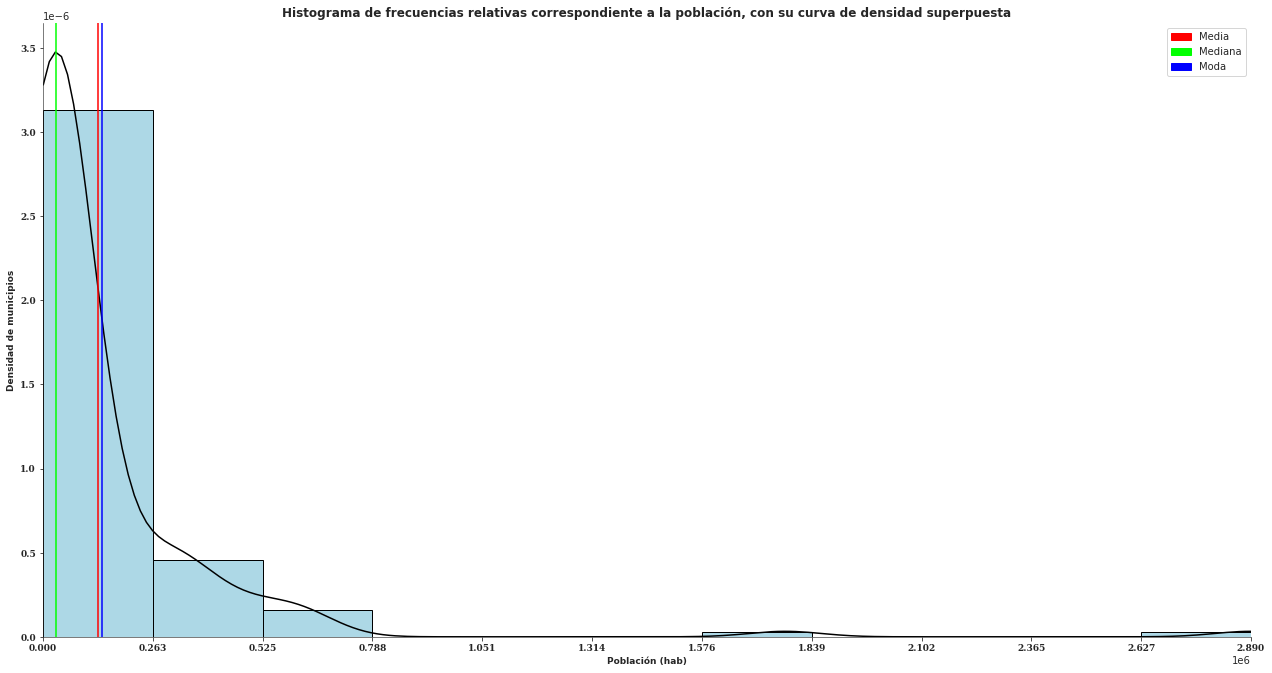

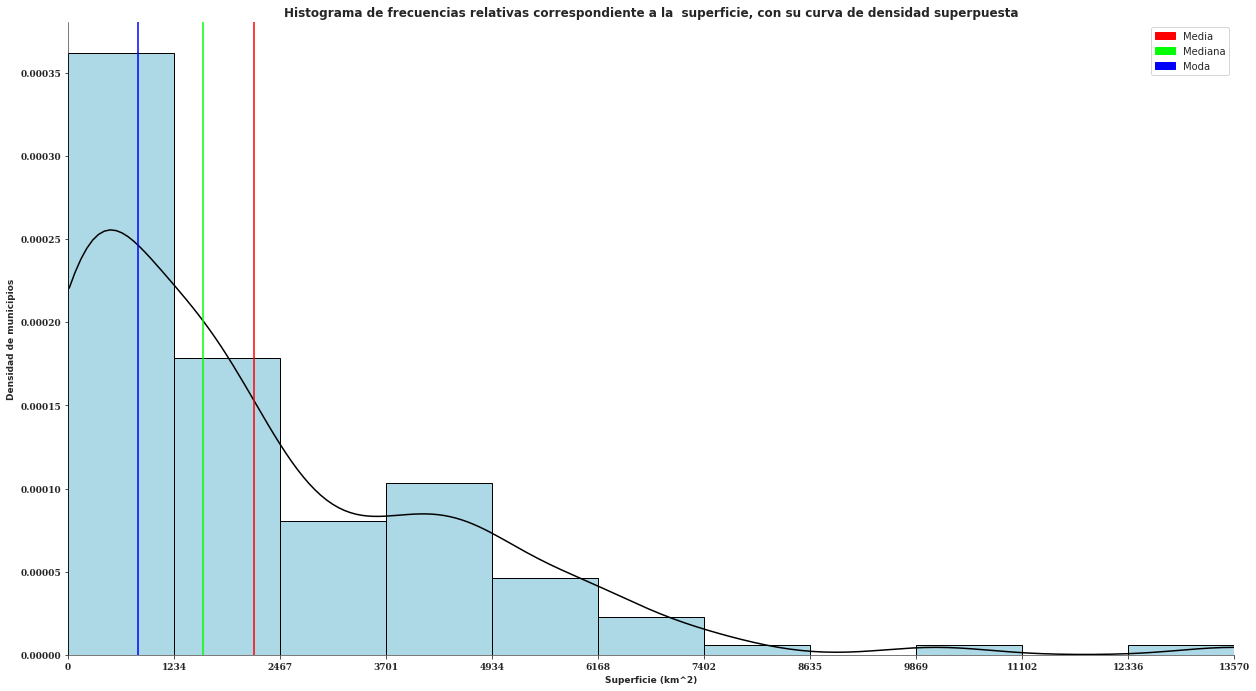

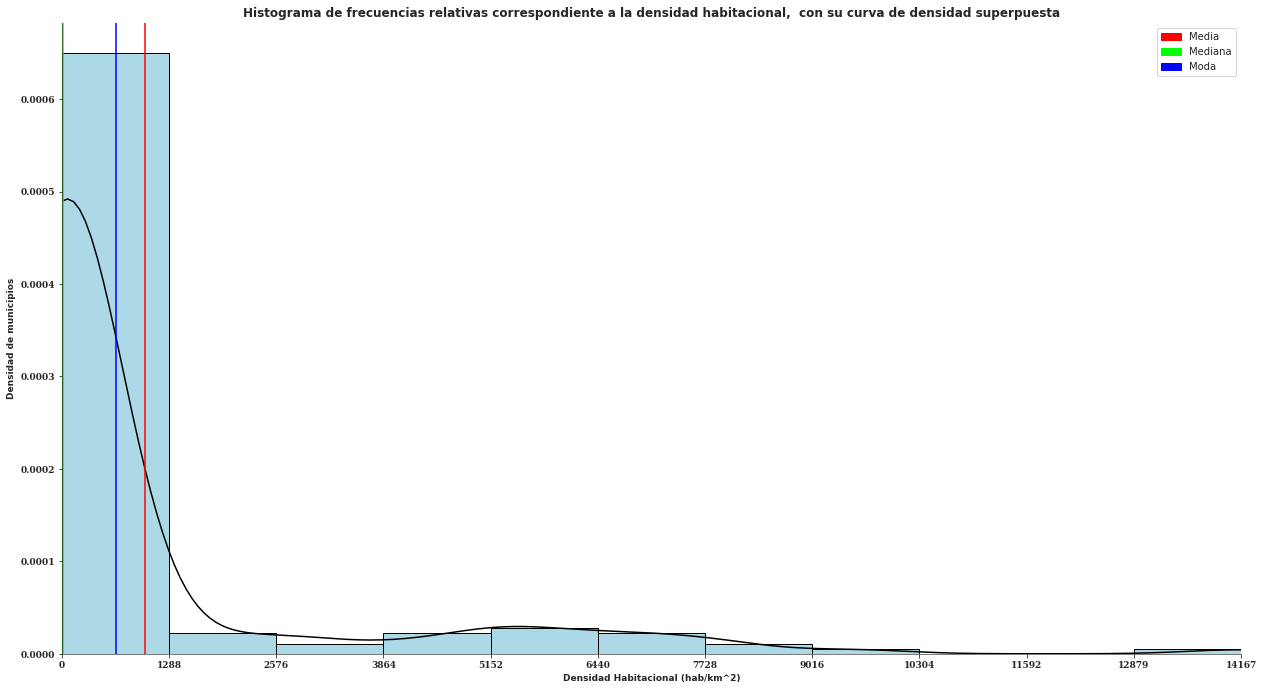

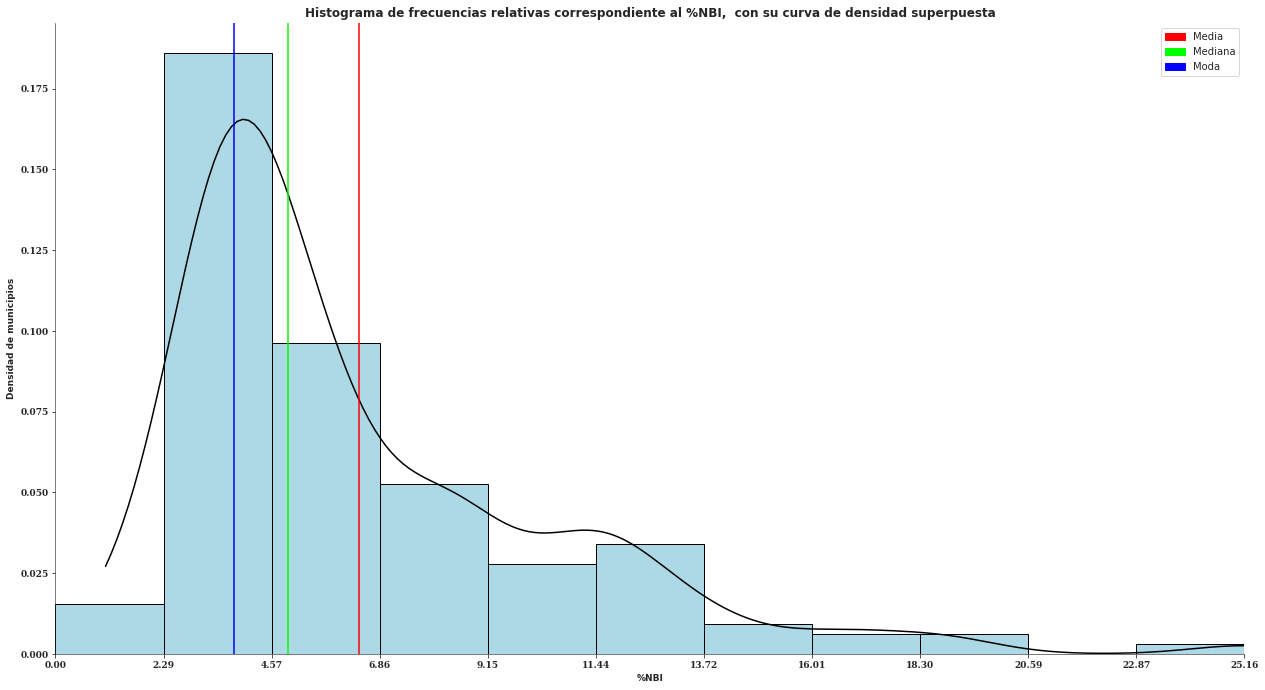

In [3]:
"""
En esta celda, analizaremos gráficamente, las columnas correspondientes a las siguientes variables:
- Población
- Superficie
- Densidad Habitacional
- Porcentaje de viviendas con NBI

Lo haremos traves de un histograma de densidad, al que le superpondremos su correspondiente gráfico de densidad (KDE),
y sobre el mismo gráfico, las líneas correspondientes a los valores de media, mediana y moda.

En el histograma de densidad, obtenemos la frecuencia relativa de cada rango analizado,
de manera que el total de la suma del área de cada una de las columnas, valdrá 1
""";

#Elegimos un ancho de banda común, para la generación de la curva de densidad estimada
#para cada variable analizada de la tabla
ANCHO_BANDA=0.75

#Creamos etiquetas colores diferentes para la media, mediana y la moda,
#para mostrar en la leyenda de los gráficos
ref_media = mpatches.Patch(color='red', label='Media')
ref_mediana = mpatches.Patch(color='lime', label='Mediana')
ref_moda = mpatches.Patch(color='blue', label='Moda')

#Creamos una lista con dichas etiquetas definidas
etiquetas=[ref_media,ref_mediana,ref_moda]

#Creamos una lista con las variables a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']

#Creamos un diccionario con los titulos a mostrar en cada gráfico,
#correspondientes a cada variable
titulos={
            'POBLACION':'Histograma de frecuencias relativas correspondiente a la población, con su curva de densidad superpuesta',
            'SUPERFICIE': 'Histograma de frecuencias relativas correspondiente a la  superficie, con su curva de densidad superpuesta',
            'DENSIDAD_HABITACIONAL' : 'Histograma de frecuencias relativas correspondiente a la densidad habitacional,  con su curva de densidad superpuesta',
            'PORCENTAJE_NBI' : 'Histograma de frecuencias relativas correspondiente al %NBI,  con su curva de densidad superpuesta'
        }

#Creamos un diccionario con las etiquetas del eje X a mostrar en cada gráfico,
#correspondientes a cada variable
xlabels={
            'POBLACION':'Población (hab)',
            'SUPERFICIE': 'Superficie (km^2)',
            'DENSIDAD_HABITACIONAL' : 'Densidad Habitacional (hab/km^2)',
            'PORCENTAJE_NBI' : '%NBI'
        }

#Definimos el estilo de fuente a mostrar para los indicadores
#de los valores mostrados en el gráfico
fuente=fnt_mng.FontProperties(family=['serif'],weight=700,size=9)

#Recorremos la lista de variables con un for
for variable in variables:
    #Nos guardamos en una variable (de Python), el resultado
    #de la función 'intervalos' aplicada a la variable analizada
    res_intervalos=intervalos(municipios[variable],AGRUPAMIENTO)
    
    #Configuramos el estilo del gráfico en 'ticks' (solamente nos mostrará las
    #marcas en los ejes, dejando el contenido del resto del gráfico en blanco)
    sns.set_style(style='ticks')
    
    #Utilizamos la función 'displot' de SeaBorn para generar el gráfico,
    #y nos guardamos su resultado (de tipo FacetGrid de Seaborn=, en 'facgr'
    facgr = sns.displot(
                data=municipios,                      #Le pasamos el DataFrame 'municipios' al atributo 'data'
                x=variable,                           #Le pasamos la variable donde estamos parados en nuestro ciclo for, al atributo 'x', para mostrar sus valores en dicho eje
                label=xlabels[variable],              #Le asignamos la etiqueta definida en nuestro diccionario para la correspondiente variable, para el eje X
                height=6,                             #Definimos la relación de aspecto con los atributos 'height' y 'aspect'
                aspect=2,
                color='black',                        #Definimos el color de la curva de densidad
                facecolor='lightblue',                #Definimos el color de las barras
                edgecolor='k',                        #Definimos el color del borde de las barras
                kde_kws={'bw_adjust' : ANCHO_BANDA},  #Definimos el ancho de banda de la curva de densidad
                kind='hist',                          #Definimos el tipo de gráfico
                bins=res_intervalos[1],               #A 'bins' le pasamos la lista de divisiones obtenida con la función 'intervalos'
                stat='density',                       #Definimos que el histograma sea de densidad (y no de frecuencias absolutas)
                kde=True)                             #Le superponemos al histograma la curva de densidad correspondiente

    #Sobre el FacetGrid que nos guardamos
    facgr.set(
           xlim=(0,municipios[variable].max()),      #Configuramos los limites del eje X entre 0 y el máximo valor de la variable analizada
           xticks=res_intervalos[1])                 #Los ticks del eje X corresponderan a las divisiones devueltas por la función 'intervalos'
    
    facgr.figure.set_size_inches(18, 10)             #Configuramos el tamaño del gráfico
 
    #Trazamos una linea vertical, correspondiente a los valores de media, mediana y moda en el eje X
    plt.axvline(x=municipios[variable].mean(),
                color='red')
    plt.axvline(x=municipios[variable].median(),
                color='lime')
    plt.axvline(x=moda(municipios[variable],AGRUPAMIENTO), #La moda la calculamos con la función que definimos para dicho propósito
                color='blue')
    
    #Configuramos el texto y su formato para la etiqueta del eje Y
    facgr.ax.set_ylabel("Densidad de municipios",fontweight='bold',fontsize=9) 
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para la etiqueta del eje X
    facgr.ax.set_xlabel(xlabels[variable],fontweight='bold',fontsize=9)      
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para el título del gráfico
    plt.title(label=titulos[variable],fontweight='bold', fontsize=12)

    #Configuramos el formato para los valores de los ticks de ambos ejes
    plt.xticks(fontproperties=fuente)
    plt.yticks(fontproperties=fuente)
    
    #Configuramos el ancho de linea de los bordes de los ejes del gráfico
    facgr.ax.spines['left'].set_linewidth(0.6)
    facgr.ax.spines['bottom'].set_linewidth(0.6)
    
    #Mostramos las leyendas con las etiquetas definidas
    plt.legend(handles=etiquetas)
    
    #Mostramos el gráfico
    plt.show()

gc.collect()

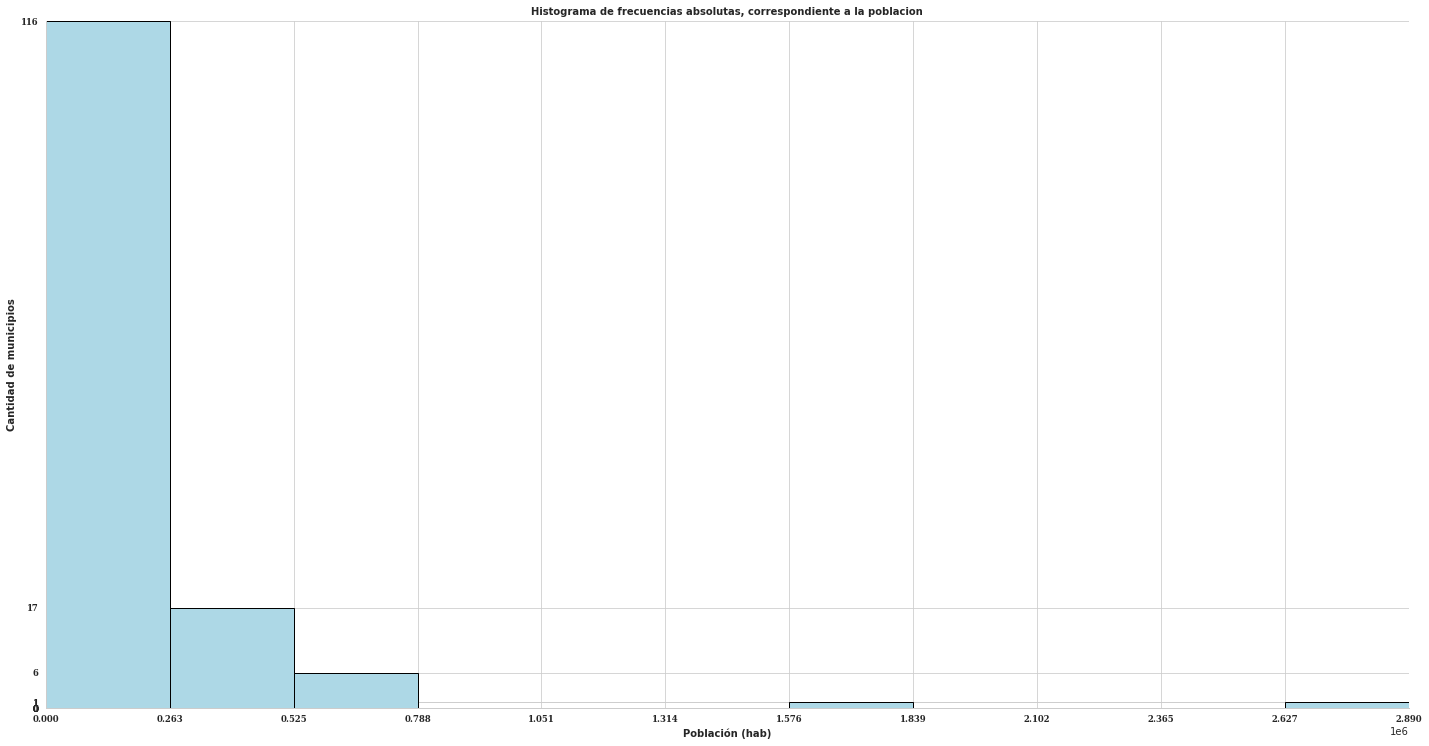

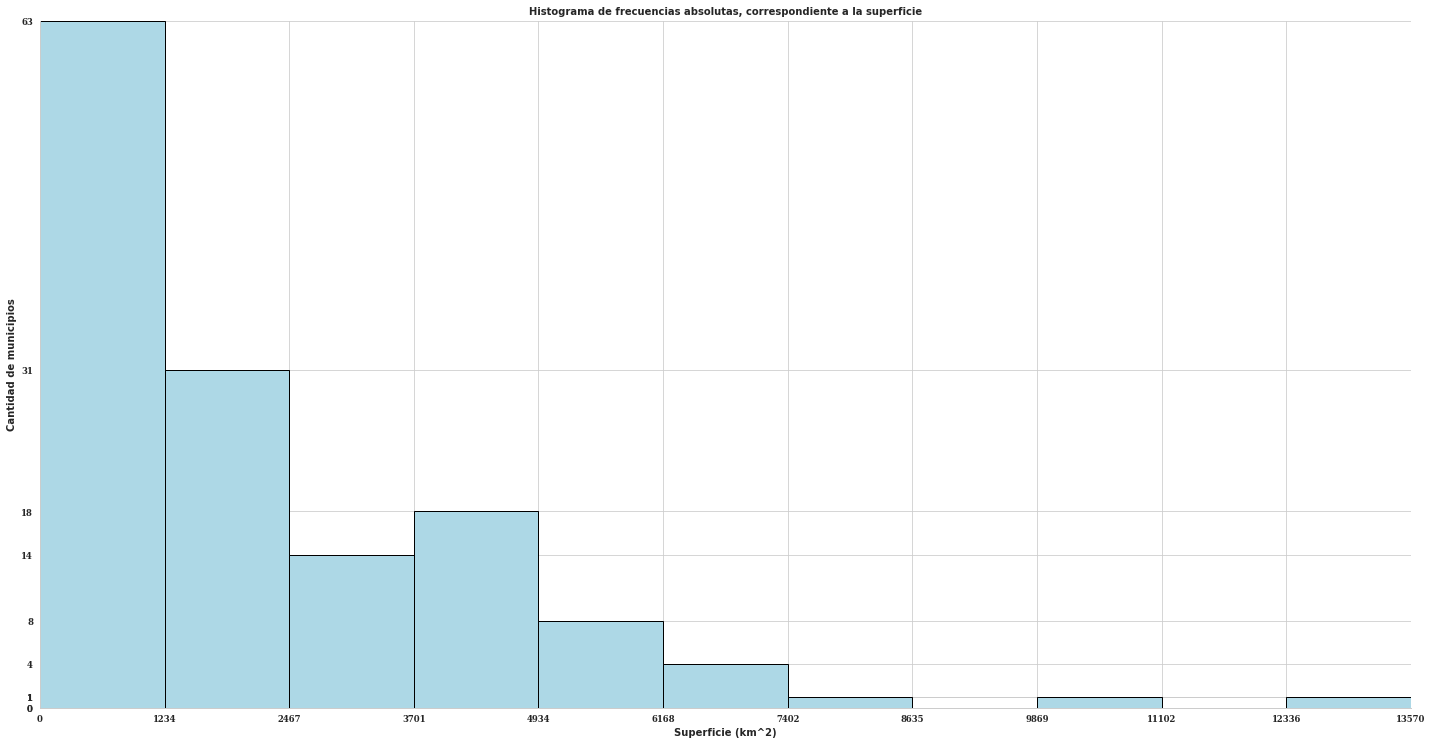

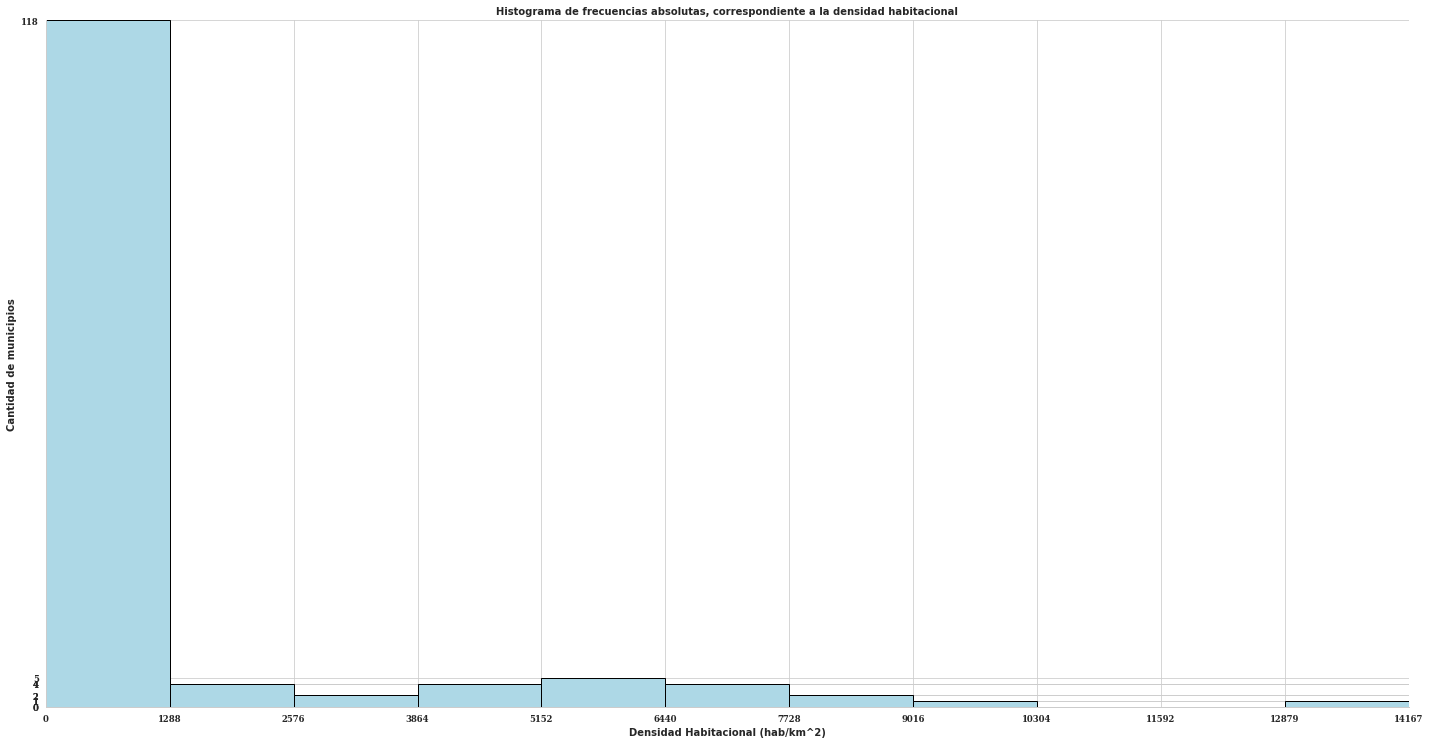

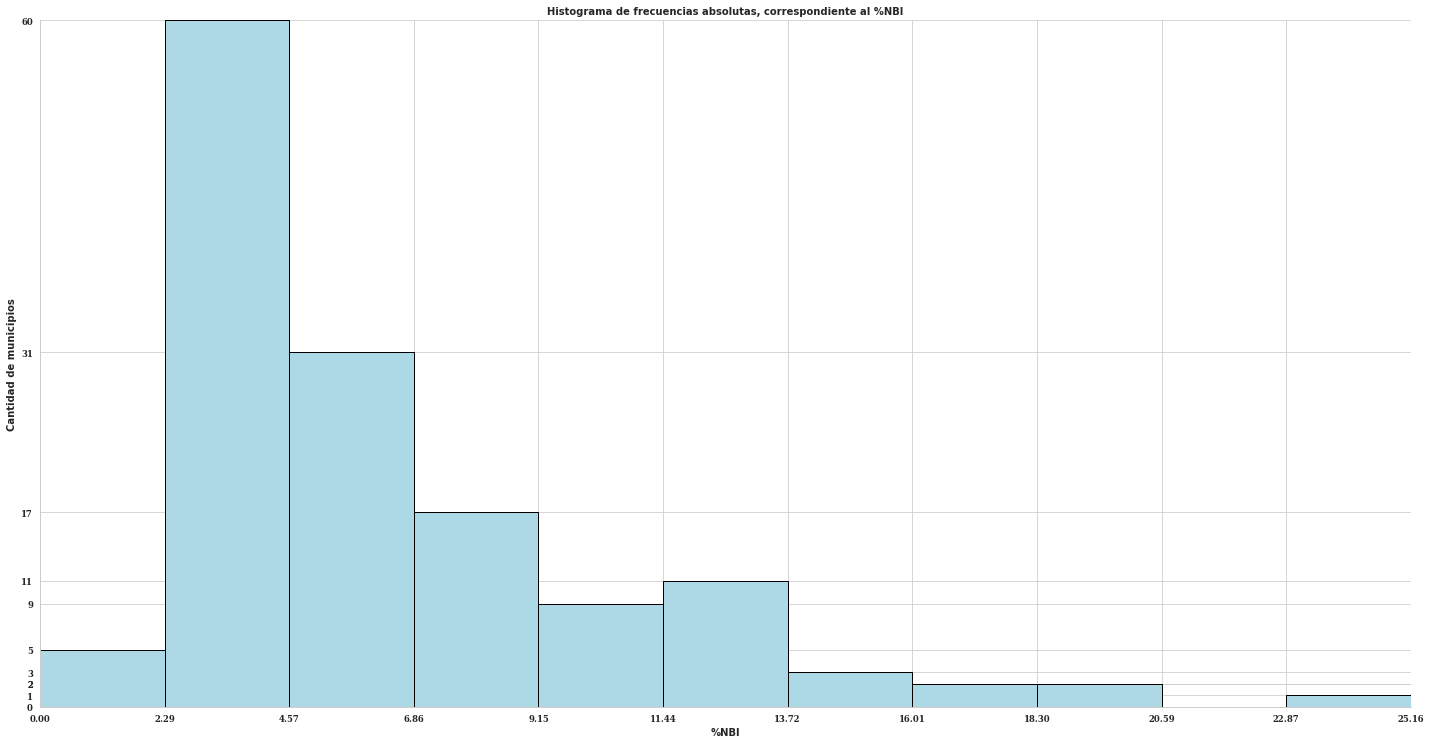

In [4]:
"""
En esta celda, volvemos a realizar un histograma de las mismas variables analizadas previamente,
pero en este caso, de frecuencias absolutas
""";

#Creamos una lista con las variables a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']

#Creamos un diccionario con los titulos a mostrar en cada gráfico,
#correspondientes a cada variable
titulos={
            'POBLACION':'Histograma de frecuencias absolutas, correspondiente a la poblacion',
            'SUPERFICIE': 'Histograma de frecuencias absolutas, correspondiente a la superficie',
            'DENSIDAD_HABITACIONAL' : 'Histograma de frecuencias absolutas, correspondiente a la densidad habitacional',
            'PORCENTAJE_NBI' : 'Histograma de frecuencias absolutas, correspondiente al %NBI'
        }
#Creamos un diccionario con las etiquetas del eje X a mostrar en cada gráfico,
#correspondientes a cada variable
xlabels={
            'POBLACION':'Población (hab)',
            'SUPERFICIE': 'Superficie (km^2)',
            'DENSIDAD_HABITACIONAL' : 'Densidad Habitacional (hab/km^2)',
            'PORCENTAJE_NBI' : '%NBI'
        }
  
#Definimos el estilo de fuente a mostrar para los indicadores
#de los valores mostrados en el gráfico
fuente=fnt_mng.FontProperties(family=['serif'],weight=1000,size=8.5)

#Recorremos la lista de variables con un for
for variable in variables:
    #Nos guardamos en una variable (de Python), el resultado
    #de la función 'intervalos' aplicada a la variable analizada
    res_intervalos=intervalos(municipios[variable],AGRUPAMIENTO)
    
    #Configuramos el estilo del gráfico en 'whitegrid', el cual
    #nos mostrará una grilla sobre fondo blanco, sobre los valores de los ticks
    sns.set_style(style='whitegrid')
    
    #Utilizamos la función 'displot' de SeaBorn para generar el gráfico,
    #y nos guardamos su resultado (de tipo FacetGrid de Seaborn=, en 'facgr'
    facgr = sns.displot(
                data=municipios,            #Le pasamos el DataFrame 'municipios' en el atributo 'data'
                x=variable,                 #Le pasamos la variable donde estamos parados en nuestro ciclo for, al atributo 'x', para mostrar sus valores en dicho eje
                label=xlabels[variable],    #Le asignamos la etiqueta definida en nuestro diccionario para la correspondiente variable, para el eje X
                height=16,                  #Definimos la relación de aspecto con los atributos 'height' y 'aspect'
                aspect=1,                   
                facecolor='lightblue',      #Definimos el color de las barras
                edgecolor='k',              #Definimos el color del borde de las barras
                kind='hist',                #Definimos el tipo de gráfico
                bins=res_intervalos[1],     #A 'bins' le pasamos la lista de divisiones obtenida con la función 'intervalos'
                stat='count',               #Definimos que el histograma sea de frecuencias absolutas
                kde=False)                  #En este caso,no le superponemos al histograma la curva de densidad
 
    #Sobre el FacetGrid que nos guardamos
    facgr.set(
           yticks=res_intervalos[0],           #Los ticks del eje Y corresponderan a la lista de frecuencias devueltas por la función 'intervalos'
           xticks=res_intervalos[1],           #Los ticks del eje X corresponderan a la lista de divisiones devueltas por la función 'intervalos'
           ylim=(0,max(res_intervalos[0])),    #Configuramos los limites del eje Y entre 0 y el máximo valor de la llsta de frecuencias devuelta por la función 'intervalos'                 
           xlim=(0,municipios[variable].max()) #Configuramos los limites del eje X entre 0 y el máximo valor de la variable analizada
          )
    
    #Configuramos el tamaño del gráfico
    facgr.figure.set_size_inches(20, 10)
    
    
    #Configuramos el texto y su formato para la etiqueta del eje Y
    facgr.ax.set_ylabel("Cantidad de municipios",fontweight='bold',fontsize=10)
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para la etiqueta del eje X
    facgr.ax.set_xlabel(xlabels[variable],fontweight='bold',fontsize=10)
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para el título del gráfico
    plt.title(label=titulos[variable],fontweight='bold', fontsize=10)

    #Configuramos el formato para los valores de los ticks de ambos ejes
    plt.xticks(fontproperties=fuente)
    plt.yticks(fontproperties=fuente)
    
    #Configuramos el ancho de linea de los bordes de los ejes del gráfico
    facgr.ax.spines['left'].set_linewidth(1)
    facgr.ax.spines['bottom'].set_linewidth(1)
  
    #Mostramos el gráfico
    plt.show()


gc.collect()

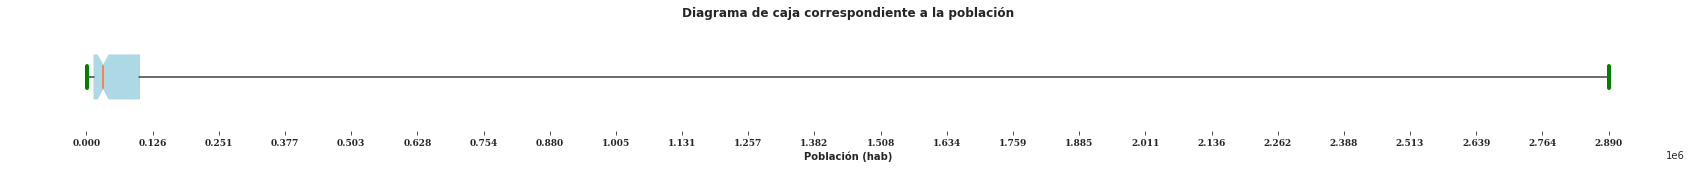

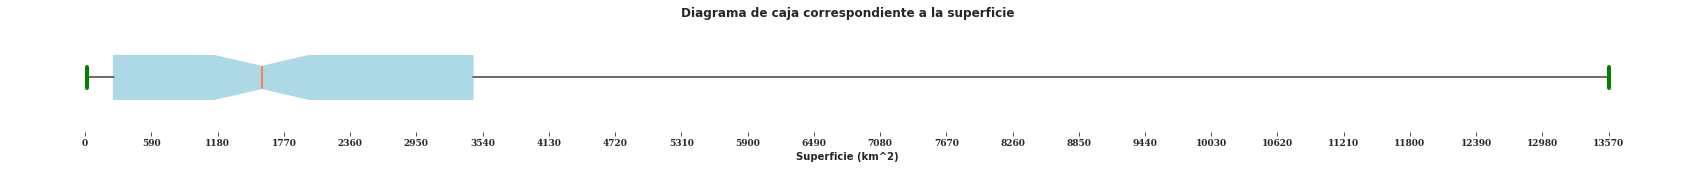

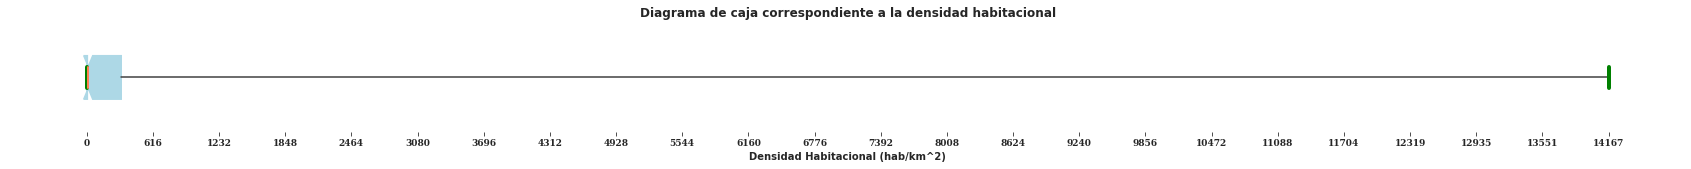

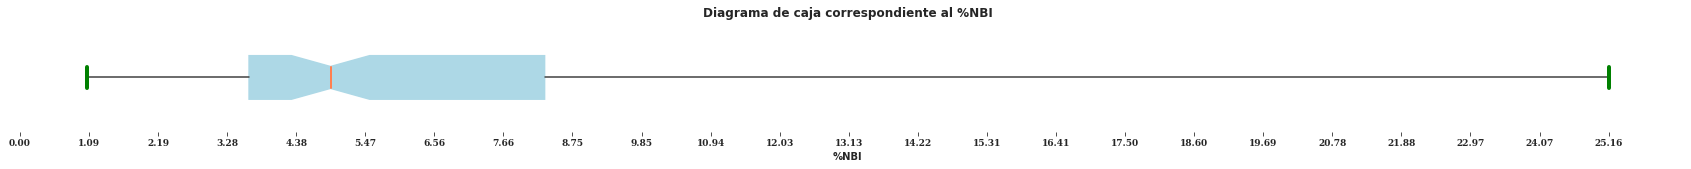

In [5]:
"""
En esta celda, realizaremos un diagrama de caja para las variables analizadas previamente en los histogramas
"""
#Creamos una lista con las variables a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']

#Creamos un diccionario con las etiquetas del eje X a mostrar en cada gráfico,
#correspondientes a cada variable
xlabels={
            'POBLACION':'Población (hab)',
            'SUPERFICIE': 'Superficie (km^2)',
            'DENSIDAD_HABITACIONAL' : 'Densidad Habitacional (hab/km^2)',
            'PORCENTAJE_NBI' : '%NBI'
        }

#Creamos un diccionario con los titulos a mostrar en cada gráfico,
#correspondientes a cada variable
titulos={
            'POBLACION':'Diagrama de caja correspondiente a la población',
            'SUPERFICIE': 'Diagrama de caja correspondiente a la superficie',
            'DENSIDAD_HABITACIONAL' : 'Diagrama de caja correspondiente a la densidad habitacional',
            'PORCENTAJE_NBI' : 'Diagrama de caja correspondiente al %NBI'
        }

#Definimos el estilo de fuente a mostrar para los indicadores
#de los valores mostrados en el gráfico
fuente=fnt_mng.FontProperties(family=['serif'],weight=700,size=9)

#Recorremos la lista de variables con un for
for variable in variables:

    #Configuramos el estilo del gráfico en 'ticks' (solamente nos mostrará las
    #marcas en los ejes, dejando el contenido del resto del gráfico en blanco)
    sns.set_style(style='ticks')
    
    #Utilizamos la función 'boxplot' de SeaBorn para generar el gráfico,
    #y nos guardamos su resultado (de tipo Axes de Matplotlib), en 'ax'
    ax=sns.boxplot(
        data=municipios,                             #Le pasamos el DataFrame 'municipios' al atributo 'data'
        x=variable,                                  #Le pasamos la variable donde estamos parados en nuestro ciclo for, al atributo 'x', para mostrar sus valores en dicho eje
        width=0.4,                                   #Configuramos el ancho de la caja en 0,4
        whis=[0,100],                                #A los whiskers (bigotes) del diagrama de caja, los configuramos en los percentiles 0 y 100 (mínimo y máximo),Si no configuramos esta opción, por defecto,
                                                     #los whiskers adoptarán los valores de los límites de la caja (primer y tercer cuartil), mas 1,5 veces el rango intercuartil, mientras los dmas valores se mostrarán
                                                     #como outliers. Si queremos que así sea, simplemente comentamos esta línea.
        medianprops={'color':'coral','linewidth':2}, #Configuramos el color de la línea que marca la mediana
        capprops={'color':'green', 'linewidth':4},   #Configuramos el color de los delimitadores de los whiskers
        boxprops={'color':'lightblue'},              #Configuramos el color de la caja
        notch=True,                                  #Establecemos el valor de notch en True, dando forma de X a la caja, alrededor de la media.
        autorange=True                               #Establecemos el autorange en True, de forma que el rango que ocupa el diagrama se ajuste automáticamente
   
    )
    
    
    #Configuramos los límites del eje X con el mínimo y máximo valor de la variable analizada
    #Lo dejamos comentado, ya que establecimos la opción 'autorange' en True, de modo que esta línea perjudicaría dicha configuración
    #ax.set_xlim(xmin=municipios[variable].min(),xmax=municipios[variable].max())
    
    #Los ticks del eje X corresponderan a la lista de divisiones devueltas por la función 'intervalos', en este caso, con el doble de divisiones que en los histogramas
    ax.set_xticks(intervalos(municipios[variable],AGRUPAMIENTO*2)[1])
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para la etiqueta del eje X
    ax.set_xlabel(xlabels[variable],fontweight='black',fontsize=10)
    
    #Configuramos el formato para los valores de los ticks de ambos ejes
    plt.xticks(fontproperties=fuente)
    
    #Eliminamos el tick del eje y
    plt.yticks(ticks=[])
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para el título del gráfico
    plt.title(label=titulos[variable],fontweight='bold', fontsize=12)
    
    #Configuramos el tamaño del gráfico
    ax.figure.set_size_inches(30, 2)
    
    #Configuramos el ancho de linea de los bordes de los ejes del gráfico
    ax.spines['left'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    
    #Mostramos el gráfico
    plt.show()
    print('\n\n')
gc.collect()

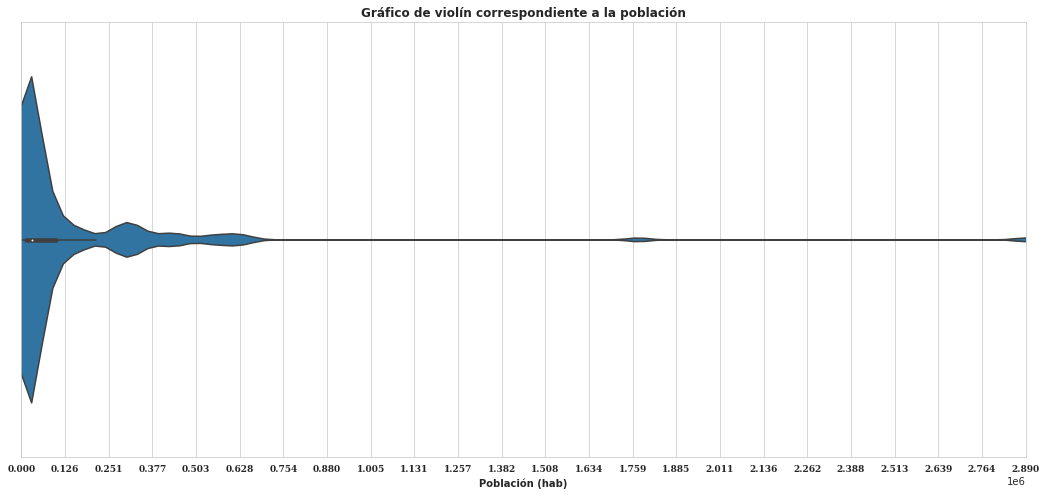

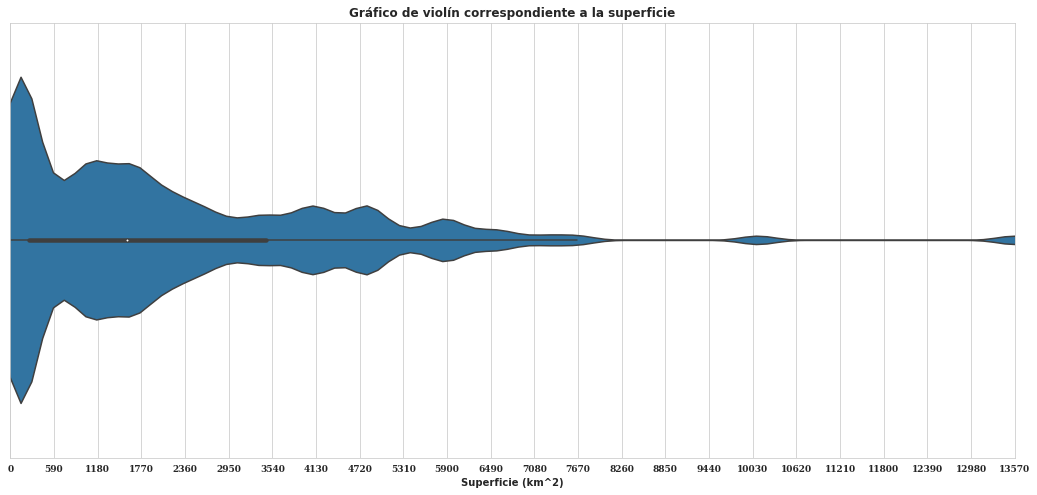

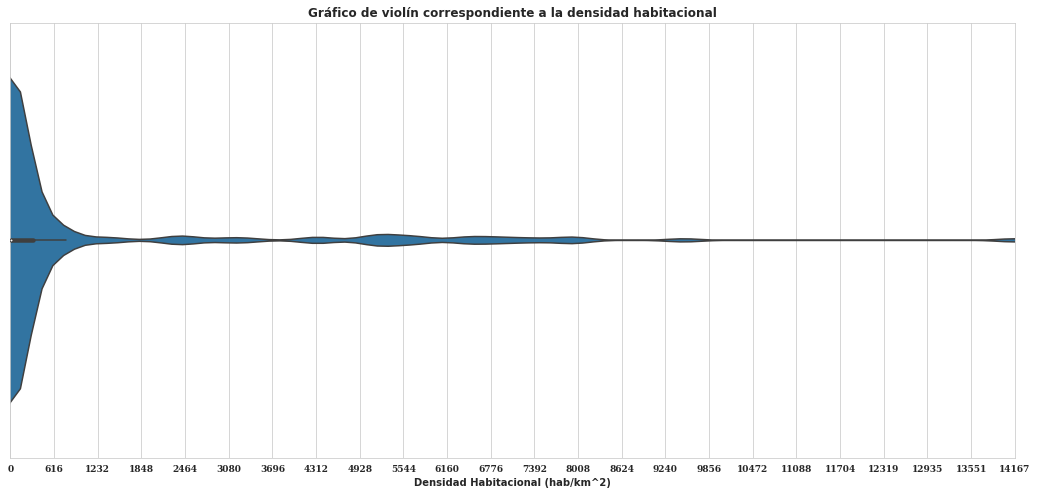

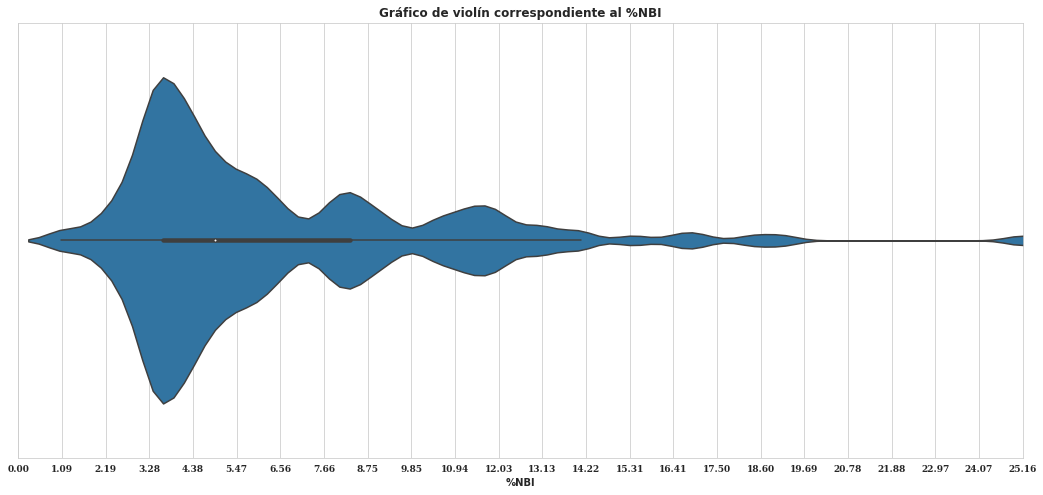

In [6]:
"""
En esta celda, complementaremos con un gráfico de violín tanto los histogramas realizados
con su curva de densidad correspondiente, como los diagramas de caja, de forma que
se puedan visualizar conjuntamente ambas representaciones
"""
#Creamos una lista con las variables a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']

#Creamos un diccionario con las etiquetas del eje X a mostrar en cada gráfico,
#correspondientes a cada variable
xlabels={
            'POBLACION':'Población (hab)',
            'SUPERFICIE': 'Superficie (km^2)',
            'DENSIDAD_HABITACIONAL' : 'Densidad Habitacional (hab/km^2)',
            'PORCENTAJE_NBI' : '%NBI'
        }

#Creamos un diccionario con los titulos a mostrar en cada gráfico,
#correspondientes a cada variable
titulos={
            'POBLACION':'Gráfico de violín correspondiente a la población',
            'SUPERFICIE': 'Gráfico de violín correspondiente a la superficie',
            'DENSIDAD_HABITACIONAL' : 'Gráfico de violín correspondiente a la densidad habitacional',
            'PORCENTAJE_NBI' : 'Gráfico de violín correspondiente al %NBI'
        }

#Definimos el estilo de fuente a mostrar para los indicadores
#de los valores mostrados en el gráfico
fuente=fnt_mng.FontProperties(family=['serif'],weight=700,size=9)

#Recorremos la lista de variables con un for
for variable in variables:
    #Configuramos el estilo del gráfico en 'whitegrid', el cual
    #nos mostrará una grilla sobre fondo blanco, sobre los valores de los ticks
    sns.set_style(style='whitegrid')
    
    #Utilizamos la función 'violinplot' de SeaBorn para generar el gráfico de violín,
    #y nos guardamos su resultado (de tipo Axes de Matplotlib), en 'ax'
    ax=sns.violinplot(
        data=municipios,   #Le pasamos el DataFrame 'municipios' al atributo 'data'
        x=variable,        #Le pasamos la variable donde estamos parados en nuestro ciclo for, al atributo 'x', para mostrar sus valores en dicho eje
        width=0.6,         #Ancho del gráfico de violín
        scale='count',     #La escala para determinar el ancho del violín será la cantidad de observaciones por cada división
        inner='box',       #Dentro del gráfico de violín, se dibuja una caja, al igual que el diagrama de caja correspondiente a la misma variable
        bw=0.1,            #Determinamos el ancho de banda utilizado para trazar la curva de densidad
        whis=[0,100]       #A los whiskers (bigotes) del diagrama de caja, los configuramos en los percentiles 0 y 100 (mínimo y máximo)
                           #Si no configuramos esta opción, por defecto, los whiskers adoptarán los valores de los límites de la caja (primer y tercer cuartil), mas 1,5 veces el rango intercuartil

    )
    
    #Configuramos los límites del eje X con el mínimo y máximo valor de la variable analizada
    ax.set_xlim(xmin=municipios[variable].min(),xmax=municipios[variable].max())
    
     #Los ticks del eje X corresponderan a la lista de divisiones devueltas por la función 'intervalos', en este caso, con el doble de divisiones que en los histogramas
    ax.set_xticks(intervalos(municipios[variable],AGRUPAMIENTO*2)[1])
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para la etiqueta del eje X
    ax.set_xlabel(xlabels[variable],fontweight='bold',fontsize=10)
    
    #Configuramos el formato para los valores de los ticks de ambos ejes
    plt.xticks(fontproperties=fuente)
    
    #Eliminamos el tick del eje y
    plt.yticks(ticks=[])
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para el título del gráfico
    plt.title(label=titulos[variable],fontweight='bold', fontsize=12)
    ax.set_ylim(-0.4,0.4)

    ax.figure.set_size_inches(18, 8)
    #sns.despine()
    plt.show()
gc.collect()

In [7]:
"""
En esta celda, estudiaremos algunos valores de forma analítica,
respecto de las columnas elegidas previamente para el análisis gráfico.
Para ello, mostraremos los siguientes valores en formato de tabla:
-Frecuencia
-Media aritmética
-Percentiles %0 , %25 , %50 , %75 y %100
 (correspondientes a valor mínimo, primer cuartil, mediana, tecer cuartil y valor máximo)
-Desvio estandar
-Coeficiente de variación
-Moda
-Asimetría
-Curtosis

"""

#Creamos una lista con las variables a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']

#Creamos una lista, inicialmente vacía, que contendrá los diccionarios
#que necesitamos para construir la tabla univariada
lista_dict=[]

#Recorremos la lista de variables con un for
for variable in variables:
    #Para cada columna analizada, realizaremos el siguiente procedimiento:
    dic=municipios[variable].describe().to_dict()                              #Generamos un diccionario correspondiente a la columna, a partir de lo que nos devuelve la funcion "describe" de Pandas 
    dic["moda"] = moda(municipios[variable],AGRUPAMIENTO)                      #A ese diccionario, le agregamos los campos "moda", "coef_var", "asim" , y "curt",
    dic["coef_var"] = municipios[variable].std()/municipios[variable].mean()   #correspondientes a los valores calculados de Moda, Coeficiente de Varición, Asimetría y Curtosis,
    dic["asim"] = municipios[variable].skew()                                  #los cuales no nos devuelve la función "describe"
    dic["curt"] = municipios[variable].kurtosis()                              #Calculamos la moda con la función definida para ello,
                                                                               #y las otros valores los calculamos con las funciones que nos provee Pandas
    lista_dict.append(dic)                                                     #Agregamos el diccionario generado a la lista 'lista_dict'

#Una vez que generamos la lista de diccionarios, creamos un DataFrame de pandas
#a partir de ella, cuyos nombres de columna serán las claves de los diccionarios,
#y los nombres de sus filas la lista de variables
#Este DataFrame lo guardamos en una variable 'tabla_uni'.
tabla_uni = pd.DataFrame.from_records(lista_dict,index=variables)    


#Finalmente, podemos mostrar todos los valores que necesitamos en forma de tabla, con el formato correspondiente
#obtenido con la función 'formatear_tabla_uni'
print("Valores de análisis univariado general: ")
formatear_tabla_uni(tabla_uni)

gc.collect()

Valores de análisis univariado general: 


In [8]:
"""
En esta celda, mostraremos la lista de intervalos generada para cada columna,
con su correspondiente delimitación.
De esta forma, se puede visualizar de manera analítica, lo que se visualizó
previamente de manera gráfica en los histogramas, diagramas de caja, y gráficos de violín
"""

#Creamos una lista con las variables a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']

#Creamos un diccionario con las unidades correspondientes a cada variable, para mostrar en la tabla
unidades={
    'POBLACION' :'(hab)',
    'SUPERFICIE' : '(km²)',
    'DENSIDAD_HABITACIONAL': '(hab/km²)' ,
    'PORCENTAJE_NBI' : '(%)'
}

#Recorremos la lista de variables con un for
for variable in variables:
    #Imprimimos un mensaje indicando la tabla que mostramos
    print("Lista de intervalos correspondientes a la variable " + variable + ":" )
    
    #Nos guardamos los resultados de la función 'intervalos', a la que 
    #llamamos con la columna correspondiente a la variable en donde
    #estamos parados en nuestro ciclo for
    lista_intervalos, divisiones= intervalos(municipios[variable],AGRUPAMIENTO)
    
    #Llamamos a la función 'tabla_intervalos' que definimos, pasandole los resultados devueltos previamente
    # por la función 'intervalos', y la unidad correspondiente definida en el diccionario que creamos para el propósito,
    #y mostramos la tabla que nos devuelve dicha función
    display(tabla_intervalos(lista_intervalos,divisiones,unidades[variable]))
    
    #Hacemos un print de espaciado vertical
    print("\n\n")

gc.collect()

Lista de intervalos correspondientes a la variable POBLACION:


Intervalo (hab)  Frecuencia Absoluta Frecuencia Relativa
0          (  0.0  :  262741.0  ]               116.00             % 82.27
1     (  262741.0  :  525482.0  ]                17.00             % 12.06
2     (  525482.0  :  788223.0  ]                 6.00              % 4.26
3    (  788223.0  :  1050964.0  ]                 0.00              % 0.00
4   (  1050964.0  :  1313705.0  ]                 0.00              % 0.00
5   (  1313705.0  :  1576446.0  ]                 0.00              % 0.00
6   (  1576446.0  :  1839187.0  ]                 1.00              % 0.71
7   (  1839187.0  :  2101928.0  ]                 0.00              % 0.00
8   (  2101928.0  :  2364669.0  ]                 0.00              % 0.00
9   (  2364669.0  :  2627410.0  ]                 0.00              % 0.00
10  (  2627410.0  :  2890151.0  ]                 1.00              % 0.71




Lista de intervalos correspondientes a la variable SUPERFICIE:


Intervalo (km²)  Frecuencia Absoluta Frecuencia Relativa
0        (  0.0  :  1233.61  ]                63.00             % 44.68
1    (  1233.61  :  2467.22  ]                31.00             % 21.99
2    (  2467.22  :  3700.83  ]                14.00              % 9.93
3    (  3700.83  :  4934.44  ]                18.00             % 12.77
4    (  4934.44  :  6168.05  ]                 8.00              % 5.67
5    (  6168.05  :  7401.66  ]                 4.00              % 2.84
6    (  7401.66  :  8635.27  ]                 1.00              % 0.71
7    (  8635.27  :  9868.88  ]                 0.00              % 0.00
8   (  9868.88  :  11102.49  ]                 1.00              % 0.71
9   (  11102.49  :  12336.1  ]                 0.00              % 0.00
10  (  12336.1  :  13569.71  ]                 1.00              % 0.71




Lista de intervalos correspondientes a la variable DENSIDAD_HABITACIONAL:


Intervalo (hab/km²)  Frecuencia Absoluta Frecuencia Relativa
0         (  0.0  :  1287.95  ]               118.00             % 83.69
1     (  1287.95  :  2575.89  ]                 4.00              % 2.84
2     (  2575.89  :  3863.84  ]                 2.00              % 1.42
3     (  3863.84  :  5151.79  ]                 4.00              % 2.84
4     (  5151.79  :  6439.73  ]                 5.00              % 3.55
5     (  6439.73  :  7727.68  ]                 4.00              % 2.84
6     (  7727.68  :  9015.62  ]                 2.00              % 1.42
7    (  9015.62  :  10303.57  ]                 1.00              % 0.71
8   (  10303.57  :  11591.52  ]                 0.00              % 0.00
9   (  11591.52  :  12879.46  ]                 0.00              % 0.00
10  (  12879.46  :  14167.41  ]                 1.00              % 0.71




Lista de intervalos correspondientes a la variable PORCENTAJE_NBI:


Intervalo (%)  Frecuencia Absoluta Frecuencia Relativa
0      (  0.0  :  2.29  ]                 5.00              % 3.55
1     (  2.29  :  4.57  ]                60.00             % 42.55
2     (  4.57  :  6.86  ]                31.00             % 21.99
3     (  6.86  :  9.15  ]                17.00             % 12.06
4    (  9.15  :  11.44  ]                 9.00              % 6.38
5   (  11.44  :  13.72  ]                11.00              % 7.80
6   (  13.72  :  16.01  ]                 3.00              % 2.13
7    (  16.01  :  18.3  ]                 2.00              % 1.42
8    (  18.3  :  20.59  ]                 2.00              % 1.42
9   (  20.59  :  22.87  ]                 0.00              % 0.00
10  (  22.87  :  25.16  ]                 1.00              % 0.71

In [9]:
"""
Observaciones respecto al estudio correspondiente de estas cuatro variables:

En primer lugar, el valor de moda que obtuvimos en todos los casos se corresponde con el agrupamiento que
realizamos para cada variable (con valor 12), ya que no tendría sentido evaluar la moda de una variable continua
sin agruparla por rangos o intervalos.

Procedemos a comentar ahora, una por una, cada una de las variables estudiadas


Población:

En lo que respecta a la población, tenemos como extremos, un distrito de 727 habitantes
(el menos poblado), y uno de 2890151 habitantes (el mas poblado)

Respecto de las medidas de tendencia central, tenemos los siguientes valores:

Media: 131313.723404
Mediana: 31730
Moda: 141757.934884

Como podemos observar, en este caso, tenemos: 
Moda > Media > Mediana

Respecto de las medidas de dispersión, tenemos:
Desvío estandar: 311664.963505
Coef. de Variación: 2.373438

Estos datos reflejan una dispersión muy importante, esto es, existe poca homogeneidad respecto de la población
de cada municipio

Luego, tanto de manera gráfica como analítica, observamos que la distribución de la población entre los
municipios es fuertemente asimétrica hacia la derecha, y tiene forma leptocúrtica (tiene un gran apuntamiento)

Esta información podemos interpretarla de la siguiente manera:

El hecho de que sea asimétrico a la derecha, significa que en los intervalos correspondientes a los de mayor
población, ubicados a la derecha del histograma, se contabilizan muy pocos municipios.
Mientras tanto, en los intervalos correspondientes a los rangos de menor población, ubicados a la izquierda
en el histograma, se contabilizan muchos municipios.

Esto es, tenemos muchos municipios poco poblados, y pocos municipios muy poblados

El hecho de que la distribución sea leptocúrtica, nos indica que la mayor parte de los valores observados se
concentran alrededor de su media. Por lo tanto la asimetría de la distribución es significativamente pronuciada.


Superficie:

En lo que respecta a la superficie, tenemos como extremos, un distrito de 14 km^2 (el menos extenso),
y uno de 13569.71 km^2 (el mas extenso)

Respecto de las medidas de tendencia central, tenemos los siguientes valores:

Media: 2165.646454 
Mediana: 1572.220
Moda: 818.078211

Como podemos observar, en este caso, tenemos: 
Media > Mediana > Moda

Respecto de las medidas de dispersión, tenemos:
Desvío estandar: 2267.44
Coef. de Variación: 1.047006

Si bien estos datos también reflejan una dispersión importante, existiendo poca homogeneidad en la distribucion
de la superficie, esta misma no es tan grande como ocurría con la población

Luego, también tenemos una asimetría a la derecha, y un apuntamiento leptocúrtico.
De esta forma, tenemos muchos municipios de pequeña extensión, a la vez que pocos municipios de gran extension.
Sin embargo, tanto a nivel gráfico como analítico, se puede observar que el módulo de su asimetría y curtosis
no es tan grande como en el que respecta a la población, por lo que su asimetría no es tan pronunciada.


Densidad habitacional:


Aquí tenemos como extremos un distrito de 1.050000 hab/km^2 (el menos densamente poblado), 
y uno de 14167.410000 hab/km^2 (el más densamente poblado)

Respecto de las medidas de tendencia central, tenemos los siguientes valores:

Media: 996.644113
Mediana: 14.590000
Moda: 655.076168

Como podemos observar, en este caso, tenemos: 
Media > Moda > Mediana

Respecto de las medidas de dispersión, tenemos:

Desvío estandar: 2345.007466
Coef. de Variación: 2.352904

Aquí nuevamente, tenemos un grado de dispersion muy similar al que respecta a la variable de población, lo que
indica poca muy poca homogeneidad respecto de la densidad poblacional. Esto es, existen muchos municipios con escasa
densidad poblacional, y pocos municipios muy densamente poblados.

Al igual que en las dos variables estudiadas previamente, tenemos una asimetría a la derecha,
y un apuntamiento leptocúrtico. En este caso, los valores de ambos coeficientes se encuentran entre
los correspondientes a la población y los correspondientes a la superficie, lo cual también indica una
asimetría pronunciada.


%NBI

En lo que respecta esta variable, tenemos en este caso como extremos, un distrito con un %1,06 de hogares con NBI
(el menor valor observado) y uno con un %25,16 de hogares con NBI (el mayor valor observado).

Respecto de las medidas de tendencia central, tenemos los siguientes valores:

Media: 6.421418
Mediana: 4.920000
Moda: 3.784892

Como podemos observar, en este caso, tenemos: 
Media > Mediana > Moda

Respecto de las medidas de dispersión, tenemos:

Desvío estandar: 4.035915
Coef. de Variación: 0.628508

En esta variable, observamos que es la única de las aquí analizadas con un coeficiente de variación menor a uno.
Esto significa que, si bien nuestro conjunto de datos no es considerado homogeneo (ya que dicho valor es mayor a 0,3),
es sin embargo, el mas homogeneo de todas las variables aquí analizadas. Tenemos sin embargo, a la mayor parte de los
municipios con poco porcentaje de hogares con NBI, y a la vez, pocos municipios con un gran porcentaje de hogares con NBI.

Respecto de las medidas de forma, si bien seguimos teniendo una asimetría a la derecha y un apuntamiento leptocúrtico,
los valores de dichos coeficientes tambien son los mas bajos en comparación con las otras tres varaibles analizadas.

Conclusiones:

En las cuatro variables aquí estudiadas de forma univariada, sin tomar en cuenta su categorización, observamos en todas
ellas tanto una muy poca homogeneidad, como una asimetría a la derecha muy significativa.

Una vez realizado este análisis descriptivo univariado, procederemos a realizar un análisis bivariado de las
variables correspondientes, en donde observaremos la relación existente entre las varables aquí analizadas.

""";

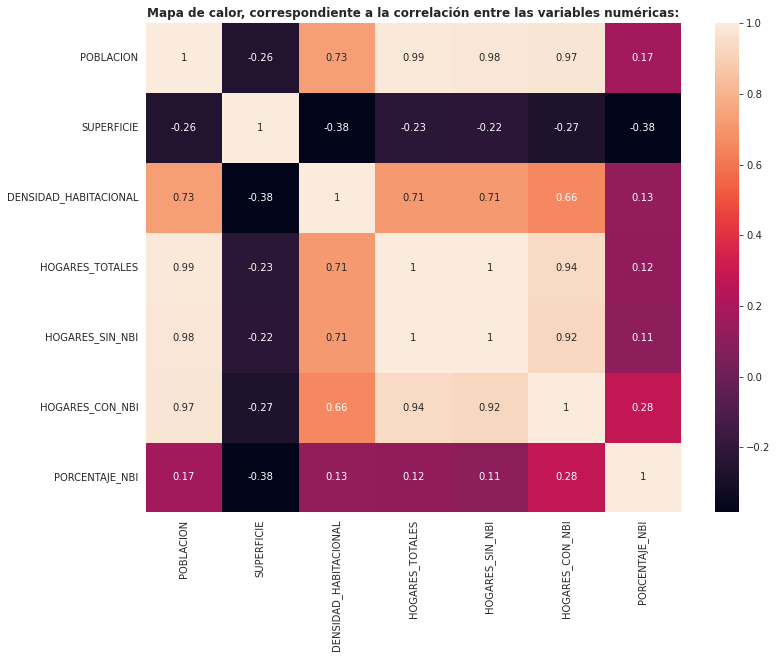

In [10]:
"""
En esta celda, obtendremos una tabla que muestra la correlación entre todas las variables numéricas
de nuestra base de datos, mostrando el coeficiente de correlación de Pearson.
Luego, mostramos un heatmap realizado en base a la tabla obtenida,
que también muestra los valores,de forma
de ilustrar gráficamente y analiticamente dicho contenido
"""
#Obtenemos los coeficientes de correlación de Pearson entre todas las columnas
#exclusivamente correspondientes a variables numéricas, del DataFrame de municipios
correlaciones=municipios.corr(numeric_only=True)

#Utilizamos la función 'heatmap' de SeaBorn para generar el mapa de calor correspondiente
#para dichas correlaciones, y nos guardamos su resultado (de tipo Axes de Matplotlib), en 'ax'

ax=sns.heatmap(correlaciones,                           #Le pasamos como primer argumento, la tabla de correlaciones obtenida
            xticklabels=correlaciones.columns.values,   #A los labels (etiquetas) de ambos ejes, le asignamos los nombres de las columnas
            yticklabels=correlaciones.columns.values,   #numericas del DataFrame de municipios
            annot=True,                                 #Establecemos que se muestre el valor numérico del coeficiente de correlación de Pearson en cada celda del mapa
            annot_kws={'fontdict':{'fontsize':10}}      #Establecemos el tamaño de letra para dicho valor
)
#Aquí establecemos las medidas de nuestro gráfico, previamente almacenado en la variable 'ax'
ax.figure.set_size_inches(12, 9)

#Configuramos el texto, y su formato, para el título del gráfico
plt.title(label="Mapa de calor, correspondiente a la correlación entre las variables numéricas:",fontweight='black', fontsize=12)

#Mostramos el gráfico
plt.show()

In [11]:
"""
En este mapa de calor, observamos una muy fuerte correlación positiva (casi absoluta) de la población respecta de la cantidad total de hogares,
de los hogares sin NBI, y muy ligeramente en menor medida, con la catidad de hogares con NBI.
También existe una importante correlación positiva entre esta variable y la densidad habitacional.
En cuanto a su correlación con la superficie, la misma es negativa y relativamente débil.
En lo que respecta a su correlación con el porcentaje de NBI, la misma es positiva, pero aún mas débil que respecto de la superficie
en cuanto a su módulo (intensidad de la correlación).

En lo que concierne a la superficie respecto de la densidad habitacional, la correlación es negativa y moderada.
En cuanto a la superficie con respecto a la cantidad total de hogares, es negativa y débil, al igual que
respecto a la cantidad de hogares sin NBI. No obstante, crece un poco su módulo respecto de los hogares con NBI, permanenciendo
el signo negativo. Finalmente, observamos una correlación negativa moderada respecto a la superficie y el porcentaje de NBI.

En cuanto a la densidad habitacional respecto de los hogares totales, la correlación es positiva y fuerte, al igual
que con los hogares sin NBI. No obstante, baja un poco con respecto a los hogares con NBI, permanenciendo su signo positivo.
Finalmente, tenemos una correlación débil, pero positiva, en lo que respecta a la densidad habitacional respecto del porcentaje de NBI.

Respecto a la correlación de los hogares totales respecto a los hogares sin NBI, la misma es positiva y prácticamente absoluta,
siendo apenas menor en lo que respecta a la correlación con los hogares con NBI.
Es positiva y débil respecto al porcentaje NBI.

Entre los hogares sin NBI y los hogares con NBI, la correlación es fuertemente positiva, mientras que con respecto al
porcentaje de NBI es positiva, pero débil.

Finalmente, la correlación entre hogares con NBI, y el porcentaje de NBI, la correlación es positiva, tendiendo a ser 
entre débil y moderada.

Pondremos nosotros el énfasis, en la correlación entre las siguientes variables:
-Población y Superficie
-Densidad habitacional y %NBI
""";

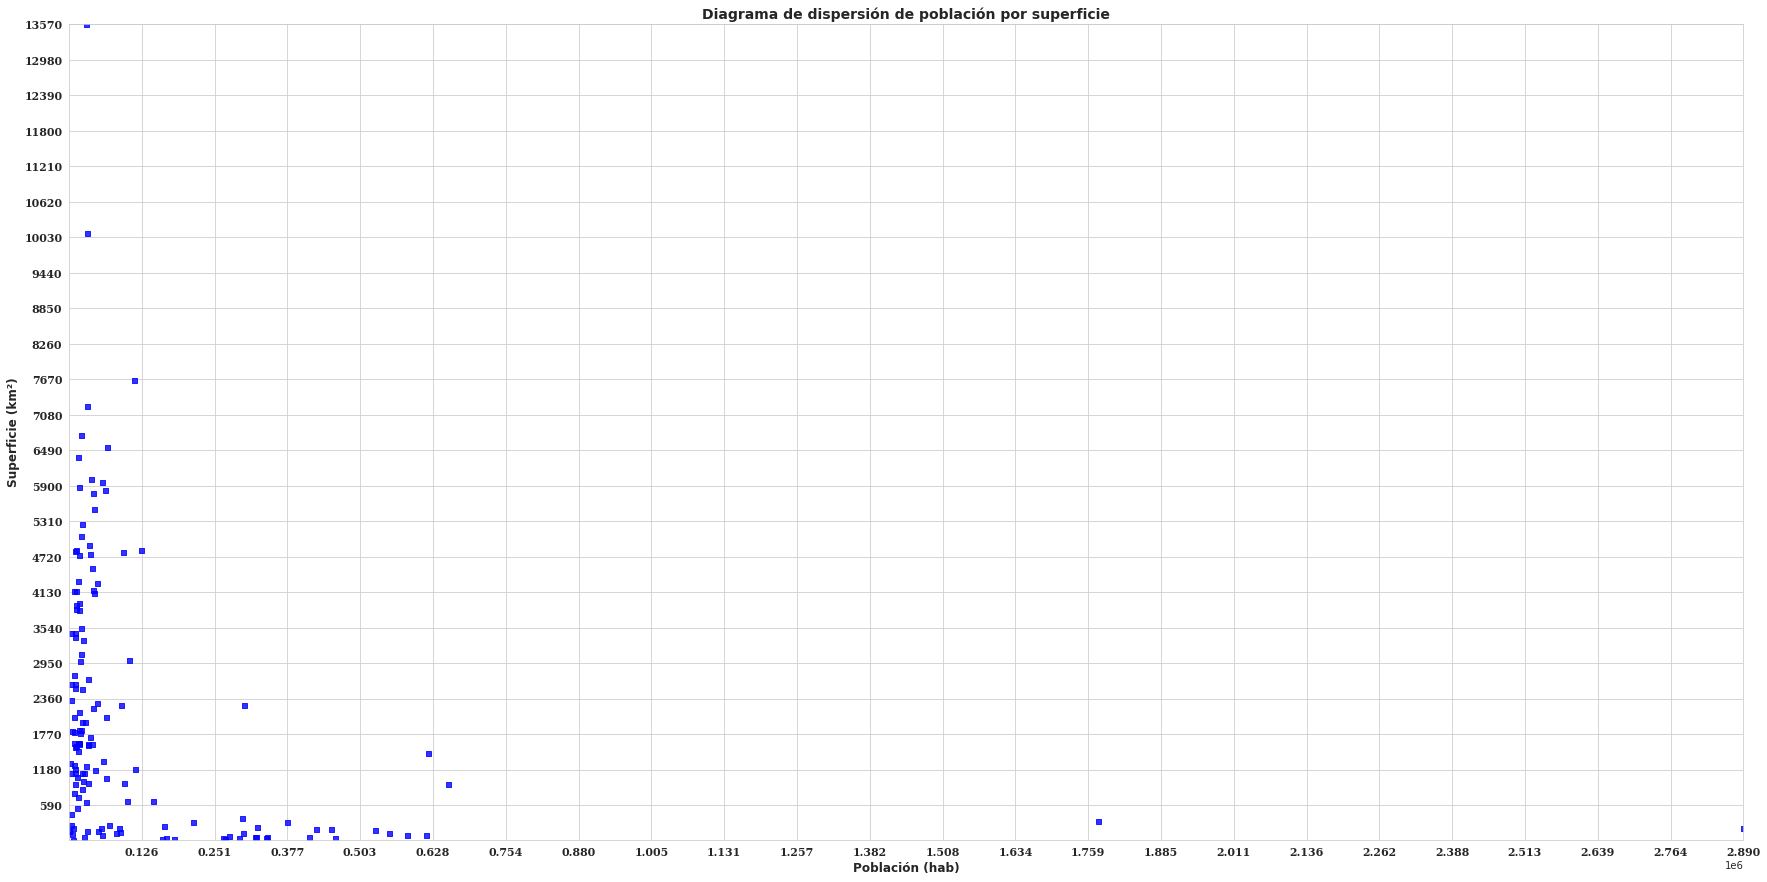

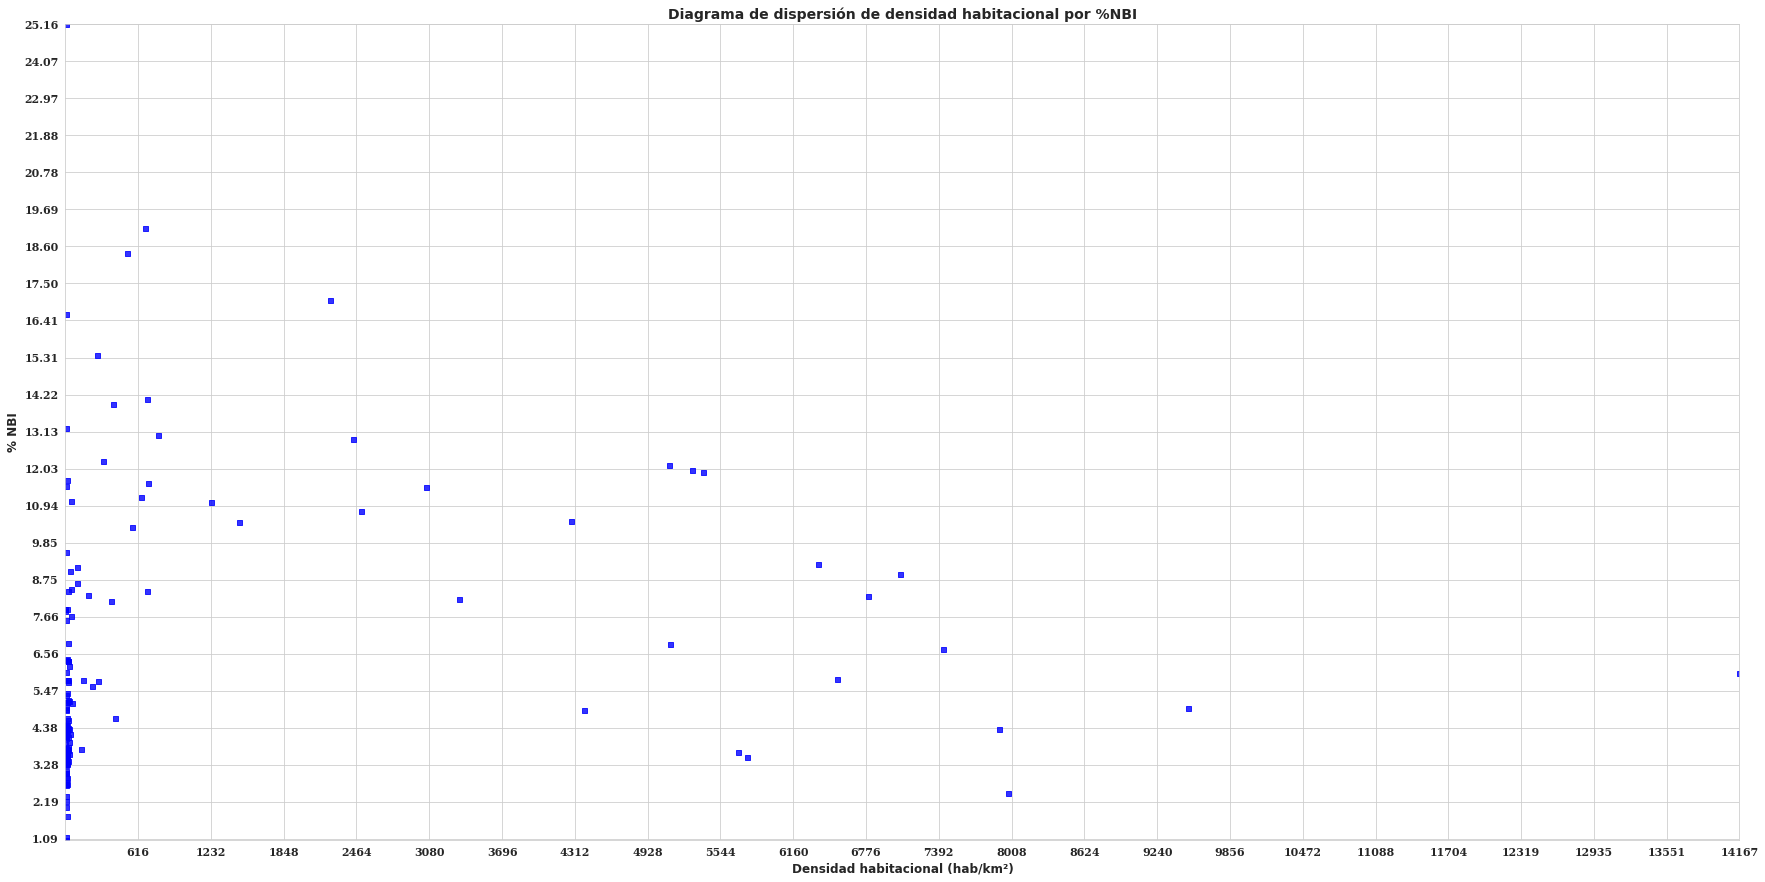

In [12]:
"""
En esta celda, estudiaremos gráficamente de forma bivariada, las siguientes variables de forma conjunta:
-Poblacion y Superficie
-Densidad habitacional y %NBI

Para ello, mostraremos un diagrama de dispersión, con su correspondiente recta de regresión
"""


#Definimos el estilo de fuente a mostrar para los indicadores
#de los valores mostrados en ambos gráficos
fuente=fnt_mng.FontProperties(family=['serif'],weight=1000,size=11)

#Primero, procedemos a realizar el diagrama de dispersión de las variables "Población" y "Superficie"

#Nos guardamos las Series de Pandas correspondientes a las columnas de las variables mencionadas, en las variables'x' e 'y'.
x=municipios['POBLACION']
y=municipios['SUPERFICIE']

#Configuramos el estilo del gráfico en 'whitegrid', el cual
#nos mostrará una grilla sobre fondo blanco, sobre los valores de los ticks
sns.set_style(style='whitegrid')

#Utilizamos la función 'regplot' de SeaBorn para generar el gráfico de dispersion  con la nube de puntos correspondiente
#para estas dos variables, y nos guardamos su resultado (de tipo Axes de Matplotlib), en 'ax'

ax=sns.regplot(x=x,                      #Al atributo 'x', le asignamos el valor que tenemos almacenado en la variable 'x', correspondiente a la columna de población
               y=y,                      #Al atributo 'y', le asignamos el valor que tenemos almacenado en la variable 'y', correspondiente a la columna de superficie
               fit_reg=False,            #En este caso, no dibujamos la recta de regresión
               marker='s',               #Establecemos los marcadores de puntos como cuadrados
               color='blue',             #Establecemos el color de los marcadores en azul
               scatter_kws={'s':25})     #Establecemos el tamaño de los marcadores con el valor 25

#Aquí establecemos las medidas de nuestro gráfico, previamente almacenado en la variable 'ax'
ax.figure.set_size_inches(30, 15)

#Sobre el Axes de Matplotlib que nos guardamos
ax.set( 
        xticks=intervalos(municipios.POBLACION,AGRUPAMIENTO*2)[1],          #Los ticks del eje X corresponderan a la lista de divisiones devueltas por la función 'intervalos' para 
                                                                            #la variable población, en este caso, con el doble de divisiones que en los histogramas
        yticks=intervalos(municipios.SUPERFICIE,AGRUPAMIENTO*2)[1],         #Los ticks del eje Y corresponderan a la lista de divisiones devueltas por la función 'intervalos' para 
                                                                            #la variable superficie, en este caso, con el doble de divisiones que en los histogramas
        xlim=(municipios.POBLACION.min() , municipios.POBLACION.max()),     #Configuramos los limites del eje X entre el mínimo y el máximo valor de la variable población
        ylim=(municipios.SUPERFICIE.min() , municipios.SUPERFICIE.max()),   #Configuramos los limites del eje Y entre el mínimo y el máximo valor de la variable superficie
       
    )

  
#Configuramos el texto, y su formato, para la etiqueta del eje X
ax.set_xlabel("Población (hab)",fontweight='bold',fontsize=12)

#Configuramos el texto, y su formato, para la etiqueta del eje Y
ax.set_ylabel("Superficie (km²)",fontweight='bold',fontsize=12)

#Configuramos el formato para los valores de los ticks de ambos ejes
plt.xticks(fontproperties=fuente)
plt.yticks(fontproperties=fuente)

#Configuramos el texto, y su formato, para el título del gráfico
plt.title(label="Diagrama de dispersión de población por superficie",fontweight='black', fontsize=14)

#Mostramos por pantalla el gráfico obtenido
plt.show()

#Realizamos un espaciado vertical
print("\n\n")




#Luego, procedemos a realizar el diagrama de dispersión de las variables "Densidad Habitacional" y "%NBI"

#Nos guardamos las Series de Pandas correspondientes a las columnas de las variables mencionadas, en las variables'x' e 'y'.
x=municipios['DENSIDAD_HABITACIONAL']
y=municipios['PORCENTAJE_NBI']


#Configuramos el estilo del gráfico en 'whitegrid', el cual
#nos mostrará una grilla sobre fondo blanco, sobre los valores de los ticks
sns.set_style(style='whitegrid')

#Utilizamos la función 'regplot' de SeaBorn para generar el gráfico de dispersion  con la nube de puntos correspondiente
#para estas dos variables, y nos guardamos su resultado (de tipo Axes de Matplotlib), en 'ax'

ax=sns.regplot(x=x,                  #Al atributo 'x', le asignamos el valor que tenemos almacenado en la variable 'x', correspondiente a la columna de densidad habitacional
               y=y,                  #Al atributo 'y', le asignamos el valor que tenemos almacenado en la variable 'y', correspondiente a la columna de %NBI
               fit_reg=False,        #En este caso, no dibujamos la recta de regresión
               marker='s',           #Establecemos los marcadores de puntos como cuadrados
               color='blue',         #Establecemos el color de los marcadores en azul
               scatter_kws={'s':25}) #Establecemos el tamaño de los marcadores con el valor 25



#Los ticks del eje X corresponderan a la lista de divisiones devueltas por la función 'intervalos' para 
#la variable densidad habitacional, en este caso, con el doble de divisiones que en los histogramas

#Los ticks del eje Y corresponderan a la lista de divisiones devueltas por la función 'intervalos' para 
#la variable %NBI, en este caso, con el doble de divisiones que en los histogramas
#Configuramos los limites del eje X entre el mínimo y el máximo valor de la variable densidad habitacional
#Configuramos los limites del eje Y entre el mínimo y el máximo valor de la variable %NBI

#Aquí establecemos las medidas de nuestro gráfico, previamente almacenado en la variable 'ax'
ax.figure.set_size_inches(30, 15)

#Sobre el Axes de Matplotlib que nos guardamos:
ax.set(  
        xticks=intervalos(municipios.DENSIDAD_HABITACIONAL,AGRUPAMIENTO*2)[1],               #Los ticks del eje X corresponderan a la lista de divisiones devueltas por la función 'intervalos' para 
                                                                                             #la variable densidad habitacional, en este caso, con el doble de divisiones que en los histogramas
        yticks=intervalos(municipios.PORCENTAJE_NBI,AGRUPAMIENTO*2)[1],                      #Los ticks del eje Y corresponderan a la lista de divisiones devueltas por la función 'intervalos' para 
                                                                                             #la variable %NBI, en este caso, con el doble de divisiones que en los histogramas
        xlim=(municipios.DENSIDAD_HABITACIONAL.min(),municipios.DENSIDAD_HABITACIONAL.max()),#Configuramos los limites del eje X entre el mínimo y el máximo valor de la variable densidad habitacional
        ylim=(municipios.PORCENTAJE_NBI.min() , municipios.PORCENTAJE_NBI.max()),            #Configuramos los limites del eje Y entre el mínimo y el máximo valor de la variable %NBI
       
    )



#Configuramos el texto, y su formato, para la etiqueta del eje X
ax.set_xlabel("Densidad habitacional (hab/km²)",fontweight='bold',fontsize=12)

#Configuramos el texto, y su formato, para la etiqueta del eje Y
ax.set_ylabel("% NBI",fontweight='bold',fontsize=12)

#Configuramos el formato para los valores de los ticks de ambos ejes
plt.xticks(fontproperties=fuente)
plt.yticks(fontproperties=fuente)

#Configuramos el texto, y su formato, para el título del gráfico
plt.title(label="Diagrama de dispersión de densidad habitacional por %NBI",fontweight='black', fontsize=14)

#Mostramos por pantalla el gráfico obtenido
plt.show()

gc.collect()

In [13]:
"""
En esta celda, estudiaremos analíticamente de forma bivariada, las variables previamente estudiadas gráficamente
mediante el diagráma de dispersión:
- Poblacion y Superficie
- Densidad habitacional y %NBI

Para ello, calcularemos los siguientes parámetros, que miden la variablidad conjunta entre las variables mencionadas:
- Covarianza
- Coeficiente de regresión lineal (pendiente de la recta de regresión)
- Coeficiente de correlación de Pearson (lo calculamos nuevamente pese a ya haberlo visualizado en el mapa de calor)

Para ello, utilizaremos el siguiente método
- En todos los casos 'x', es la columna correspondiente a la variable explicativa,
  e 'y' es la columna correspondiente a la variable explicada. Ambos son Series de Pandas
  
- La covarianza la obtenemos con la función 'cov' de Pandas, con la forma x.cov(y), equivalente a y.cov(x)
  Este valor nos indica el grado de variación conjunta de dichas variables respecto a sus medias
  
- El coeficiente de regresión lineal, lo obtenemos mediante la siguiente fórmula:
  M = Cov(X,Y) / Var(X) = Cov(X,Y) / Desv²(X)
  Este valor nos da información acerca del grado de dicha regresión
  
- El coeficiente de correlación de Pearson, lo obtenemos mediante la siguiente fórmula:
  P = Cov(X,Y) / (Desv(X)*Desv(Y))
  Este valor nos da información acerca de la intensidad de dicha regresión
  
  Ademas, podemos corroborar estos últimos dos valores mediante la función linregress
  utilizada previamente en el diagrama de dispersión, por lo cual, podemos dejarla comentada
"""

#Calculamos la covarianza de la población respecto de la superficie:
cov_pob_sup=municipios.POBLACION.cov(municipios.SUPERFICIE)

#Calculamos el coeficiente de regresión lineal de la población respecto de la superficie:
reg_pob_sup=cov_pob_sup/(municipios.POBLACION.std()**2)

#Calculamos el coeficiente de correlación de Pearson de la población respecto de la superficie:
pearson_pob_sup=cov_pob_sup/(municipios.POBLACION.std() *municipios.SUPERFICIE.std() )


"""
#Con la función linregress de scipy, podemos corroborar los valores calculados previamente
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=municipios.POBLACION,y=municipios.SUPERFICIE)

print(slope.round(4))   #Coeficiente de regresión lineal (pendiente de la recta de regresión)
print(r_value.round(4)) #Coeficiente de correlación de Pearson
print("\n\n")
""";


#Calculamos la covarianza de la densidad habitacional respecto al porcentaje de viviendas con NBI:
cov_dens_nbi=municipios.DENSIDAD_HABITACIONAL.cov(municipios.PORCENTAJE_NBI)

#Calculamos el coeficiente de regresión lineal de la densidad habitacional respecto al porcentaje de viviendas con NBI:
reg_dens_nbi=cov_dens_nbi/(municipios.DENSIDAD_HABITACIONAL.std()**2)

#Calculamos el coeficiente de correlación de Pearson de la p densidad habitacional respecto al porcentaje de viviendas con NBI:
pearson_dens_nbi=cov_dens_nbi/(municipios.DENSIDAD_HABITACIONAL.std() *municipios.PORCENTAJE_NBI.std() )


"""
#Con la función linregress de scipy, podemos corroborar los valores calculados previamente
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=municipios.DENSIDAD_HABITACIONAL,y=municipios.PORCENTAJE_NBI)

print(slope.round(4))    #Coeficiente de regresión lineal (pendiente de la recta de regresión)
print(r_value.round(4))  #Coeficiente de correlación de Pearson
""";

#A partir de los valores calculados, construimos nuestra tabla de valores de análisis bivariado general (sin desagregación)

#Para ello, creamos un DataFrame de pandas, que guardamos en una variable 'tabla_bi'

tabla_bi=pd.DataFrame([[cov_pob_sup,reg_pob_sup,pearson_pob_sup],            #Le pasamos una lista bidimensional, la cual contendrá, en cada una de las listas de nivel inferior,
                              [cov_dens_nbi,reg_dens_nbi,pearson_dens_nbi]], #los valores calculados correspondientes a cada par de variables analizadas de forma conjunta
                            columns=['cov', 'reg', 'pearson'],               #Asignamos los nombres cortos a las columnas (correspondientes al parámetro calculado)
                            index=['POB/SUP', 'DENS/NBI']                    #Asignamos los nombres cortos a las filas (correspondientes al par de variables analizadas de forma conjunta)
                            )
#Finalmente, podemos mostrar todos los valores que necesitamos en forma de tabla, con el formato correspondiente
#obtenido con la función 'formatear_tabla_bi'
print("Valores de análisis bivariado general:")
formatear_tabla_bi(tabla_bi)
gc.collect()

Valores de análisis bivariado general:


In [14]:
"""
Luego de realizar el estudio de regresión y correlación entre estas variables, podemos observar lo siguiente:

En el caso de las variables correspondientes a población y superficie, tanto la covarianza, nuestro  coeficiente de regresión lineal,
como nuestro coeficiente de correlación de Pearson, son negativas.

Esto ya era observable en el gráfico, previo al estudio analítco. En el, no solo observamos gráficamente la recta de regresión,
tomando en cuenta que, al comparar variables con unidades diferentes, y a la vez con ordenes de valores absolutos muy dispares,
la recta observada en el gráfico es poco representativa respecto de su valor obtenido de forma analitica, el cual es cercano a 0.
Esto nos dice que, si nuestro gráfico de dispersión utilizara la misma escala para los valores de población y de superficie,
tendríamos una recta de regresión prácticamente horizontal.

Podemos mencionar que el valor de la pendiente de la recta de regresión, nos indica el grado en que cambia una variable en función de la otra.
Por ejemplo, si tenemos una pendiente negativa muy pronunciada, nos indicaría que, por lo general al tener municipios cuya población sea
ligeramente mas alta, su superficie tendería a ser drásticamente menor.
Asímismo, si tuvieramos una pendiente positiva pero muy suave, al tener municipios cuya población sea drásticamente mas alta, su superficie
tendería a ser mas alta, pero ligeramente. El coeficiente de correlación nos indica que tan representativa es dicha recta. Es decir,
que tan cercanas son, en promedio, las observaciones representadas en el diagrama de puntos a la recta obtenida. Un coeficiente de regresión
con módulo cercano a 0, refleja una nube de puntos muy difusa, mientras que uno con módulo cercano a 1, refleja una nube de puntos mas homogenea
(puntos muy cercanos a la recta).

No obstante, en dicho gráfico observamos que la nube de puntos se asemeja a una letra 'L', es decir,
tenemos muchos puntos muy cercanos al eje de ordenadas, y a la vez, muchos puntos muy cercanos al eje de abscisas,
siendo escasos los puntos que se encuentran lejanos a los ejes de coordenadas graficados.
La mayor parte de los puntos tiende a concentrarse en la esquina inferior izquierda del gráfico de dispersión,
teniendo muy pocos puntos que se localizan cerca de la esquina superior izquierda, y de la esquina inferior derecha.
No tenemos absolutamente ningún punto que se localize cerca de la esquina superior derecha.
Podemos tambien observar que tenemos solamente 4 puntos (de un total de 141), que se encuentran fuera de las celdas
de la grilla del gráfico adyancentes a alguno de los ejes, ninguno superando los tres niveles de adyacencia
(siendo que la grilla es de 23x23)

Esto significa lo siguiente: tenemos una gran cantidad de municipios extensos, pero poco poblados, y a la vez,
una cantidad importante de municipios de poca extensión, pero muy poblados.
Por otra parte, tenemos varios municipios poco extensos y poco poblados, pero ninguno muy extenso y a la vez muy poblado.
Dado que, claramente, la correlación entre estas variables no es lineal, estimamos conveniente eliminar el dibujo
de la recta de regresión en nuestro gráfico.

En cuanto al coeficiente de correlación de Pearson, ya indicamos que el mismo es negativo (al igual que la covarianza y la recta de regresión),
siendo su módulo aproximadamente 0,26, el cual indica una correlación débil
 
En conclusión, por lo general los municipios mas poblados tienden a ser también, los menos extensos, y viceversa.

Como la variable de densidad habitacional es el resultado del cociente entre la población y la superficie de cada
municipio, resulta lógico que, en consecuencia, tendremos muchos municipios con escasa densidad poblacional,
y a la vez, pocos municipios muy densamente poblados.


En contraparte, en lo que respecta a las variables correspondientes a densidad habitacional y porcentaje de viviendas
con NBI, la covarianza, nuestro coeficiente de regresión lineal, y nuestro coeficiente de correlación de Pearson, son positivos.

Esto también, ya era observable en el gráfico, previo al estudio analítco.

En este caso, en nuestro gráfico, tenemos una gran cantidad de puntos adyacentes al eje de ordenadas, pero a la vez,
una cantidad relevante de puntos distribuidos de manera mas uniforme sobre la sección media del gráfico.
Sin embargo, la mayor parte de los puntos se encuentran nuevamente, cerca de la sección inferior izquierda del gráfico,
no teniendo tampoco, ningun punto situado en la sección superior derecha del mismo. Curiosamente, tenemos un punto localizado en el extremo superior izquierdo.
Luego, aproximadamente en la mitad derecha del gráfico, tenemos apenas 9 puntos, ninguno de
ellos superando la división correspondiente al %9,85 de NBI, y solo 3 de ellos, se encuentra por encima de la división correspondiente al %7,66.
Finalmente, tenemos una importante cantidad de puntos situados en la sección izquierda del gráfico pero relativamente lejanos al eje de ordenadas,
y a la vez, verticalmente centrados.


Esto significa lo siguiente: la mayor parte de los municipios con escasa densidad poblacional, suelen tener también bajo
porcentaje de indicadores NBI (Necesidades Básicas Insatisfechas). Es decir, suelen ser los más prósperos en cuanto
a indicadores socioeconómicos (si bien aquí solo estamos analizando una variable de esta índole, la misma es bastante representativa).
No obstante, existen también algunos de municipios con densidad poblacional relativamente baja (aproximadamente, menor a 1000 hab/km²), pero que ostenta indicadores NBI
relativamente pronunciados (mayores al %10).
El punto mencionado que se encuentra en el extremo superior izquierdo del gráfico, nos indica que uno de los municipios con menor densidad poblacional es a la vez,
aquel que ostenta el mayor indice de Necesidades Básicas Insatisfechas (del %25,16)
También, tenemos unos pocos municipios de gran densidad poblacional (aproximadamente, mayor a 6000 hab/km²), que ostentan indices de %NBI de moderados a bajos,
y por último, una cierta cantidad de municipios con densidad habitacional moderada (aproximadamente, entre 1000 y 6000 hab/km²),
con índices NBI que oscilan aproximadamente entre %4 y %17.


En cuanto al coeficiente de correlación de Pearson, ya indicamos que el mismo es positivo (al igual que la covarianza y la recta de regresión),
siendo su módulo aproximadamente 0,13, el cual indica una correlación positiva, si bien existente, aún mas débil que en el caso de la población respecto a la superficie.
 

En conclusión, por lo general, los municipios menos densamente poblados, tambien tienden a ser aquellos con menor tasa de necesidades básicas insatisfechas. 
Sin embargo, tenemos una cantidad significativa de casos en donde esto no se cumple, teniendo municipios con densidad habitacional moderada y alta,
con un %NBI relativamente bajo, y a la vez, algunos municipios con densidad habitacional baja, pero con altos índices %NBI.


Todas estas observaciónes las realizamos, por el momento, respecto al análisis general del conjunto total
estudiado (Provincia de Buenos Aires + Ciudad Autónoma de Buenos Aires)
 

Mas adelante, cuando analizemos las variables categóricas, podremos obtener un panorama mucho mas claro del comportamiento de dichas variables cuantitativas, respecto a su clasificación por variables cualitativas..
""";

In [4]:
"""
En esta celda, obtendremos información sobre la relación entre las dos variables
cualitativas que tenemos: Pertenencia y Región.
EL único dato estadistico sobre el cual podremos realizar el estudio es su frecuencia absoluta y relativa.
Esto es, que cantidad de municipios corresponden a cada categoría, y cual es el porcentaje de dicha cantidad
sobre el total de los municipios
"""

#Primero, generamos una tabla de frecuencias, en la que indicaremos la cantidad de municipios
#correspondientes a cada una de estas categorías



tabla_frec=pd.crosstab(municipios['REGION'],       #Nuestra primera variable categórica será la región
                       municipios['PERTENENCIA'],  #Nuestra segunda variable categórica será la pertenencia
                       margins=True,               #La tabla incluirá los márgenes, es decir, nos mostrará la cantidad total de municipios por cada región y pertenencia
                       margins_name="TOTAL")       #El nombre de los márgenes será "TOTAL", para cada fila y columna 

#Mostramos por pantalla la tabla de frecuencias
print("Tabla de frecuencias absolutas:")
display(tabla_frec)

#Luego, generamos la tabla de frecuencias normalizada, en la que obtendremos la
#proporcíon de la cantidad de municipios correspondiente a cada una de estas categorías
tabla_frec_norm=pd.crosstab(municipios['REGION'],      #Nuestra primera variable categórica será la región
                            municipios['PERTENENCIA'], #Nuestra segunda variable categórica será la pertenencia
                            margins=True,              #La tabla incluirá los márgenes, es decir, nos mostrará la cantidad total de municipios por cada región y pertenencia
                            margins_name="TOTAL",      #El nombre de los márgenes será "TOTAL", para cada fila y columna 
                            normalize=True)            #La tabla estará normalizada, esto es, dividimos el valor de cada celda sobre el total de municipios

#Definimos una función lambda para formatear la tabla normalizada como porcentaje
formato_porcentaje = lambda x: "% " + str(round(x*100,2)) 

#Mostramos por pantalla la tabla de frecuencias normalizada, formateada como porcentaje
print("Tabla de frecuencias relativas:")
display(tabla_frec_norm.applymap(formato_porcentaje))
gc.collect()

Tabla de frecuencias absolutas:


PERTENENCIA  GBA  INTERIOR  TOTAL
REGION                           
NORTE         33        41     74
SUR            0        67     67
TOTAL         33       108    141

Tabla de frecuencias relativas:


PERTENENCIA     GBA INTERIOR    TOTAL
REGION                               
NORTE        % 23.4  % 29.08  % 52.48
SUR           % 0.0  % 47.52  % 47.52
TOTAL        % 23.4   % 76.6  % 100.0

/tmp/xpython_29461/1209266500.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Norte','Sur'],fontweight='bold',fontsize=12)
/tmp/xpython_29461/1209266500.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks,fontproperties=fuente)


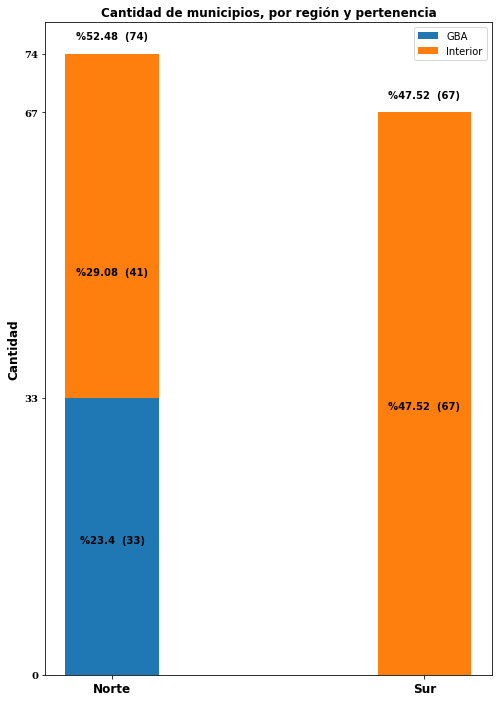

In [21]:
"""
En esta celda, una vez obtenidos los valores correspondientes al estudio realizado sobre
la categorización de los municipios, procedemos a realizar un gráfico de barras,
para ilustrar visualmente dicha categorización.
"""

#En 'fig' y 'ax' almaceno los valores devueltos por la función 'subplots',
#correspondientes a la figura y a los ejes que voy a plotear
fig, ax = plt.subplots()
fig.set_size_inches(8, 12)

fuente=fnt_mng.FontProperties(family=['serif'],weight=700,size=10)

#Primero, realizamos un gráfico de barras, con la característica de que el
#mismo, tendrá subdivisiones dentro de una misma barra, indicando con un 
#color diferente la cantidad de municipios pertenencientes al GBA y aquellos
#pertenencientes al interior de la provincia

#Primero, con la función 'bar' correspondiente a los ejes que tenemos en la
#variable 'ax', establecemos las cantidades de municipios pertenencientes
#al Gran Buenos Aires, desagregadas por región.
#Tendremos 0 en el valor correspondiente a la cantidad de municipios pertenencientes
#al GBA en la región sur

gba= ax.bar(['Norte','Sur'],             #Aquí definimos las etiquetas de las barras
       [                            #En esta lista, definimos la altura de la primera parte de cada barra
        tabla_frec['GBA']['NORTE'], #La primera, será igual a la cantidad de municipios pertenencientes al GBA, ubicados en la región norte (que son todos)
        tabla_frec['GBA']['SUR']    #La segunda, será igual a la cantidad de municipios pertenencientes al GBA, ubicados en la región sur (ninguno)
       ],
       label='GBA',                 #Etiquetamos esta parte de las barras como 'GBA'
       width = 0.3)                 #Definimos el ancho de las barras

#Luego, con la misma función, establecemos las cantidades de municipios pertenencientes
#al interior de la provincia. A través del parámetro 'bottom',le indicamos que comienze a construir las barras ploteadas,
#desde los valores previamente ingresados en la sentencia anterior, lo cual lo hará con un color diferente,
#de forma que podremos visualizar dicha desagregación por categorías.
#Como la cantidad de municipios pertenencientes al GBA en la región sur es igual
#a cero, la columna correspondiente a esta región tendrá un solo color.

inter=ax.bar(['Norte','Sur'],                  #Aquí definimos las etiquetas de las barras
       [                                 #En esta lista, definimos la altura de la segunda parte de cada barra
        tabla_frec['INTERIOR']['NORTE'], #La primera, será igual a la cantidad de municipios pertenencientes al interior, ubicados en la región norte
        tabla_frec['INTERIOR']['SUR']    #La segunda, será igual a la cantidad de municipios pertenencientes al interior, ubicados en la región sur
       ], 
       bottom=[                          #En esta lista, definimos la altura desde donde comienza a plotearse la segunda parte de cada barra, que 
           tabla_frec['GBA']['NORTE'],   #coincidirá con la altura con la que fue ploteada la primera parte (municipios del GBA en la región norte y
           tabla_frec['GBA']['SUR']      #municipios del GBA en la región sur, considerando que este último valor es igual a cero).
       ], 
       label='Interior',                 #Etiquetamos esta parte de las barras como 'Interior'
       width = 0.3)                      #Definimos el ancho de las barras

#Definimos el string 'Cantidad' para etiquetar el eje 'y'
ax.set_ylabel('Cantidad',fontweight='bold',fontsize=12)

ax.set_xticklabels(['Norte','Sur'],fontweight='bold',fontsize=12)

y_ticks= [
            tabla_frec['GBA']['NORTE'],
            tabla_frec['GBA']['SUR'],
            tabla_frec['INTERIOR']['NORTE'] + tabla_frec['GBA']['NORTE'],
            tabla_frec['INTERIOR']['SUR'] + tabla_frec['GBA']['SUR'],
         ]

ax.set_yticklabels(y_ticks,fontproperties=fuente)

ax.set_yticks(y_ticks,fontproperties=fuente)

#ax.set_xlabel(['Norte','Sur'],fontweight='bold',fontsize=12)

#Definimos un título para el gráficp
ax.set_title('Cantidad de municipios, por región y pertenencia',fontweight='bold',fontsize=12)

#Mostramos las leyendas en el gráfico
ax.legend()

#Mostramos el porcentaje y la cantidad correspondiente, en cada una de las secciones de las barras
plt.text(0, 
         16, 
         "%" + str((tabla_frec_norm['GBA']['NORTE']*100).round(2)) + "  (" +  str(tabla_frec['GBA']['NORTE']) + ")", 
         va = 'center', 
         ha = 'center', 
         fontdict={'size' : 10, 'weight':'black'})

plt.text(0, 
         48, 
         "%" + str((tabla_frec_norm['INTERIOR']['NORTE']*100).round(2)) + "  (" +  str(tabla_frec['INTERIOR']['NORTE']) + ")", 
         va = 'center', 
         ha = 'center',
         fontdict={'size' : 10, 'weight':'black'})


plt.text(0, 
         76, 
         "%" + str((tabla_frec_norm['TOTAL']['NORTE']*100).round(2)) + "  (" +  str(tabla_frec['TOTAL']['NORTE']) + ")", 
         va = 'center', 
         ha = 'center' ,
         fontdict={'size' : 10, 'weight':'black'})



plt.text(1, 
         32,
        "%" + str((tabla_frec_norm['INTERIOR']['SUR']*100).round(2)) + "  (" +  str(tabla_frec['INTERIOR']['SUR']) + ")",   
         va = 'center',
         ha = 'center', 
         fontdict={'size' : 10, 'weight':'black'})

plt.text(1, 
         69, 
        "%" + str((tabla_frec_norm['TOTAL']['SUR']*100).round(2)) + "  (" +  str(tabla_frec['TOTAL']['SUR']) + ")",   
         va = 'center', 
         ha = 'center',
         fontdict={'size' : 10, 'weight':'black'})

#Finalmente, mostramos por pantalla el ploteo de los gráficos

plt.show()
gc.collect()

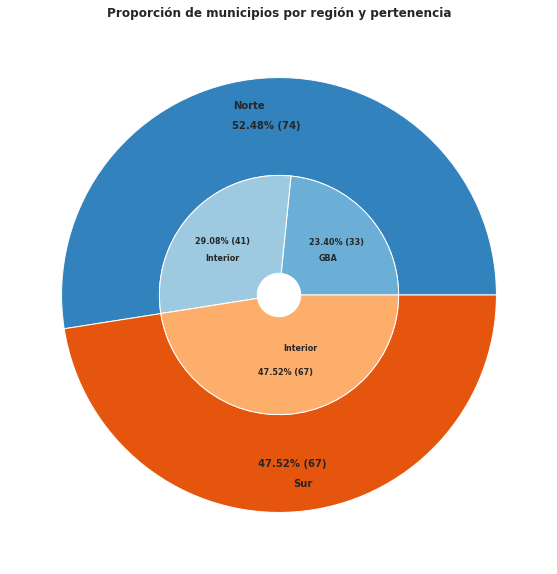

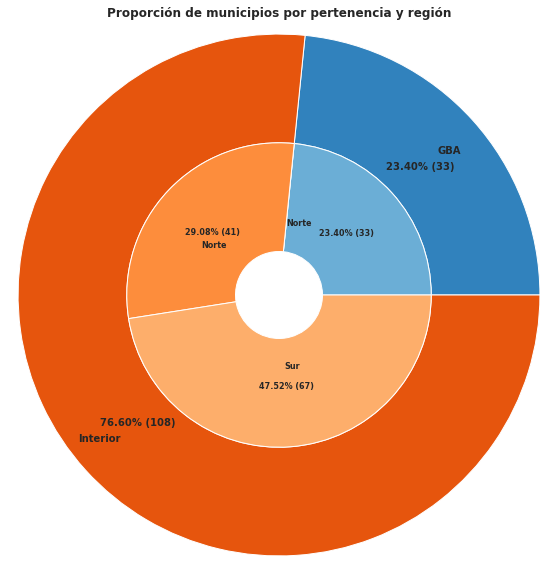

In [17]:
"""
En esta celda, procederemos a realizar dos gráfico de torta anidados, los cuales son particularmente 
útiles a la hora de ilustrar las proporciones del agrupamiento de los municipios en cada categoría.
Cada uno de estos gráficos reflejará los mismos datos, pero agrupados de forma complementaria
entre si, de manera que nos resulte mas facil visualizar la distribución por categorías
en cada uno de ellos.
"""


#Procederemos ahora a realizar el primer gráfico de torta anidado.
#Aquí tendremos la categorización por región en la sección exterior, y por pertenencia en la seccion interior.


#En 'fig' y 'ax' desempaqueto los valores devueltos por la función 'subplots',
#correspondientes a la figura y a los ejes
fig, ax = plt.subplots()

#Definimos el tamaño del gráfico
fig.set_size_inches(10, 10)

#Definimos el tamaño de la seccion interior del gráfico de torta anidado,
#en relación al de su sección exterior, y lo guardamos en 'size'
size = 0.45

#Definimos un vector bidimensional 'vals', que contendrá los valores correspondientes a nuestra tabla de
#frecuencias (sin los márgenes), con la categorización por pertenencia en las filas, y por región en las columnas
vals=np.array(tabla_frec)[0:2,0:2]

#Definimos los colores que utilizará el gráfico de torta
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])


#En una sentencia, llamamos a la función 'pie' de la variable 'ax', para pasarle los datos
#correspondientes al ploteo de la sección exterior del gráfico

ax.pie(vals.sum(axis=1),              #Como primer parámetro, le paso una lista de dos elementos, con la cantidad de municipios que 
                                      #tengo en cada región, generada a partir de la suma de columnas de lista anidada que tengo en 'vals'
   radius=1,                          #El radio de la torta valdrá 1
   colors=outer_colors,               #Los colores serán los que tengo en mi lista outer_colors
   wedgeprops=dict(                   #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'),  
   pctdistance=0.78,                  #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
   labeldistance=0.87,                #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
   textprops={'size' : 10,
             'weight':'bold'},           #Defino el tamaño del texto mostrado
   autopct=make_autopct(              #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                      #con los siguientes argumentos:
       [tabla_frec['TOTAL']['NORTE'], #Primero, el total de municipios de la región norte
        tabla_frec['TOTAL']['SUR']]   #Segundo, el total de municipios de la región sur
       ),
   labels=["Norte","Sur"])            #Definimos las etiquetas "Norte" y "Sur" para las porciones mostradas en la parte exterior de la torta

#En otra sentencia, llamamos nuevamente a la función 'pie' de la variable 'ax', para pasarle
#los datos correspondientes al ploteo de la sección interior del gráfico

ax.pie(vals.flatten(),                  #Como primer parámetro, le paso una lista de cuatro elementos, con la cantidad de municipios que tengo clasificados
                                        #de acuerdo a su región y a su pertenencia, generada a partir del aplanamiente de lista anidada que tengo en 'vals'    
    radius=1-size,                      #El radio de la torta valdrá 1 menos el valor de 'size'
    colors=inner_colors,                #Los colores serán los que tengo en mi lista outer_colors
    wedgeprops=dict(                    #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'), 
    pctdistance=0.65,                   #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
    labeldistance=0.45,                 #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
    textprops={'size' : 8,              #Defino el tamaño del texto mostrado
               'weight':'bold'},             
    autopct=make_autopct(               #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                        #con los siguientes argumentos:
     [tabla_frec['GBA']['NORTE'],       #Primero, la cantidad de municipios de la región norte pertenencientes al GBA
      tabla_frec['INTERIOR']['NORTE'],  #Segundo, la cantidad de municipios de la región norte pertenencientes al interior
      tabla_frec['GBA']['SUR'],         #Tercero, la cantidad de municipios de la región sur pertenencientes al GBA (la incluimos aquí, aunque valga 0)
      tabla_frec['INTERIOR']['SUR'],]), #Cuarto, la cantidad de municipios de la región sur pertenencientes al interior
    labels=["GBA",                      #Definimos las etiquetas "GBA", "Interior" ,"" (string vacío) y nuevamete "Interior",
            "Interior",                 #para las porciones mostradas en la parte interior de la torta. El string vacío se debe a que no tenemos 
            "",                         #municipios pertenencientes al GBA en la región sur, por lo que sería inconveniente mostrar un texto en el gráfico
            "Interior"])                #con valores de cantidad y porcentaje correspondientes a esta categorización.



#Definimos un título para el gráfico, con el formato correspondiente
ax.set_title('Proporción de municipios por región y pertenencia',fontweight='bold',fontsize=12)

#Mostramos el gráfico
plt.show()





#Luego, procederemos a realizar el segundo gráfico de torta anidado, en este caso con las variables invertidas respecto del primero.
#Aquí entonces, tendremos la categorización por pertenencia en la sección exterior, y por región en la seccion interior.
#Esto se puede lograr facilmente replicando el código utilizado para el gráfico anterior, pero trasponiendo
#la matriz correspondiente a la tabla de frecuencias y modificando unas pocas etiquetas.

#En 'fig' y 'ax' desempaqueto los valores devueltos por la función 'subplots',
#correspondientes a la figura y a los ejes
fig, ax = plt.subplots()

#Definimos el tamaño del gráfico
fig.set_size_inches(10, 10)

#Definimos el tamaño de la seccion interior del gráfico de torta anidado,
#en relación al de su sección exterior, y lo guardamos en 'size'
size = 0.5

#Definimos un vector bidimensional 'vals', que contendrá los valores correspondientes a nuestra tabla de frecuencias
#(sin los márgenes), en este caso, traspuesta con la categorización por pertenencia en las filas, y por región en las columnas
vals=np.transpose(np.array(tabla_frec)[0:2,0:2])

#Definimos los colores que utilizará el gráfico de torta
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])


#En una sentencia, llamamos a la función 'pie' de la variable 'ax', para pasarle los datos
#correspondientes al ploteo de la sección exterior del gráfico

ax.pie(vals.sum(axis=1),              #Como primer parámetro, le paso una lista de dos elementos, con la cantidad de municipios que 
                                      #tengo en cada región, generada a partir de la suma de columnas de lista anidada que tengo en 'vals'
   radius=1.2,                          #El radio de la torta valdrá 1
   colors=outer_colors,               #Los colores serán los que tengo en mi lista outer_colors
   wedgeprops=dict(                   #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'),  
   pctdistance=0.73,                  #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
   labeldistance=0.82,                #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
   textprops={'size' : 10,
             'weight':'bold'},           #Defino el tamaño del texto mostrado
   autopct=make_autopct(              #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                      #con los siguientes argumentos:
       [tabla_frec['GBA']['TOTAL'], #Primero, el total de municipios de la región norte
        tabla_frec['INTERIOR']['TOTAL']]   #Segundo, el total de municipios de la región sur
       ),
   labels=["GBA","Interior"])            #Definimos ahora, las etiquetas "GBA" e "Interior" para las porciones mostradas en la parte exterior de la torta

#En otra sentencia, llamamos nuevamente a la función 'pie' de la variable 'ax', para pasarle
#los datos correspondientes al ploteo de la sección interior del gráfico

ax.pie(vals.flatten(),                  #Como primer parámetro, le paso una lista de cuatro elementos, con la cantidad de municipios que tengo clasificados
                                        #de acuerdo a su región y a su pertenencia, generada a partir del aplanamiente de lista anidada que tengo en 'vals'    
    radius=1.2-size,                      #El radio de la torta valdrá 1 menos el valor de 'size'
    colors=inner_colors,                #Los colores serán los que tengo en mi lista outer_colors
    wedgeprops=dict(                    #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'), 
    pctdistance=0.6,                   #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
    labeldistance=0.47,                 #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
    textprops={'size' : 8,
              'weight':'bold'},             #Defino el tamaño del texto mostrado
    autopct=make_autopct(               #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                        #con los siguientes argumentos:
     [tabla_frec['GBA']['NORTE'],       #Primero, la cantidad de municipios de la región norte pertenencientes al GBA
      tabla_frec['INTERIOR']['NORTE'],  #Segundo, la cantidad de municipios de la región norte pertenencientes al interior
      tabla_frec['GBA']['SUR'],         #Tercero, la cantidad de municipios de la región sur pertenencientes al GBA (la incluimos aquí, aunque valga 0)
      tabla_frec['INTERIOR']['SUR'],]), #Cuarto, la cantidad de municipios de la región sur pertenencientes al interior
    labels=["",                      #Definimos ahora las etiquetas "" (string vacío), "Norte" ,"Norte" nuevamente y  "Sur",
            "Norte",                 #para las porciones mostradas en la parte interior de la torta. El string vacío se debe a que no tenemos 
            "Norte",                         #municipios pertenencientes al GBA en la región sur, por lo que sería inconveniente mostrar un texto en el gráfico
            "Sur"])                #con valores de cantidad y porcentaje correspondientes a esta categorización.

#Definimos un título para el gráfico, con el formato correspondiente
ax.set_title('Proporción de municipios por pertenencia y región',fontweight='bold',fontsize=12)

#Mostramos el gráfico
plt.show()

gc.collect()

In [18]:
"""
Luego de realizar dichas tablas y gráficos, observamos como se distribuyen los municipios de acuerdo a su categoría.

De un total de 141 municipios analizados, 74 de ellos se ubican en la región norte, y los 67 restantes, en la región sur.
Dentro de los que se incluyen en la región norte, tenemos 33 de ellos pertenencientes al GBA, y los otros 41, al interior
de la provincia, teniendo un total de 108 municipios en el interior,.
Podemos destacar que estamos analizando el GBA, que es un conjunto de unidades terrioriales analizadas que se encuentra
geográficamente, en el norte de la provincia, por lo que no existen municipios que pertenezcas a la región sur, 
y a la vez, al GBA.
Tambien debemos observar lo siguiente: a efectos de nuestro trabajo, estamos analizando
al GBA como una unidad geográfica. Para dicho propósito, incluimos, en primer lugar, a la Ciudad Autónoma De Buenos Aries,
el cual, si bien es una jurisdicción subnacional de primer orden (es decir, no pertenece a la provincia),
claramente debemos tomarla en cuenta a la hora de estudiar el GBA como un todo.
Por otra parte, debido a la definición que realizamos respecto del GBA, creamos manualmente en nuestra base de 
datos, registros correspondientes a subdivisiones de algunos municipios, tomando en cuenta que tienen zonas 
geográfica que integran parcialmente el GBA, pero a la vez, zonas bien inmersas en el interior.
Como no fue posible obtener los datos censales dentro de dichos municipios con un nivel de desagragación
tan fino, en muchos casos, sus datos fueron estimados, en base a determinados parámetros, a partir de la información
censal rigurosa obtenida, de forma desagregada por radios censales, de aquellos cercanos a dichas regiones,
obtenidos del CONICET a traves de la plataforma poblaciones.org, y a través de cálculos de superficie realizados con la herramienta Google Earth.

A pesar de que ciertos datos correspondientes a la región norte, son estimados y no exactos,
consideramos que la información que respecta a estos, que existe en nuestra base de datos,
es lo suficientemente confiable como para ilustrar la realidad correspondiente a cada categoría analizada
del total de nuestro conjunto estudiado.
""";

In [19]:
"""
En esta celda, comenzaremos a analizar las variables cuantitativas, en relación a las cualitativas.
Para ello, comenzaremos realizando las tablas de cruces (crosstab) utilizando los atriutos 'values' y aggfunc'
Estos me permiten establecer relaciones entre tres variables diferentes: dos categóricas y una cuantitativa.
Previamente, utilizamos tablas de cruces para generar nuestras tablas de frecuencias, tanto la absoluta como la relativa,
únicamente para categorizar los municipios sobre dos variables categóricas: de acuerdo a su región y a su pertenencia.

En este caso, en el atributo 'value', añadimos una tercera variable, que será de tipo cuantitativa,
y en el atributo 'aggfunc', indicaremos una función de agregación, que nos indicará como procesar dicha variable.

A medida que vamos generando nuestras tablas de cruces, iremos indicando que variable cuantitativa estamos
evaluando en cada caso, y de que forma la estaremos procesando.
"""

#Primero, generamos la tabla de cruces correspondiente a la población

tabla_pob=pd.crosstab(municipios['REGION'],            #Nuestra primera variable categórica será la región
                      municipios['PERTENENCIA'],       #Nuestra segunda variable categórica será la pertenencia
                      values=municipios['POBLACION'],  #Nuestra variable cuantitativa será la población
                      aggfunc="sum",                   #Nuestra función de agregación sera 'sum': en cada celda de la tabla resultante, obtendremos la 
                                                       #suma de la población, desagregada de acuerdo a las variables categóricas (por región y pertenencia)
                      margins=True,                    #La tabla incluirá los márgenes, es decir, nos mostrará la poblacion total de cada región y pertenencia
                      margins_name="TOTAL"             #El nombre de los márgenes será "TOTAL", para cada fila y columna 
                      ).fillna(0)                      #Los valores indefinidos los establecemos en 0 (dado que nos traería un error al intentar calcular
                                                       #la poblacion de los municipios pertenecientes al GBA de la región sur, los cuales no existen)

#Mostramos por pantalla la tabla de cruces obtenida
print("Tabla de población (en habitantes):")
display(tabla_pob)                                     

print("\n\n")

#Luego, generamos la tabla de cruces correspondiente a la superficie

tabla_sup=pd.crosstab(municipios['REGION'],             #Nuestra primera variable categórica será la región
                      municipios['PERTENENCIA'],        #Nuestra segunda variable categórica será la pertenencia
                      values=municipios['SUPERFICIE'],  #Nuestra variable cuantitativa será la superficie
                      aggfunc="sum",                    #Nuestra función de agregación sera 'sum': en cada celda de la tabla resultante, obtendremos la
                                                        #suma de la población, desagregada de acuerdo a las variables categóricas (por región y pertenencia)
                      margins=True,                     #La tabla incluirá los márgenes, es decir, nos mostrará la poblacion total de cada región y pertenencia
                      margins_name="TOTAL"              #El nombre de los márgenes será "TOTAL", para cada fila y columna 
                     ).fillna(0)                        #Los valores indefinidos los establecemos en 0 (dado que nos traería un error al intentar calcular
                                                        #la poblacion de los municipios pertenecientes al GBA de la región sur, los cuales no existen)

#Mostramos por pantalla la tabla de cruces obtenida
print("Tabla de superficie (en km^2):")
display(tabla_sup)

print("\n\n")

#A partir de las tablas de cruces obtenidas correspondientes a las variables de población y superficie,
#generamos una tabla, con el mismo formato, para la densidad habitacional.
#Para ello, realizaremos el siguiente procedimiento:

np.seterr(all='ignore')                                            #Ya que en ambas tablas hay un elemento en la misma posición con el valor 0,
                                                                   #al dividir 0/0 nos traería un warning, que evitamos con esta línea

    
array_dens=tabla_pob.to_numpy()/tabla_sup.to_numpy()               #Convertimos las tablas de cruces de población y superficie en arrays de NumPy. los dividimos
                                                                   #entre sí (elemento por elemento), y nos guardamos el resultado en la variable array_dens
tabla_dens = pd.DataFrame(array_dens,                              #Construimos un DataFrame a partir de los valores de array_dens, y lo guardamos en tabla_dens
                          columns = ['GBA','INTERIOR','TOTAL'],    #Asignamos los valores de 'GBA','INTERIOR' y 'TOTAL' a los nombres de las columnas
                          index = ['NORTE', 'SUR', 'TOTAL']        #Asignamos los valores de 'NORTE','SUR' y 'TOTAL' a los nombres de las filas
                         ).fillna(0)                               #Reemplazamos con el valor 0 a las celdas cuyo resultado fue NaN (al intentar una division por 0)
tabla_dens = tabla_dens.rename_axis('PERTENENCIA', axis="columns") #Nombramos el eje de columnas con el valor 'PERTENENCIA'
tabla_dens = tabla_dens.rename_axis('REGION', axis="index")        #Nombramos el eje de filas (índices) con el valor 'REGION'

#Ahora tenemos, en la variable tabla_dens, un DataFrame de Pandas con exactamente el mismo formato que los
#generados con la función 'crosstab', teniendo aquí, la tabla de cruces correspondiente a la densidad habitacional
print("Tabla de densidad habitacional (en hab/km^2):")
display(tabla_dens)

#Para calcular la tabla de cruces correspondiente al porcentaje de hogares con NBI, realizaremos un procedimiento similar,
#calculando primero, la tabla de cruces del total de hogares, luego la tabla de cruces con el total de hogares con %NBI, y finalmente,
#obtendremos el porcentaje con los valores de desagregación que necesitamos, dividiendo la información, celda por celda, entre ambas tablas

#Primero, generamos la tabla de cruces correspondiente a la cantidad total de hogares

tabla_cant_hog=pd.crosstab(municipios['REGION'],                  #Nuestra primera variable categórica será la región
                      municipios['PERTENENCIA'],             #Nuestra segunda variable categórica será la pertenencia
                      values=municipios['HOGARES_TOTALES'],  #Nuestra variable cuantitativa será la cantidad total de hogares
                      aggfunc="sum",                         #Nuestra función de agregación sera 'sum': en cada celda de la tabla resultante, obtendremos la 
                                                             #suma de la población, desagregada de acuerdo a las variables categóricas (por región y pertenencia)
                      margins=True,                          #La tabla incluirá los márgenes, es decir, nos mostrará la poblacion total de cada región y pertenencia
                      margins_name="TOTAL"                   #El nombre de los márgenes será "TOTAL", para cada fila y columna 
                      ).fillna(0)                            #Los valores indefinidos los establecemos en 0 (dado que nos traería un error al intentar calcular
                                                             #la poblacion de los municipios pertenecientes al GBA de la región sur, los cuales no existen)

#Mostramos por pantalla la tabla de cruces obtenida
print("Tabla de cantidad total de viviendas:")
display(tabla_cant_hog)    


#Calculamos el promedio de habitantes por vivienda en cada zona

array_hab_viv=tabla_pob.to_numpy()/tabla_cant_hog.to_numpy()               #Convertimos las tablas de cruces de población y superficie en arrays de NumPy. los dividimos
                                                                   #entre sí (elemento por elemento), y nos guardamos el resultado en la variable array_dens
#print(array_porc_nbi)
tabla_hab_viv = pd.DataFrame(array_hab_viv,                              #Construimos un DataFrame a partir de los valores de array_dens, y lo guardamos en tabla_dens
                          columns = ['GBA','INTERIOR','TOTAL'],    #Asignamos los valores de 'GBA','INTERIOR' y 'TOTAL' a los nombres de las columnas
                          index = ['NORTE', 'SUR', 'TOTAL']        #Asignamos los valores de 'NORTE','SUR' y 'TOTAL' a los nombres de las filas
                         ).fillna(0)                               #Reemplazamos con el valor 0 a las celdas cuyo resultado fue NaN (al intentar una division por 0)
tabla_hab_viv  = tabla_hab_viv.rename_axis('PERTENENCIA', axis="columns") #Nombramos el eje de columnas con el valor 'PERTENENCIA'
tabla_hab_viv = tabla_hab_viv.rename_axis('REGION', axis="index")        #Nombramos el eje de filas (índices) con el valor 'REGION'

#Mostramos por pantalla la tabla de cruces obtenida
print("Tabla de promedio de personas por vivienda:")
display(tabla_hab_viv)


#Luego, generamos la tabla de cruces correspondiente a la cantidad de hogares con NBI

tabla_cant_nbi=pd.crosstab(municipios['REGION'],                  #Nuestra primera variable categórica será la región
                      municipios['PERTENENCIA'],             #Nuestra segunda variable categórica será la pertenencia
                      values=municipios['HOGARES_CON_NBI'],  #Nuestra variable cuantitativa será la cantidad de hogares con NBI
                      aggfunc="sum",                         #Nuestra función de agregación sera 'sum': en cada celda de la tabla resultante, obtendremos la 
                                                             #suma de la población, desagregada de acuerdo a las variables categóricas (por región y pertenencia)
                      margins=True,                          #La tabla incluirá los márgenes, es decir, nos mostrará la poblacion total de cada región y pertenencia
                      margins_name="TOTAL"                   #El nombre de los márgenes será "TOTAL", para cada fila y columna 
                      ).fillna(0)                            #Los valores indefinidos los establecemos en 0 (dado que nos traería un error al intentar calcular
                                                             #la poblacion de los municipios pertenecientes al GBA de la región sur, los cuales no existen)

#Mostramos por pantalla la tabla de cruces obtenida
print("Tabla de cantidad de viviendas con NBI:")
display(tabla_cant_nbi)


#Ahora podremos calcular los valores de la tabla correspondientes al porcentaje de viviendas con NBI, con la desagregación necesaria

array_porc_nbi=tabla_cant_nbi.to_numpy()/tabla_cant_hog.to_numpy()               #Convertimos las tablas de cruces de población y superficie en arrays de NumPy. los dividimos
                                                                   #entre sí (elemento por elemento), y nos guardamos el resultado en la variable array_dens
#print(array_porc_nbi)
tabla_porc_nbi = pd.DataFrame(array_porc_nbi,                              #Construimos un DataFrame a partir de los valores de array_dens, y lo guardamos en tabla_dens
                          columns = ['GBA','INTERIOR','TOTAL'],    #Asignamos los valores de 'GBA','INTERIOR' y 'TOTAL' a los nombres de las columnas
                          index = ['NORTE', 'SUR', 'TOTAL']        #Asignamos los valores de 'NORTE','SUR' y 'TOTAL' a los nombres de las filas
                         ).fillna(0)                               #Reemplazamos con el valor 0 a las celdas cuyo resultado fue NaN (al intentar una division por 0)
tabla_porc_nbi  = tabla_porc_nbi.rename_axis('PERTENENCIA', axis="columns") #Nombramos el eje de columnas con el valor 'PERTENENCIA'
tabla_porc_nbi = tabla_porc_nbi.rename_axis('REGION', axis="index")        #Nombramos el eje de filas (índices) con el valor 'REGION'

#Ahora tenemos, en la variable tabla_dens, un DataFrame de Pandas con exactamente el mismo formato que los
#generados con la función 'crosstab', teniendo aquí, la tabla de cruces correspondiente a la densidad habitacional
formato_porcentaje = lambda x: "% " + str(round(x*100,2)) 
print("Tabla de porcentaje de viviendas con NBI:")
display(tabla_porc_nbi.applymap(formato_porcentaje))

gc.collect()

Tabla de población (en habitantes):


PERTENENCIA         GBA   INTERIOR     TOTAL
REGION                                      
NORTE       13603658.00 2255067.00  15858725
SUR                0.00 2656510.00   2656510
TOTAL       13603658.00 4911577.00  18515235




Tabla de superficie (en km^2):


PERTENENCIA     GBA  INTERIOR     TOTAL
REGION                                 
NORTE       4425.49  51664.74  56090.23
SUR            0.00 249265.92 249265.92
TOTAL       4425.49 300930.66 305356.15




Tabla de densidad habitacional (en hab/km^2):


PERTENENCIA     GBA  INTERIOR  TOTAL
REGION                              
NORTE       3073.93     43.65 282.74
SUR            0.00     10.66  10.66
TOTAL       3073.93     16.32  60.63

Tabla de cantidad total de viviendas:


PERTENENCIA        GBA   INTERIOR    TOTAL
REGION                                    
NORTE       4305817.00  728364.00  5034181
SUR               0.00  905437.00   905437
TOTAL       4305817.00 1633801.00  5939618

Tabla de promedio de personas por vivienda:


PERTENENCIA  GBA  INTERIOR  TOTAL
REGION                           
NORTE       3.16      3.10   3.15
SUR         0.00      2.93   2.93
TOTAL       3.16      3.01   3.12

Tabla de cantidad de viviendas con NBI:


PERTENENCIA       GBA  INTERIOR   TOTAL
REGION                                 
NORTE       369575.00  50589.00  420164
SUR              0.00  38783.00   38783
TOTAL       369575.00  89372.00  458947

Tabla de porcentaje de viviendas con NBI:


PERTENENCIA     GBA INTERIOR   TOTAL
REGION                              
NORTE        % 8.58   % 6.95  % 8.35
SUR           % 0.0   % 4.28  % 4.28
TOTAL        % 8.58   % 5.47  % 7.73

In [20]:
"""
En esta celda, obtendremos las tablas de cruces normalizadas solamente de las correspondientes a las de
población, superficie, y cantidad de hogares con NBI, realizadas con los valores absolutos en la celda anterior
"""

#Primero, generamos la tabla de cruces correspondiente a la población

tabla_pob_norm=pd.crosstab(municipios['REGION'],            #Nuestra primera variable categórica será la región
                      municipios['PERTENENCIA'],       #Nuestra segunda variable categórica será la pertenencia
                      values=municipios['POBLACION'],  #Nuestra variable cuantitativa será la población
                      aggfunc="sum",                   #Nuestra función de agregación sera 'sum': en cada celda de la tabla resultante, obtendremos la 
                                                       #suma de la población, desagregada de acuerdo a las variables categóricas (por región y pertenencia)
                      margins=True,                    #La tabla incluirá los márgenes, es decir, nos mostrará la poblacion total de cada región y pertenencia
                      margins_name="TOTAL",             #El nombre de los márgenes será "TOTAL", para cada fila y columna 
                      normalize=True  
                      ).fillna(0)                      #Los valores indefinidos los establecemos en 0 (dado que nos traería un error al intentar calcular
                                                       #la poblacion de los municipios pertenecientes al GBA de la región sur, los cuales no existen)


#Luego, generamos la tabla de cruces correspondiente a la superficie

tabla_sup_norm=pd.crosstab(municipios['REGION'],             #Nuestra primera variable categórica será la región
                      municipios['PERTENENCIA'],        #Nuestra segunda variable categórica será la pertenencia
                      values=municipios['SUPERFICIE'],  #Nuestra variable cuantitativa será la superficie
                      aggfunc="sum",                    #Nuestra función de agregación sera 'sum': en cada celda de la tabla resultante, obtendremos la
                                                        #suma de la población, desagregada de acuerdo a las variables categóricas (por región y pertenencia)
                      margins=True,                     #La tabla incluirá los márgenes, es decir, nos mostrará la poblacion total de cada región y pertenencia
                      margins_name="TOTAL",              #El nombre de los márgenes será "TOTAL", para cada fila y columna 
                      normalize=True
                     ).fillna(0)                        #Los valores indefinidos los establecemos en 0 (dado que nos traería un error al intentar calcular
                                                        #la poblacion de los municipios pertenecientes al GBA de la región sur, los cuales no existen)


#Luego, generamos la tabla de cruces correspondiente a la cantidad de hogares totales
tabla_cant_hog_norm=pd.crosstab(municipios['REGION'],                  #Nuestra primera variable categórica será la región
                      municipios['PERTENENCIA'],             #Nuestra segunda variable categórica será la pertenencia
                      values=municipios['HOGARES_TOTALES'],  #Nuestra variable cuantitativa será la cantidad total de hogares
                      aggfunc="sum",                         #Nuestra función de agregación sera 'sum': en cada celda de la tabla resultante, obtendremos la 
                                                             #suma de la población, desagregada de acuerdo a las variables categóricas (por región y pertenencia)
                      margins=True,                          #La tabla incluirá los márgenes, es decir, nos mostrará la poblacion total de cada región y pertenencia
                      margins_name="TOTAL",                  #El nombre de los márgenes será "TOTAL", para cada fila y columna 
                      normalize=True,          
                      ).fillna(0)                            #Los valores indefinidos los establecemos en 0 (dado que nos traería un error al intentar calcular
                                                             #la poblacion de los municipios pertenecientes al GBA de la región sur, los cuales no existen)
    
    
#Luego, generamos la tabla de cruces correspondiente a la cantidad de hogares con NBI

tabla_cant_nbi_norm=pd.crosstab(municipios['REGION'],                  #Nuestra primera variable categórica será la región
                      municipios['PERTENENCIA'],             #Nuestra segunda variable categórica será la pertenencia
                      values=municipios['HOGARES_CON_NBI'],  #Nuestra variable cuantitativa será la cantidad de hogares con NBI
                      aggfunc="sum",                         #Nuestra función de agregación sera 'sum': en cada celda de la tabla resultante, obtendremos la 
                                                             #suma de la población, desagregada de acuerdo a las variables categóricas (por región y pertenencia)
                      margins=True,                          #La tabla incluirá los márgenes, es decir, nos mostrará la poblacion total de cada región y pertenencia
                      margins_name="TOTAL",                   #El nombre de los márgenes será "TOTAL", para cada fila y columna 
                      normalize=True  
                     ).fillna(0)                            #Los valores indefinidos los establecemos en 0 (dado que nos traería un error al intentar calcular
                                                             #la poblacion de los municipios pertenecientes al GBA de la región sur, los cuales no existen)

#Mostramos por pantalla la tabla de cruces obtenida

formato_porcentaje = lambda x: "% " + str(round(x*100,2)) 

print("Distribución relativa de población:")
display(tabla_pob_norm.applymap(formato_porcentaje))

print("Distribución relativa de superficie:")
display(tabla_sup_norm.applymap(formato_porcentaje))

print("Distribución relativa de hogares totales:")
display(tabla_cant_hog_norm.applymap(formato_porcentaje))

print("Distribución relativa de hogares con NBI:")
display(tabla_cant_nbi_norm.applymap(formato_porcentaje))

gc.collect()

Distribución relativa de población:


PERTENENCIA      GBA INTERIOR    TOTAL
REGION                                
NORTE        % 73.47  % 12.18  % 85.65
SUR            % 0.0  % 14.35  % 14.35
TOTAL        % 73.47  % 26.53  % 100.0

Distribución relativa de superficie:


PERTENENCIA     GBA INTERIOR    TOTAL
REGION                               
NORTE        % 1.45  % 16.92  % 18.37
SUR           % 0.0  % 81.63  % 81.63
TOTAL        % 1.45  % 98.55  % 100.0

Distribución relativa de hogares totales:


PERTENENCIA      GBA INTERIOR    TOTAL
REGION                                
NORTE        % 72.49  % 12.26  % 84.76
SUR            % 0.0  % 15.24  % 15.24
TOTAL        % 72.49  % 27.51  % 100.0

Distribución relativa de hogares con NBI:


PERTENENCIA      GBA INTERIOR    TOTAL
REGION                                
NORTE        % 80.53  % 11.02  % 91.55
SUR            % 0.0   % 8.45   % 8.45
TOTAL        % 80.53  % 19.47  % 100.0

In [21]:
"""
En esta celda, nos dedicaremos a evaluar la forma de procesar la información obtenida
en las tablas de la celda anterior.

Como ya tenemos todos los datos agrupados con el nivel de desagregación que tenemos,
no tendremos necesidad de utilizar la función groupby para calcular dicha información
Sin embargo, puede resultar tedioso acceder a los datos necesarios en cada tabla,
ya que necesitaremos hacer uso intensivo de las funciones 'loc' e 'iloc', dependiendo
de si queremos acceder a los datos por fila (correspondiente a la región),
o por columna (correspondiente a la pertenencia). Asimismo, es probale que
necesitemos dejar de lado los margenes de la tabla en determinadas ocasiones,
o tambien se puede dar el caso inverso, donde necesitemos solamente los valores de
los márgenes.
Para ello, estimamos conveniente definir una función que nos facilite dicho procedimiento



Si queremos acceder individualmente a los datos que existen en las tablas,
utilizaremos la siguiente estructura:

nom_tabla[PERTENENCIA,REGION]
'nom_tabla' es el nombre de la tabla
'PERTENENCIA' es un string que puede adoptar los valores 'GBA' , 'INTERIOR' o 'TOTAL'
'REGION' es un string que puede adoptar los valores 'NORTE' , 'SUR' o 'TOTAL'

Por ejemplo, si queremos obtener la superficie total del interior de la provincia, utilizaremos:
tabla_sup['INTERIOR']['TOTAL']

Si en cambio, necesitamos la población del interior de la
provincia correspondiente a la region norte, utilizaremos:

tabla_pob['INTERIOR']['NORTE']

Para acceder a una columna en particular de cada tabla, utilizaremos la siguiente forma:
nom_tabla[PERTENENCIA]

Por ejemplo, para obtener la población de cada región, exclusivamente sobre el interior, haremos:
tabla_pob['INTERIOR']

Para acceder a una fila en particular de cada tabla, utilizaremos la siguiente forma:
nom_tabla.loc[REGION]

Por ejemplo, para obtener la población por pertenencia, exclusivamente para la región norte, haremos:
tabla_pob.loc['NORTE']


Si queremos filtrar los datos de una sola columna, de acuerdo al valor de otra,
utilizaremos la siguiente forma:

municipios[columna1][municipios[columna2] == condicion_filtro]

Por ejemplo, para obtener la población de todos los municipios ubicados en la
zona norte, haremos:
municipios['POBLACION'][municipios['REGION'] == "NORTE"]




A continuación, tenemos la necesidad de filtrar nuestras variables cuantitativas, de acuerdo a las categóricas.

En primer lugar, podemos utilizar las siguientes notaciónes para obtener una serie de Pandas, similar a un array,
con una lista de valores booleanos, que nos indican si dicha fila cumple o no con la condición establecida.

municipios['nom_columna'] == valor (notación de corchetes)
municipios.nom_columna == 'valor'  (notación de punto)

Por ejemplo, si tenemos la siguiente expresión:

print(municipios['REGION'] == "NORTE")

Obtendremos una serie con los índices que corresponden a nuestra base de datos original,
cuyos elementos valdrán 'True' en caso de que el registro correspondiente de la base
de datos se encuentre dentro de la región norte, o 'False' en caso contrario.


Luego, podremos filtrar nuestro DataFrame original en el cual está cargada la base de datos,
de acuerdo a nuestras variables categóricas, de diferentes formas, todas las cuales nos dará el mismo resultado:


Para una sola variable:

-Utilizando la funcion 'loc':

municipios.loc[municipios['nom_columna'] == valor] (notación de corchetes)
municipios.loc[municipios.nom_columna == valor]    (notación de punto)

-Sin utilizar la función 'loc':

municipios[municipios['nom_columna'] == valor] (notación de corchetes)
municipios[municipios.nom_columna == valor]    (notación de punto)


Para dos variables (podrían ser indefinidas, pero aquí solo tenemos dos variables categóricas:

-Utilizando la funcion 'loc':

municipios.loc[municipios['nom_columna1'] == valor1].loc[municipios['nom_columna2'] == valor2] (notación de corchetes)
municipios.loc[municipios.nom_columna1 == valor1].loc[municipios.nom_columna2 == valor2]       (notación de punto)

-Sin utilizar la función 'loc':

municipios[municipios['nom_columna1'] == valor1][municipios['nom_columna2']==valor2]           (notación de corchetes)
municipios[municipios.nom_columna1 == valor1][municipios.nom_columna2==valor2]                 (notación de punto)

Si bien todas las formas son equivalentes entre sí, aquí nos inclinaremos la forma
que no utiliza la función 'loc', con notación de punto, ya que es la mas corta de todas.

Por ejemplo, si queremos obtener el DataFrame filtrado sobre los municipios pertenencientes a la región
norte, haremos lo siguiente:

municipios[municipios.REGION == 'NORTE']

Por ejemplo, si queremos obtener el DataFrame filtrado sobre los municipios pertenencientes a la región
norte, que ademas pertenecen al interior de la provincia, haremos lo siguiente:

municipios[municipios.REGION == 'NORTE'][municipios.PERTENENCIA=='INTERIOR']

Estos mismos métodos nos sirven para encontrar un solo municipio por su nombre.
Para el propósito, definimos una función lambda que, utilizandolos, al pasarle
como parámetro el nombre del municipio, directamente nos devuelve sus datos,
en forma de serie de Pandas con las mismas caracteristicas que un diccionario,
o un mensaje de error en caso de no encontrarlo.
Esto lo podemos hacer facilmente, ya que aquí, el nombre de los municipios
es unívoco (no hay mas de un municipio con el mismo nombre).





Finalmente, si queremos obtener el número de registros devueltos por el DataFrame filtrado,
lo podemos hacer a traves de la función 'shape', de la cual accedemos al primer elemento,
de la siguiente forma:

municipios[municipios.nom_columna == valor].shape[0] (para una sola columna filtrada)
municipios[municipios.nom_columna1 == valor1][municipios.nom_columna2==valor2].shape[0] (para dos columnas filtradas)

No obstante, ya tenemos estos valores cargados en la tabla de frecuencias definida en una seccion anterior, por lo
que no tendremos necesidad de usarla. Sin embargo, podremos observar que si queremos, por ejemplo,
obtener la cantidad de municipios que existen en la zona norte, podremos hacerlo de ambas maneras:

municipios.loc[municipios['REGION'] == "NORTE"].shape[0]
tabla_frec['TOTAL']['NORTE']

Ambas nos darán el mismo resultado, pero la segunda forma es mas corta y se ejecuta mucho mas
rápido, por lo que en este caso, si bien comentamos que es posible, no tiene mucho sentido
utilizar la primera forma.

Una vez explicadas todas estas cuestiones, en el código de esta celda nos limitaremos a definir las funciones
mencionadas, y a ejecutar unos pocos ejemplos para ilustrar los algoritmos descriptos para procesar esta información.

"""

#Esta función recibe una tabla de cruces (de tipo DataFrame, y devuelve una serie de Pandas,
#de acuerdo a los parámetros ingresados
#Como primer argumento, recibe la tabla. Como segundo argumento, la categorización deseada (por pertenencia o por región)
#Como tercer argumento, un flag booleano que nos dice si en la serie queremos que figure el total por categoría o no
#(por defecto, si no se pasa ningún parámetro, valdrá 'True')
def agrupar(tabla, categoria, margenes=True):
        if tabla.shape != (3,3):                          #Corroboramos que la forma de la tabla sea de 3x3
            return "Error: forma de tabla no válida"      #Si no lo es, devolvemos un mensaje de error que lo indica
        
        if categoria=="PERTENENCIA":                      #Si la categoría es "PERTENENCIA", el cual es el nombre de las columnas, entramos a este if
            if margenes:                                  #Si el flag 'margenes' vale 'True'
                return tabla.loc['TOTAL']                 #Mediante la función 'loc', con la etiqueta 'TOTAL'  devolvemos la última fila de la tabla completa, correspondiente
                                                          #al los valores de la variable asociada a la tabla de cruces, desagregados solamente  por pertenencia, con el total general incluido.
            else:                                         #Si el flag 'margenes' vale 'False'
                return tabla.iloc[0:3, 0:2].loc['TOTAL']  #Primero recortamos la tabla de cruces mediante la función 'iloc'
                                                          #a la que le pasamos el slice [0:3, 0:2]. De esta forma, nos devolverá una tabla de 3x2, descartando
                                                          #la última columna de la tabla, correspondiente al total por región. De esta forma, al aplicarle a su resultado la función
                                                          # 'loc' con la etiqueta 'TOTAL' al igual que en el caso anterior, obtendremos la misma información, pero sin el total general incluido.
        
        elif categoria=="REGION":                         #Si la categoría es "REGION", el cual es el nombre de las columnas, entramos a este elif
            if margenes:                                  #Si el flag 'margenes' vale 'True'
                return tabla['TOTAL']                     #Directamente con la etiqueta 'TOTAL' (sin utilizar 'loc')  devolvemos la última columna de la tabla completa, correspondiente
                                                          #al los valores de la variable asociada a la tabla de cruces, desagregados solamente  por región, con el total general incluido.
            else:                                         #Si el flag 'margenes' vale 'False'
                return tabla.iloc[0:2, 0:3]['TOTAL']      #Primero recortamos la tabla de cruces mediante la función 'iloc'
                                                          #a la que le pasamos el slice [0:2, 0:3]. De esta forma, nos devolverá una tabla de 2x3, descartando
                                                          #la última fila de la tabla, correspondiente al total por pertenencia. De esta forma, al aplicarle a su resultado
                                                          #la etiqueta ´TOTAL' al igual que en el caso anterior, obtendremos la misma información, pero sin el total general incluido.
                
        else:                                             #Si el argumento 'categoría' no vale ni "PERTENENCIA" ni "REGION"
            return "Error: categoría no válida"           #Devolvemos un mensaje de error que lo indica




#Esta función, si encuentra un municipio con el nombre pasado como argumento,
#nos devuelve una serie de Pandas con su información, a la que podremos acceder como si fuera un diccionario.
#Si no lo encuentra, nos devuelve un string indicando el error
datos_municipio= lambda nom : municipios[municipios.NOMBRE == nom].squeeze() if municipios.loc[municipios['NOMBRE'] == nom].shape[0]==1 else "Error: Municipio no encontrado"


#Una vez definidas estas funciones, pasamos a comprobar tanto el funcionamiento de las mismas, como los
#algoritmos descriptos en la parte superior de la celda

#Mostramos por pantalla la población total que reside en el la parte del interior del sur de la provicio

print("Poblacion en el interior de la region sur (en habitantes): ", end='')
print(tabla_pob['INTERIOR']['SUR'])

#Mostramos por pantalla la superficie total de la región norte

print("Superficie de la región norte (en km²): ", end='')
print(tabla_sup['TOTAL']['NORTE'])
print()

#Mostramos por pantalla la población en cada región, exclusivamente del interior
print("Población del interior: ")
display(tabla_pob['INTERIOR'])
print()


#Mostramos por pantalla la población por pertenencia, exclusivamente para la región norte
print("Población del norte del territorio (PBA + CABA): ")
display(tabla_pob.loc['NORTE'])
print()


#Mostramos una serie de Pandas con valores booleanos, que nos indicará el valor de verdad
#de la categorización de cada registro en la región norte

print("¿El registro está incluido en la región norte?: ")
display(municipios['REGION'] == "NORTE")

#A continuacion, mostraremos el DataFrame correspondiente a la base de datos,
#filtrado con los municipios que pertenencen al GBA:

print("Municipios del GBA: ")
display(municipios[municipios.PERTENENCIA == 'GBA'])
print()

#Mostramos el DataFrame correspondiente a la base de datos,
#filtrado con los municipios que pertenencen al interior, ubicados en la región norte:

print("Municipios del norte del interior: ")
display(municipios[municipios.PERTENENCIA == 'INTERIOR'][municipios.REGION=='NORTE'])
print()

#Mostramos la superficie desagregada por region, con su total general 
print("Superficie desagregada por región (en km²): ")
display(agrupar(tabla_sup,"REGION"))
print()        

#Mostramos la población desagregada por pertenencia, sin su total general
print("Población desagregada por pertenencia (en hab): ")
display(agrupar(tabla_pob,"PERTENENCIA",False))
print()


#Mostramos los datos de los municipios de C.A.B.A. y La Matanza
display(datos_municipio("C.A.B.A."))
print()

display(datos_municipio("LA MATANZA"))
print()

#Mostramos la población de los municipios pertenencientes a la región norte 
display(municipios['POBLACION'][municipios['REGION'] == "NORTE"])
gc.collect()

Poblacion en el interior de la region sur (en habitantes): 2656510.0
Superficie de la región norte (en km²): 56090.229999999996

Población del interior: 


REGION
NORTE   2255067.00
SUR     2656510.00
TOTAL   4911577.00
Name: INTERIOR, dtype: float64


Población del norte del territorio (PBA + CABA): 


PERTENENCIA
GBA        13603658.00
INTERIOR    2255067.00
TOTAL      15858725.00
Name: NORTE, dtype: float64


¿El registro está incluido en la región norte?: 


0      False
1      False
2       True
3       True
4       True
5       True
6      False
7      False
8      False
9      False
10      True
11     False
12      True
13      True
14     False
15     False
16      True
17      True
18      True
19      True
20      True
21      True
22     False
23     False
24      True
25     False
26      True
27      True
28      True
29      True
30     False
31     False
32     False
33     False
34     False
35     False
36      True
37      True
38      True
39      True
40      True
41      True
42     False
43     False
44     False
45      True
46     False
47     False
48     False
49     False
50      True
51     False
52      True
53     False
54     False
55      True
56      True
57      True
58     False
59     False
60     False
61     False
62      True
63      True
64      True
65      True
66     False
67      True
68      True
69      True
70     False
71     False
72     False
73     False
74     False
75      True
76      True

Municipios del GBA: 


NOMBRE REGION PERTENENCIA  POBLACION  SUPERFICIE  \
3               ALMIRANTE BROWN  NORTE         GBA     552902      129.33   
5                    AVELLANEDA  NORTE         GBA     342677       52.48   
12                  BERAZATEGUI  NORTE         GBA     324244      221.01   
17                     C.A.B.A.  NORTE         GBA    2890151      204.00   
19        CAÑUELAS (Máximo Paz)  NORTE         GBA       7311       14.00   
37                      ESCOBAR  NORTE         GBA     213619      303.75   
38           ESTEBAN ECHEVERRÍA  NORTE         GBA     300959      120.22   
40                       EZEIZA  NORTE         GBA     163722      236.81   
41             FLORENCIO VARELA  NORTE         GBA     426005      189.90   
55      GENERAL RODRÍGUEZ (GBA)  NORTE         GBA      86458      213.00   
57           GENERAL SAN MARTÍN  NORTE         GBA     414196       55.75   
62                   HURLINGHAM  NORTE         GBA     181241       35.43   
63                    ITUZAINGÓ  NORTE         GBA     167824       38.24   
64                  JOSÉ C. PAZ  NORTE         GBA     265981       50.16   
67                   LA MATANZA  NORTE         GBA    1775816      329.22   
69                        LANÚS  NORTE         GBA     459263       48.35   
76              LOMAS DE ZAMORA  NORTE         GBA     616279       87.30   
77                  LUJÁN (GBA)  NORTE         GBA       5979      118.00   
81          MALVINAS ARGENTINAS  NORTE         GBA     322375       63.09   
83             MARCOS PAZ (GBA)  NORTE         GBA      50013      155.40   
86                        MERLO  NORTE         GBA     528494      173.13   
89                       MORENO  NORTE         GBA     452505      186.13   
90                        MORÓN  NORTE         GBA     321109       55.66   
100                       PILAR  NORTE         GBA     299077      383.01   
102            PRESIDENTE PERÓN  NORTE         GBA      81141      120.73   
105                     QUILMES  NORTE         GBA     582943       91.49   
118  SAN FERNANDO (Continental)  NORTE         GBA     160284       23.60   
120                  SAN ISIDRO  NORTE         GBA     292878       51.44   
121                  SAN MIGUEL  NORTE         GBA     276190       82.80   
124           SAN VICENTE (GBA)  NORTE         GBA      56150      210.90   
129                       TIGRE  NORTE         GBA     376381      304.35   
134             TRES DE FEBRERO  NORTE         GBA     340071       43.04   
137               VICENTE LÓPEZ  NORTE         GBA     269420       33.77   

     DENSIDAD_HABITACIONAL  HOGARES_TOTALES  HOGARES_SIN_NBI  HOGARES_CON_NBI  \
3                  4275.13           156918           140495            16423   
5                  6529.67           113142           106580             6562   
12                 1467.10            93164            83441             9723   
17                14167.41          1150134          1081358            68776   
19                  522.21             1977             1613              364   
37                  703.27            59981            53019             6962   
38                 2503.40            85952            76693             9259   
40                  691.36            44487            38213             6274   
41                 2243.31           113135            93878            19257   
55                  405.91            24709            21265             3444   
57                 7429.52           133202           124266             8936   
62                 5115.47            55122            51347             3775   
63                 4388.70            51444            48920             2524   
64                 5302.65            71722            63112             8610   
67                 5394.01           484909           427026            57883   
69                 9498.72           149594           142177             7417   
76                 7059.32   


Municipios del norte del interior: 


/tmp/xpython_28398/572776576.py:237: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(municipios[municipios.PERTENENCIA == 'INTERIOR'][municipios.REGION=='NORTE'])


NOMBRE REGION PERTENENCIA  POBLACION  SUPERFICIE  \
2                         ALBERTI  NORTE    INTERIOR      10654     1124.98   
4                       ARRECIFES  NORTE    INTERIOR      29044     1240.67   
10                       BARADERO  NORTE    INTERIOR      32761     1591.87   
13                        BERISSO  NORTE    INTERIOR      88470      137.59   
16                       BRANDSEN  NORTE    INTERIOR      26367     1126.02   
18                        CAMPANA  NORTE    INTERIOR      94461      954.54   
20            CAÑUELAS (Interior)  NORTE    INTERIOR      44581     1175.30   
21              CAPITÁN SARMIENTO  NORTE    INTERIOR      14494      548.89   
24                CARMEN DE ARECO  NORTE    INTERIOR      14692     1061.31   
26                      CHACABUCO  NORTE    INTERIOR      48703     2287.38   
27                      CHASCOMÚS  NORTE    INTERIOR      42277     4163.19   
28                      CHIVILCOY  NORTE    INTERIOR      64185     2057.09   
29                          COLÓN  NORTE    INTERIOR      24890      994.57   
36                       ENSENADA  NORTE    INTERIOR      56729       99.93   
39          EXALTACIÓN DE LA CRUZ  NORTE    INTERIOR      29805      634.17   
45               GENERAL ARENALES  NORTE    INTERIOR      14903     1482.64   
50              GENERAL LAS HERAS  NORTE    INTERIOR      14889      720.10   
52                    GENERAL PAZ  NORTE    INTERIOR      11202     1197.46   
56   GENERAL RODRÍGUEZ (Interior)  NORTE    INTERIOR        727      153.00   
65                          JUNÍN  NORTE    INTERIOR      90305     2253.20   
68                       LA PLATA  NORTE    INTERIOR     654324      942.23   
75                          LOBOS  NORTE    INTERIOR      36172     1724.35   
78               LUJÁN (Interior)  NORTE    INTERIOR     100294      653.00   
79                      MAGDALENA  NORTE    INTERIOR      19301     1785.29   
84          MARCOS PAZ (Interior)  NORTE    INTERIOR       4168      267.30   
85                       MERCEDES  NORTE    INTERIOR      63284     1049.47   
87                          MONTE  NORTE    INTERIOR      21034     1847.54   
91                        NAVARRO  NORTE    INTERIOR      17054     1617.56   
98                      PERGAMINO  NORTE    INTERIOR     104590     3010.19   
104                   PUNTA INDIO  NORTE    INTERIOR       9888     1550.74   
106                       RAMALLO  NORTE    INTERIOR      33042      951.51   
109                         ROJAS  NORTE    INTERIOR      23432     1978.87   
114                         SALTO  NORTE    INTERIOR      32653     1611.08   
115           SAN ANDRÉS DE GILES  NORTE    INTERIOR      23027     1132.04   
116          SAN ANTONIO DE ARECO  NORTE    INTERIOR      23138      857.59   
119          SAN FERNANDO (Islas)  NORTE    INTERIOR       2956     1130.50   
122                   SAN NICOLÁS  NORTE    INTERIOR     145857      652.26   
123                     SAN PEDRO  NORTE    INTERIOR      59036     1319.30   
125        SAN VICENTE (Interior)  NORTE    INTERIOR       3328      447.30   
126                      SUIPACHA  NORTE    INTERIOR      10081      943.87   
140                        ZÁRATE  NORTE    INTERIOR     114269     1188.85   

     DENSIDAD_HABITACIONAL  HOGARES_TOTALES  HOGARES_SIN_NBI  HOGARES_CON_NBI  \
2                     9.47             3828             3743               85   
4                    23.41             9546             9131              415   
10                   20.58            10416             9813              603   
13                  643.00            27449            24374             3075   
16                   23.42             8324             7624              700   
18                   98.96            28111            25678             2433   
20                   37.93            13335            12136             1199   
21                   26.41             4672             4376


Superficie desagregada por región (en km²): 


REGION
NORTE    56090.23
SUR     249265.92
TOTAL   305356.15
Name: TOTAL, dtype: float64


Población desagregada por pertenencia (en hab): 


PERTENENCIA
GBA        13603658.00
INTERIOR    4911577.00
Name: TOTAL, dtype: float64

NOMBRE                   C.A.B.A.
REGION                      NORTE
PERTENENCIA                   GBA
POBLACION                 2890151
SUPERFICIE                 204.00
DENSIDAD_HABITACIONAL    14167.41
HOGARES_TOTALES           1150134
HOGARES_SIN_NBI           1081358
HOGARES_CON_NBI             68776
PORCENTAJE_NBI               5.98
Name: 17, dtype: object

NOMBRE                   LA MATANZA
REGION                        NORTE
PERTENENCIA                     GBA
POBLACION                   1775816
SUPERFICIE                   329.22
DENSIDAD_HABITACIONAL       5394.01
HOGARES_TOTALES              484909
HOGARES_SIN_NBI              427026
HOGARES_CON_NBI               57883
PORCENTAJE_NBI                11.94
Name: 67, dtype: object

2        10654
3       552902
4        29044
5       342677
10       32761
12      324244
13       88470
16       26367
17     2890151
18       94461
19        7311
20       44581
21       14494
24       14692
26       48703
27       42277
28       64185
29       24890
36       56729
37      213619
38      300959
39       29805
40      163722
41      426005
45       14903
50       14889
52       11202
55       86458
56         727
57      414196
62      181241
63      167824
64      265981
65       90305
67     1775816
68      654324
69      459263
75       36172
76      616279
77        5979
78      100294
79       19301
81      322375
83       50013
84        4168
85       63284
86      528494
87       21034
89      452505
90      321109
91       17054
98      104590
100     299077
102      81141
104       9888
105     582943
106      33042
109      23432
114      32653
115      23027
116      23138
118     160284
119       2956
120     292878
121     276190
122     145857
123      5

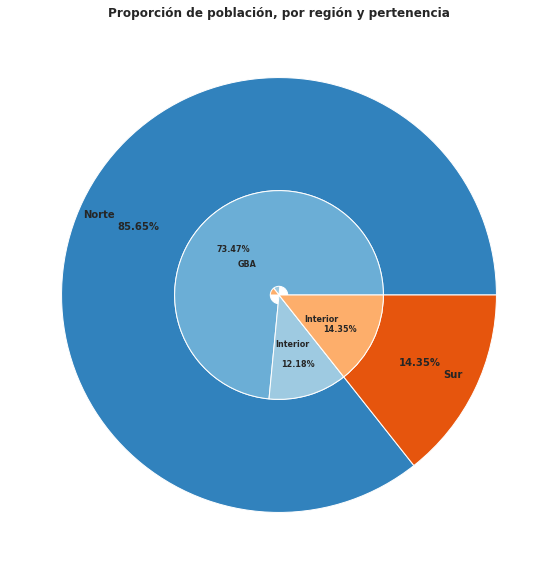

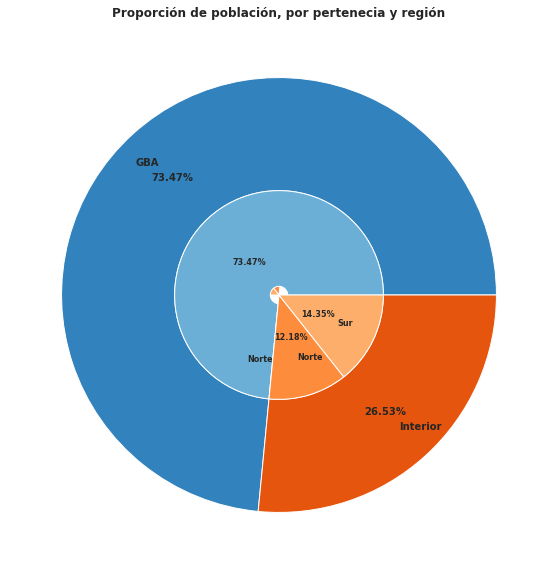

In [22]:
"""
En esta celda, nuevamente haremos gráficos de torta, pero en este caso, con la información correspondiente
a la poblacion, desagregados por pertenencia y región
"""
import sys

#En 'fig' y 'ax' desempaqueto los valores devueltos por la función 'subplots',
#correspondientes a la figura y a los ejes
fig, ax = plt.subplots()

#Definimos el tamaño del gráfico
fig.set_size_inches(10, 10)
#Definimos el tamaño de la seccion interior del gráfico de torta anidado,
#en relación al de su sección exterior, y lo guardamos en 'size'
size = 0.52

#Definimos un vector bidimensional 'vals', que contendrá los valores correspondientes a nuestra tabla de
#frecuencias (sin los márgenes), con la categorización por pertenencia en las filas, y por región en las columnas
vals=np.array(tabla_pob)[0:2,0:2]

#Definimos los colores que utilizará el gráfico de torta
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])


#En una sentencia, llamamos a la función 'pie' de la variable 'ax', para pasarle los datos
#correspondientes al ploteo de la sección exterior del gráfico

ax.pie(vals.sum(axis=1),              #Como primer parámetro, le paso una lista de dos elementos, con la cantidad de municipios que 
                                      #tengo en cada región, generada a partir de la suma de columnas de lista anidada que tengo en 'vals'
   radius=1,                          #El radio de la torta valdrá 1
   colors=outer_colors,               #Los colores serán los que tengo en mi lista outer_colors
   wedgeprops=dict(                   #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'),  
   pctdistance=0.72,                  #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
   labeldistance=0.84,                #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
   textprops={'size' : 10,
              'weight':'bold'},           #Defino el tamaño del texto mostrado
   autopct=make_autopct2(              #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                      #con los siguientes argumentos:
       [tabla_pob['TOTAL']['NORTE'], #Primero, el total de municipios de la región norte
        tabla_pob['TOTAL']['SUR']]   #Segundo, el total de municipios de la región sur
       ),
   labels=["Norte","Sur"])            #Definimos las etiquetas "Norte" y "Sur" para las porciones mostradas en la parte exterior de la torta

#En otra sentencia, llamamos nuevamente a la función 'pie' de la variable 'ax', para pasarle
#los datos correspondientes al ploteo de la sección interior del gráfico

ax.pie(vals.flatten(),                  #Como primer parámetro, le paso una lista de cuatro elementos, con la cantidad de municipios que tengo clasificados
                                        #de acuerdo a su región y a su pertenencia, generada a partir del aplanamiente de lista anidada que tengo en 'vals'    
    radius=1-size,                      #El radio de la torta valdrá 1 menos el valor de 'size'
    colors=inner_colors,                #Los colores serán los que tengo en mi lista outer_colors
    wedgeprops=dict(                    #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'), 
    pctdistance=0.65,                   #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
    labeldistance=0.45,                 #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
    textprops={'size' : 8,
               'ha':'center',
               'va':'top',
               'weight':'bold'},             #Defino el tamaño del texto mostrado
    autopct=make_autopct2(               #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                        #con los siguientes argumentos:
     [tabla_pob['GBA']['NORTE'],       #Primero, la cantidad de municipios de la región norte pertenencientes al GBA
      tabla_pob['INTERIOR']['NORTE'],  #Segundo, la cantidad de municipios de la región norte pertenencientes al interior
      tabla_pob['GBA']['SUR'],         #Tercero, la cantidad de municipios de la región sur pertenencientes al GBA (la incluimos aquí, aunque valga 0)
      tabla_pob['INTERIOR']['SUR'],]), #Cuarto, la cantidad de municipios de la región sur pertenencientes al interior
    labels=["GBA",                      #Definimos las etiquetas "GBA", "Interior" ,"" (string vacío) y nuevamete "Interior",
            "Interior",                 #para las porciones mostradas en la parte interior de la torta. El string vacío se debe a que no tenemos 
            "",                         #municipios pertenencientes al GBA en la región sur, por lo que sería inconveniente mostrar un texto en el gráfico
            "Interior"])                #con valores de cantidad y porcentaje correspondientes a esta categorización.


#Definimos un título para el gráfico, con el formato correspondiente
ax.set_title('Proporción de población, por región y pertenencia',fontweight='bold',fontsize=12)

#Muestro el gráfico
plt.show()


#Luego, procederemos a realizar el segundo gráfico de torta anidado, en este caso con las variables invertidas respecto del primero.
#Aquí entonces, tendremos la categorización por pertenencia en la sección exterior, y por región en la seccion interior.
#Esto se puede lograr facilmente replicando el código utilizado para el gráfico anterior, pero trasponiendo
#la matriz correspondiente a la tabla de frecuencias y modificando unas pocas etiquetas.

#En 'fig' y 'ax' desempaqueto los valores devueltos por la función 'subplots',
#correspondientes a la figura y a los ejes
fig, ax = plt.subplots()

#Definimos el tamaño del gráfico
fig.set_size_inches(10, 10)

#Definimos el tamaño de la seccion interior del gráfico de torta anidado,
#en relación al de su sección exterior, y lo guardamos en 'size'
size = 0.52

#Definimos un vector bidimensional 'vals', que contendrá los valores correspondientes a nuestra tabla de frecuencias
#(sin los márgenes), en este caso, traspuesta con la categorización por pertenencia en las filas, y por región en las columnas
vals=np.transpose(np.array(tabla_pob)[0:2,0:2])

#Definimos los colores que utilizará el gráfico de torta
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])


#En una sentencia, llamamos a la función 'pie' de la variable 'ax', para pasarle los datos
#correspondientes al ploteo de la sección exterior del gráfico

ax.pie(vals.sum(axis=1),              #Como primer parámetro, le paso una lista de dos elementos, con la cantidad de municipios que 
                                      #tengo en cada región, generada a partir de la suma de columnas de lista anidada que tengo en 'vals'
   radius=1,                          #El radio de la torta valdrá 1
   colors=outer_colors,               #Los colores serán los que tengo en mi lista outer_colors
   wedgeprops=dict(                   #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'),  
   pctdistance=0.73,                  #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
   labeldistance=0.82,                #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
   textprops={'size' : 10,
             'weight':'bold'},           #Defino el tamaño del texto mostrado
   autopct=make_autopct2(              #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                      #con los siguientes argumentos:
       [tabla_pob['GBA']['TOTAL'], 
        tabla_pob['INTERIOR']['TOTAL']]   
       ),
   labels=["GBA","Interior"])            #Definimos ahora, las etiquetas "GBA" e "Interior" para las porciones mostradas en la parte exterior de la torta

#En otra sentencia, llamamos nuevamente a la función 'pie' de la variable 'ax', para pasarle
#los datos correspondientes al ploteo de la sección interior del gráfico

ax.pie(vals.flatten(),                  #Como primer parámetro, le paso una lista de cuatro elementos, con la cantidad de municipios que tengo clasificados
                                        #de acuerdo a su región y a su pertenencia, generada a partir del aplanamiente de lista anidada que tengo en 'vals'    
    radius=1-size,                      #El radio de la torta valdrá 1 menos el valor de 'size'
    colors=inner_colors,                #Los colores serán los que tengo en mi lista outer_colors
    wedgeprops=dict(                    #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'), 
    pctdistance=0.42,                   #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
    labeldistance=0.62,                 #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
    textprops={'size' :8,
              'weight':'bold'},             #Defino el tamaño del texto mostrado
    autopct=make_autopct2(               #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                        #con los siguientes argumentos:
     [tabla_pob['GBA']['NORTE'],       #Primero, la cantidad de municipios de la región norte pertenencientes al GBA
      tabla_pob['INTERIOR']['NORTE'],  #Segundo, la cantidad de municipios de la región norte pertenencientes al interior
      tabla_pob['GBA']['SUR'],         #Tercero, la cantidad de municipios de la región sur pertenencientes al GBA (la incluimos aquí, aunque valga 0)
      tabla_pob['INTERIOR']['SUR'],]), #Cuarto, la cantidad de municipios de la región sur pertenencientes al interior
    labels=["",                      #Definimos ahora las etiquetas "" (string vacío), "Norte" ,"Norte" nuevamente y  "Sur",
            "Norte",                 #para las porciones mostradas en la parte interior de la torta. El string vacío se debe a que no tenemos 
            "Norte",                         #municipios pertenencientes al GBA en la región sur, por lo que sería inconveniente mostrar un texto en el gráfico
            "Sur"])                #con valores de cantidad y porcentaje correspondientes a esta categorización.



#Definimos un título para el gráfico, con el formato correspondiente
ax.set_title('Proporción de población, por pertenecia y región',fontweight='bold',fontsize=12)

#Muestro el gráfico
plt.show()

gc.collect()

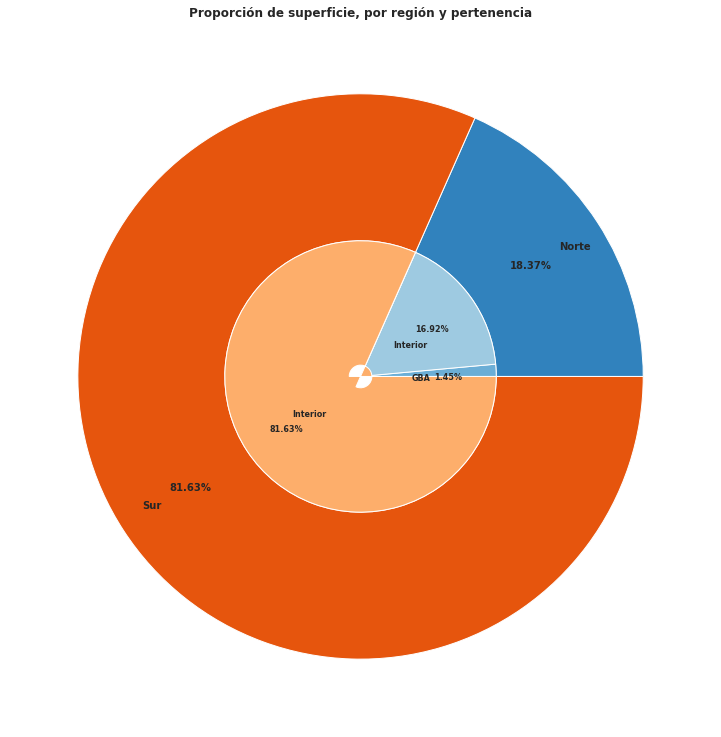

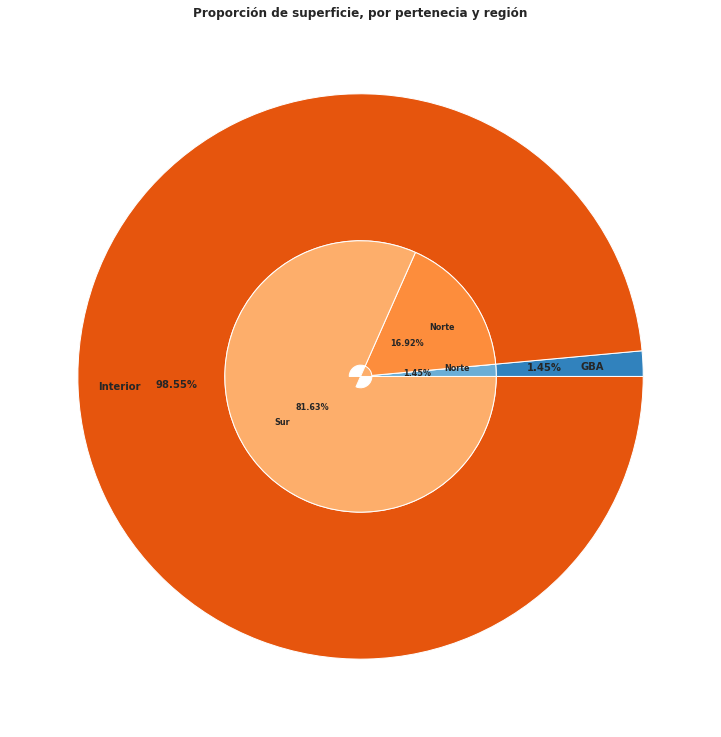

In [23]:
"""
En esta celda, nuevamente haremos gráficos de torta, pero en este caso, con la información correspondiente
a la superficie, desagregados por pertenencia y región
"""

#En 'fig' y 'ax' desempaqueto los valores devueltos por la función 'subplots',
#correspondientes a la figura y a los ejes
fig, ax = plt.subplots()

#Definimos el tamaño del gráfico
fig.set_size_inches(13, 13)
#Definimos el tamaño de la seccion interior del gráfico de torta anidado,
#en relación al de su sección exterior, y lo guardamos en 'size'
size = 0.52

#Definimos un vector bidimensional 'vals', que contendrá los valores correspondientes a nuestra tabla de
#frecuencias (sin los márgenes), con la categorización por pertenencia en las filas, y por región en las columnas
vals=np.array(tabla_sup)[0:2,0:2]

#Definimos los colores que utilizará el gráfico de torta
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])


#En una sentencia, llamamos a la función 'pie' de la variable 'ax', para pasarle los datos
#correspondientes al ploteo de la sección exterior del gráfico

ax.pie(vals.sum(axis=1),              #Como primer parámetro, le paso una lista de dos elementos, con la cantidad de municipios que 
                                      #tengo en cada región, generada a partir de la suma de columnas de lista anidada que tengo en 'vals'
   radius=1,                          #El radio de la torta valdrá 1
   colors=outer_colors,               #Los colores serán los que tengo en mi lista outer_colors
   wedgeprops=dict(                   #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'),  
   pctdistance=0.72,                  #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
   labeldistance=0.84,                #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
   textprops={'size' : 10,
             'weight':'bold'},           #Defino el tamaño del texto mostrado
   autopct=make_autopct2(              #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                      #con los siguientes argumentos:
       [tabla_sup['TOTAL']['NORTE'], #Primero, el total de municipios de la región norte
        tabla_sup['TOTAL']['SUR']]   #Segundo, el total de municipios de la región sur
       ),
   labels=["Norte","Sur"])            #Definimos las etiquetas "Norte" y "Sur" para las porciones mostradas en la parte exterior de la torta

#En otra sentencia, llamamos nuevamente a la función 'pie' de la variable 'ax', para pasarle
#los datos correspondientes al ploteo de la sección interior del gráfico

ax.pie(vals.flatten(),                  #Como primer parámetro, le paso una lista de cuatro elementos, con la cantidad de municipios que tengo clasificados
                                        #de acuerdo a su región y a su pertenencia, generada a partir del aplanamiente de lista anidada que tengo en 'vals'    
    radius=1-size,                      #El radio de la torta valdrá 1 menos el valor de 'size'
    colors=inner_colors,                #Los colores serán los que tengo en mi lista outer_colors
    wedgeprops=dict(                    #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'), 
    pctdistance=0.65,                   #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
    labeldistance=0.45,                 #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
    textprops={'size' : 8,
               'ha':'center',
               'va':'top',
              'weight':'bold'},             #Defino el tamaño del texto mostrado
    autopct=make_autopct2(               #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                        #con los siguientes argumentos:
     [tabla_sup['GBA']['NORTE'],       #Primero, la cantidad de municipios de la región norte pertenencientes al GBA
      tabla_sup['INTERIOR']['NORTE'],  #Segundo, la cantidad de municipios de la región norte pertenencientes al interior
      tabla_sup['GBA']['SUR'],         #Tercero, la cantidad de municipios de la región sur pertenencientes al GBA (la incluimos aquí, aunque valga 0)
      tabla_sup['INTERIOR']['SUR'],]), #Cuarto, la cantidad de municipios de la región sur pertenencientes al interior
    labels=["GBA",                      #Definimos las etiquetas "GBA", "Interior" ,"" (string vacío) y nuevamete "Interior",
            "Interior",                 #para las porciones mostradas en la parte interior de la torta. El string vacío se debe a que no tenemos 
            "",                         #municipios pertenencientes al GBA en la región sur, por lo que sería inconveniente mostrar un texto en el gráfico
            "Interior"])                #con valores de cantidad y porcentaje correspondientes a esta categorización.



#Definimos un título para el gráfico, con el formato correspondiente
ax.set_title('Proporción de superficie, por región y pertenencia',fontweight='bold',fontsize=12)

#Mostramos el gráfico
plt.show()


gc.collect()
#Luego, procederemos a realizar el segundo gráfico de torta anidado, en este caso con las variables invertidas respecto del primero.
#Aquí entonces, tendremos la categorización por pertenencia en la sección exterior, y por región en la seccion interior.
#Esto se puede lograr facilmente replicando el código utilizado para el gráfico anterior, pero trasponiendo
#la matriz correspondiente a la tabla de frecuencias y modificando unas pocas etiquetas.

#En 'fig' y 'ax' desempaqueto los valores devueltos por la función 'subplots',
#correspondientes a la figura y a los ejes
fig, ax = plt.subplots()
fig.set_size_inches(13, 13)

#Definimos el tamaño de la seccion interior del gráfico de torta anidado,
#en relación al de su sección exterior, y lo guardamos en 'size'
size = 0.52

#Definimos un vector bidimensional 'vals', que contendrá los valores correspondientes a nuestra tabla de frecuencias
#(sin los márgenes), en este caso, traspuesta con la categorización por pertenencia en las filas, y por región en las columnas
vals=np.transpose(np.array(tabla_sup)[0:2,0:2])

#Definimos los colores que utilizará el gráfico de torta
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])


#En una sentencia, llamamos a la función 'pie' de la variable 'ax', para pasarle los datos
#correspondientes al ploteo de la sección exterior del gráfico

ax.pie(vals.sum(axis=1),              #Como primer parámetro, le paso una lista de dos elementos, con la cantidad de municipios que 
                                      #tengo en cada región, generada a partir de la suma de columnas de lista anidada que tengo en 'vals'
   radius=1,                          #El radio de la torta valdrá 1
   colors=outer_colors,               #Los colores serán los que tengo en mi lista outer_colors
   wedgeprops=dict(                   #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'),  
   pctdistance=0.65,                  #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
   labeldistance=0.78,                #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
   textprops={'size' : 10,
             'weight':'bold'},           #Defino el tamaño del texto mostrado
   autopct=make_autopct2(              #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                      #con los siguientes argumentos:
       [tabla_sup['GBA']['TOTAL'], 
        tabla_sup['INTERIOR']['TOTAL']]   
       ),
   labels=["GBA","Interior"])            #Definimos ahora, las etiquetas "GBA" e "Interior" para las porciones mostradas en la parte exterior de la torta

#En otra sentencia, llamamos nuevamente a la función 'pie' de la variable 'ax', para pasarle
#los datos correspondientes al ploteo de la sección interior del gráfico

ax.pie(vals.flatten(),                  #Como primer parámetro, le paso una lista de cuatro elementos, con la cantidad de municipios que tengo clasificados
                                        #de acuerdo a su región y a su pertenencia, generada a partir del aplanamiente de lista anidada que tengo en 'vals'    
    radius=1-size,                      #El radio de la torta valdrá 1 menos el valor de 'size'
    colors=inner_colors,                #Los colores serán los que tengo en mi lista outer_colors
    wedgeprops=dict(                    #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'), 
    pctdistance=0.42,                   #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
    labeldistance=0.62,                 #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
    textprops={'size' :8,
              'weight':'bold'},             #Defino el tamaño del texto mostrado
    autopct=make_autopct2(               #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                        #con los siguientes argumentos:
     [tabla_sup['GBA']['NORTE'],       #Primero, la cantidad de municipios de la región norte pertenencientes al GBA
      tabla_sup['INTERIOR']['NORTE'],  #Segundo, la cantidad de municipios de la región norte pertenencientes al interior
      tabla_sup['GBA']['SUR'],         #Tercero, la cantidad de municipios de la región sur pertenencientes al GBA (la incluimos aquí, aunque valga 0)
      tabla_sup['INTERIOR']['SUR'],]), #Cuarto, la cantidad de municipios de la región sur pertenencientes al interior
    labels=["",                      #Definimos ahora las etiquetas "" (string vacío), "Norte" ,"Norte" nuevamente y  "Sur",
            "Norte",                 #para las porciones mostradas en la parte interior de la torta. El string vacío se debe a que no tenemos 
            "Norte",                         #municipios pertenencientes al GBA en la región sur, por lo que sería inconveniente mostrar un texto en el gráfico
            "Sur"])                #con valores de cantidad y porcentaje correspondientes a esta categorización.




#Definimos un título para el gráfico, con el formato correspondiente
ax.set_title('Proporción de superficie, por pertenecia y región',fontweight='bold',fontsize=12)

#Mostramos el gráfico
plt.show()

gc.collect()

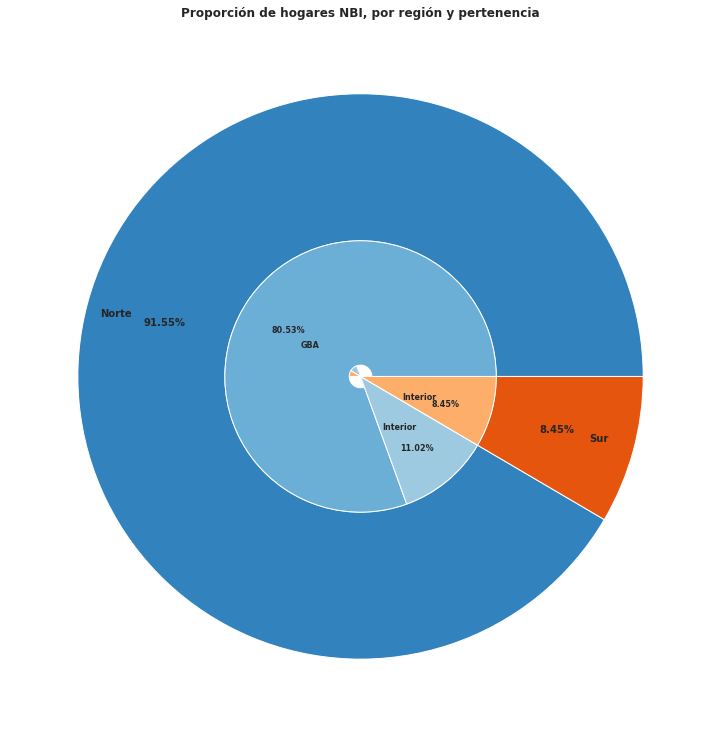

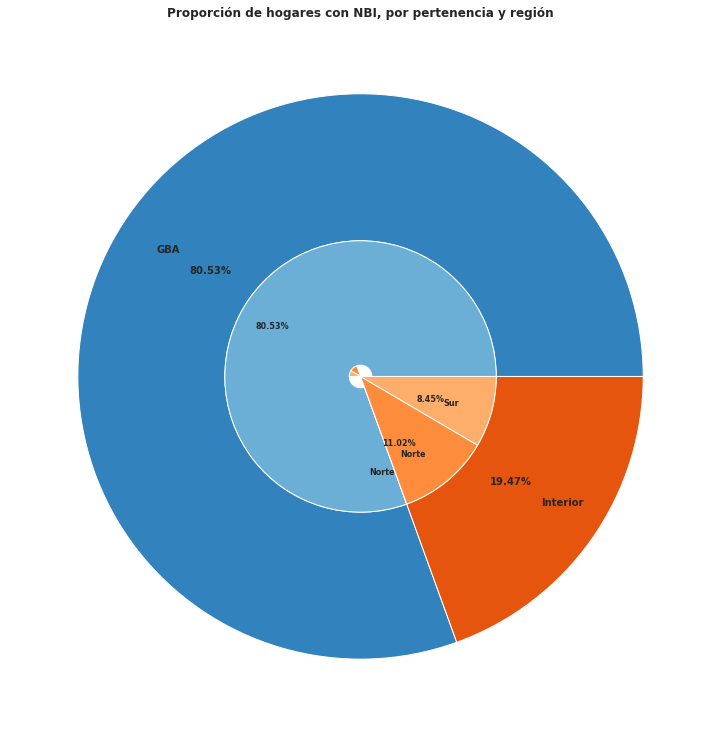

In [24]:
"""
En esta celda, nuevamente haremos gráficos de torta, pero en este caso, con la información correspondiente
a la cantidad de hogares con NBI, desagregados por pertenencia y región
"""


#En 'fig' y 'ax' desempaqueto los valores devueltos por la función 'subplots',
#correspondientes a la figura y a los ejes
fig, ax = plt.subplots()
#Definimos el tamaño del gráfico
fig.set_size_inches(13, 13)
#Definimos el tamaño de la seccion interior del gráfico de torta anidado,
#en relación al de su sección exterior, y lo guardamos en 'size'
size = 0.52

#Definimos un vector bidimensional 'vals', que contendrá los valores correspondientes a nuestra tabla de
#frecuencias (sin los márgenes), con la categorización por pertenencia en las filas, y por región en las columnas
vals=np.array(tabla_cant_nbi)[0:2,0:2]

#Definimos los colores que utilizará el gráfico de torta
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])


#En una sentencia, llamamos a la función 'pie' de la variable 'ax', para pasarle los datos
#correspondientes al ploteo de la sección exterior del gráfico

ax.pie(vals.sum(axis=1),              #Como primer parámetro, le paso una lista de dos elementos, con la cantidad de municipios que 
                                      #tengo en cada región, generada a partir de la suma de columnas de lista anidada que tengo en 'vals'
   radius=1,                          #El radio de la torta valdrá 1
   colors=outer_colors,               #Los colores serán los que tengo en mi lista outer_colors
   wedgeprops=dict(                   #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'),  
   pctdistance=0.72,                  #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
   labeldistance=0.84,                #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
   textprops={'size' : 10,
             'weight':'bold'},           #Defino el tamaño del texto mostrado
   autopct=make_autopct2(              #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                      #con los siguientes argumentos:
       [tabla_cant_nbi['TOTAL']['NORTE'], #Primero, el total de municipios de la región norte
        tabla_cant_nbi['TOTAL']['SUR']]   #Segundo, el total de municipios de la región sur
       ),
   labels=["Norte","Sur"])            #Definimos las etiquetas "Norte" y "Sur" para las porciones mostradas en la parte exterior de la torta

#En otra sentencia, llamamos nuevamente a la función 'pie' de la variable 'ax', para pasarle
#los datos correspondientes al ploteo de la sección interior del gráfico

ax.pie(vals.flatten(),                  #Como primer parámetro, le paso una lista de cuatro elementos, con la cantidad de municipios que tengo clasificados
                                        #de acuerdo a su región y a su pertenencia, generada a partir del aplanamiente de lista anidada que tengo en 'vals'    
    radius=1-size,                      #El radio de la torta valdrá 1 menos el valor de 'size'
    colors=inner_colors,                #Los colores serán los que tengo en mi lista outer_colors
    wedgeprops=dict(                    #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'), 
    pctdistance=0.65,                   #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
    labeldistance=0.45,                 #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
    textprops={'size' : 8,
               'ha':'center',
               'va':'top',
               'weight':'bold'},             #Defino el tamaño del texto mostrado
    autopct=make_autopct2(               #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                        #con los siguientes argumentos:
     [tabla_cant_nbi['GBA']['NORTE'],       #Primero, la cantidad de municipios de la región norte pertenencientes al GBA
      tabla_cant_nbi['INTERIOR']['NORTE'],  #Segundo, la cantidad de municipios de la región norte pertenencientes al interior
      tabla_cant_nbi['GBA']['SUR'],         #Tercero, la cantidad de municipios de la región sur pertenencientes al GBA (la incluimos aquí, aunque valga 0)
      tabla_cant_nbi['INTERIOR']['SUR'],]), #Cuarto, la cantidad de municipios de la región sur pertenencientes al interior
    labels=["GBA",                      #Definimos las etiquetas "GBA", "Interior" ,"" (string vacío) y nuevamete "Interior",
            "Interior",                 #para las porciones mostradas en la parte interior de la torta. El string vacío se debe a que no tenemos 
            "",                         #municipios pertenencientes al GBA en la región sur, por lo que sería inconveniente mostrar un texto en el gráfico
            "Interior"])                #con valores de cantidad y porcentaje correspondientes a esta categorización.



#Definimos un título para el gráfico, con el formato correspondiente
ax.set_title('Proporción de hogares NBI, por región y pertenencia',fontweight='bold',fontsize=12)

#Mostramos el gráfico
plt.show()

#Luego, procederemos a realizar el segundo gráfico de torta anidado, en este caso con las variables invertidas respecto del primero.
#Aquí entonces, tendremos la categorización por pertenencia en la sección exterior, y por región en la seccion interior.
#Esto se puede lograr facilmente replicando el código utilizado para el gráfico anterior, pero trasponiendo
#la matriz correspondiente a la tabla de frecuencias y modificando unas pocas etiquetas.

#En 'fig' y 'ax' desempaqueto los valores devueltos por la función 'subplots',
#correspondientes a la figura y a los ejes
fig, ax = plt.subplots()
#Definimos el tamaño del gráfico
fig.set_size_inches(13, 13)

#Definimos el tamaño de la seccion interior del gráfico de torta anidado,
#en relación al de su sección exterior, y lo guardamos en 'size'
size = 0.52

#Definimos un vector bidimensional 'vals', que contendrá los valores correspondientes a nuestra tabla de frecuencias
#(sin los márgenes), en este caso, traspuesta con la categorización por pertenencia en las filas, y por región en las columnas
vals=np.transpose(np.array(tabla_cant_nbi)[0:2,0:2])

#Definimos los colores que utilizará el gráfico de torta
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])


#En una sentencia, llamamos a la función 'pie' de la variable 'ax', para pasarle los datos
#correspondientes al ploteo de la sección exterior del gráfico

ax.pie(vals.sum(axis=1),              #Como primer parámetro, le paso una lista de dos elementos, con la cantidad de municipios que 
                                      #tengo en cada región, generada a partir de la suma de columnas de lista anidada que tengo en 'vals'
   radius=1,                          #El radio de la torta valdrá 1
   colors=outer_colors,               #Los colores serán los que tengo en mi lista outer_colors
   wedgeprops=dict(                   #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'),  
   pctdistance=0.65,                  #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
   labeldistance=0.78,                #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
   textprops={'size' : 10,
             'weight':'bold'},           #Defino el tamaño del texto mostrado
   autopct=make_autopct2(              #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                      #con los siguientes argumentos:
       [tabla_cant_nbi['GBA']['TOTAL'], 
        tabla_cant_nbi['INTERIOR']['TOTAL']]   
       ),
   labels=["GBA","Interior"])            #Definimos ahora, las etiquetas "GBA" e "Interior" para las porciones mostradas en la parte exterior de la torta

#En otra sentencia, llamamos nuevamente a la función 'pie' de la variable 'ax', para pasarle
#los datos correspondientes al ploteo de la sección interior del gráfico

ax.pie(vals.flatten(),                  #Como primer parámetro, le paso una lista de cuatro elementos, con la cantidad de municipios que tengo clasificados
                                        #de acuerdo a su región y a su pertenencia, generada a partir del aplanamiente de lista anidada que tengo en 'vals'    
    radius=1-size,                      #El radio de la torta valdrá 1 menos el valor de 'size'
    colors=inner_colors,                #Los colores serán los que tengo en mi lista outer_colors
    wedgeprops=dict(                    #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'), 
    pctdistance=0.64,                   #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
    labeldistance=0.75,                 #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
    textprops={'size' :8,
               'ha':'right',
              'weight':'bold'},             #Defino el tamaño del texto mostrado
    autopct=make_autopct2(               #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                        #con los siguientes argumentos:
     [tabla_cant_nbi['GBA']['NORTE'],       #Primero, la cantidad de municipios de la región norte pertenencientes al GBA
      tabla_cant_nbi['INTERIOR']['NORTE'],  #Segundo, la cantidad de municipios de la región norte pertenencientes al interior
      tabla_cant_nbi['GBA']['SUR'],         #Tercero, la cantidad de municipios de la región sur pertenencientes al GBA (la incluimos aquí, aunque valga 0)
      tabla_cant_nbi['INTERIOR']['SUR'],]), #Cuarto, la cantidad de municipios de la región sur pertenencientes al interior
    labels=["",                      #Definimos ahora las etiquetas "" (string vacío), "Norte" ,"Norte" nuevamente y  "Sur",
            "Norte",                 #para las porciones mostradas en la parte interior de la torta. El string vacío se debe a que no tenemos 
            "Norte",                         #municipios pertenencientes al GBA en la región sur, por lo que sería inconveniente mostrar un texto en el gráfico
            "Sur"])                #con valores de cantidad y porcentaje correspondientes a esta categorización.



#Definimos un título para el gráfico, con el formato correspondiente
ax.set_title('Proporción de hogares con NBI, por pertenencia y región',fontweight='bold',fontsize=12)

#Mostramos el gráfico
plt.show()

gc.collect()

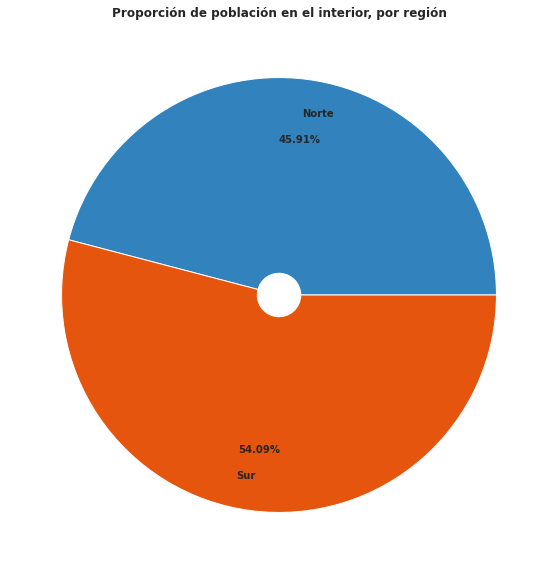

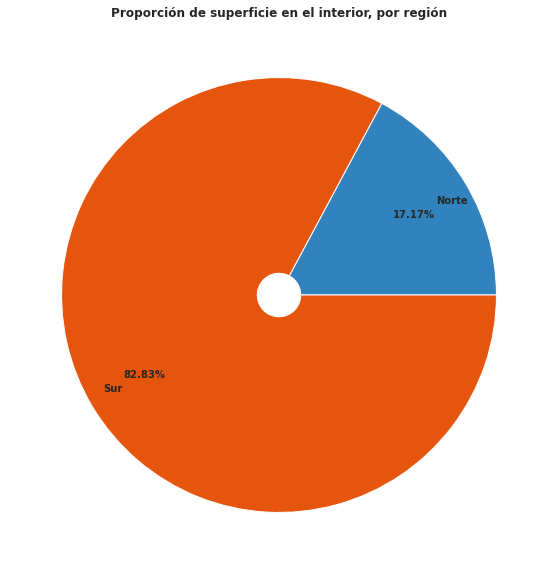

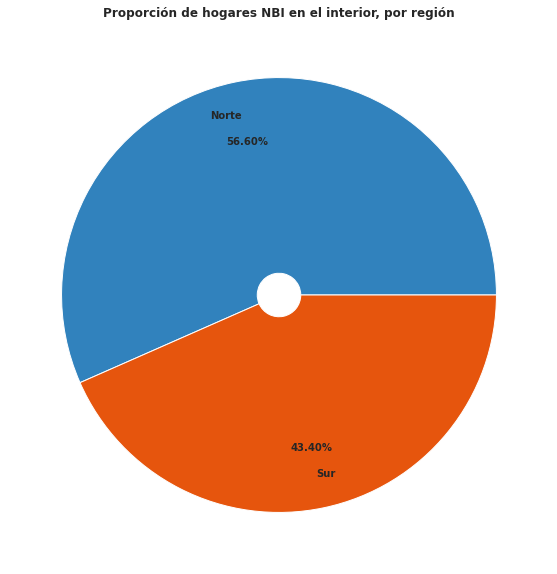

In [25]:
"""
En esta celda, nuevamente haremos gráficos de torta, pero en este caso, con la información correspondiente
a la población, pero excluisivamente poniendo énfasis en el interior de la provincia, dejando de lado
el GBA.
"""

#En 'fig' y 'ax' desempaqueto los valores devueltos por la función 'subplots',
#correspondientes a la figura y a los ejes
fig, ax = plt.subplots()
#Definimos el tamaño del gráfico
fig.set_size_inches(10, 10)
#Definimos el tamaño de la seccion interior del gráfico de torta anidado,
#en relación al de su sección exterior, y lo guardamos en 'size'
size = 0.9

#Definimos un vector bidimensional 'vals', que contendrá los valores correspondientes a nuestra tabla de
#frecuencias (sin los márgenes), con la categorización por pertenencia en las filas, y por región en las columnas
vals=np.array(tabla_pob['INTERIOR'])[0:2]

#Definimos los colores que utilizará el gráfico de torta
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)


#En una sentencia, llamamos a la función 'pie' de la variable 'ax', para pasarle los datos
#correspondientes al ploteo de la sección exterior del gráfico

ax.pie(vals,              #Como primer parámetro, le paso una lista de dos elementos, con la cantidad de municipios que 
                                      #tengo en cada región, generada a partir de la suma de columnas de lista anidada que tengo en 'vals'
   radius=1,                          #El radio de la torta valdrá 1
   colors=outer_colors,               #Los colores serán los que tengo en mi lista outer_colors
   wedgeprops=dict(                   #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'),  
   pctdistance=0.72,                  #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
   labeldistance=0.84,                #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
   textprops={'size' : 10,
             'weight':'bold'},           #Defino el tamaño del texto mostrado
   autopct=make_autopct2(              #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                      #con los siguientes argumentos:
       [tabla_pob['INTERIOR']['NORTE'], #Primero, el total de municipios de la región norte
        tabla_pob['INTERIOR']['SUR']]   #Segundo, el total de municipios de la región sur
       ),
   labels=["Norte","Sur"])            #Definimos las etiquetas "Norte" y "Sur" para las porciones mostradas en la parte exterior de la torta


#Definimos un título para el gráfico, con el formato correspondiente
ax.set_title('Proporción de población en el interior, por región',fontweight='bold',fontsize=12)

#Mostramos el gráfico
plt.show()


#En 'fig' y 'ax' desempaqueto los valores devueltos por la función 'subplots',
#correspondientes a la figura y a los ejes
fig, ax = plt.subplots()
#Definimos el tamaño del gráfico
fig.set_size_inches(10, 10)
#Definimos el tamaño de la seccion interior del gráfico de torta anidado,
#en relación al de su sección exterior, y lo guardamos en 'size'
size = 0.9

#Definimos un vector bidimensional 'vals', que contendrá los valores correspondientes a nuestra tabla de
#frecuencias (sin los márgenes), con la categorización por pertenencia en las filas, y por región en las columnas
vals=np.array(tabla_sup['INTERIOR'])[0:2]


#Definimos los colores que utilizará el gráfico de torta
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)


#En una sentencia, llamamos a la función 'pie' de la variable 'ax', para pasarle los datos
#correspondientes al ploteo de la sección exterior del gráfico

ax.pie(vals,              #Como primer parámetro, le paso una lista de dos elementos, con la cantidad de municipios que 
                                      #tengo en cada región, generada a partir de la suma de columnas de lista anidada que tengo en 'vals'
   radius=1,                          #El radio de la torta valdrá 1
   colors=outer_colors,               #Los colores serán los que tengo en mi lista outer_colors
   wedgeprops=dict(                   #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'),  
   pctdistance=0.72,                  #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
   labeldistance=0.84,                #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
   textprops={'size' : 10,
             'weight':'bold'},           #Defino el tamaño del texto mostrado
   autopct=make_autopct2(              #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                      #con los siguientes argumentos:
       [tabla_sup['INTERIOR']['NORTE'], #Primero, el total de municipios de la región norte
        tabla_sup['INTERIOR']['SUR']]   #Segundo, el total de municipios de la región sur
       ),
   labels=["Norte","Sur"])            #Definimos las etiquetas "Norte" y "Sur" para las porciones mostradas en la parte exterior de la torta



#Definimos un título para el gráfico, con el formato correspondiente
ax.set_title('Proporción de superficie en el interior, por región',fontweight='bold',fontsize=12)

#Mostramos el gráfico
plt.show()

gc.collect()

#En 'fig' y 'ax' desempaqueto los valores devueltos por la función 'subplots',
#correspondientes a la figura y a los ejes
fig, ax = plt.subplots()
#Definimos el tamaño del gráfico
fig.set_size_inches(10, 10)
#Definimos el tamaño de la seccion interior del gráfico de torta anidado,
#en relación al de su sección exterior, y lo guardamos en 'size'
size = 0.9

#Definimos un vector bidimensional 'vals', que contendrá los valores correspondientes a nuestra tabla de
#frecuencias (sin los márgenes), con la categorización por pertenencia en las filas, y por región en las columnas
vals=np.array(tabla_cant_nbi['INTERIOR'])[0:2]


#Definimos los colores que utilizará el gráfico de torta
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)


#En una sentencia, llamamos a la función 'pie' de la variable 'ax', para pasarle los datos
#correspondientes al ploteo de la sección exterior del gráfico

ax.pie(vals,              #Como primer parámetro, le paso una lista de dos elementos, con la cantidad de municipios que 
                                      #tengo en cada región, generada a partir de la suma de columnas de lista anidada que tengo en 'vals'
   radius=1,                          #El radio de la torta valdrá 1
   colors=outer_colors,               #Los colores serán los que tengo en mi lista outer_colors
   wedgeprops=dict(                   #Aquí defino cuestiones afines al formato del ploteo
       width=size,
       edgecolor='w'),  
   pctdistance=0.72,                  #Defino la distancia entre el centro del gráfico, y los porcentajes que imprimo sobre el mismo
   labeldistance=0.84,                #Defino la distancia entre el centro del gráfico, y las etiquetas que imprimo sobre el mismo
   textprops={'size' : 10,
             'weight':'bold'},           #Defino el tamaño del texto mostrado
   autopct=make_autopct2(              #Defino los porcentajes mostrados, pasandole al atributo 'autopct' la función 'make_autopct', definda previamente,
                                      #con los siguientes argumentos:
       [tabla_cant_nbi['INTERIOR']['NORTE'], #Primero, el total de municipios de la región norte
        tabla_cant_nbi['INTERIOR']['SUR']]   #Segundo, el total de municipios de la región sur
       ),
   labels=["Norte","Sur"])            #Definimos las etiquetas "Norte" y "Sur" para las porciones mostradas en la parte exterior de la torta


#Definimos un título para el gráfico, con el formato correspondiente
ax.set_title('Proporción de hogares NBI en el interior, por región',fontweight='bold',fontsize=12)

#Mostramos el gráfico
plt.show()


gc.collect()

In [26]:
"""
Agregando las variables previamente analizadas de forma univariada por categoría, podemos establecer 
varias conclusiones importantes:

En primer lugar, observamos una fuerte asímetría entre el norte y el sur del territorio analizado, tomando como eje el río salado
para su división. Esta diferencia se da sobre todo, en cuanto a la población y a la superficie:
Mientras la región norte consta de un total de 15858725 habitantes en un territorio de 56090.23 km², como contraparte,
la región sur ostenta un total de 2656510 habitantes en un territorio de 249265.92 km²
Esto es: en la región sur, tenemos una cantidad de población que representa aproximadamente una sexta parte de la
cantidad de población que habita en la región norte, pero distribuida en un territorio mas de 4 veces mayor.
Esto es, el %85,65 de la población total del territorio analizado, reside en una superficie que comprende el
%18,37 del total del mismo, mientras que el %14,35 restante de la población, reside en una superficie que comprende el %81,63 restante.

En consecuencia, analizando la densidad habitacional, la misma resulta casi 30 veces mas grande en la región norte que en la región
sur, siendo de 10.66 hab/km² en el sur, y 282.74 hab/km² en el norte.

Incluso, dejando de lado el GBA, y poniendo el foco exclusivamente en el interior, también tenemos un importante contraste:
si bien la población que reside en la región norte del interior, es apenas mas baja que la que reside en la región sur (un %16 menor),
debemos destacar que, desechando el territorio ocupado por el GBA, la población del sur se distribuye en un territorio casi 5 veces mayor,
teniendo también una densidad poblacional mas de 4 veces menor.
En cuanto al análisis por municipios, debemos recordar que tenemos 74 de ellos en la zona norte, y 67 en la zona sur.
Como consecuencia lógica, al tener una cantidad relativamente similar de municipios en cada zona, pero con una relación tan
dispar de población y superficie entre ellas, lógicamente, los muncipios del norte tenderán a ser mas poblados, menos extensos,
y como consecuencia, mas densamente poblados. El caso inverso ocurre en la región sur, donde tendremos por lo general,
municipios mucho menos poblados, mucho mas extensos, y lógicamente, menos densamente poblados. Esto seguiría ocurriendo,
incluso si descartaramos al GBA de nuestro análisis, poniendo foco exclusivamente en el interior, aunque no de manera tan pronunciada.

En cuanto a los indicadores sociales, también observamos una importante asimetría.
En primer lugar, haremos foco en el promedio de habitantes por vivienda.
El promedio general es de 3,12. En la regíon norte, es ligeramente mas alto, siendo de 3,15. Mientras tanto, en la región sur,
esta cifra baja a 2,93. Si nos concentramos en el GBA, esta cifa es de 3,16, mientras que para el norte del interior es de 3,10.
Si bien aquí estamos estableciendo un promedio general, esto refleja un cierto grado de hacinamiento mas pronunciado en el GBA,
ligeramente mas leve en el norte del interior, y relativamente mas bajo en el sur de la provincia.

En cuanto a los indicadores de Necesidades Básicas Insatisfechas, si bien en todo el territorio analizado,
tenemos un total de %7,73 viviendas con NBI, en el norte del terrirorio, esta cifra se eleva a %8,35, mientras que en el sur, se reduce a %4,28.
Poniendo foco en el interior, vemos que en el norte de la provincia, sin tomar en cuenta el GBA, esta cifra es de %6,95. 
En el GBA es donde este valor es más elevado, con un %8,58 de hogares con NBI, mientras que dicho valor es de %5,47 para el total del interior.


En conclusión, observamos que el sur de la provincia, tiene indicadores socioeconómicos mucho mas favorables que el norte, es decir,
su población en terminos generales, suele ser mas próspera.
Observamos también que el %91,55 de hogares con NBI se encuentra en la región norte, siendo que el mismo concentra
el %84,76 de los hogares totales.
Mientras tanto que el %8,45 restante de los hogares con NBI se encuentra en la región sur, siendo que
este concentra el %15,24 de los hogares totales.
Poniendo foco exclusivamente en el interior, excluyendo el GBA, dicho porcentaje es de %56,60 para el norte, siendo que este concentra el %44,58
de las viviendas, mientras que es de %43,40 para el sur, siendo que este concentra el
%55,42 de las viviendas.


En cuanto a la comparación del GBA con el interior, también observamos un constraste muy evidente: 
el %73,47 de los habitantes de todo territorio analizado, reside en el GBA, en una superficie que constituye apenas el %1,45
del total de dicho terrtitorio, mientras que el %26,53 restante de la población que reside en el interior de la provincia,
se distribuye en el %98,55 restante del territorio.
Desde ya que entonces, la densidad poblacional del GBA resulta enorme, sobre todo en comparación con el interior, siendo así
188 veces mas grande. Incluso, comparandola exclusivamente con la densidad del norte del interior, es mas de 70 veces mas grande.
En cuanto a los indicadores %NBI, el GBA es la categoría que presenta los peores indicadores: el %8,58 porciento de los hogares,
tiene alguna necesidad básica insatisfecha.
El GBA concentra el %80,53 de hogares con NBI, mientras que ostenta el %72,49 de hogares totales.
Mientras tanto, el interior tiene un porcentaje de %5,47 de hogares NBI. Concentra el %19,47 de hogares
con NBI, mientras que ostenta el %27,51 de hogares totales.

En conclusion, analizando los datos totales de forma agredada por categoría, observamos desde un principio,
importantes diferencias cualitativas entre cada una de ellas, por lo que, antes de pasar a los análisis univariados
y bivariados de cada uno de los municipios correspondientes a cada categoría, ya tenemos un panorama bastante claro de las
diferencias existentes entre las distintas categorías en las que subdividimos nuestro análisis.

""";

In [27]:
"""
En esta celda, creamos un nuevo DataFrame de municipios a partir del original,
pero fusionando ambas variables categóricas (región y pertenencia), en una sola
columna (categoría)
"""
#En municipios_cat creamos una copia del DataFrame original
municipios_cat=municipios.copy()

#Creamos una función lambda que define como será el valor en la nueva columna para cada registro
#Si la pertenencia era 'INTERIOR', nos devolverá 'INTERIOR NORTE' o 'INTERIOR SUR'
#Si la pertenencia era 'GBA', nos devolverá simplemente 'GBA'
concatenacion=lambda x: " ".join(x) if x[0]=='INTERIOR' else x[0]

#Creamos la nueva columna en el nuevo DataFrame, a partir de las originales "PERTENENCIA" y "REGIÓN"
municipios_cat["CATEGORIA"] = municipios_cat[["PERTENENCIA", "REGION"]].apply(concatenacion, axis =1)

#Eliminamos las columnas originales del nuevo DataFrame que ya fusionamos
municipios_cat=municipios_cat.drop(columns=["PERTENENCIA", "REGION"], axis=1)

#Reposicionamos la nueva columna en el nuevo DataFrame
categoria = municipios_cat.pop("CATEGORIA")
municipios_cat.insert(1, "CATEGORIA", categoria)

display(municipios_cat)

NOMBRE       CATEGORIA  POBLACION  SUPERFICIE  \
0                   ADOLFO ALSINA    INTERIOR SUR      17072     5877.86   
1          ADOLFO GONZALES CHAVES    INTERIOR SUR      12047     3859.16   
2                         ALBERTI  INTERIOR NORTE      10654     1124.98   
3                 ALMIRANTE BROWN             GBA     552902      129.33   
4                       ARRECIFES  INTERIOR NORTE      29044     1240.67   
5                      AVELLANEDA             GBA     342677       52.48   
6                        AYACUCHO    INTERIOR SUR      20337     6748.90   
7                            AZUL    INTERIOR SUR      65280     6540.25   
8                    BAHÍA BLANCA    INTERIOR SUR     301572     2247.49   
9                        BALCARCE    INTERIOR SUR      43823     4115.27   
10                       BARADERO  INTERIOR NORTE      32761     1591.87   
11                  BENITO JUÁREZ    INTERIOR SUR      20239     5071.94   
12                    BERAZATEGUI             GBA     324244      221.01   
13                        BERISSO  INTERIOR NORTE      88470      137.59   
14                        BOLÍVAR    INTERIOR SUR      34190     4912.16   
15                        BRAGADO    INTERIOR SUR      41336     2211.87   
16                       BRANDSEN  INTERIOR NORTE      26367     1126.02   
17                       C.A.B.A.             GBA    2890151      204.00   
18                        CAMPANA  INTERIOR NORTE      94461      954.54   
19          CAÑUELAS (Máximo Paz)             GBA       7311       14.00   
20            CAÑUELAS (Interior)  INTERIOR NORTE      44581     1175.30   
21              CAPITÁN SARMIENTO  INTERIOR NORTE      14494      548.89   
22                 CARLOS CASARES    INTERIOR SUR      22237     2520.39   
23                 CARLOS TEJEDOR    INTERIOR SUR      11570     3910.74   
24                CARMEN DE ARECO  INTERIOR NORTE      14692     1061.31   
25                       CASTELLI    INTERIOR SUR       8205     2063.19   
26                      CHACABUCO  INTERIOR NORTE      48703     2287.38   
27                      CHASCOMÚS  INTERIOR NORTE      42277     4163.19   
28                      CHIVILCOY  INTERIOR NORTE      64185     2057.09   
29                          COLÓN  INTERIOR NORTE      24890      994.57   
30   CORONEL DE MARINA L. ROSALES    INTERIOR SUR      62152     5831.50   
31                CORONEL DORREGO    INTERIOR SUR      15825     1622.60   
32               CORONEL PRINGLES    INTERIOR SUR      22933     5257.14   
33                 CORONEL SUÁREZ    INTERIOR SUR      38320     6006.83   
34                       DAIREAUX    INTERIOR SUR      16889     3827.47   
35                        DOLORES    INTERIOR SUR      27042     1973.14   
36                       ENSENADA  INTERIOR NORTE      56729       99.93   
37                        ESCOBAR             GBA     213619      303.75   
38             ESTEBAN ECHEVERRÍA             GBA     300959      120.22   
39          EXALTACIÓN DE LA CRUZ  INTERIOR NORTE      29805      634.17   
40                         EZEIZA             GBA     163722      236.81   
41               FLORENCIO VARELA             GBA     426005      189.90   
42            FLORENTINO AMEGHINO    INTERIOR SUR       8869     1808.55   
43               GENERAL ALVARADO    INTERIOR SUR      39594     1614.35   
44                 GENERAL ALVEAR    INTERIOR SUR      11130     3384.08   
45               GENERAL ARENALES  INTERIOR NORTE      14903     1482.64   
46               GENERAL BELGRANO    INTERIOR SUR      17365     1843.21   
47                  GENERAL GUIDO    INTERIOR SUR       2816     2329.91   
48         GENERAL JUAN MADARIAGA    INTERIOR SUR      19747     2978.29   
49              GENERAL LA MADRID    INTERIOR SUR      10783     4811.37   
50              GENERAL LAS HERAS  INTERIOR NORTE      14889      720.10   
51                GENERAL LAVALLE    INTERIOR SUR       3700     2598.73   

In [48]:
"""
En esta celda, definimos funciones que nos resultarán útiles para procesar los gráficos y tablas subsiguientes.
"""
#Defino una función que devuelve una lista de frecuencias de un determinado conjunto
#de intervalos.
#Esta función,en lugar de calcular las delimitacinoes de los intervalos en base a un valor numérico
#de agrupamiento, utilizo una lista de delimitaciones ya definida, recibida por parámetro
def intervalos_desag(columna,divisiones):
    
    #El valor de 'bins', que será la cantidad de delimitaciones totales de los intervalos,
    #será igual a la longitud de la lista de delimitaciones recibida por parámetro
    bins=len(divisiones)
    
    #Me genero un array con tantos elementos como intervalos de clase,
    #inicialmente cargado con ceros
    array_intervalos=np.zeros(bins-1)
    
    #Recorro con un for, del cual necesito los índices, comenzado desde 1, el vector de divisiones
    #con la variable i, de forma que puedo ir recorriendo los intervalos de clase
    for i in range(1,bins):
        #Declaro una variable, que se reiniciará a 0 en cada iteración
        #del for de primer orden, donde contaré las muestras de la
        #columna que se ubican dentro de cada rango
        cont_muestras=0
        
        #Con otro for anidado, recorro cada elemento de la columna
        for elemento in columna:
            
            #Si el elemento en el que estoy parado ahora, se encuentra
            #en el intervalo de clase que estoy recorriendo
            if elemento > divisiones[i-1] and elemento <= divisiones[i]:
                #Incremento el contador de muestras
                cont_muestras+=1
        
        #Una vez ejecutado el for anidado, cargo en la posicion i-1
        #de mi array de intervalos de clase, la cantidad de muestras
        #que conté en el rango correspondiente
        array_intervalos[i-1]=cont_muestras
     #Lo convierto en una lista
    lista_intervalos=array_intervalos.tolist()
    
    #Devuelvo la lista de frecuencias para los intervalos correspondientes
    return lista_intervalos

#Definimos una función que nos devolverá los ticks correspondientes para
#marcar los valores del eje de ordenadas, en un histograma desagregado de acuerdo
#a alguna variable categórica
#Recibimos como parámetros:
# -El DataFrame entero, ('tabla', de tipo DataFrame de Pandas)
# -El nombre de la variable categórica a desagregar ('var_desag' de tipo string)
# -La lista de valores que puede adoptar dicha variable categórica ('valores_desag', que será una lista de strings)
# -El nombre de la variable cuantitativa analizada ('var_cuant' de tipo string)
def y_ticks_desag(tabla,var_desag,valores_desag,var_cuant):
    
    #Creamos una lista, inicialmente vacía, que contendrá a su vez, las listas anidadas de frecuencias por cada
    #intervalo, dentro de cada categoría
    tabla_frecuencias=[]
    
    #Recorremos, con un for, la lista de valores recibida por parámetro,
    #que puede adoptar la variable categórica
    for categoria in valores_desag:
        
        #Creamos un filtro para el DataFrame, para obtener en cada caso, solamente los registros 
        #cuyo valor de la categoría analizada, coincida con el que estamos iterando en el for
        filtro = tabla[var_desag]==categoria
        
        
        #Con la función 'intervalos', generamos los delimitadores de los intervalos que 
        #le vamos a pasar a la función 'intervalos_desag',
        #correspondiente a la de la columna completa (sin desagregar)
        divisiones=intervalos(municipios[var_cuant],AGRUPAMIENTO) [1]
        
        #A la función 'intervalos_desag' que definimos , le pasamos como primer parámetro,
        #la columna correspondiente a la variable cuantitativa analizada, a la cual le aplicamos
        #el filtro establecido previamente, y como segundo parámetro la lista de divisiones de intervalos
        #que generamos
        #En la variable 'frecuencia_cat' nos guardamos solamente la lista de frecuencias que nos devuelve dicha función
        #(descartamos la lista de divisiones)
        frecuencias_cat=intervalos_desag(tabla[var_cuant][filtro],divisiones)
        
        #Agregamos la lista de frecuencias de la categoría donde estamos parados en nuestro
        #ciclo for, a la tabla de frecuencias
        tabla_frecuencias.append(frecuencias_cat)
    
    #Una vez terminado el for, teniendo nuestra tabla de frecuencias cargada, 
    #la convertimos en un vector bidimensional NumPy
    array_frecuencias=np.array(tabla_frecuencias)
    
    #A dicho array le aplicamos la función 'cumsum' de Numpy, de manera que, por cada columna,
    #obtenemos la suma de valores acumulados respecto del array original.
    #Por ejemplo, si en una columna del array original tenemos los valores (3,5,10),
    #en el nuevo array tendremos los valores (3,8,18) en la columna correspondiente
    valores_acumulados=np.cumsum(array_frecuencias,axis=0)
    
    #Aplanamos la lista de valores resultantes del vector bidimensional de NumPy,
    #para convertirlo en un array unidimensional
    aplanado=valores_acumulados.flatten()
    
    #Eliminamos los valores repetidos
    aplanado=np.unique(aplanado)
    
    #Devolvemos el array, convertido a una lista de Python
    return aplanado.tolist()

gc.collect()

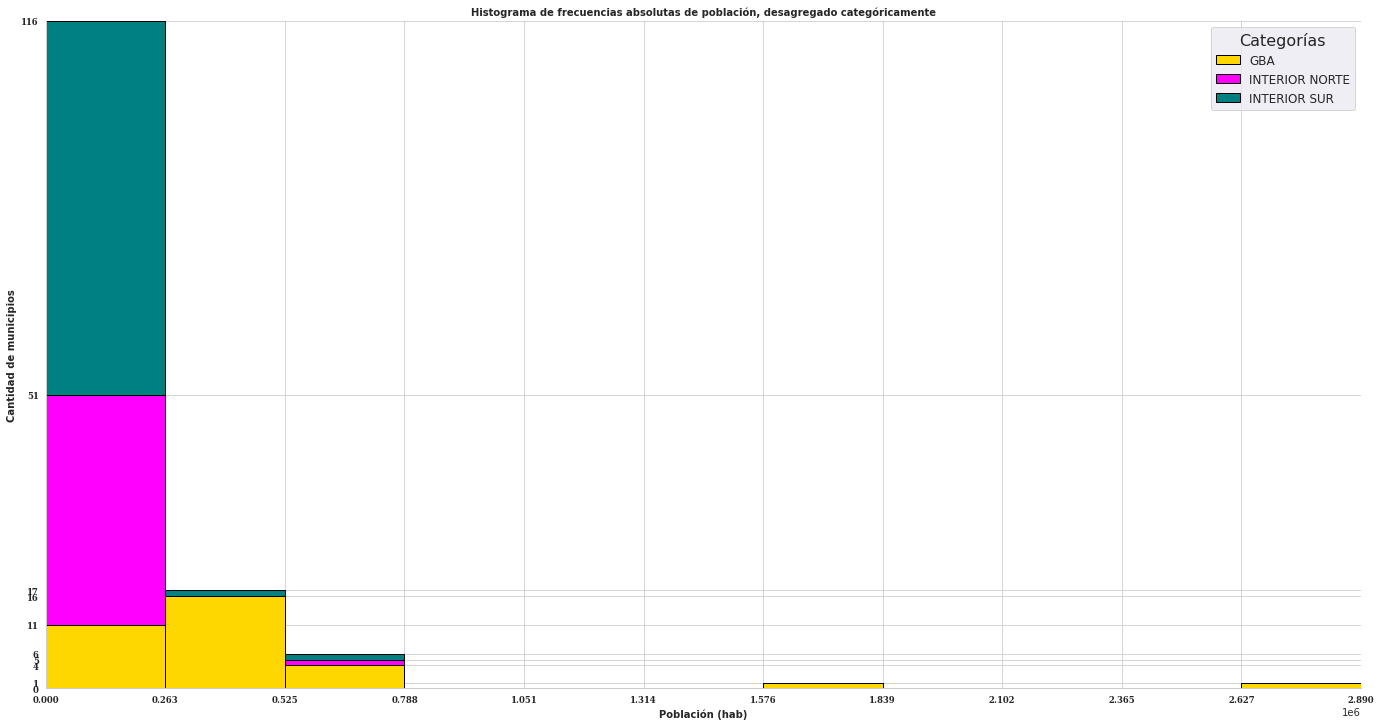

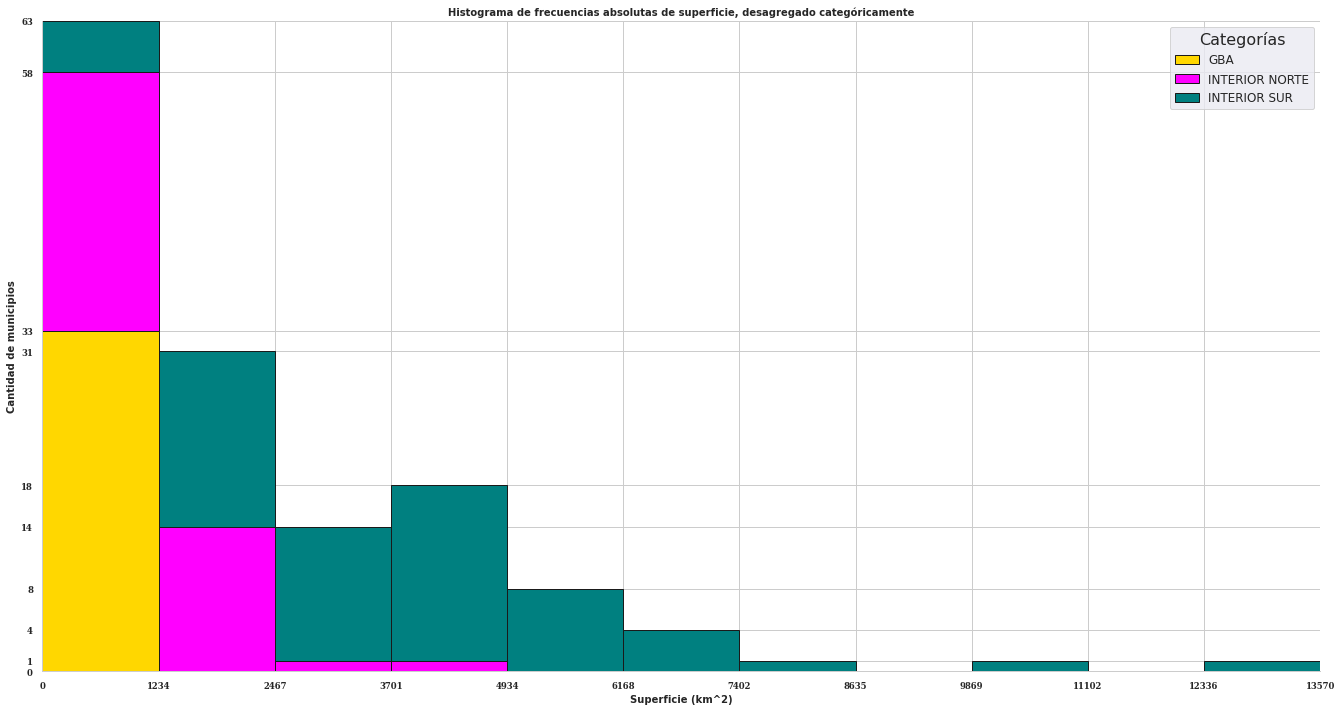

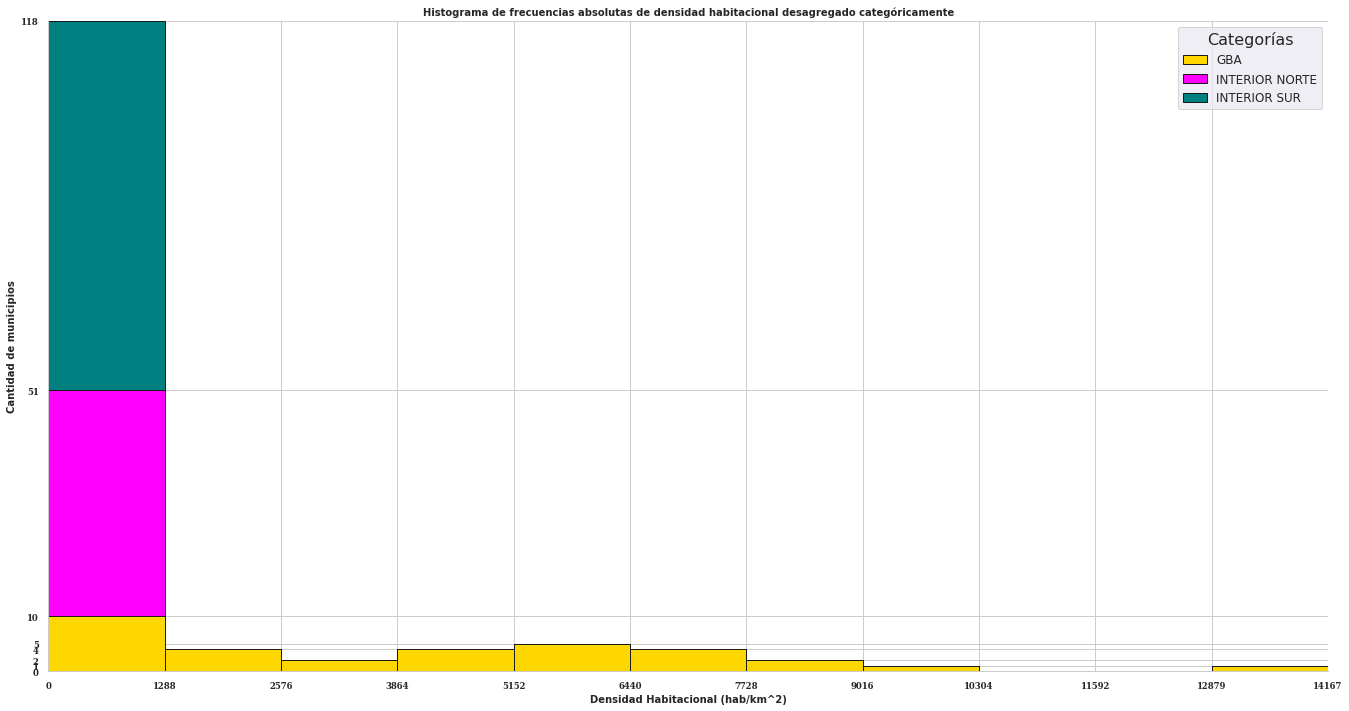

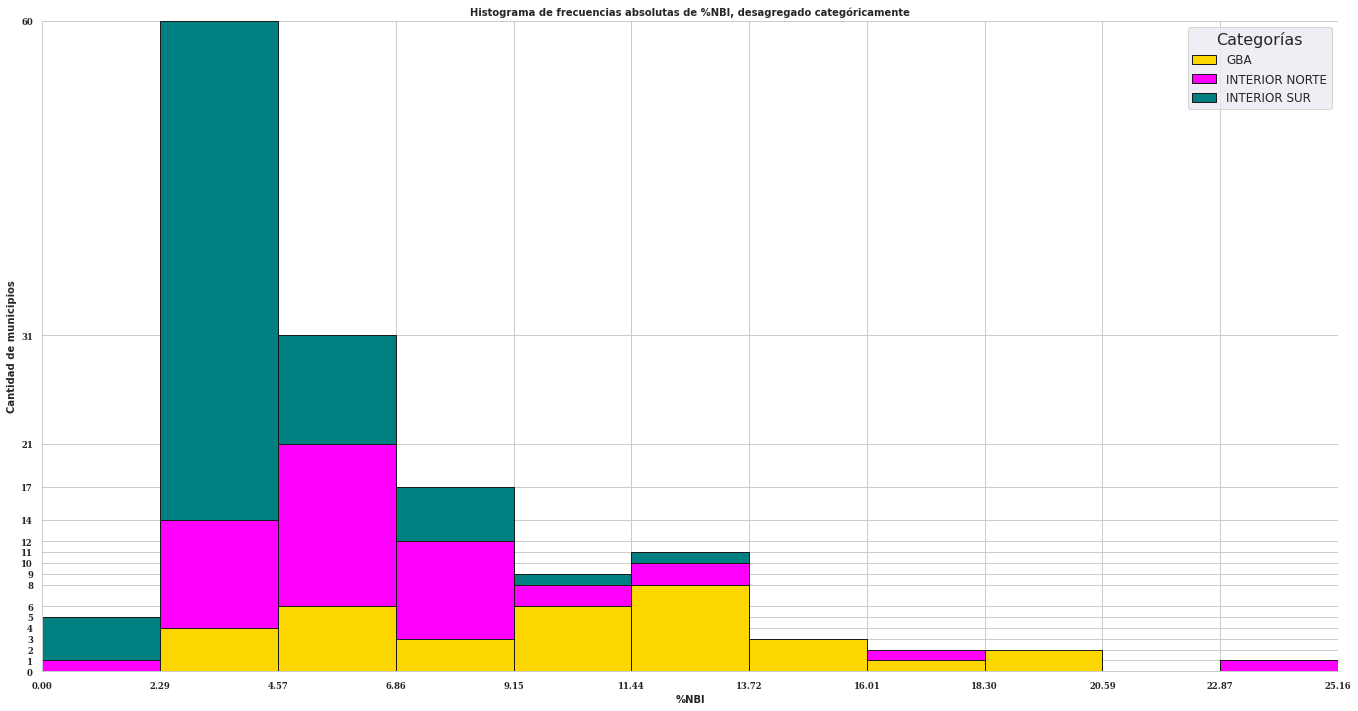

In [29]:
"""
En esta celda, volvemos a realizar un histograma de las mismas variables analizadas previamente, de frecuencias absolutas.
Ademas, en este caso, realizamos la correspondiente desagregación por variables categóricas de cada histograma, por cada variable cuantitativa.
""";

#Creamos una lista  con los nombres de las categorías fusionadas, creadas previamente a partir de las categorías originales (región y pertenencia)
categorias=['GBA','INTERIOR NORTE', 'INTERIOR SUR']

#Creamos una lista con las variables cuantitativas a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']

#Creamos un diccionario con los titulos a mostrar en cada gráfico,
#correspondientes a cada variable
titulos={
            'POBLACION':'Histograma de frecuencias absolutas de población, desagregado categóricamente',
            'SUPERFICIE': 'Histograma de frecuencias absolutas de superficie, desagregado categóricamente',
            'DENSIDAD_HABITACIONAL' : 'Histograma de frecuencias absolutas de densidad habitacional desagregado categóricamente',
            'PORCENTAJE_NBI' : 'Histograma de frecuencias absolutas de %NBI, desagregado categóricamente'
        }

#Creamos un diccionario con las etiquetas del eje X a mostrar en cada gráfico,
#correspondientes a cada variable cuantitativa
xlabels={
            'POBLACION':'Población (hab)',
            'SUPERFICIE': 'Superficie (km^2)',
            'DENSIDAD_HABITACIONAL' : 'Densidad Habitacional (hab/km^2)',
            'PORCENTAJE_NBI' : '%NBI'
        }

#Generamos un diccionario donde nos guardamos el resultado de
#llamar a la función 'intervalos' de acuerdo a cada variable
#cuantitativa, de forma que no tendremos que volver a llamarla
#cada vez que necesitamos dichos valores
dict_intervalos={}

#Recorremos con un for, la lista de variables cuantitativas
for variable in variables:
    #En el diccionario que creamos, nos guardamos el resultado que nos devuelve la
    #función 'intervalos', para cada columna correspondiente a las variables cuantitativas
    #que analizamos, con el nuevo DataFrame con categorías fusionadas, y el valor de la constante
    #que definimos para el agrupamiento
    dict_intervalos[variable]=intervalos(municipios_cat[variable],AGRUPAMIENTO)

    

#Definimos el estilo de fuente a mostrar para los indicadores
#de los valores mostrados en el gráfico
fuente=fnt_mng.FontProperties(family=['serif'],weight=1000,size=8.5)

#Recorremos la lista de variables cuantitativas a analizar con un for
for variable in variables:
    #Llamamos a la función 'y_ticks_desag' que definimos, con el DataFrame con las columnas categóricas
    #fusionadas y la variable cuantitativa donde estamos parados en el ciclo for, y nos guardamos
    #su resultado en la variable 'y_ticks'
    y_ticks=y_ticks_desag(municipios_cat,'CATEGORIA',categorias,variable)
    
    #Nos guardamos en una variable (de Python), el resultado
    #de la función 'intervalos' aplicada a la variable analizada,
    #ya previamente guardada en nuestro diccionario de intervalos
    res_intervalos=dict_intervalos[variable]
    
    #Configuramos el estilo del gráfico en 'whitegrid', el cual
    #nos mostrará una grilla sobre fondo blanco, sobre los valores de los ticks
    sns.set_style(style='whitegrid')
    
    #Utilizamos la función 'displot' de SeaBorn para generar el gráfico,
    #y nos guardamos su resultado (de tipo FacetGrid de Seaborn=, en 'facgr'
    facgr = sns.displot(data=municipios_cat,       #Le pasamos el DataFrame 'municipios_cat' (con categorías fusionadas) en el atributo 'data'
                x=variable,                        #Le pasamos la variable donde estamos parados en nuestro ciclo for, al atributo 'x', para mostrar sus valores en dicho eje
                multiple="stack",                  #Configuramos la desagregación por categorías
                height=10,                         #Definimos la relación de aspecto con los atributos 'height' y 'aspect'
                aspect=1,
                edgecolor='k',                     #Definimos el color del borde de las barras
                kind='hist',                       #Definimos el tipo de gráfico
                hue="CATEGORIA",                   #Definimos la variable categórica en la que realizamos la desagregación del histograma (en este caso, las categorías fusionadas)
                bins=res_intervalos[1],            #A 'bins' le pasamos la lista de divisiones obtenida con la función 'intervalos', cuyo resultado teníamos guardado en 'dict_intervalos', para la correspondiente variable
                stat='count',                      #Definimos que el histograma sea de frecuencias absolutas
                legend=False,                      #No mostramos la leyenda (luego la definiremos manualmente)
                palette=['teal','magenta','gold'], #Definimos la paleta de colores para la desagregación de las columnas del histograma, en sus correspondientes variables categóricas.
                alpha=1,                           #Definimos la opacidad de los colores
                linewidth=1                        #Definimos el ancho de linea
                    )

    #Sobre el FacetGrid que nos guardamos
    
    #Configuramos el tamaño del gráfico
    facgr.figure.set_size_inches(30, 15)
    
    #Configuramos la escala de la fuente
    sns.set(font_scale=1.12)
    
    facgr.set(xlabel=xlabels[variable],
          
           yticks=y_ticks,                          #Los ticks del eje Y corresponderan al resultado devuelto por la función 'y_ticks_desag', previamente guardados en la variable 'y_ticks'
           xticks=res_intervalos[1],                #Los ticks del eje X corresponderan a la lista de divisiones devueltas por la función 'intervalos'
           ylim=(0,max(y_ticks)),                   #Configuramos los limites del eje Y entre 0 y el máximo valor de la llsta de frecuencias devuelta por la función 'y_ticks_desag'    
           xlim=(0,municipios_cat[variable].max())  #Configuramos los limites del eje X entre 0 y el máximo valor de la variable cuantitativa analizada
          )
          
    #Configuramos el tamaño del gráfico
    facgr.figure.set_size_inches(20, 10)
    
    
    #Configuramos el texto y su formato para la etiqueta del eje Y
    facgr.ax.set_ylabel("Cantidad de municipios",fontweight='bold',fontsize=10)
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para la etiqueta del eje X
    facgr.ax.set_xlabel(xlabels[variable],fontweight='bold',fontsize=10)
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para el título del gráfico
    plt.title(label=titulos[variable],fontweight='bold', fontsize=10)

    #Configuramos el formato para los valores de los ticks de ambos ejes
    plt.xticks(fontproperties=fuente)
    plt.yticks(fontproperties=fuente)
    
    #Configuramos el ancho de linea de los bordes de los ejes del gráfico
    facgr.ax.spines['left'].set_linewidth(1)
    facgr.ax.spines['bottom'].set_linewidth(1)
  
    #Configuramos el formato de la leyenda del gráfico
    plt.legend(categorias, title='Categorías', fontsize=12, title_fontsize=16)    
    
    #Mostramos el gráfico
    plt.show()

gc.collect()

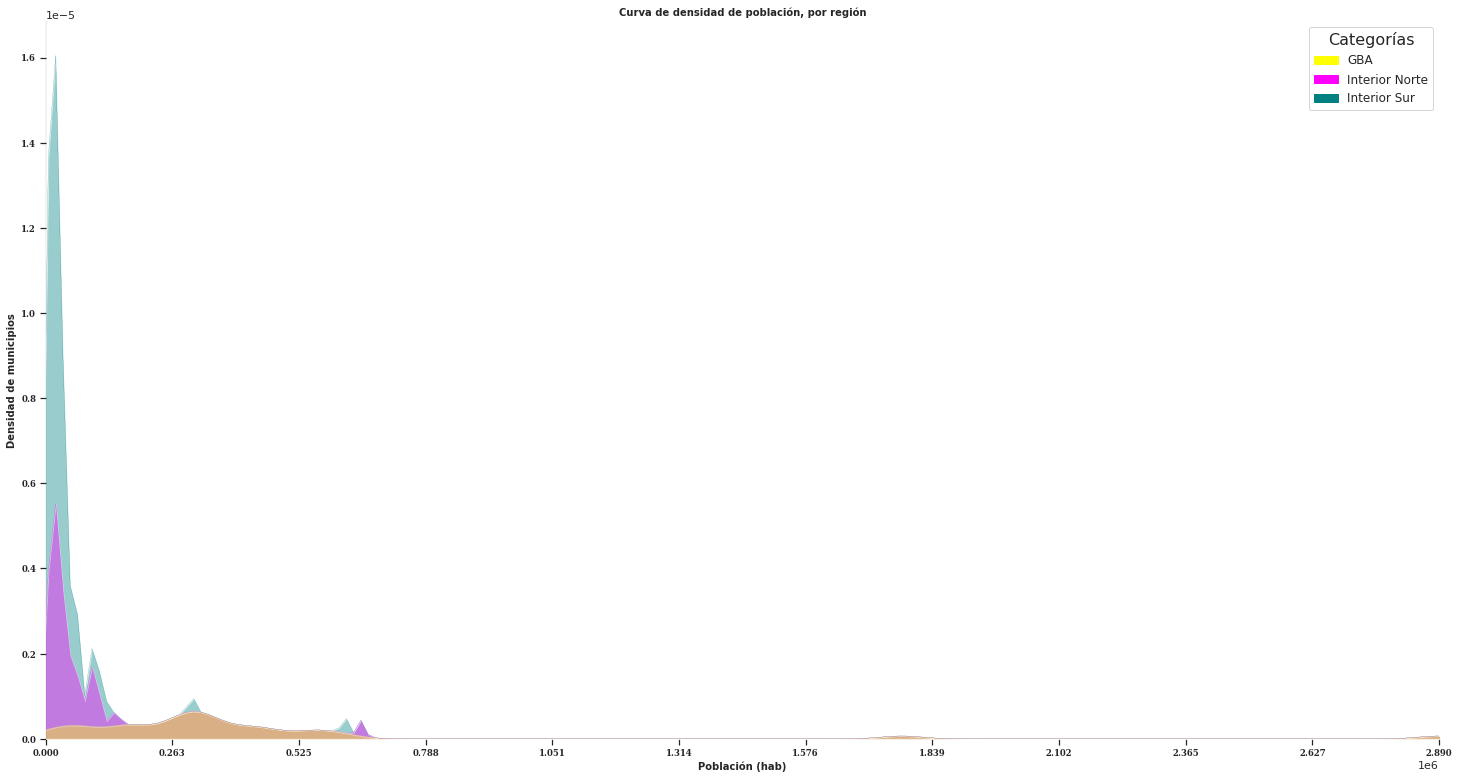

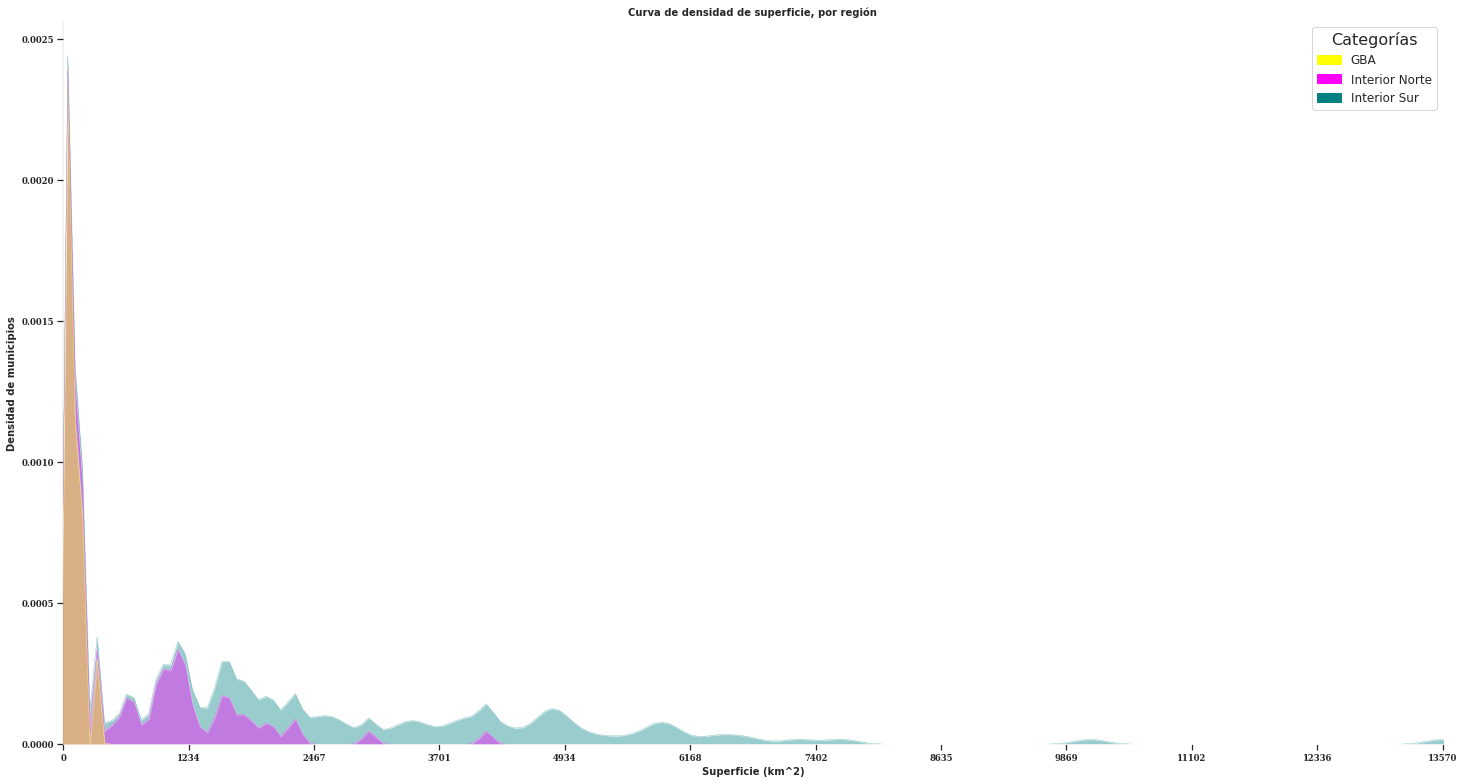

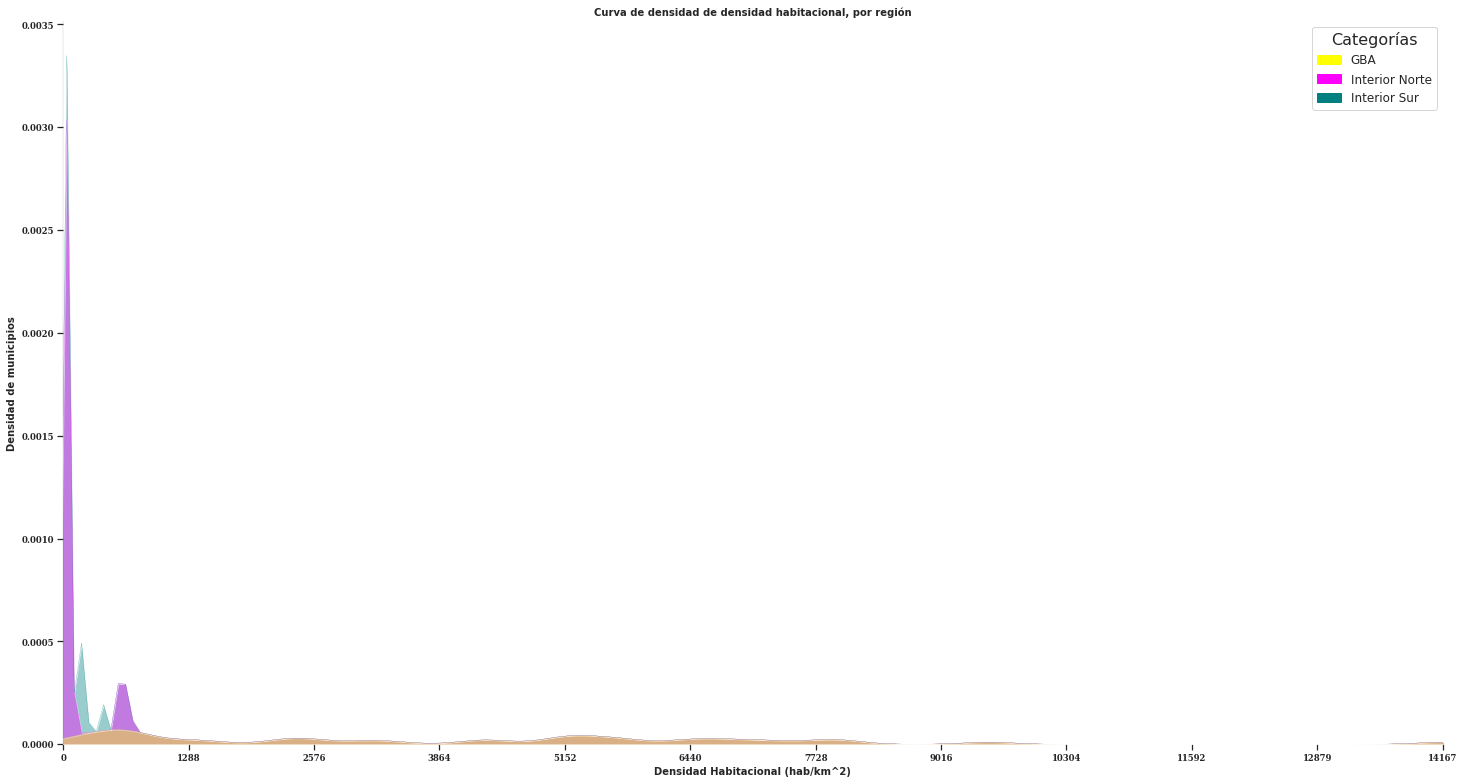

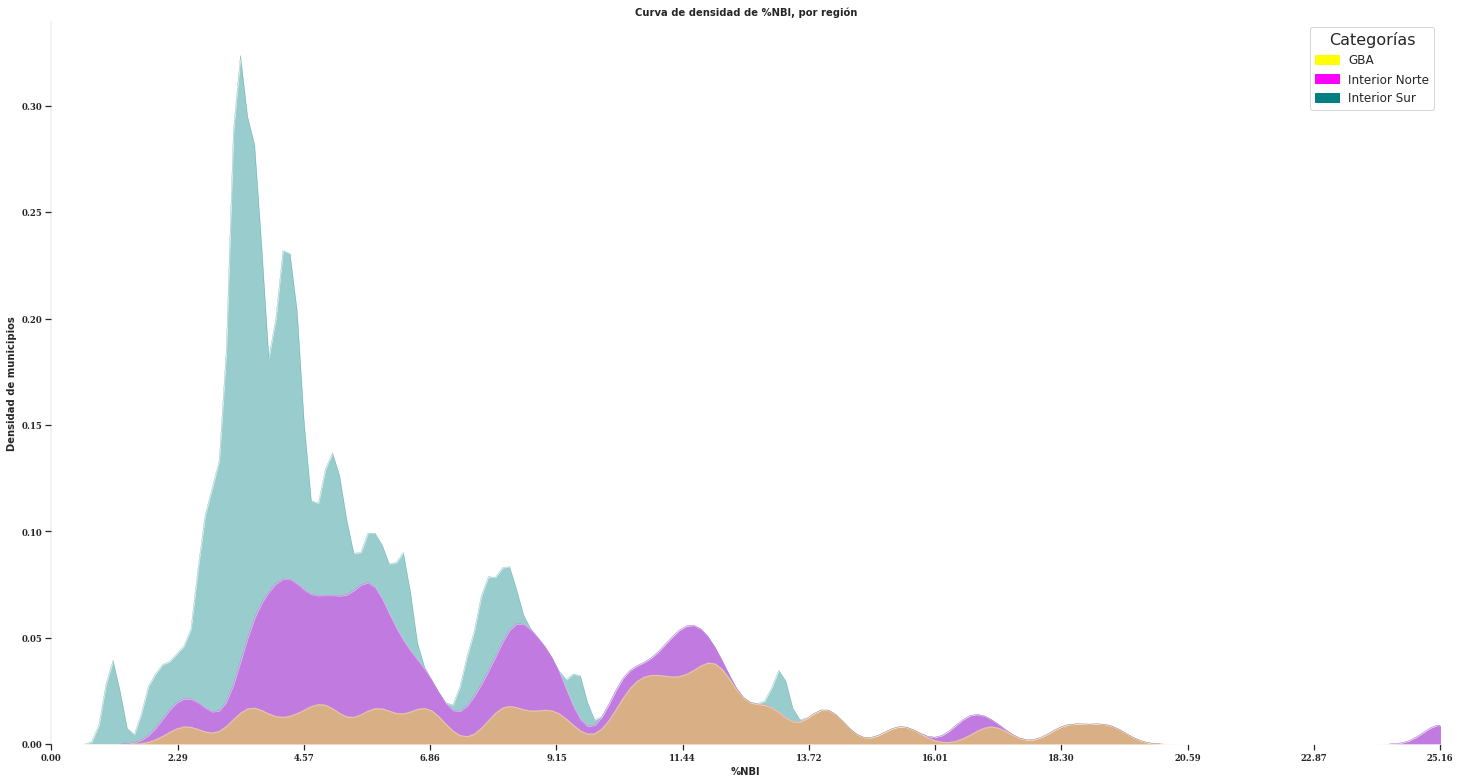

In [30]:
"""
En esta celda, realizaremos un gráfico de densidad para cada variable cuantitativa analizada.
Realizamos también la correspondiente desagregación por variables categóricas de cada histograma, por cada variable cuantitativa.
""";


#Creamos etiquetas colores diferentes para la el GBA, el nirte del interior y el sur del interior,
#para mostrar en la leyenda de los gráficos
ref_gba = mpatches.Patch(color='yellow', label='GBA')
ref_int_norte = mpatches.Patch(color='magenta', label='Interior Norte')
ref_int_sur = mpatches.Patch(color='teal', label='Interior Sur')

#Creamos una lista con dichas etiquetas definidas
etiquetas=[ref_gba,ref_int_norte,ref_int_sur]


#Creamos una lista  con los nombres de las categorías fusionadas, creadas previamente a partir de las categorías originales (región y pertenencia)
categorias=['GBA','INTERIOR NORTE', 'INTERIOR SUR']

#Creamos una lista con las variables cuantitativas a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']

#Creamos un diccionario con los titulos a mostrar en cada gráfico,
#correspondientes a cada variable cuantitativa
titulos={
            'POBLACION':'Curva de densidad de población, por región',
            'SUPERFICIE': 'Curva de densidad de superficie, por región',
            'DENSIDAD_HABITACIONAL' : 'Curva de densidad de densidad habitacional, por región',
            'PORCENTAJE_NBI' : 'Curva de densidad de %NBI, por región'
        }

#Creamos un diccionario con las etiquetas del eje X a mostrar en cada gráfico,
#correspondientes a cada variable cuantitativa
xlabels={
            'POBLACION':'Población (hab)',
            'SUPERFICIE': 'Superficie (km^2)',
            'DENSIDAD_HABITACIONAL' : 'Densidad Habitacional (hab/km^2)',
            'PORCENTAJE_NBI' : '%NBI'
        }

#Definimos el estilo de fuente a mostrar para los indicadores
#de los valores mostrados en el gráfico
fuente=fnt_mng.FontProperties(family=['serif'],weight=1000,size=8.5)


#Definimos una paleta de colores, para la desagregación por variable categórica
paleta=['teal','magenta','yellow']

#Recorremos la lista de variables cuantitativas con un for
for variable in variables:
    #Nos guardamos en una variable (de Python), el resultado
    #de la función 'intervalos' aplicada a la variable cuantitativa analizada
    res_intervalos=intervalos(municipios_cat[variable],AGRUPAMIENTO)
    
    #Configuramos la escala de la fuente
    sns.set(font_scale=1)
    
    #Configuramos el estilo del gráfico en 'ticks' (solamente nos mostrará las
    #marcas en los ejes, dejando el contenido del resto del gráfico en blanco)
    sns.set_style(style='ticks')

    #Utilizamos la función 'displot' de SeaBorn para generar el gráfico,
    #y nos guardamos su resultado (de tipo FacetGrid de Seaborn=, en 'facgr'
    
    facgr=sns.displot(data=municipios_cat, #Le pasamos el DataFrame 'municipios_cat' (con categorías fusionadas) en el atributo 'data'
                   x=variable,             #Le pasamos la variable donde estamos parados en nuestro ciclo for, al atributo 'x', para mostrar sus valores en dicho eje
                   height=20,              #Definimos la relación de aspecto con los atributos 'height' y 'aspect'
                   aspect=1.5,
                   kind="kde",             #Definimos el tipo de gráfico (en este caso, de densidad)
                   bw_method='silverman',  #Definimos el algoritmo de estimación de las curvas de densidad
                   bw_adjust =0.15 ,       #Definimos el ajuste de ancho de banda de las curvas de densidad
                   hue="CATEGORIA",        #Definimos la variable categórica en la que realizamos la desagregación de las curvas de densidad (en este caso, las categorías fusionadas)
                   palette=paleta,         #Definimos la paleta de colores para la desagregación de las curvas de densidad, en sus correspondientes variables categóricas.
                   linewidth=0.2,          #Definimos el ancho de línea de las curvas de densidad
                   legend=False,           #No mostramos la leyenda (luego la definiremos manualmente)
                   fill=False,             #No rellenamos el área por debajo de la curva (luego lo haremos manualmente)
                   alpha=1,                #Configuramos la opaciodad de las curvas
                   multiple="stack"        #Configuramos la desagregación por categorías
                    )

    #Con este for, rellenamos el espacio bajo las curvas trazadas, con el mismo color que estas, pero con un valor de opacidad mucho menor
    for i in range(3):
        line = facgr.ax.get_lines()[-(i+1)]
        x, y = line.get_data()
        facgr.ax.fill_between(x, y1=y, alpha=0.4, facecolor=paleta[i])

    #Sobre el FacetGrid que nos guardamos
    facgr.set(
           
           xticks=res_intervalos[1],           #Los ticks del eje X corresponderan a la lista de divisiones devueltas por la función 'intervalos'
                
           xlim=(0,municipios_cat[variable].max()) #Configuramos los limites del eje X entre 0 y el máximo valor de la variable analizada
          )
    
    #Configuramos el tamaño del gráfico
    facgr.figure.set_size_inches(20, 10.5)
    
    
    #Configuramos el texto y su formato para la etiqueta del eje Y
    facgr.ax.set_ylabel("Densidad de municipios",fontweight='bold',fontsize=10)
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para la etiqueta del eje X
    facgr.ax.set_xlabel(xlabels[variable],fontweight='bold',fontsize=10)
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para el título del gráfico
    plt.title(label=titulos[variable],fontweight='bold', fontsize=10)

    #Configuramos el formato para los valores de los ticks de ambos ejes
    plt.xticks(fontproperties=fuente)
    plt.yticks(fontproperties=fuente)
    
    #Configuramos el ancho de linea de los bordes de los ejes del gráfico
    facgr.ax.spines['left'].set_linewidth(0.1)
    facgr.ax.spines['bottom'].set_linewidth(0)
  
    #Configuramos el formato de la leyenda del gráfico, con las etiquetas definidas manualmente
    plt.legend(handles=etiquetas, title='Categorías', fontsize=12, title_fontsize=16)
    
    #Mostramos el gráfico
    plt.show()
 
gc.collect()

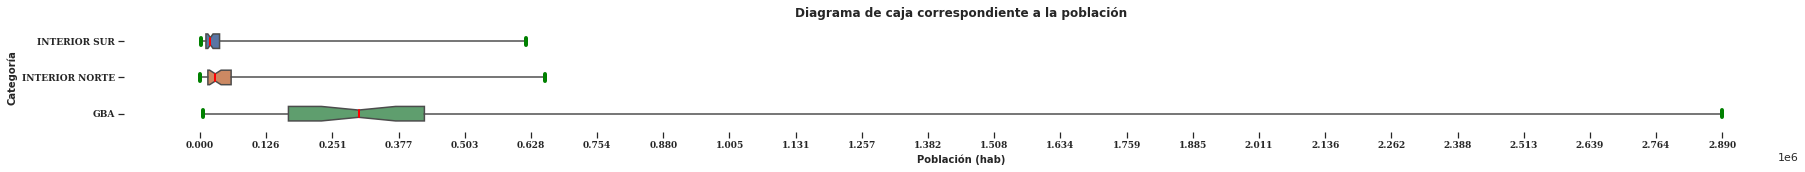

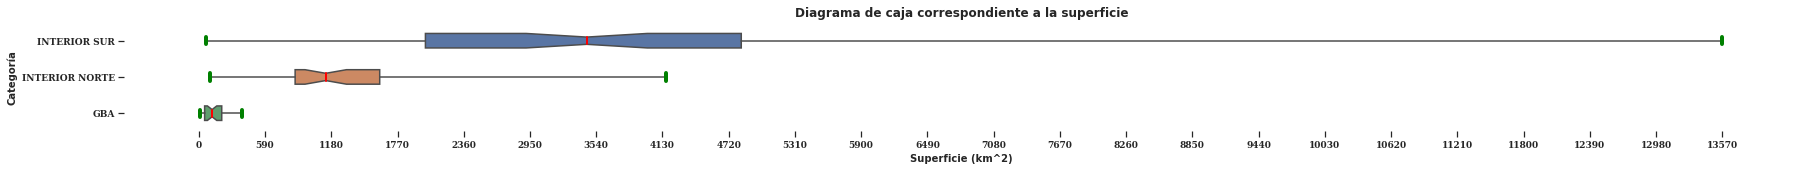

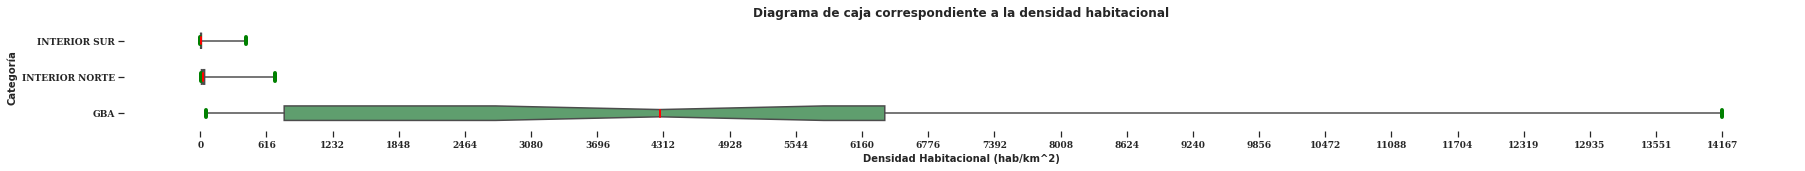

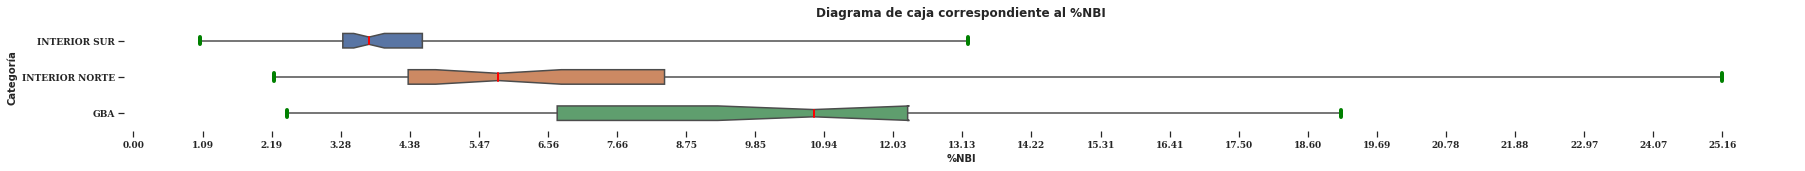

In [31]:
"""
En esta celda, realizaremos un diagrama de caja para las variables cuantitativas analizadas previamente en los histogramas y curvas de densidad,
con su correspondiente desagregación por variables categóricas
"""
#Creamos una lista con las variables a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']

#Creamos un diccionario con las etiquetas del eje X a mostrar en cada gráfico,
#correspondientes a cada variable
xlabels={
            'POBLACION':'Población (hab)',
            'SUPERFICIE': 'Superficie (km^2)',
            'DENSIDAD_HABITACIONAL' : 'Densidad Habitacional (hab/km^2)',
            'PORCENTAJE_NBI' : '%NBI'
        }

#Creamos un diccionario con los titulos a mostrar en cada gráfico,
#correspondientes a cada variable
titulos={
            'POBLACION':'Diagrama de caja correspondiente a la población',
            'SUPERFICIE': 'Diagrama de caja correspondiente a la superficie',
            'DENSIDAD_HABITACIONAL' : 'Diagrama de caja correspondiente a la densidad habitacional',
            'PORCENTAJE_NBI' : 'Diagrama de caja correspondiente al %NBI'
        }

#Definimos el estilo de fuente a mostrar para los indicadores
#de los valores mostrados en el gráfico
fuente=fnt_mng.FontProperties(family=['serif'],weight=700,size=9)

#Recorremos la lista de variables con un for
for variable in variables:

    #Configuramos el estilo del gráfico en 'ticks' (solamente nos mostrará las
    #marcas en los ejes, dejando el contenido del resto del gráfico en blanco)
    sns.set_style(style='ticks')
    
    #Utilizamos la función 'boxplot' de SeaBorn para generar el gráfico,
    #y nos guardamos su resultado (de tipo Axes de Matplotlib), en 'ax'
    ax=sns.boxplot(
        data=municipios_cat,                         #Le pasamos el DataFrame 'municipios' al atributo 'data'
        x=variable,                                  #Le pasamos la variable donde estamos parados en nuestro ciclo for, al atributo 'x', para mostrar sus valores en dicho eje
        y="CATEGORIA",                               #Al atributo 'y, le pasamos la variable categórica a desagregar (en este caso, las categorías fusionadas)
        width=0.4,                                   #Configuramos el ancho de la caja en 0,4
        whis=[0,100],                                #A los whiskers (bigotes) del diagrama de caja, los configuramos en los percentiles 0 y 100 (mínimo y máximo),Si no configuramos esta opción, por defecto,
                                                     #los whiskers adoptarán los valores de los límites de la caja (primer y tercer cuartil), mas 1,5 veces el rango intercuartil, mientras los dmas valores se mostrarán
        
        medianprops={'color':'red','linewidth':2},   #Configuramos el color de la línea que marca la mediana
        capprops={'color':'green', 'linewidth':4},   #Configuramos el color de los delimitadores de los whiskers
       
        notch=True,                                  #Establecemos el valor de notch en True, dando forma de X a la caja, alrededor de la media.
        autorange=True                               #Establecemos el autorange en True, de forma que el rango que ocupa el diagrama se ajuste automáticamente
   
    )
    
    
    #Configuramos los límites del eje X con el mínimo y máximo valor de la variable analizada
    #Lo dejamos comentado, ya que establecimos la opción 'autorange' en True, de modo que esta línea perjudicaría dicha configuración
    #ax.set_xlim(xmin=municipios[variable].min(),xmax=municipios[variable].max())
    
    #Los ticks del eje X corresponderan a la lista de divisiones devueltas por la función 'intervalos', en este caso, con el doble de divisiones que en los histogramas
    ax.set_xticks(intervalos(municipios[variable],AGRUPAMIENTO*2)[1])
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para la etiqueta del eje X
    ax.set_xlabel(xlabels[variable],fontweight='black',fontsize=10)
    
    ax.set_ylabel('Categoría',fontweight='black',fontsize=10)
    
    #Configuramos el formato para los valores de los ticks de ambos ejes
    plt.xticks(fontproperties=fuente)
    
    #Eliminamos el tick del eje y
    plt.yticks(fontproperties=fuente)
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para el título del gráfico
    plt.title(label=titulos[variable],fontweight='bold', fontsize=12)
    
    #Configuramos el tamaño del gráfico
    ax.figure.set_size_inches(30, 2)
    
    #Configuramos el ancho de linea de los bordes de los ejes del gráfico
    ax.spines['left'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    
    #Mostramos el gráfico
    plt.show()
    print('\n\n')
gc.collect()

In [ ]:
"""
Al observar los diagramas de caja desagregados por categoría, dado que este mismo pone énfasis en los percentiles
(y particularmente en la mediana, que constituye el percentil % 50), notamos de forma inmediata la caracterización
de cada una de estas categorías:

El GBA presenta: en su mayoría municipios muy poblados, poco extensos, muy densamente poblados, y con altos índices de indicadores NBI.
El sur del interior, representa su absoluta contrapartida: en su mayoría, municipios escasamente poblados, muy extensos, con escasa densidad poblacional y bajos indicadores NBI
El norte del interior, respecto de todas estas variables analizadas, susu indicadores se encuentran en un valor intermedio entre el GBA y el sur del interior.

Analizando la variabilidad, vemos que la misma suele ser bastante amplia en la mayoría de los casos.
Una excepción importante es la superficie de los municipios del GBA, la cual no presenta una variabilidad tan notoria, respecto de los demas diagramas de caja analizados.
Asímismo, esto ocurre con los diagramas correspondientes al porcentaje de hogares con NBI, los cuales tienden a ser mas simétricos que los correspondientes a las demas variables.

No obstante, un caso particular notamos en los diagramas correspondientes a la densidad habitacional:
En el GBA, el diagrama de caja presenta una gran amplitud, pero una simetría importante.
Por otra parte, en lo que respecta a los diagramas tanto del sur como del norte del interior, aquí tenemos uns amplitud mas reducida,
pero una asimetría muy pronunciada hacia la derecha. Vemos que, en ambos casos, la mediana es mucho mas cercana al mínimo (percentil %0),
que al máximo (percentil %100), viendose en el gráfico los percentiles %0, %25, %50 y %75, practicamente indistinguibles de forma visual.
Esto se debe a que, en el GBA, tenemos a todos los municipios total o parcialmente urbanizados, siendo escasas las zonas rurales que aún
existen es estos municipios. Por otra parte, en el interior, sobre todo en el sur, tenemos a la mayoría de los municipios con territorio
casi exclusivamente rural, en muchos casos con un pueblo o pequeña ciudad que constituye su epicentro. No obstante, en ocasiones ocurre que
dentro de los municipios del interior, existen, ademas de zonas rurales, núcleos urbanos muy importantes, que balancean de esta forma
la densidad habitacional de dichos municipios.

Debemos tomar en cuenta que la densidad habitacional de las zonas rurales se encuentra en el orden de menos de 10 hab/km¹,
mientras que el de las zonas urbanas, suele superar el orden de los 5000 hab/km², lo que otorga como consecuencia,
estas asimetrías tan evidentes.

Entonces, en el interior, tanto en su región norte como en su región sur, tendremos el %75 de las observaciones, con valores
de densidad habitacional concentrados alrededor de un valor relativamente bajo en comparación a su máximo,  mucho mas cercanos a
su valor mínimo. Solo el %25 restante de las observaciones (del rango de %75 al %100), ostenta un valor de densidad habitacional
que se aleja considerablemente del valor mínimo observado y también de la mediana. Este %25, en ambos casos, está constituido
por aquellos municipios del interior que contienen en su territorio, centros urbanos relativamente grandes, siendo en su mayoría,
municipios rurales.


""";

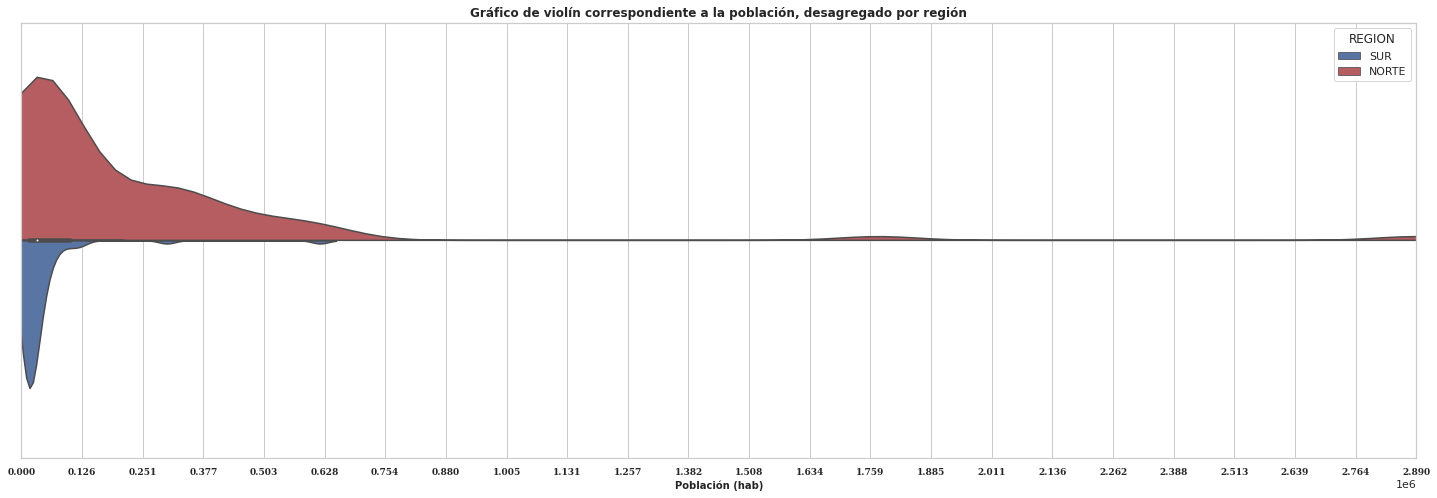

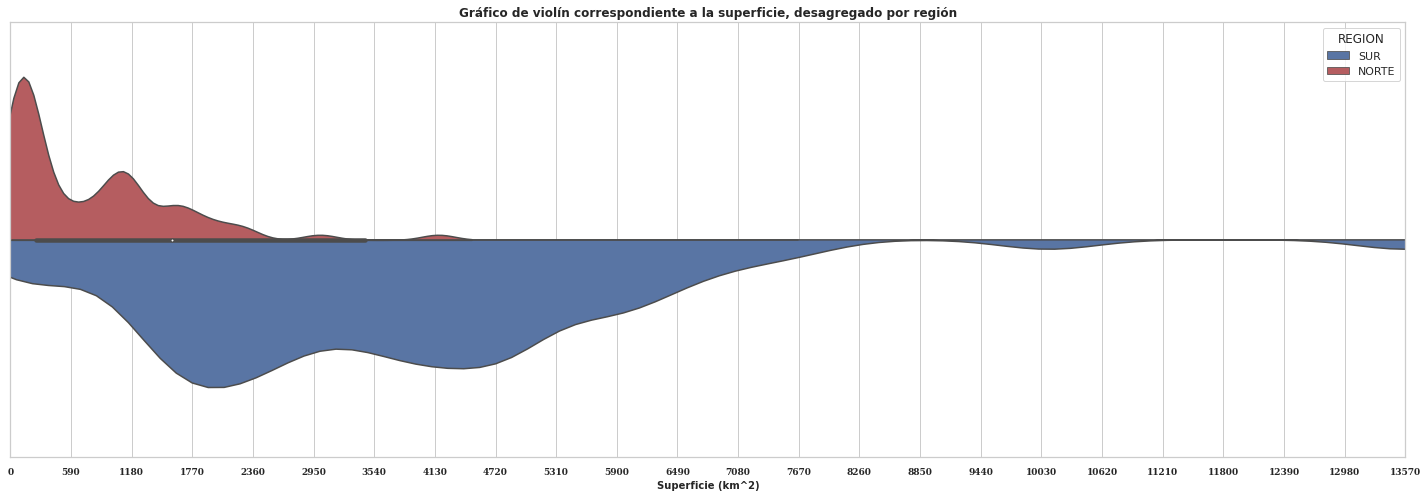

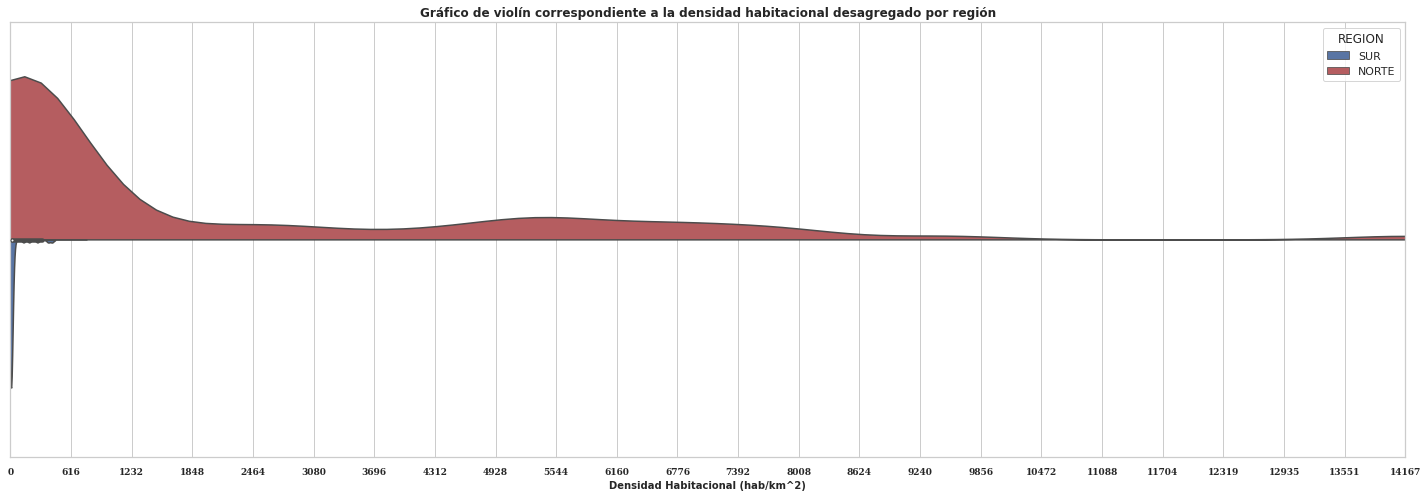

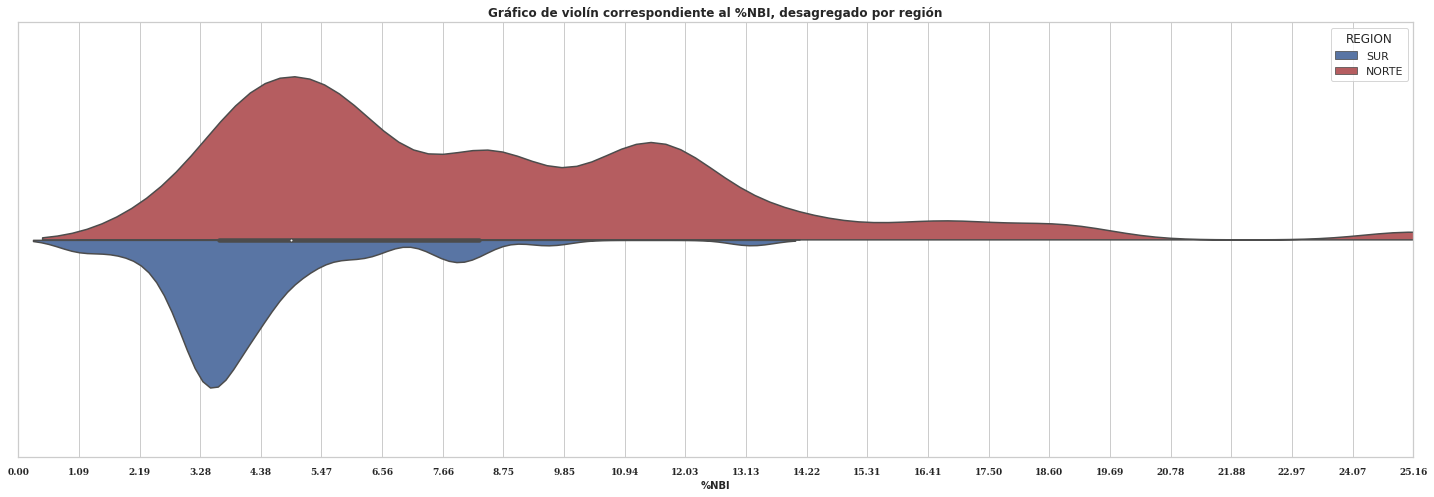

In [32]:
"""
En esta celda, complementaremos con un gráfico de violín los histogramas, curvas de densidad, y diagramas de caja realizados
En este caso, haremos los graficos de violín de forma bipartita, desagregados por región.
"""
#Creamos una lista con las variables cuantitativas a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']

#Creamos un diccionario con las etiquetas del eje X a mostrar en cada gráfico,
#correspondientes a cada variable cuantitativa
xlabels={
            'POBLACION':'Población (hab)',
            'SUPERFICIE': 'Superficie (km^2)',
            'DENSIDAD_HABITACIONAL' : 'Densidad Habitacional (hab/km^2)',
            'PORCENTAJE_NBI' : '%NBI'
        }
#Creamos un diccionario con los titulos a mostrar en cada gráfico,
#correspondientes a cada variable
titulos={
            'POBLACION':'Gráfico de violín correspondiente a la población, desagregado por región',
            'SUPERFICIE': 'Gráfico de violín correspondiente a la superficie, desagregado por región',
            'DENSIDAD_HABITACIONAL' : 'Gráfico de violín correspondiente a la densidad habitacional desagregado por región',
            'PORCENTAJE_NBI' : 'Gráfico de violín correspondiente al %NBI, desagregado por región'
        }

#Definimos el estilo de fuente a mostrar para los indicadores
#de los valores mostrados en el gráfico
fuente=fnt_mng.FontProperties(family=['serif'],weight=700,size=9)

#Recorremos la lista de variables con un for
for variable in variables:
    
    #Configuramos el estilo del gráfico en 'whitegrid', el cual
    #nos mostrará una grilla sobre fondo blanco, sobre los valores de los ticks
    sns.set_style(style='whitegrid')
    
    #Utilizamos esta sentencia para lograr un gráfico de violín bipartito: asignamos un string vacío a una columna inexistente en el DataFrame de Pandas ("TODOS")
    municipios["TODOS"]=""
    
    #Utilizamos la función 'violinplot' de SeaBorn para generar el gráfico de violín,
    #y nos guardamos su resultado (de tipo Axes de Matplotlib), en 'ax'
    ax=sns.violinplot(
        data=municipios,     #Le pasamos el DataFrame 'municipios' al atributo 'data'
        x=variable,          #Le pasamos la variable cuantitativa donde estamos parados en nuestro ciclo for, al atributo 'x', para mostrar sus valores en dicho eje
        y="TODOS",           #Al atributo 'y', le pasamos una variable , "TODOS", inexistente en el DataFrame, definida previamente antes de llamar a 'violinplot'. Utilizamos este recurso para lograr un gráfico bipartito.
        hue="REGION",        #Al atributo 'hue', le pasamos la variable categórica sobre la que queremos hacer la desagregación de forma bipartita, en este caso "REGION"
        split=True,          #Al atributo 'split' le pasamos el valor 'True', indicando que queremos obtener un gráfico de violin bipartito (en inglés "split")
        width=0.6,           #Al atributo 'width' le pasamos el ancho del gráfico de violín
        palette=['b','r'],   #Al atributo 'palette' le pasamos los colores en los que queremos visualizar la desagregación (en este caso, azul para el sur y rojo para el norte)
        scale="count",       #La escala para determinar el ancho del violín será la cantidad de observaciones por cada división
        inner='box',         #Dentro del gráfico de violín, se dibuja una caja, al igual que el diagrama de caja correspondiente a la misma variable
        bw=0.2,              #Determinamos el ancho de banda utilizado para trazar la curva de densidad de cada una de las partes del gráfico bipartito
        whis=[0,100]         #A los whiskers (bigotes) del diagrama de caja, los configuramos en los percentiles 0 y 100 (mínimo y máximo)
                             #Si no configuramos esta opción, por defecto, los whiskers adoptarán los valores de los límites de la caja (primer y tercer cuartil), mas 1,5 veces el rango intercuartil

    )
    
    #Configuramos los límites del eje X con el mínimo y máximo valor de la variable analizada
    ax.set_xlim(xmin=municipios[variable].min(),xmax=municipios[variable].max())
    
    #Configuramos los límites del eje Y entre -0,4 y 0.4
    ax.set_ylim(-0.4,0.4)
    
    #Los ticks del eje X corresponderan a la lista de divisiones devueltas por la función 'intervalos', en este caso, con el doble de divisiones que en los histogramas
    ax.set_xticks(intervalos(municipios[variable],AGRUPAMIENTO*2)[1])
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para la etiqueta del eje X
    ax.set_xlabel(xlabels[variable],fontweight='bold',fontsize=10)
   
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para la etiqueta del eje X
    ax.set_ylabel('',fontweight='bold',fontsize=10)
    
   
    #Configuramos el formato para los valores de los ticks de ambos ejes
    plt.xticks(fontproperties=fuente)
   
    #Configuramos el tamaño del gráfico
    ax.figure.set_size_inches(25, 8)
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para el título del gráfico
    plt.title(label=titulos[variable],fontweight='bold', fontsize=12)
    
    plt.show()
gc.collect()

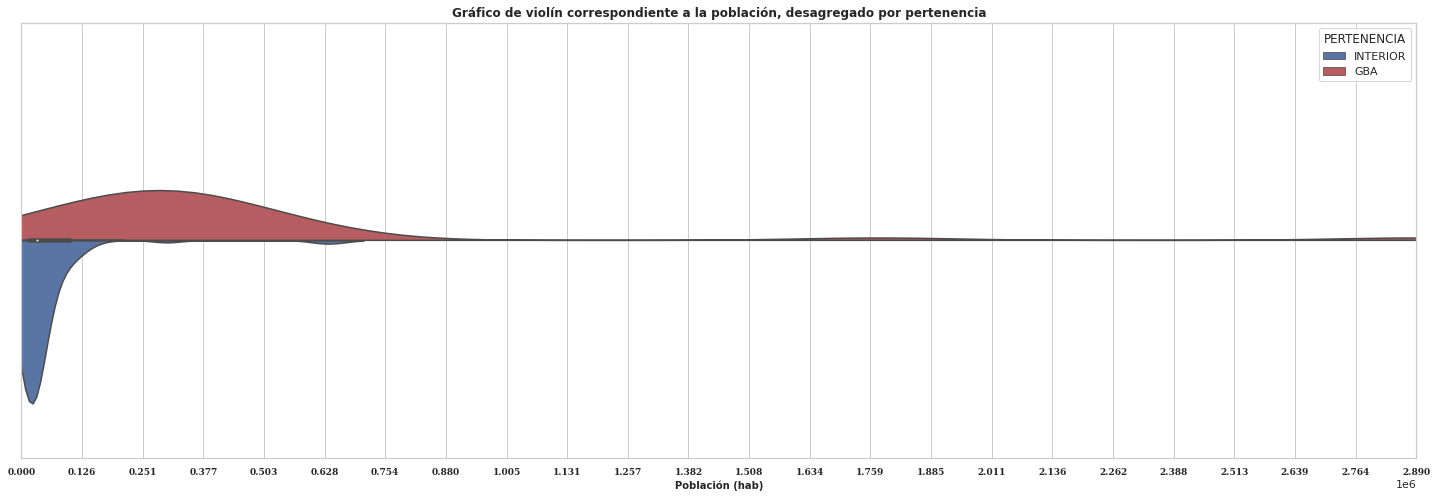

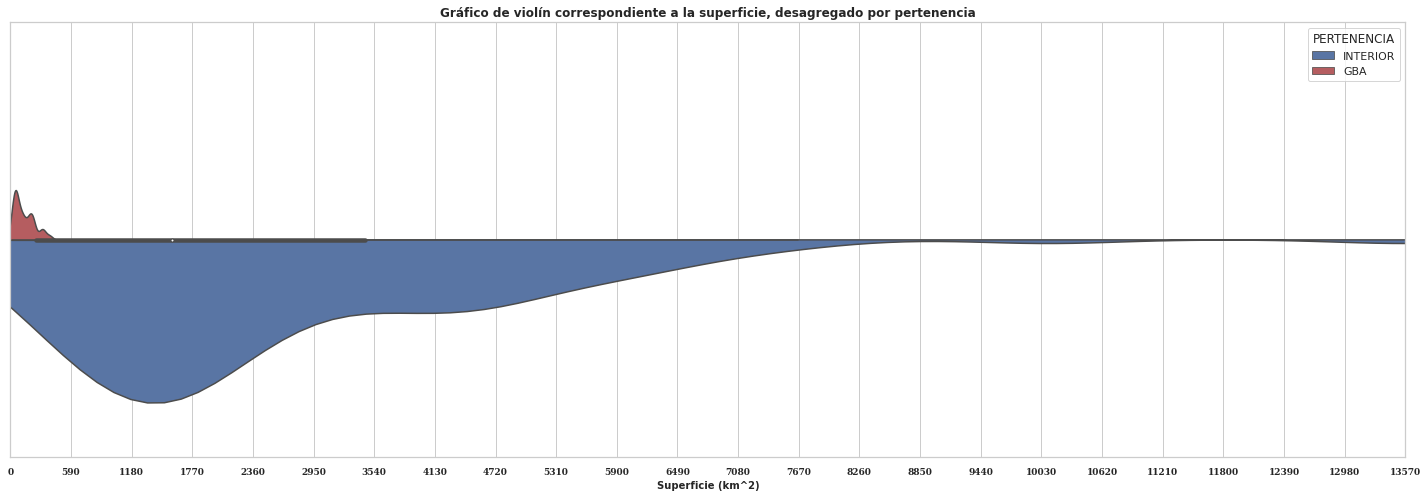

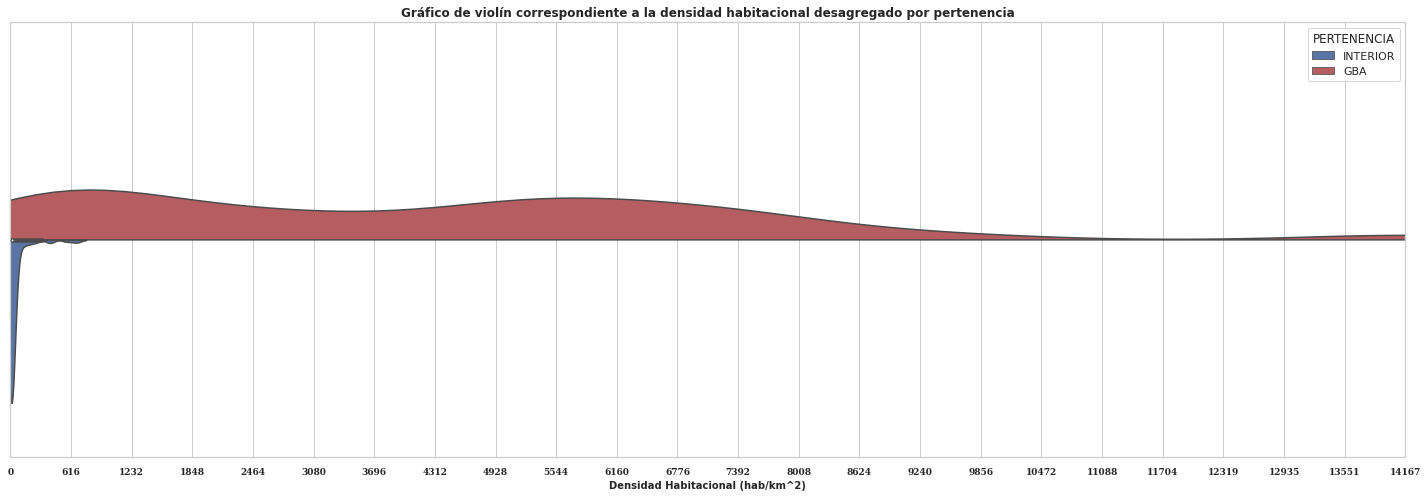

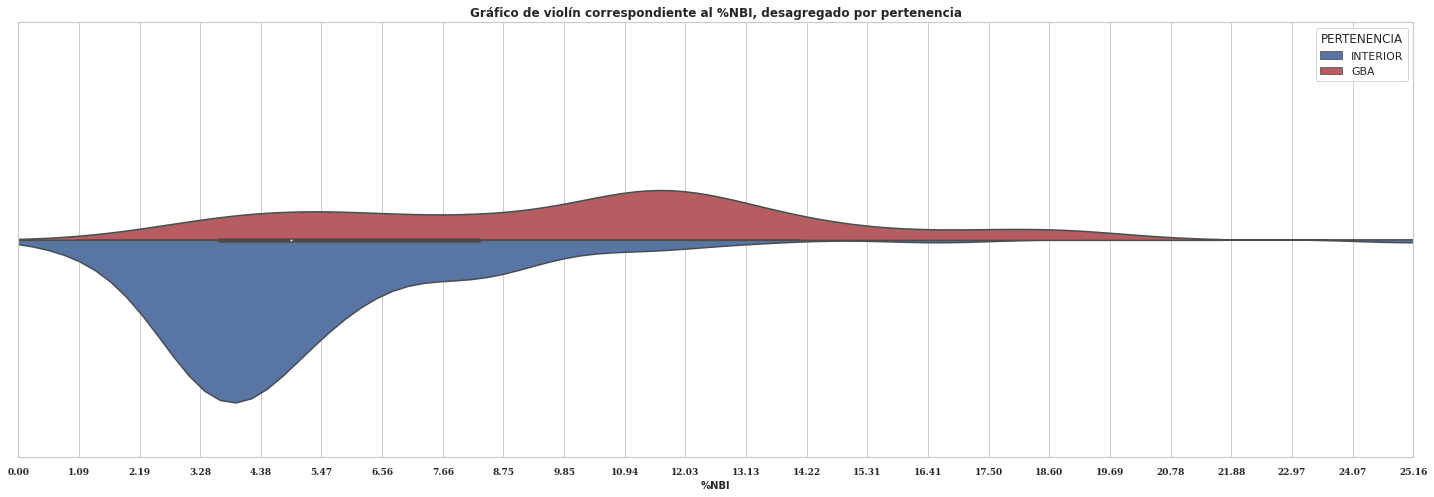

In [33]:
"""
En esta celda, complementaremos con un gráfico de violín los histogramas, curvas de densidad, y diagramas de caja realizados
En este caso, haremos los graficos de violín de forma bipartita, desagregados por pertenencia.
"""
#Creamos una lista con las variables cuantitativas a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']

#Creamos un diccionario con las etiquetas del eje X a mostrar en cada gráfico,
#correspondientes a cada variable cuantitativa
xlabels={
            'POBLACION':'Población (hab)',
            'SUPERFICIE': 'Superficie (km^2)',
            'DENSIDAD_HABITACIONAL' : 'Densidad Habitacional (hab/km^2)',
            'PORCENTAJE_NBI' : '%NBI'
        }
#Creamos un diccionario con los titulos a mostrar en cada gráfico,
#correspondientes a cada variable
titulos={
            'POBLACION':'Gráfico de violín correspondiente a la población, desagregado por pertenencia',
            'SUPERFICIE': 'Gráfico de violín correspondiente a la superficie, desagregado por pertenencia',
            'DENSIDAD_HABITACIONAL' : 'Gráfico de violín correspondiente a la densidad habitacional desagregado por pertenencia',
            'PORCENTAJE_NBI' : 'Gráfico de violín correspondiente al %NBI, desagregado por pertenencia'
        }

#Definimos el estilo de fuente a mostrar para los indicadores
#de los valores mostrados en el gráfico
fuente=fnt_mng.FontProperties(family=['serif'],weight=700,size=9)

#Recorremos la lista de variables con un for
for variable in variables:
    
    #Configuramos el estilo del gráfico en 'whitegrid', el cual
    #nos mostrará una grilla sobre fondo blanco, sobre los valores de los ticks
    sns.set_style(style='whitegrid')
    
    #Utilizamos esta sentencia para lograr un gráfico de violín bipartito: asignamos un string vacío a una columna inexistente en el DataFrame de Pandas ("TODOS")
    municipios["TODOS"]=""
    
    #Utilizamos la función 'violinplot' de SeaBorn para generar el gráfico de violín,
    #y nos guardamos su resultado (de tipo Axes de Matplotlib), en 'ax'
    ax=sns.violinplot(
        data=municipios,     #Le pasamos el DataFrame 'municipios' al atributo 'data'
        x=variable,          #Le pasamos la variable cuantitativa donde estamos parados en nuestro ciclo for, al atributo 'x', para mostrar sus valores en dicho eje
        y="TODOS",           #Al atributo 'y', le pasamos una variable , "TODOS", inexistente en el DataFrame, definida previamente antes de llamar a 'violinplot'. Utilizamos este recurso para lograr un gráfico bipartito.
        hue="PERTENENCIA",        #Al atributo 'hue', le pasamos la variable categórica sobre la que queremos hacer la desagregación de forma bipartita, en este caso "PERTENENCIA".
        split=True,          #Al atributo 'split' le pasamos el valor 'True', indicando que queremos obtener un gráfico de violin bipartito (en inglés "split")
        width=0.6,           #Al atributo 'width' le pasamos el ancho del gráfico de violín
        palette=['b','r'],   #Al atributo 'palette' le pasamos los colores en los que queremos visualizar la desagregación (en este caso, azul para el sur y rojo para el norte)
        scale="count",       #La escala para determinar el ancho del violín será la cantidad de observaciones por cada división
        inner='box',         #Dentro del gráfico de violín, se dibuja una caja, al igual que el diagrama de caja correspondiente a la misma variable
        bw=0.3,              #Determinamos el ancho de banda utilizado para trazar la curva de densidad de cada una de las partes del gráfico bipartito
        whis=[0,100]         #A los whiskers (bigotes) del diagrama de caja, los configuramos en los percentiles 0 y 100 (mínimo y máximo)
                             #Si no configuramos esta opción, por defecto, los whiskers adoptarán los valores de los límites de la caja (primer y tercer cuartil), mas 1,5 veces el rango intercuartil

    )
    
    #Configuramos los límites del eje X con el mínimo y máximo valor de la variable analizada
    ax.set_xlim(xmin=municipios[variable].min(),xmax=municipios[variable].max())
    
    #Configuramos los límites del eje Y entre -0,4 y 0.4
    ax.set_ylim(-0.4,0.4)
    
    #Los ticks del eje X corresponderan a la lista de divisiones devueltas por la función 'intervalos', en este caso, con el doble de divisiones que en los histogramas
    ax.set_xticks(intervalos(municipios[variable],AGRUPAMIENTO*2)[1])
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para la etiqueta del eje X
    ax.set_xlabel(xlabels[variable],fontweight='bold',fontsize=10)
   
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para la etiqueta del eje X
    ax.set_ylabel('',fontweight='bold',fontsize=10)
    
   
    #Configuramos el formato para los valores de los ticks de ambos ejes
    plt.xticks(fontproperties=fuente)
   
    #Configuramos el tamaño del gráfico
    ax.figure.set_size_inches(25, 8)
    
    #Configuramos el texto (definido en el diccionario correspondiente) y su formato para el título del gráfico
    plt.title(label=titulos[variable],fontweight='bold', fontsize=12)
    
    plt.show()
gc.collect()

In [34]:
"""
En esta celda, mostraremos la lista de intervalos generada para cada columna, con su correspondiente delimitación,
de acuerdo a su categorizacion por region, por pertenencia, y luego exclusivamente para el norte del interior.
De esta forma, se puede visualizar de manera analítica, lo que se visualizó previamente de manera gráfica en los histogramas desagregados por categoría,
al igual que en los gráficos de densidad, diagramas de caja, y de violín.
"""

#Definimos un diccionario con las unidades correspondientes a cada variable cuantitativa
unidades={
    'POBLACION' :'(hab)',
    'SUPERFICIE' : '(km²)',
    'DENSIDAD_HABITACIONAL': '(hab/km²)' ,
    'PORCENTAJE_NBI' : '(%)'
}


#Definimos una lista de strings, con los valores que puede adoptar la variable categórica "REGION"
regiones=["NORTE","SUR"]

#Definimos una lista de strings, con los valores que puede adoptar la variable categórica "PERTENENCIA"
pertenencias=["GBA","INTERIOR"]

#Definimos una lista de strings, con las columnas correspondientes a las variables cuantitativas a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']

    
    
#Generamos un diccionario donde nos guardamos el resultado de
#llamar a la función 'intervalos', con cada columna correspondiente a una variable cuantitativa,
#de forma que no tendremos que volver a llamarla cada vez que necesitamos dichos valores
dict_divisiones={}

#Recorremos con un for, la lista de variables cuantitativas
for variable in variables:
    #En el diccionario que creamos, nos guardamos el resultado que nos devuelve la
    #función 'intervalos', para cada columna correspondiente a las variables cuantitativas
    #que analizamos,  y el valor de la constante que definimos para el agrupamiento.
    dict_divisiones[variable]=intervalos(municipios[variable],AGRUPAMIENTO)[1]

#Con un for de orden superior, recorremos la lista de regiones
for region in regiones:
    #Generamos una variable 'filtro', cuyo valor será una serie booleana de Pandas. El valor de verdad de cada elemento
    #de esta serie,se corresponderá con la región en donde estemos parados en nuestro ciclo for.
    #Si estamos parados en "NORTE", cada elemento de la serie valdrá True en todos
    #los registros cuyo valor en la columna de región sea "NORTE",y False para todos los registros cuyo valor en la columna de región sea "SUR".
    #Lo mismo se aplica al caso inverso.
    filtro=municipios['REGION'] == region
    
    #Con un for anidado, recorremos la lista de variables cuantitativas que queremos analizar
    for variable in variables:   


        #Llamamos a la función 'intervalos_desag', con los siguientes argumentos:
        
        # -La serie de Pandas correspondiente a la columna que queremos analizar donde estamos parados en nuetro for anidado, a la que le aplicamos
        #  el filtro correspondiente, según la región que estemos iterando en nuestro ciclo for de orden superior
        
        # -La lista de delimitadores de intervalos, correspondiente a la variable cuantitativa en donde estamos parados en nuestro for anidado,
        #  almacenada previamente en nuestro diccionario 'dict_divisiones'
        
        #Al primer elemento de la tupla que nos devuelve la función 'intervalos_desag' con dichos argumentos,
        #lo guardamos en la variable 'list_intervalos', donde nos queda almacenada la lista de frecuencias de dicha
        #variable cuantitativa, para la región donde estamos parados en el for.
        list_intervalos= intervalos_desag(municipios[variable][filtro],dict_divisiones[variable])   
        
        #Imprimimos un mensaje, indicando cual es la tabla que se va a emitir por pantalla, de acuerdo a la variable 
        #cuantitativa y la región en donde estemos parados en nuestros ciclos for anidados
        print("Lista de intervalos correspondientes a la variable " + variable + " de la region " + region + ":" )
        
        #Llamamos a la función 'tabla_intervalos', definida mas arriba con los siguientes argumentos:
        
        # -Como primer argumento, en 'list_intervalos', teníamos la lista de frecuencias correspondiente a variable cuantitativa analizada,
        # desagregada por la región donde estamos parados en el for de orden superior
        
        # -Como segundo argumento, en 'dict_divisiones' tenemos los delimitadores de los intervalos
        # correspondientes a la variable cuantitativa que estamos analizando.
        
        #-Finalmente, como tercer argumento, le pasmos la unidad correspondiente a la variable
        # cuantitativa que estamos analizando
        
        #Mostramos por pantalla el resultado de dicha función
        display(tabla_intervalos(list_intervalos,dict_divisiones[variable],unidades[variable]))
        
        #Mostramos el espaciado vertical correspondiente
        print("\n\n")
    #Mostramos el espaciado vertical correspondiente, en el ciclo for de orden superior    
    print("\n\n")
    
#Ahora, con un for de orden superior, recorremos la lista de pertenencias
for pertenencia in pertenencias:
    #Generamos una variable 'filtro', cuyo valor será una serie booleana de Pandas. El valor de verdad de cada elemento
    #de esta serie,se corresponderá con la región en donde estemos parados en nuestro ciclo for.
    #Si estamos parados en "GBA", cada elemento de la serie valdrá True en todos
    #los registros cuyo valor en la columna de región sea "GBA",y False para todos los registros cuyo valor en la columna de región sea "INTERIOR".
    #Lo mismo se aplica al caso inverso.
    filtro=municipios['PERTENENCIA'] == pertenencia

    #Con un for anidado, recorremos la lista de variables cuantitativas que queremos analizar
    for variable in variables:   

        #Llamamos a la función 'intervalos_desag', con los siguientes argumentos:
        
        # -La serie de Pandas correspondiente a la columna que queremos analizar donde estamos parados en nuetro for anidado, a la que le aplicamos
        #  el filtro correspondiente, según la pertenencia que estemos iterando en nuestro ciclo for de orden superior
        
        # -La lista de delimitadores de intervalos, correspondiente a la variable cuantitativa en donde estamos parados en nuestro for anidado,
        #  almacenada previamente en nuestro diccionario 'dict_divisiones'
        
        #Al primer elemento de la tupla que nos devuelve la función 'intervalos_desag' con dichos argumentos,
        #lo guardamos en la variable 'list_intervalos', donde nos queda almacenada la lista de frecuencias de dicha
        #variable cuantitativa, para la pertenencia donde estamos parados en el for.
        list_intervalos= intervalos_desag(municipios[variable][filtro],dict_divisiones[variable])
        
        #Imprimimos un mensaje, indicando cual es la tabla que se va a emitir por pantalla, de acuerdo a la variable 
        #cuantitativa y la pertenencia en donde estemos parados en nuestros ciclos for anidados
        print("Lista de intervalos correspondientes a la variable " + variable + " del " + pertenencia + ":" )
        
        
        #Llamamos a la función 'tabla_intervalos', definida mas arriba con los siguientes argumentos:
        
        # -Como primer argumento, en 'list_intervalos', teníamos la lista de frecuencias correspondiente a variable cuantitativa analizada,
        # desagregada por la pertenencia donde estamos parados en el for de orden superior
        
        # -Como segundo argumento, en 'dict_divisiones' tenemos los delimitadores de los intervalos
        # correspondientes a la variable cuantitativa que estamos analizando.
        
        #-Finalmente, como tercer argumento, le pasmos la unidad correspondiente a la variable
        # cuantitativa que estamos analizando
        
        #Mostramos por pantalla el resultado de dicha función
        display(tabla_intervalos(list_intervalos,dict_divisiones[variable],unidades[variable]))

         #Mostramos el espaciado vertical correspondiente
        print("\n\n")
    #Mostramos el espaciado vertical correspondiente, en el ciclo for de orden superior    
    print("\n\n")    
    

#Para el último caso, creamos dos series booleanas de Pandas que actuarán como filtro

#La primera, respecto de los registros de la base de datos categorizados en la región norte
filtro1=municipios['REGION'] == 'NORTE'
#La primera, respecto de los registros de la base de datos categorizados como pertenencientes al interior
filtro2=municipios['PERTENENCIA'] == 'INTERIOR'

#Con un for , recorremos la lista de variables cuantitativas que queremos analizar
for variable in variables:   

    #Llamamos a la función 'intervalos_desag', con los siguientes argumentos:
        
    # -La serie de Pandas correspondiente a la columna que queremos analizar donde estamos parados en nuetro for anidado, a la que le aplicamos
    #  los dos filtros, tanto el correspondiente a la región norte, como el correspondiente a la pertenencia al interior

    # -La lista de delimitadores de intervalos, correspondiente a la variable cuantitativa en donde estamos parados en nuestro for,
    #  almacenada previamente en nuestro diccionario 'dict_divisiones'

    #Al primer elemento de la tupla que nos devuelve la función 'intervalos_desag' con dichos argumentos,
    #lo guardamos en la variable 'list_intervalos', donde nos queda almacenada la lista de frecuencias de dicha
    #variable cuantitativa, para los municipios del norte del interior
    list_intervalos= intervalos_desag(municipios[variable][filtro1][filtro2],dict_divisiones[variable])
    
    #Imprimimos un mensaje, indicando cual es la tabla que se va a emitir por pantalla, de acuerdo a la variable 
    #cuantitativa correspondiente para el norte del interior
    print("Lista de intervalos correspondientes a la variable " + variable + " del norte del interior:" )
    
    #Llamamos a la función 'tabla_intervalos', definida mas arriba con los siguientes argumentos:
        
    # -Como primer argumento, en 'list_intervalos', teníamos la lista de frecuencias correspondiente a variable cuantitativa analizada,
    # desagregada por la inclusión en la región norte, y la pertenencia al interior

    # -Como segundo argumento, en 'dict_divisiones' tenemos los delimitadores de los intervalos
    # correspondientes a la variable cuantitativa que estamos analizando.

    #-Finalmente, como tercer argumento, le pasmos la unidad correspondiente a la variable
    # cuantitativa que estamos analizando

    #Mostramos por pantalla el resultado de dicha función
    display(tabla_intervalos(list_intervalos,dict_divisiones[variable],unidades[variable]))
    print("\n\n")
print("\n\n")
gc.collect()

Lista de intervalos correspondientes a la variable POBLACION de la region NORTE:


Intervalo (hab)  Frecuencia Absoluta Frecuencia Relativa
0          (  0.0  :  262741.0  ]                51.00             % 68.92
1     (  262741.0  :  525482.0  ]                16.00             % 21.62
2     (  525482.0  :  788223.0  ]                 5.00              % 6.76
3    (  788223.0  :  1050964.0  ]                 0.00              % 0.00
4   (  1050964.0  :  1313705.0  ]                 0.00              % 0.00
5   (  1313705.0  :  1576446.0  ]                 0.00              % 0.00
6   (  1576446.0  :  1839187.0  ]                 1.00              % 1.35
7   (  1839187.0  :  2101928.0  ]                 0.00              % 0.00
8   (  2101928.0  :  2364669.0  ]                 0.00              % 0.00
9   (  2364669.0  :  2627410.0  ]                 0.00              % 0.00
10  (  2627410.0  :  2890151.0  ]                 1.00              % 1.35




Lista de intervalos correspondientes a la variable SUPERFICIE de la region NORTE:


Intervalo (km²)  Frecuencia Absoluta Frecuencia Relativa
0        (  0.0  :  1233.61  ]                58.00             % 78.38
1    (  1233.61  :  2467.22  ]                14.00             % 18.92
2    (  2467.22  :  3700.83  ]                 1.00              % 1.35
3    (  3700.83  :  4934.44  ]                 1.00              % 1.35
4    (  4934.44  :  6168.05  ]                 0.00              % 0.00
5    (  6168.05  :  7401.66  ]                 0.00              % 0.00
6    (  7401.66  :  8635.27  ]                 0.00              % 0.00
7    (  8635.27  :  9868.88  ]                 0.00              % 0.00
8   (  9868.88  :  11102.49  ]                 0.00              % 0.00
9   (  11102.49  :  12336.1  ]                 0.00              % 0.00
10  (  12336.1  :  13569.71  ]                 0.00              % 0.00




Lista de intervalos correspondientes a la variable DENSIDAD_HABITACIONAL de la region NORTE:


Intervalo (hab/km²)  Frecuencia Absoluta Frecuencia Relativa
0         (  0.0  :  1287.95  ]                51.00             % 68.92
1     (  1287.95  :  2575.89  ]                 4.00              % 5.41
2     (  2575.89  :  3863.84  ]                 2.00              % 2.70
3     (  3863.84  :  5151.79  ]                 4.00              % 5.41
4     (  5151.79  :  6439.73  ]                 5.00              % 6.76
5     (  6439.73  :  7727.68  ]                 4.00              % 5.41
6     (  7727.68  :  9015.62  ]                 2.00              % 2.70
7    (  9015.62  :  10303.57  ]                 1.00              % 1.35
8   (  10303.57  :  11591.52  ]                 0.00              % 0.00
9   (  11591.52  :  12879.46  ]                 0.00              % 0.00
10  (  12879.46  :  14167.41  ]                 1.00              % 1.35




Lista de intervalos correspondientes a la variable PORCENTAJE_NBI de la region NORTE:


Intervalo (%)  Frecuencia Absoluta Frecuencia Relativa
0      (  0.0  :  2.29  ]                 1.00              % 1.35
1     (  2.29  :  4.57  ]                14.00             % 18.92
2     (  4.57  :  6.86  ]                21.00             % 28.38
3     (  6.86  :  9.15  ]                12.00             % 16.22
4    (  9.15  :  11.44  ]                 8.00             % 10.81
5   (  11.44  :  13.72  ]                10.00             % 13.51
6   (  13.72  :  16.01  ]                 3.00              % 4.05
7    (  16.01  :  18.3  ]                 2.00              % 2.70
8    (  18.3  :  20.59  ]                 2.00              % 2.70
9   (  20.59  :  22.87  ]                 0.00              % 0.00
10  (  22.87  :  25.16  ]                 1.00              % 1.35







Lista de intervalos correspondientes a la variable POBLACION de la region SUR:


Intervalo (hab)  Frecuencia Absoluta Frecuencia Relativa
0          (  0.0  :  262741.0  ]                65.00             % 97.01
1     (  262741.0  :  525482.0  ]                 1.00              % 1.49
2     (  525482.0  :  788223.0  ]                 1.00              % 1.49
3    (  788223.0  :  1050964.0  ]                 0.00              % 0.00
4   (  1050964.0  :  1313705.0  ]                 0.00              % 0.00
5   (  1313705.0  :  1576446.0  ]                 0.00              % 0.00
6   (  1576446.0  :  1839187.0  ]                 0.00              % 0.00
7   (  1839187.0  :  2101928.0  ]                 0.00              % 0.00
8   (  2101928.0  :  2364669.0  ]                 0.00              % 0.00
9   (  2364669.0  :  2627410.0  ]                 0.00              % 0.00
10  (  2627410.0  :  2890151.0  ]                 0.00              % 0.00




Lista de intervalos correspondientes a la variable SUPERFICIE de la region SUR:


Intervalo (km²)  Frecuencia Absoluta Frecuencia Relativa
0        (  0.0  :  1233.61  ]                 5.00              % 7.46
1    (  1233.61  :  2467.22  ]                17.00             % 25.37
2    (  2467.22  :  3700.83  ]                13.00             % 19.40
3    (  3700.83  :  4934.44  ]                17.00             % 25.37
4    (  4934.44  :  6168.05  ]                 8.00             % 11.94
5    (  6168.05  :  7401.66  ]                 4.00              % 5.97
6    (  7401.66  :  8635.27  ]                 1.00              % 1.49
7    (  8635.27  :  9868.88  ]                 0.00              % 0.00
8   (  9868.88  :  11102.49  ]                 1.00              % 1.49
9   (  11102.49  :  12336.1  ]                 0.00              % 0.00
10  (  12336.1  :  13569.71  ]                 1.00              % 1.49




Lista de intervalos correspondientes a la variable DENSIDAD_HABITACIONAL de la region SUR:


Intervalo (hab/km²)  Frecuencia Absoluta Frecuencia Relativa
0         (  0.0  :  1287.95  ]                67.00            % 100.00
1     (  1287.95  :  2575.89  ]                 0.00              % 0.00
2     (  2575.89  :  3863.84  ]                 0.00              % 0.00
3     (  3863.84  :  5151.79  ]                 0.00              % 0.00
4     (  5151.79  :  6439.73  ]                 0.00              % 0.00
5     (  6439.73  :  7727.68  ]                 0.00              % 0.00
6     (  7727.68  :  9015.62  ]                 0.00              % 0.00
7    (  9015.62  :  10303.57  ]                 0.00              % 0.00
8   (  10303.57  :  11591.52  ]                 0.00              % 0.00
9   (  11591.52  :  12879.46  ]                 0.00              % 0.00
10  (  12879.46  :  14167.41  ]                 0.00              % 0.00




Lista de intervalos correspondientes a la variable PORCENTAJE_NBI de la region SUR:


Intervalo (%)  Frecuencia Absoluta Frecuencia Relativa
0      (  0.0  :  2.29  ]                 4.00              % 5.97
1     (  2.29  :  4.57  ]                46.00             % 68.66
2     (  4.57  :  6.86  ]                10.00             % 14.93
3     (  6.86  :  9.15  ]                 5.00              % 7.46
4    (  9.15  :  11.44  ]                 1.00              % 1.49
5   (  11.44  :  13.72  ]                 1.00              % 1.49
6   (  13.72  :  16.01  ]                 0.00              % 0.00
7    (  16.01  :  18.3  ]                 0.00              % 0.00
8    (  18.3  :  20.59  ]                 0.00              % 0.00
9   (  20.59  :  22.87  ]                 0.00              % 0.00
10  (  22.87  :  25.16  ]                 0.00              % 0.00







Lista de intervalos correspondientes a la variable POBLACION del GBA:


Intervalo (hab)  Frecuencia Absoluta Frecuencia Relativa
0          (  0.0  :  262741.0  ]                11.00             % 33.33
1     (  262741.0  :  525482.0  ]                16.00             % 48.48
2     (  525482.0  :  788223.0  ]                 4.00             % 12.12
3    (  788223.0  :  1050964.0  ]                 0.00              % 0.00
4   (  1050964.0  :  1313705.0  ]                 0.00              % 0.00
5   (  1313705.0  :  1576446.0  ]                 0.00              % 0.00
6   (  1576446.0  :  1839187.0  ]                 1.00              % 3.03
7   (  1839187.0  :  2101928.0  ]                 0.00              % 0.00
8   (  2101928.0  :  2364669.0  ]                 0.00              % 0.00
9   (  2364669.0  :  2627410.0  ]                 0.00              % 0.00
10  (  2627410.0  :  2890151.0  ]                 1.00              % 3.03




Lista de intervalos correspondientes a la variable SUPERFICIE del GBA:


Intervalo (km²)  Frecuencia Absoluta Frecuencia Relativa
0        (  0.0  :  1233.61  ]                33.00            % 100.00
1    (  1233.61  :  2467.22  ]                 0.00              % 0.00
2    (  2467.22  :  3700.83  ]                 0.00              % 0.00
3    (  3700.83  :  4934.44  ]                 0.00              % 0.00
4    (  4934.44  :  6168.05  ]                 0.00              % 0.00
5    (  6168.05  :  7401.66  ]                 0.00              % 0.00
6    (  7401.66  :  8635.27  ]                 0.00              % 0.00
7    (  8635.27  :  9868.88  ]                 0.00              % 0.00
8   (  9868.88  :  11102.49  ]                 0.00              % 0.00
9   (  11102.49  :  12336.1  ]                 0.00              % 0.00
10  (  12336.1  :  13569.71  ]                 0.00              % 0.00




Lista de intervalos correspondientes a la variable DENSIDAD_HABITACIONAL del GBA:


Intervalo (hab/km²)  Frecuencia Absoluta Frecuencia Relativa
0         (  0.0  :  1287.95  ]                10.00             % 30.30
1     (  1287.95  :  2575.89  ]                 4.00             % 12.12
2     (  2575.89  :  3863.84  ]                 2.00              % 6.06
3     (  3863.84  :  5151.79  ]                 4.00             % 12.12
4     (  5151.79  :  6439.73  ]                 5.00             % 15.15
5     (  6439.73  :  7727.68  ]                 4.00             % 12.12
6     (  7727.68  :  9015.62  ]                 2.00              % 6.06
7    (  9015.62  :  10303.57  ]                 1.00              % 3.03
8   (  10303.57  :  11591.52  ]                 0.00              % 0.00
9   (  11591.52  :  12879.46  ]                 0.00              % 0.00
10  (  12879.46  :  14167.41  ]                 1.00              % 3.03




Lista de intervalos correspondientes a la variable PORCENTAJE_NBI del GBA:


Intervalo (%)  Frecuencia Absoluta Frecuencia Relativa
0      (  0.0  :  2.29  ]                 0.00              % 0.00
1     (  2.29  :  4.57  ]                 4.00             % 12.12
2     (  4.57  :  6.86  ]                 6.00             % 18.18
3     (  6.86  :  9.15  ]                 3.00              % 9.09
4    (  9.15  :  11.44  ]                 6.00             % 18.18
5   (  11.44  :  13.72  ]                 8.00             % 24.24
6   (  13.72  :  16.01  ]                 3.00              % 9.09
7    (  16.01  :  18.3  ]                 1.00              % 3.03
8    (  18.3  :  20.59  ]                 2.00              % 6.06
9   (  20.59  :  22.87  ]                 0.00              % 0.00
10  (  22.87  :  25.16  ]                 0.00              % 0.00







Lista de intervalos correspondientes a la variable POBLACION del INTERIOR:


Intervalo (hab)  Frecuencia Absoluta Frecuencia Relativa
0          (  0.0  :  262741.0  ]               105.00             % 97.22
1     (  262741.0  :  525482.0  ]                 1.00              % 0.93
2     (  525482.0  :  788223.0  ]                 2.00              % 1.85
3    (  788223.0  :  1050964.0  ]                 0.00              % 0.00
4   (  1050964.0  :  1313705.0  ]                 0.00              % 0.00
5   (  1313705.0  :  1576446.0  ]                 0.00              % 0.00
6   (  1576446.0  :  1839187.0  ]                 0.00              % 0.00
7   (  1839187.0  :  2101928.0  ]                 0.00              % 0.00
8   (  2101928.0  :  2364669.0  ]                 0.00              % 0.00
9   (  2364669.0  :  2627410.0  ]                 0.00              % 0.00
10  (  2627410.0  :  2890151.0  ]                 0.00              % 0.00




Lista de intervalos correspondientes a la variable SUPERFICIE del INTERIOR:


Intervalo (km²)  Frecuencia Absoluta Frecuencia Relativa
0        (  0.0  :  1233.61  ]                30.00             % 27.78
1    (  1233.61  :  2467.22  ]                31.00             % 28.70
2    (  2467.22  :  3700.83  ]                14.00             % 12.96
3    (  3700.83  :  4934.44  ]                18.00             % 16.67
4    (  4934.44  :  6168.05  ]                 8.00              % 7.41
5    (  6168.05  :  7401.66  ]                 4.00              % 3.70
6    (  7401.66  :  8635.27  ]                 1.00              % 0.93
7    (  8635.27  :  9868.88  ]                 0.00              % 0.00
8   (  9868.88  :  11102.49  ]                 1.00              % 0.93
9   (  11102.49  :  12336.1  ]                 0.00              % 0.00
10  (  12336.1  :  13569.71  ]                 1.00              % 0.93




Lista de intervalos correspondientes a la variable DENSIDAD_HABITACIONAL del INTERIOR:


Intervalo (hab/km²)  Frecuencia Absoluta Frecuencia Relativa
0         (  0.0  :  1287.95  ]               108.00            % 100.00
1     (  1287.95  :  2575.89  ]                 0.00              % 0.00
2     (  2575.89  :  3863.84  ]                 0.00              % 0.00
3     (  3863.84  :  5151.79  ]                 0.00              % 0.00
4     (  5151.79  :  6439.73  ]                 0.00              % 0.00
5     (  6439.73  :  7727.68  ]                 0.00              % 0.00
6     (  7727.68  :  9015.62  ]                 0.00              % 0.00
7    (  9015.62  :  10303.57  ]                 0.00              % 0.00
8   (  10303.57  :  11591.52  ]                 0.00              % 0.00
9   (  11591.52  :  12879.46  ]                 0.00              % 0.00
10  (  12879.46  :  14167.41  ]                 0.00              % 0.00




Lista de intervalos correspondientes a la variable PORCENTAJE_NBI del INTERIOR:


Intervalo (%)  Frecuencia Absoluta Frecuencia Relativa
0      (  0.0  :  2.29  ]                 5.00              % 4.63
1     (  2.29  :  4.57  ]                56.00             % 51.85
2     (  4.57  :  6.86  ]                25.00             % 23.15
3     (  6.86  :  9.15  ]                14.00             % 12.96
4    (  9.15  :  11.44  ]                 3.00              % 2.78
5   (  11.44  :  13.72  ]                 3.00              % 2.78
6   (  13.72  :  16.01  ]                 0.00              % 0.00
7    (  16.01  :  18.3  ]                 1.00              % 0.93
8    (  18.3  :  20.59  ]                 0.00              % 0.00
9   (  20.59  :  22.87  ]                 0.00              % 0.00
10  (  22.87  :  25.16  ]                 1.00              % 0.93







Lista de intervalos correspondientes a la variable POBLACION del norte del interior:


Intervalo (hab)  Frecuencia Absoluta Frecuencia Relativa
0          (  0.0  :  262741.0  ]                40.00             % 97.56
1     (  262741.0  :  525482.0  ]                 0.00              % 0.00
2     (  525482.0  :  788223.0  ]                 1.00              % 2.44
3    (  788223.0  :  1050964.0  ]                 0.00              % 0.00
4   (  1050964.0  :  1313705.0  ]                 0.00              % 0.00
5   (  1313705.0  :  1576446.0  ]                 0.00              % 0.00
6   (  1576446.0  :  1839187.0  ]                 0.00              % 0.00
7   (  1839187.0  :  2101928.0  ]                 0.00              % 0.00
8   (  2101928.0  :  2364669.0  ]                 0.00              % 0.00
9   (  2364669.0  :  2627410.0  ]                 0.00              % 0.00
10  (  2627410.0  :  2890151.0  ]                 0.00              % 0.00




Lista de intervalos correspondientes a la variable SUPERFICIE del norte del interior:


Intervalo (km²)  Frecuencia Absoluta Frecuencia Relativa
0        (  0.0  :  1233.61  ]                25.00             % 60.98
1    (  1233.61  :  2467.22  ]                14.00             % 34.15
2    (  2467.22  :  3700.83  ]                 1.00              % 2.44
3    (  3700.83  :  4934.44  ]                 1.00              % 2.44
4    (  4934.44  :  6168.05  ]                 0.00              % 0.00
5    (  6168.05  :  7401.66  ]                 0.00              % 0.00
6    (  7401.66  :  8635.27  ]                 0.00              % 0.00
7    (  8635.27  :  9868.88  ]                 0.00              % 0.00
8   (  9868.88  :  11102.49  ]                 0.00              % 0.00
9   (  11102.49  :  12336.1  ]                 0.00              % 0.00
10  (  12336.1  :  13569.71  ]                 0.00              % 0.00




Lista de intervalos correspondientes a la variable DENSIDAD_HABITACIONAL del norte del interior:


Intervalo (hab/km²)  Frecuencia Absoluta Frecuencia Relativa
0         (  0.0  :  1287.95  ]                41.00            % 100.00
1     (  1287.95  :  2575.89  ]                 0.00              % 0.00
2     (  2575.89  :  3863.84  ]                 0.00              % 0.00
3     (  3863.84  :  5151.79  ]                 0.00              % 0.00
4     (  5151.79  :  6439.73  ]                 0.00              % 0.00
5     (  6439.73  :  7727.68  ]                 0.00              % 0.00
6     (  7727.68  :  9015.62  ]                 0.00              % 0.00
7    (  9015.62  :  10303.57  ]                 0.00              % 0.00
8   (  10303.57  :  11591.52  ]                 0.00              % 0.00
9   (  11591.52  :  12879.46  ]                 0.00              % 0.00
10  (  12879.46  :  14167.41  ]                 0.00              % 0.00




Lista de intervalos correspondientes a la variable PORCENTAJE_NBI del norte del interior:


Intervalo (%)  Frecuencia Absoluta Frecuencia Relativa
0      (  0.0  :  2.29  ]                 1.00              % 2.44
1     (  2.29  :  4.57  ]                10.00             % 24.39
2     (  4.57  :  6.86  ]                15.00             % 36.59
3     (  6.86  :  9.15  ]                 9.00             % 21.95
4    (  9.15  :  11.44  ]                 2.00              % 4.88
5   (  11.44  :  13.72  ]                 2.00              % 4.88
6   (  13.72  :  16.01  ]                 0.00              % 0.00
7    (  16.01  :  18.3  ]                 1.00              % 2.44
8    (  18.3  :  20.59  ]                 0.00              % 0.00
9   (  20.59  :  22.87  ]                 0.00              % 0.00
10  (  22.87  :  25.16  ]                 1.00              % 2.44

In [35]:
"""
En esta celda, estudiaremos algunas medidas de forma analítica respecto de las columnas elegidas, pero de forma desagregada por región.
Para ello, mostraremos los siguientes valores en formato de tabla:
-Frecuencia
-Media aritmética
-Percentiles %0 , %25 , %50 , %75 y %100
 (correspondientes a valor mínimo, primer cuartil, mediana, tecer cuartil y valor máximo)
-Desvio estandar
-Coeficiente de variación
-Moda
-Asimetría
-Curtosis

"""



#Creamos un diccionario, inicialmente vacío, que contendrá las tablas de análisis univariado
#desagregadas por región
tablas_uni_reg={}  

#Creamos una lista de regiones
regiones=['NORTE','SUR']

#Creamos una lista con las variables cuantitativas a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']


#Recorremos las regiones con un for de orden superior
for region in regiones:
    
    
    #Dento del for de orden superior, creamos una lista, inicialmente vacía, que contendrá diccionarios
    #Esta lista de diccionarios contendrá todos los valores de la tabla univariada con el nivel de desagregación correspondiente.
    lista_dict=[]
    
    #Creamos una serie de Pandas booleana, la cual consituirá el filtro para las columnas analizadas con el nivel
    #de desagregación correspondiente.
    filtro=municipios['REGION'] == region
    
    #Una vez creada la lista de diccionarios vacía, y el filtro correspondiente, con un for anidado,
    #iteramos sobre las variables cuantitativas sobre las que queremos construir las tablas de análisis univariado,
    #desagregadas por región
    for variable in variables:
        
        # Para cada columna analizada, realizaremos el siguiente procedimiento:

        # -En todos los casos, creamos un filtro para la columna analizada, de acuerdo
        #  a la región donde estemos parados en el for de orden superior

        # -Generamos un diccionario correspondiente a la columna a la que le aplicamos el filtro correspondiente, a partir de lo que
        #  nos devuelve la funcion "describe" de Pandas aplicada a la misma

        # -A ese diccionario, le agregamos los campos "moda", "coef_var", "asim" , y "curt",
        # correspondientes a los valores calculados de Moda, Coeficiente de Varición, Asimetría y Curtosis,
        # los cuales no nos devuelve la función "describe"

        # -Agregamos el diccionario a la lista 'lista_dict'
        
        dic=municipios[variable][filtro].describe().to_dict()
        dic["moda"] = moda(municipios[variable][filtro],AGRUPAMIENTO)
        dic["coef_var"] = municipios[variable][filtro].std()/municipios[variable][filtro].mean()
        dic["asim"] = municipios[variable][filtro].skew()
        dic["curt"] = municipios[variable][filtro].kurtosis()
        lista_dict.append(dic)

    #Una vez generada la lista de diccionarios con los datos correspondientes a la tabla de análisis univariado,
    #desagregada según la región donde estamos parados en nuestro for de orden superior, generamos un DataFrame de Pandas
    #a partir de la misma, cuyos nombres de columnas serán las claves de los diccionarios,
    #y los nombres de los índices (filas) corresponderán a las variables cuantitativas analizadas.
    #Guardamos dicha tabla en el diccionario correspondiente.
    tablas_uni_reg[region] = pd.DataFrame.from_records(lista_dict,index=variables)    

    
    #Finalmente, podemos mostrar todos los valores que necesitamos en forma de tabla, con el formato correspondiente
    #obtenido con la función 'formatear_tabla_uni'
    print("Valores de análisis univariado correspondientes a la region " + region + ":")
    formatear_tabla_uni(tablas_uni_reg[region])
    
    #Generamos un espaciado vertical
    print()

gc.collect()

Valores de análisis univariado correspondientes a la region NORTE:



Valores de análisis univariado correspondientes a la region SUR:


In [36]:
"""
En esta celda, estudiaremos algunas medidas de forma analítica respecto de las columnas elegidas, pero de forma desagregada por pertencia.
Para ello, mostraremos los siguientes valores en formato de tabla:
-Frecuencia
-Media aritmética
-Percentiles %0 , %25 , %50 , %75 y %100
 (correspondientes a valor mínimo, primer cuartil, mediana, tecer cuartil y valor máximo)
-Desvio estandar
-Coeficiente de variación
-Moda
-Asimetría
-Curtosis

"""
#Creamos un diccionario, inicialmente vacío, que contendrá las tablas de análisis univariado
#desagregadas por pertenencia
tablas_uni_pert={}  

#Creamos una lista de pertenencias
pertenencias=['GBA','INTERIOR']

#Creamos una lista con las variables cuantitativas a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']


#Recorremos las pertenencias con un for de orden superior
for pertenencia in pertenencias:
    
    #Dento del for de orden superior, creamos una lista, inicialmente vacía, que contendrá diccionarios
    #Esta lista de diccionarios contendrá todos los valores de la tabla univariada con el nivel de desagregación correspondiente.
    lista_dict=[]
    
    #Creamos una serie de Pandas booleana, la cual consituirá el filtro para las columnas analizadas con el nivel
    #de desagregación correspondiente.
    filtro=municipios['PERTENENCIA'] == pertenencia
    
    #Una vez creada la lista de diccionarios vacía, y el filtro correspondiente, con un for anidado,
    #iteramos sobre las variables cuantitativas sobre las que queremos construir las tablas de análisis univariado,
    #desagregadas por pertenencia
    for variable in variables:
        # Para cada columna analizada, realizaremos el siguiente procedimiento:

        # -En todos los casos, creamos un filtro para la columna analizada, de acuerdo
        #  a la pertenencia donde estemos parados en el for de orden superior

        # -Generamos un diccionario correspondiente a la columna a la que le aplicamos el filtro correspondiente, a partir de lo que
        #  nos devuelve la funcion "describe" de Pandas aplicada a la misma

        # -A ese diccionario, le agregamos los campos "moda", "coef_var", "asim" , y "curt",
        # correspondientes a los valores calculados de Moda, Coeficiente de Varición, Asimetría y Curtosis,
        # los cuales no nos devuelve la función "describe"

        # -Agregamos el diccionario a la lista 'lista_dict'
        
        dic=municipios[variable][filtro].describe().to_dict()
        dic["moda"] = moda(municipios[variable][filtro],AGRUPAMIENTO)
        dic["coef_var"] = municipios[variable][filtro].std()/municipios[variable][filtro].mean()
        dic["asim"] = municipios[variable][filtro].skew()
        dic["curt"] = municipios[variable][filtro].kurtosis()
        lista_dict.append(dic)

    #Una vez generada la lista de diccionarios con los datos correspondientes a la tabla de análisis univariado,
    #desagregada según la pertenencia donde estamos parados en nuestro for de orden superior, generamos un DataFrame de Pandas
    #a partir de la misma, cuyos nombres de columnas serán las claves de los diccionarios,
    #y los nombres de los índices (filas) corresponderán a las variables cuantitativas analizadas.
    #Guardamos dicha tabla en el diccionario correspondiente.
    tablas_uni_pert[pertenencia] = pd.DataFrame.from_records(lista_dict,index=variables)    

    #Finalmente, podemos mostrar todos los valores que necesitamos en forma de tabla, con el formato correspondiente
    #obtenido con la función 'formatear_tabla_uni'
    print("Valores de análisis univariado correspondientes a los municipios del " + pertenencia + ":")
    formatear_tabla_uni(tablas_uni_pert[pertenencia])
    
    #Generamos un espaciado vertical
    print()
gc.collect()

Valores de análisis univariado correspondientes a los municipios del GBA:



Valores de análisis univariado correspondientes a los municipios del INTERIOR:


In [37]:
"""
En esta celda, estudiaremos algunas medidas de forma analítica respecto de las columnas elegidas, pero exclusivamente para la región norte del interior
Para ello, mostraremos los siguientes valores en formato de tabla:
-Frecuencia
-Media aritmética
-Percentiles %0 , %25 , %50 , %75 y %100
 (correspondientes a valor mínimo, primer cuartil, mediana, tecer cuartil y valor máximo)
-Desvio estandar
-Coeficiente de variación
-Moda
-Asimetría
-Curtosis

"""

#Creamos una lista con las variables cuantitativas a analizar
variables=['POBLACION', 'SUPERFICIE', 'DENSIDAD_HABITACIONAL', 'PORCENTAJE_NBI']


#Creamos una lista, inicialmente vacía, que contendrá diccionarios
#Esta lista de diccionarios contendrá todos los valores de la tabla univariada con el nivel de desagregación correspondiente.
lista_dict=[]

#Creamos una serie de Pandas booleana, la cual consituirá uno de los filtros para las columnas analizadas con el nivel
#de desagregación correspondiente (al interior de la provincia)
filtro1=municipios['PERTENENCIA'] == 'INTERIOR'

#Creamos otra serie de Pandas booleana, la cual consituirá el otro filtro para las columnas analizadas con el nivel
#de desagregación correspondiente (al norte de la provincia)
filtro2=municipios['REGION'] == 'NORTE'


#Una vez creada la lista de diccionarios vacía, y los filtros correspondientes, con un for,
#iteramos sobre las variables cuantitativas sobre las que queremos construir las tablas de análisis univariado,
#desagregadas por su correspondencia al norte del interior
for variable in variables:
    # Para cada columna analizada, realizaremos el siguiente procedimiento:

    # -Generamos un diccionario correspondiente a la columna, a partir de lo que
    #  nos devuelve la funcion "describe" de Pandas

    # -A ese diccionario, le agregamos los campos "moda", "coef_var", "asim" , y "curt",
    # correspondientes a los valores calculados de Moda, Coeficiente de Varición, Asimetría y Curtosis,
    # los cuales no nos devuelve la función "describe"

    # -Agregamos el diccionario a la lista 'lista_dict'
    
    dic=municipios[variable][filtro1][filtro2].describe().to_dict()
    dic["moda"] = moda(municipios[variable][filtro1][filtro2],AGRUPAMIENTO)
    dic["coef_var"] = municipios[variable][filtro1][filtro2].std()/municipios[variable][filtro1][filtro2].mean()
    dic["asim"] = municipios[variable][filtro1][filtro2].skew()
    dic["curt"] = municipios[variable][filtro1][filtro2].kurtosis()
    lista_dict.append(dic)

#Una vez generada la lista de diccionarios con los datos correspondientes a la tabla de análisis univariado,
#desagregada por su categorización en el norte del interior , generamos un DataFrame de Pandas
#a partir de la misma, cuyos nombres de columnas serán las claves de los diccionarios,
#y los nombres de los índices (filas) corresponderán a las variables cuantitativas analizadas.
#Guardamos dicha tabla en una variable.
tabla_uni_int_norte = pd.DataFrame.from_records(lista_dict,index=variables)    

#Finalmente, podemos mostrar todos los valores que necesitamos en forma de tabla, con el formato correspondiente
#obtenido con la función 'formatear_tabla_uni'                                                                                                      
print("Valores de análisis univariado a los municipios del norte del interior:")
formatear_tabla_uni(tabla_uni_int_norte)
gc.collect()

Valores de análisis univariado a los municipios del norte del interior:


In [38]:
"""
En esta celda, construiremos un mapeo de todas las tablas univariadas, de acuerdo a su desagregación

"""

tablas_univariadas={'INTERIOR': 
                        {'NORTE':tabla_uni_int_norte,
                        'SUR':tablas_uni_reg['SUR'],
                        'TOTAL':tablas_uni_pert['INTERIOR']},
                    'GBA': 
                        {'NORTE':tablas_uni_pert['GBA'],
                        'SUR':None,
                        'TOTAL':tablas_uni_pert['GBA']},
                    'TOTAL': 
                        {'NORTE':tablas_uni_reg['NORTE'],
                        'SUR': tablas_uni_reg['SUR'],
                        'TOTAL':tabla_uni},
                   }
"""
display(tablas_univariadas['TOTAL']['TOTAL'])

display(tablas_univariadas['GBA']['TOTAL'])
display(tablas_univariadas['INTERIOR']['TOTAL'])


display(tablas_univariadas['TOTAL']['NORTE'])
display(tablas_univariadas['TOTAL']['SUR'])

display(tablas_univariadas['INTERIOR']['NORTE'])
""";
gc.collect()

In [39]:
"""
Respecto del análisis univariado de las columnas, desagregadas por categoría, podemos observar lo siguiente:

En primer lugar, analizamos las columnas desagregadas por región (norte y sur)

En cuanto a las medidas de tendencia central (media, mediana y moda), desde ya que en lo que respecta
a las regiones, las dichos valores reflejan claramente lo que analizamos previamente en las tablas de cruces,
y sus correspondientes gráficos de torta, antes de obtener estos valores:

-En cuanto a población, estos valores son mucho mas grandes en el norte que en el sur.
-En cuanto a superficie, estos valores son mucho mas grandes en el sur que en el norte.
-En cuanto a densidad habitacional, estos valores son mucho mas grandes en el norte que en el sur.
-En cuanto a %NBI, estos valores son mucho mas grandes en el norte que en el sur.

Como observación importante, notamos que, exceptuando el GBA, la media de la densidad habitacional,
es siempre considerablemente superior a la mediana, encontrandose la moda en un valor intermedio.
En el GBA, la mediana es ligeramente superior a la media para esta variable, y su moda bastante mas baja.

Por lo general, para las demas variables, los valores de media, mediana, y moda suelen estar en el mismo orden de valores,
entre los que destacaremos algunos casos con diferencias significativas:

-La mediana para la población de los municipios del norte es muchisismo mas baja (casi un tercio) del valor de su media, encontrandose la moda en un valor intermedio.
-La moda para la superficie de los municipios del norte es mucho menor a su media (casi un cuarto), encontrandose la mediana en un valor intermedio.
-La mediana para la población de los municipios del sur es considerablemente mas baja que su media, encontrandose su moda en un valor intermedio.
-La moda en la superficie del GBA es considerablemente menor a su media y su mediana.
-La moda en la densidad habitacional del GBA es considerablemente menor a su media y su mediana.
-La mediana de la población de los municipios del interior es prácticamente la mitad del valor de su media, encontrandose la moda en un valor intermedio.
-La moda de la superficie de los municipios del interior es prácticamente la mitad de su media, encontrandose su moda en un valor intermedio.
-La mediana para la población de los municipios del norte del interior, es considerablemente mas baja que su media, encontrandose la moda en un valor intermedio.



Sobre las medidas de dispersión, debemos realizar algunas observaciones importantes:

En lo que respecta a la población, la región norte presenta un coeficiente de variación de 1,90, mientras
que en la región sur, su valor es de 2,09. Si bien en el análisis univariado general, sin desagregación,
dicho valor es de 2,37, superior al de las regiones norte y sur por separado, estos últimos siguen siendo
bastante altos, aunque su dispersión es un poco mas homogenea que la del total general, sobre todo en la región norte.

En cuanto a las medidas de forma, ambas siguen siendo asimétricas a la derecha y leptocúrticas, pero com
coeficientes de asimetría y curtosis menores al total general


Respecto de la superficie, la región norte presenta un coeficiente de variación de 1,07, superior incluso
al general de 1,05. Mientras tanto, dicho valor para la región sur es de 0,63.
Esto significa que, la superficie de los municipios de la región sur, tiende a ser mas uniforme,
mientras que la de la región norte es muy poco homogenea, menos incluso que el el general del territorio
analizado.

En cuanto a las medidas de forma, la distribución de la superficie en ambas regiones es asimétrica a la derecha
y leptocurtica, pero en un grado ligeramente menor que la distribución general, siendo la distribución de superficie,
ligeramente mas asimétrica a la derecha en la región norte que en la región sur, pero la curtosis ligeramente
mas apuntada en la región sur que en la región norte.

Sobre la densidad poblacional, es donde se presentan mayores diferencias en cuanto a la dispersión entre ambas regiones.
Con un valor general de 2,35 en el coeficiente de variación, tenemos un valor de 1,59 en la región norte, y de
2,84 en la región sur. Esto significa que, en la región sur, la densidad poblacional de los municipios es muy poco homogenea,
presentando un importante grado de variación.


En cuanto a las medidas de forma, si bien ambas presentan una asimetría a la derecha y apuntamiento leptocúrtico,
en la región sur, estos coeficientes son aún más grandes que los que respectan al total general (aproximadamente,
el doble de dichos valores), mientras que en la región norte, son mucho menores que el total general.

Finalmente, sobre el %NBI, vemos que su coeficiente de variación es menor que el general en ambos casos,,
sobre todo en la región sur donde es bastante menor que en la región norte, siendo entonces, para ambas regiones,
la variable analizada mas homogenea de todas en su desagregación por región.

Sobre sus medidas de forma, si bien en ambos casos son asimetricas a la derecha y leptocúrticas, en la región
sur, dichos coeficientes son aún mas grandes que respecto de los generales, siendo especialmente pronunciada
su asimetría y apuntamiento en comparacion con los de la región norte, que ostenta coeficientes menores a los
generales para estas variables.


Una vez analizadas estas medidas desagregadas por región, pasamos a analizarlas según su desagregación  por pertenencia,

Sobre las medidas de tendencia central (media, mediana y moda), desde ya que en lo que respecta
a las pertenencias, ocurre algo muy similar que con lo que respecta a las regiones:
estos valores reflejan claramente lo que analizamos previamente en las tablas de cruces,
y sus correspondientes gráficos de torta, antes de obtener estos valores:

-En cuanto a población, estos valores son mucho mas grandes en el GBA que en el interior.
-En cuanto a superficie, estos valores son mucho mas grandes en el interior que en el GBA.
-En cuanto a densidad habitacional, estos valores son mucho mas grandes en el GBA que en el interior.
-En cuanto a %NBI, estos valores son mucho mas grandes en el GBA que en el interior.

Luego, debemos poner énfasis en las medidas de dispersión.
Respecto de algunas columnas analizadas, tenemos algunos valores mas homogeneos en cuanto a la desagregación
por pertenencia que en cuanto a la desagregación por región. Sin embargo, para otras columnas, se da el caso 
inverso. Algo similar ocurre con las medidas de forma.


En lo que respecta a la población, el GBA presenta un coeficiente de variación de 1.31, mientras
que en el interior, su valor es de 1,99. Si bien en el análisis univariado general, sin desagregación,
dicho valor es de 2,37, superior al del GBA y al interior por separado, estos últimos siguen siendo
bastante altos, aunque su dispersión es un poco mas homogenea que la del total general, sobre todo en el GBA.

En cuanto a las medidas de forma, ambas siguen siendo asimétricas a la derecha y leptocúrticas, pero con
coeficientes de asimetría y curtosis menores al total general.



Respecto de la superficie, el GBA presenta un coeficiente de variación de 0,74.
Mientras tanto, dicho valor para el interior es de 0,81. En ambos casos, este valor es inferior al general de 1,05. 
Esto significa que, tanto en el GBA como en el interior, la superficie de los municipios tiende a ser
mas homogenea que respecto del general, sobre todo en el GBA.

En cuanto a las medidas de forma, en este caso tenemos una novedad: para el GBA, si bien seguimos
teniendo una asimetría a la derecha, la misma es muy baja. Ademas, hasta el momento, es la primera vez que
nos encontramos con una distribución platicúrtica en lugar de leptocúrtica. El módulo de ambos valores,
de todas formas, es muy cercano a 0, lo cual nos indica una forma semejante a la de una distribución normal
para la superficie de los municipios del GBA.

Para los municipios del interior, volvemos a tener una asimetria a la derecha y apuntamiento leptocúrtico en lo
que concierne a la superficie de los municipios, con valores similares a los de los generales, apenas
mas bajo en la asimetría, y apenas mas alto en la curtosis.


Sobre la densidad poblacional, también es donde se presentan mayores diferencias en cuanto a la dispersión entre ambas pertenencias.
Con un valor general de 2,35 en el coeficiente de variación, tenemos un valor de 0,81 en el GBA, y de
2,57 en el interior. Esto significa que, en el interior, la densidad poblacional de los municipios es muy poco homogenea,
presentando un importante grado de variación, mientras que en el GBA es bastante mas homogenea.


En cuanto a las medidas de forma, si bien ambas presentan una asimetría a la derecha y apuntamiento leptocúrtico,
en el interior, estos coeficientes son aún más grandes que los que respectan al total general (aproximadamente,
el doble de dichos valores), mientras que en el GBA, son mucho menores que el total general.

Finalmente, sobre el %NBI, vemos que su coeficiente de variación es menor que el general en ambos casos,,
sobre todo en el GBA, donde es menor que en el interior, siendo entonces, para ambas
pertenencias, la variable analizada mas homogenea de todas en su desagregación por pertenencias.

Sobre sus medidas de forma, en el caso del GBA, volvemos a tener una leve asimetría a la derecha y un leve
apuntamiento platicurtico, como ocurría con la superficie. Nuevamente en este caso, los módulos de sus
coeficientes son cercanos a 0, asemejando su forma a la de una distribución normal.
En el caso del interior, aquí tenemos una pronunciada asimetría a la derecha y un pronunciado apuntamiento
leptocúrtico, mas aún incluso que respecto de los coeficientes generales.


Una vez realizado el análisis univariado desagregado por región y pertenencia, nos queda analizar las variables
desagregadas respecto de la región norte, que a la vez se incluyen dentro del interior, siendo que
es la única desagregación que nos queda (ya que todos los municipios del GBA están en la región norte,
y todos los municipios de la región sur pertenencen al interior).

En cuanto a las medidas de tendencia central (media, mediana y moda), las mismas se encuentran en el siguiente
rango en comparación con las otras formas de desagregación:

-En cuanto a población, estos valores son mas pequeños que en el GBA, pero mas grandes que en el sur
-En cuanto a superficie, estos valores son mas grandes que en el GBA, pero mas pequeños que en el sur
-En cuanto a densidad habitacional, estos valores son mas pequeños que en el GBA, pero mas grandes que en el sur
-En cuanto a %NBI, estos valores son mas pequeños que en el GBA, pero mas grandes que en el sur.

En lo que respecta a las medidas de dispersión, estas siempre resultan menores o iguales al total general, por lo que
suelen ser mas homogeneas (en el caso del %NBI, es la única con el coeficiente de variación igual al del total general)
En comparación a las medidas de dispersion que respectan al interior completo, y al norte completo (las dos
categorías en las que esta tabla está inserta), se dan los siguientes casos:

-Sobre la población, su coeficiente de variación es menor tanto que el del norte completo como del interior completo
-Soble la superficie, tambien, su coeficiente de variación es menor tanto que el del norte completo como del interior completo.
-Sobre la densidad habitacional, su coeficiente de variación es menor al del interior completo, pero mayor al del norte completo.
-Sobre el %NBI, su coeficiente de variación es mayor tanto que el del norte completo como del interior completo.


Finalmente, en lo que respecta a las medidas de forma, sus valores suelen ser similares a los del interior
completo, teniendo en todos los casos una asimetría a la derecha y un apuntamiento leptocúrtico

""";


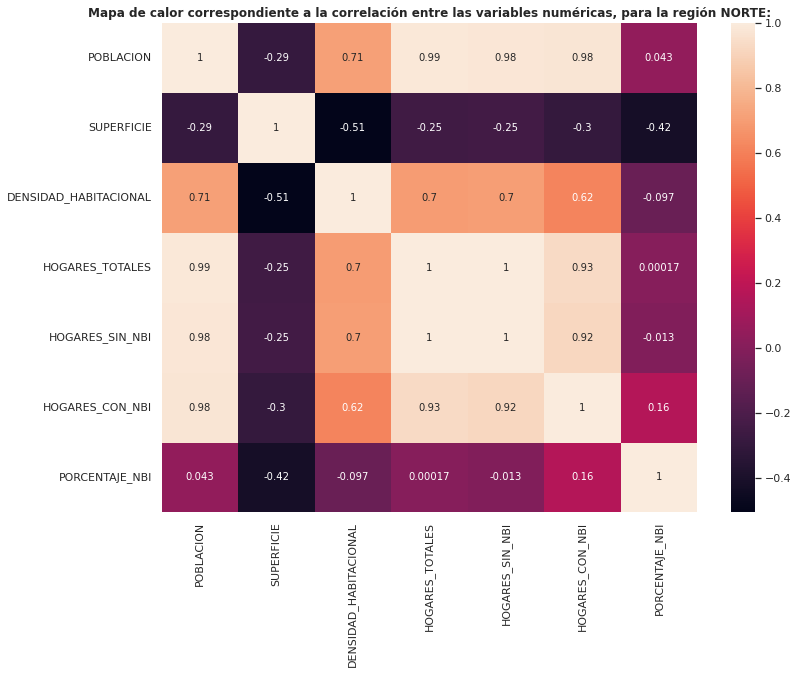

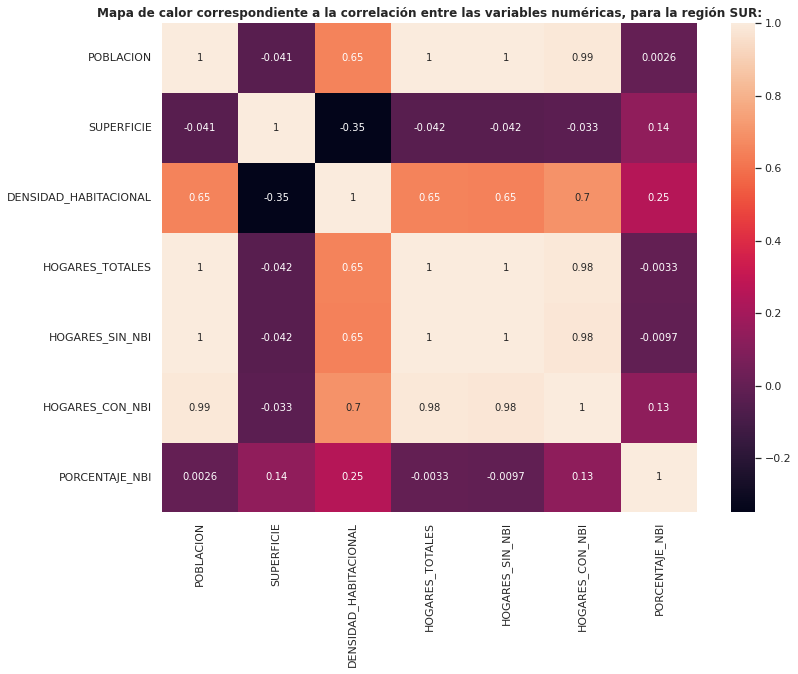

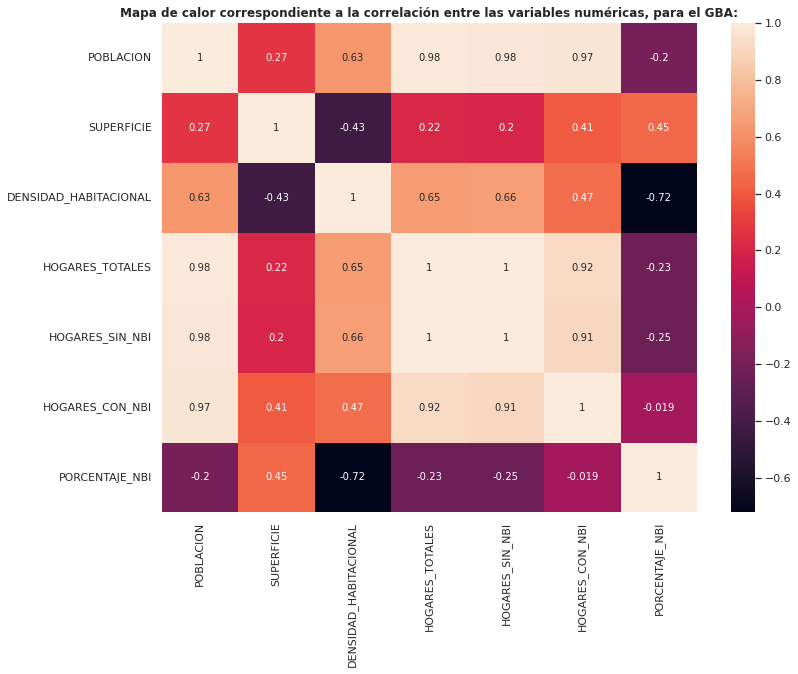

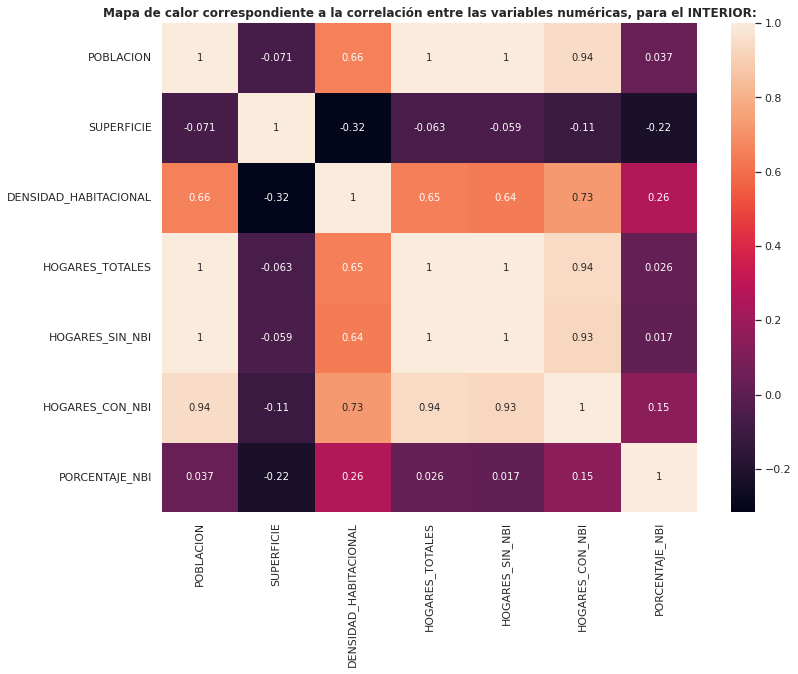

/tmp/xpython_28398/394860555.py:89: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  correlaciones=municipios[filtro1][filtro2].corr(numeric_only=True)


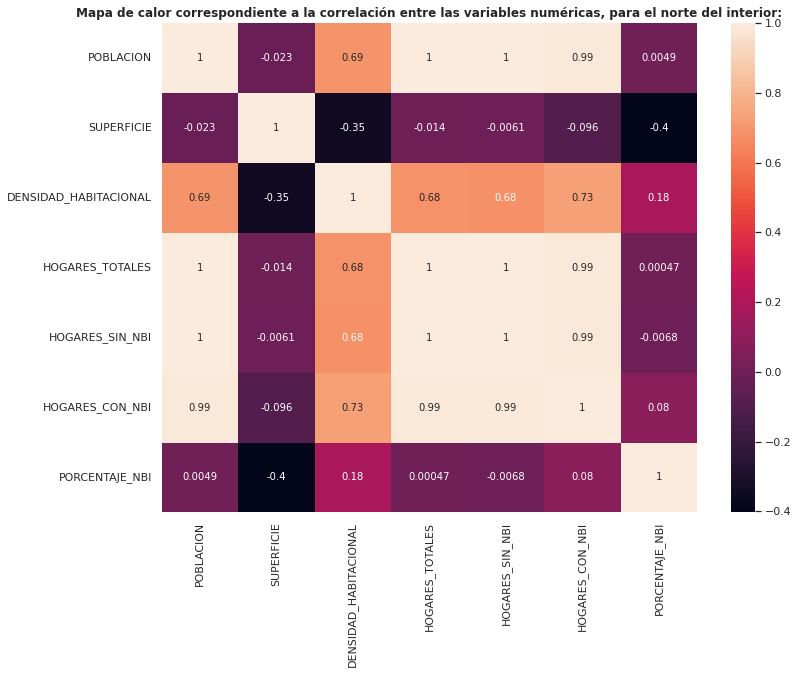

In [40]:
"""
En esta celda, obtendremos una tabla que muestra la correlación entre todas las variables numéricas
de nuestra base de datos, mostrando el coeficiente de correlación de Pearson.
Luego, mostramos un heatmap realizado en base a la tabla obtenida, que también muestra los valores,de forma
de ilustrar gráficamente y analiticamente dicho contenido
En este caso, de forma desagregada por región, pertenencia, y enfatizando el caso del norte del interior.
"""

#Definimos una lista con las regiones
regiones=['NORTE','SUR']

#Definimos una lista con las pertenencias
pertenencias=['GBA','INTERIOR']


#Con un for, recorremos la lista de regiones
for region in regiones:
    
    #Generamos un filtro, de tipo serie booleana de Pandas, de acuerdo a la región donde estamos parados en el for.
    filtro=municipios['REGION']==region
    
    #Obtenemos los coeficientes de correlación de Pearson entre todas las columnas
    #exclusivamente correspondientes a variables numéricas, del DataFrame de municipios,
    #al cual le aplicamos el filtro generado previamente
    correlaciones=municipios[filtro].corr(numeric_only=True)
    
    
    #Utilizamos la función 'heatmap' de SeaBorn para generar el mapa de calor correspondiente
    #para dichas correlaciones, y nos guardamos su resultado (de tipo Axes de Matplotlib), en 'ax'
    
    ax=sns.heatmap(correlaciones,                          #Le pasamos como primer argumento, la tabla de correlaciones obtenida
                xticklabels=correlaciones.columns.values,  #A los labels (etiquetas) de ambos ejes, le asignamos los nombres de las columnas
                yticklabels=correlaciones.columns.values,  #numericas del DataFrame de municipios
                annot=True,                                #Establecemos que se muestre el valor numérico del coeficiente de correlación de Pearson en cada celda del mapa
                annot_kws={'fontdict':{'fontsize':10}}     #Establecemos el tamaño de letra para dicho valor
    )
    
    #Aquí establecemos las medidas de nuestro gráfico, previamente almacenado en la variable 'ax'
    ax.figure.set_size_inches(12, 9)
    
    #Configuramos el texto, y su formato, para el título del gráfico
    plt.title(label="Mapa de calor correspondiente a la correlación entre las variables numéricas, para la región " + region + ":",fontweight='black', fontsize=12)
    
    #Mostramos el gráfico
    plt.show()
    

#Con un for, recorremos la lista de pertenencias    
for pertenencia in pertenencias:
    
    #Generamos un filtro, de tipo serie booleana de Pandas, de acuerdo a la pertenencia donde estamos parados en el for.
    filtro=municipios['PERTENENCIA']==pertenencia
    
    #Obtenemos los coeficientes de correlación de Pearson entre todas las columnas
    #exclusivamente correspondientes a variables numéricas, del DataFrame de municipios,
    #al cual le aplicamos el filtro generado previamente
    correlaciones=municipios[filtro].corr(numeric_only=True)
    
    
    #Utilizamos la función 'heatmap' de SeaBorn para generar el mapa de calor correspondiente
    #para dichas correlaciones, y nos guardamos su resultado (de tipo Axes de Matplotlib), en 'ax'
    
    ax=sns.heatmap(correlaciones,                          #Le pasamos como primer argumento, la tabla de correlaciones obtenida
                xticklabels=correlaciones.columns.values,  #A los labels (etiquetas) de ambos ejes, le asignamos los nombres de las columnas
                yticklabels=correlaciones.columns.values,  #numericas del DataFrame de municipios
                annot=True,                                #Establecemos que se muestre el valor numérico del coeficiente de correlación de Pearson en cada celda del mapa
                annot_kws={'fontdict':{'fontsize':10}}     #Establecemos el tamaño de letra para dicho valor
    )
    
    #Aquí establecemos las medidas de nuestro gráfico, previamente almacenado en la variable 'ax'
    ax.figure.set_size_inches(12, 9)
    
    #Configuramos el texto, y su formato, para el título del gráfico
    plt.title(label="Mapa de calor correspondiente a la correlación entre las variables numéricas, para el " + pertenencia + ":",fontweight='black', fontsize=12)
    
    #Mostramos el gráfico
    plt.show()


#Generamos un filtro, de tipo serie booleana de Pandas, para la categorización en la región norte
filtro1=municipios['REGION']=='NORTE'

#Generamos otro filtro, de tipo serie booleana de Pandas, para la categorización en la pertenencia al interior
filtro2=municipios['PERTENENCIA']=='INTERIOR'

#Obtenemos los coeficientes de correlación de Pearson entre todas las columnas
#exclusivamente correspondientes a variables numéricas, del DataFrame de municipios,
#al cual le aplicamos los dos filtros generados previamente
correlaciones=municipios[filtro1][filtro2].corr(numeric_only=True)


#Utilizamos la función 'heatmap' de SeaBorn para generar el mapa de calor correspondiente
#para dichas correlaciones, y nos guardamos su resultado (de tipo Axes de Matplotlib), en 'ax'

ax=sns.heatmap(correlaciones,                          #Le pasamos como primer argumento, la tabla de correlaciones obtenida
            xticklabels=correlaciones.columns.values,  #A los labels (etiquetas) de ambos ejes, le asignamos los nombres de las columnas
            yticklabels=correlaciones.columns.values,  #numericas del DataFrame de municipios
            annot=True,                                #Establecemos que se muestre el valor numérico del coeficiente de correlación de Pearson en cada celda del mapa
            annot_kws={'fontdict':{'fontsize':10}}     #Establecemos el tamaño de letra para dicho valor
)

#Aquí establecemos las medidas de nuestro gráfico, previamente almacenado en la variable 'ax'
ax.figure.set_size_inches(12, 9)

#Configuramos el texto, y su formato, para el título del gráfico
plt.title(label="Mapa de calor correspondiente a la correlación entre las variables numéricas, para el norte del interior:",fontweight='black', fontsize=12)

#Mostramos el gráfico
plt.show()

gc.collect()


In [41]:
"""
En todos los mapas de calor realizados, sea cual sea su desagregación, observamos una muy fuerte correlación positiva (casi absoluta) de la población
respecto de la cantidad total de hogares, de los hogares sin NBI, y muy ligeramente en menor medida, con la catidad de hogares con NBI.
También existe una importante correlación positiva entre esta variable y la densidad habitacional, en todos los casos (ligeramente superior en la región norte).
En cuanto a su correlación con la superficie, la misma es muy variable de acuerdo a su nivel de desagregación.
Este caso lo analizaremos en detalle, caso por caso.

En lo que respecta a su correlación con el porcentaje de NBI, la misma solo es relevante en el caso del GBA, siendo de signo negativo
y de módulo 0,2. Representa una correlación débil, pero significativa. Esta correlación es casi nula en los demas casos (con un módulo siempre
menor a 0,1)

En lo que concierne a la superficie respecto de la densidad habitacional, esta correlación es siempre negativa.
Es moderada en la casi todos  los casos, excepto en la desagregación correspondiente a la región norte , donde la misma es fuerte (de módulo 0.51).

En cuanto a la superficie con respecto a la cantidad total de hogares, esta es muy variable.
Es negativa y debil en la región norte, prácticamente nula en la región sur, positiva y debil en el GBA, prácticamente nula en el interior,
y también practicamente nula en el norte del interior. Esto se repite exactamente para la superficie respecto a los hogares sin NBI.

Sobre la superficie respecto a los hogares con NBI, esta es negativa y moderada en la región norte, practicamente nula en el sur,
positiva y moderada en el GBA, negativa y débil en el interior, y practicamente nula en el norte del interior.

Finalmente, en cuanto a la superficie respecto al porcentaje de NBI, la misma es negativa y moderada en la región norte,
positiva y débil en la región sur, positiva y moderada en el GBA, negativa y débil en el interior, y negativa y moderada en el norte del interior.

En cuanto a la densidad habitacional respecto de los hogares totales, la correlación es positiva y fuerte en todos los casos, al igual
que con los hogares sin NBI.
Respecto de la densidad habitacional respecto de los hogares con NBI, la correlación es positiva en todos los casos, y fuerte en la mayoría,
excepto en el GBA, donde es el único caso que es moderada.

En lo que respecta a la densidad habitacional respecto del porcentaje de NBI, tambien es muy variable respecto de su nivel de desagregación.
Analizaremos en detalle estas dos variables, caso por caso.

Respecto a la correlación de los hogares totales respecto a los hogares sin NBI, la misma es positiva y prácticamente absoluta en todos los casos,
siendo apenas menor en lo que respecta a la correlación con los hogares con NBI, tambien en todos los casos.

Es prácticamente nula respecto al porcentaje NBI en la mayoría de los casos, excepto en el GBA, donde es negativa y débil.

Entre los hogares sin NBI y los hogares con NBI, la correlación es fuertemente positiva en todos los casos, mientras que con respecto al
porcentaje de NBI es  variable: negativa y débil en el GBA, y prácticamente nula en el resto de los casos.

Finalmente, la correlación entre hogares con NBI, y el porcentaje de NBI, la correlación es positiva y débil tanto en el sur como en el norte,
prácticamente nula en el GBA, nuevamente positiva y débil en el interior, y prácticamente nula en el norte del interior.


Hechas estas aclaraciones, pondremos ahora el énfasis entre el análisis de estas variables de forma conjunta, con su correspondiente nivel de desagregación:
-Población y Superficie
-Densidad habitacional y %NBI
""";

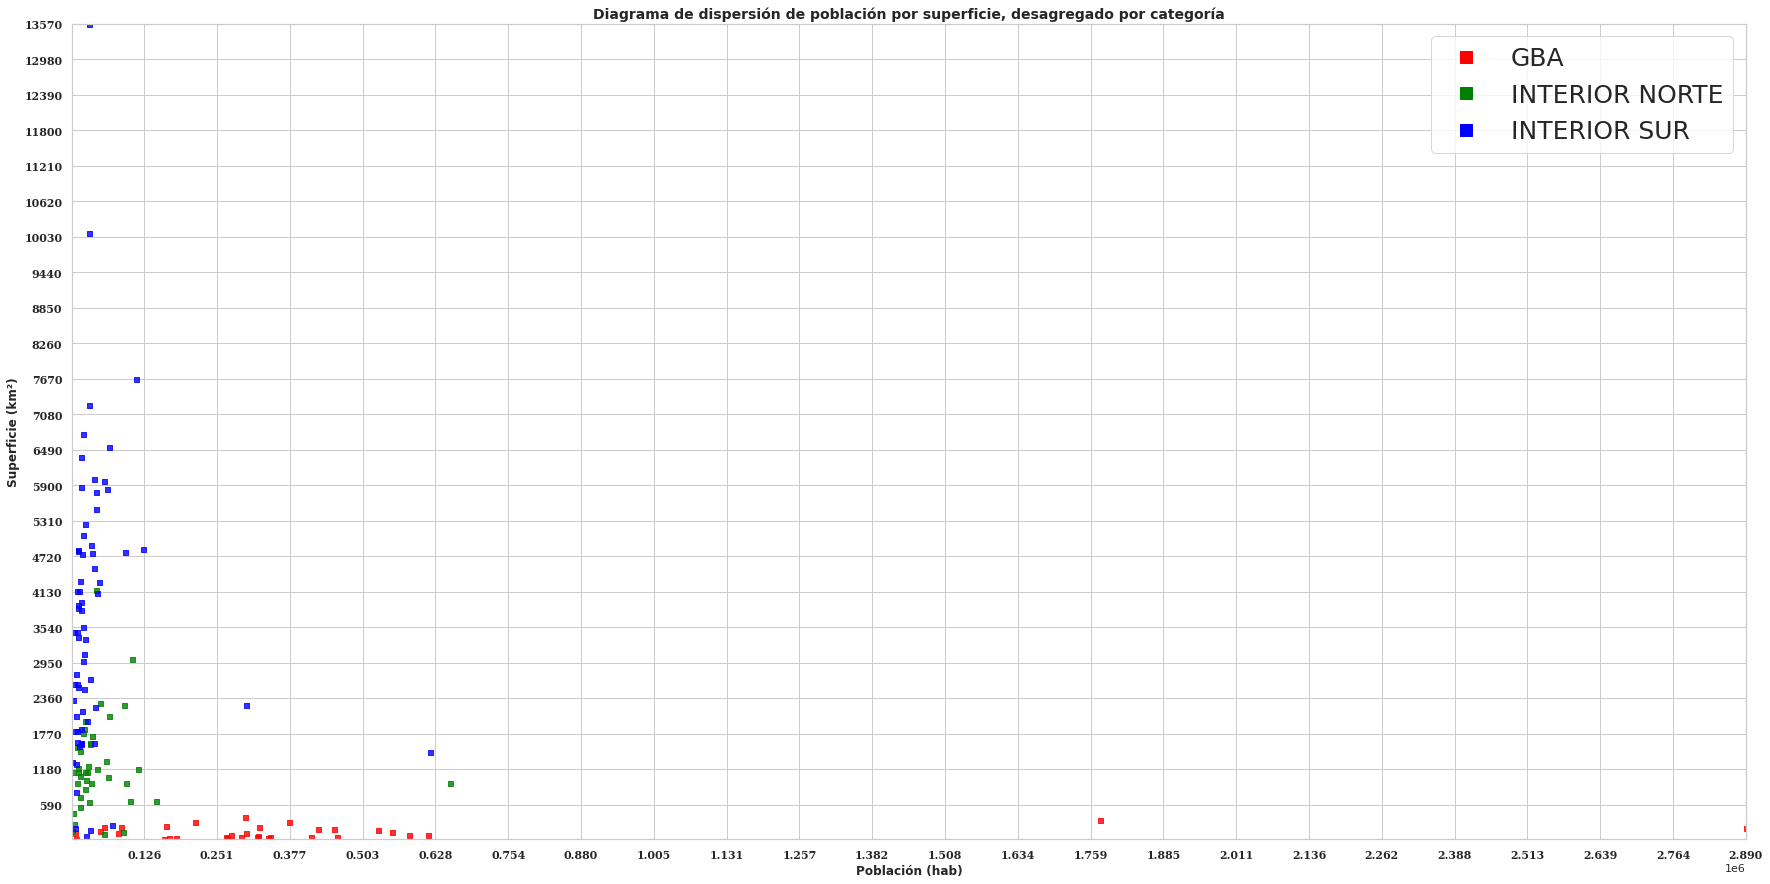

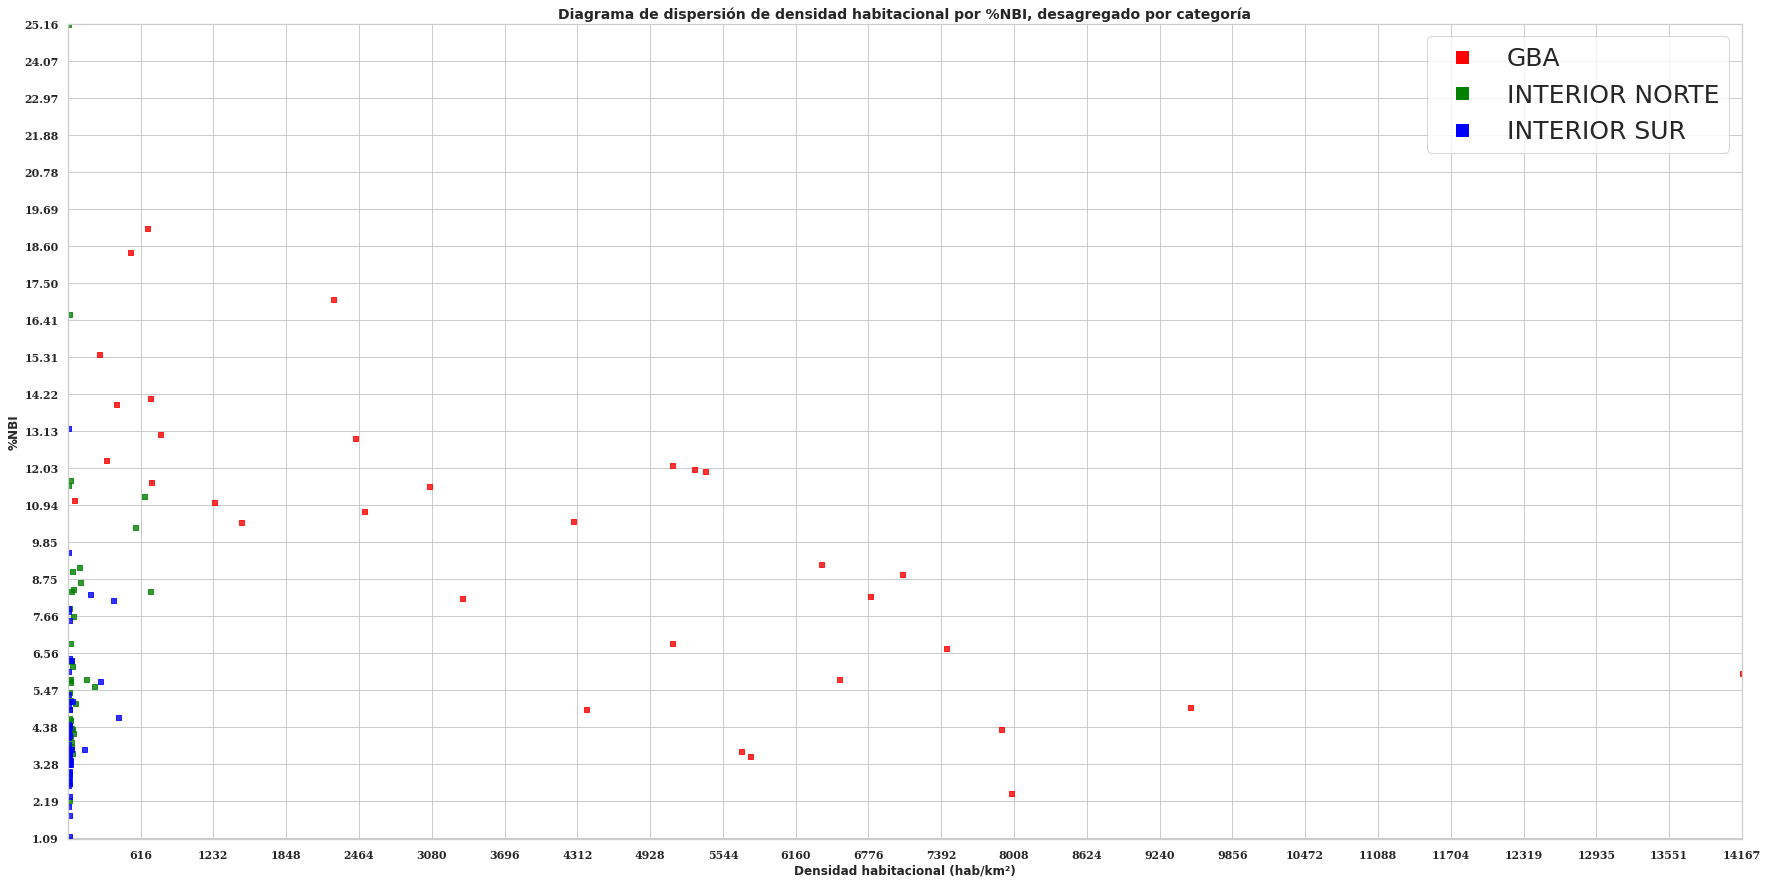

In [42]:
"""
En esta celda, estudiaremos gráficamente de forma bivariada, las siguientes variables de forma conjunta:
-Poblacion y Superficie
-Densidad habitacional y %NBI

Para ello, mostraremos un diagrama de dispersión, en este caso, con su correspondiente nivel de desagregación
"""

#Definimos una lista con las categorías a desagregar, fusionadas desde las originales de región y pertenencia
categorias=['GBA','INTERIOR NORTE', 'INTERIOR SUR']

#Definimos un diccionario, con los colores de los marcadores asociados a cada categoría
colores={'GBA':'red', 'INTERIOR NORTE':'green', 'INTERIOR SUR':'blue'}

#Definimos el estilo de fuente a mostrar para los indicadores
#de los valores, mostrados en ambos gráficos
fuente=fnt_mng.FontProperties(family=['serif'],weight=1000,size=11)


#Primero, procedemos a realizar el diagrama de dispersión de las variables "Población" y "Superficie", desagregado por categoría

#Definimos una lista, inicialmente vacía, para la leyenda
leyenda=[]

#Recorremos la lista de categorías con un for
for categoria in categorias:
    #Construimos un filtro, que constituye una serie booleana de Pandas, a partir
    #del valor de la categoría donde estamos parados en el for, del nuevo DataFrame 'municipios_cat'
    filtro=municipios_cat['CATEGORIA']==categoria
    
    #Nos guardamos las Series de Pandas correspondientes a las columnas de las variables mencionadas del nuevo DataFrame 'municipios_cat'
    #en las variables'x' e 'y', aplicandoles el filtro construido previamente para su desagregación por categoría
    x=municipios_cat['POBLACION'][filtro]
    y=municipios_cat['SUPERFICIE'][filtro]

    #Configuramos el estilo del gráfico en 'whitegrid', el cual
    #nos mostrará una grilla sobre fondo blanco, sobre los valores de los ticks
    sns.set_style(style='whitegrid')
    
    #Utilizamos la función 'regplot' de SeaBorn para generar el gráfico de dispersion  con la nube de puntos correspondiente
    #para estas dos variables, y nos guardamos su resultado (de tipo Axes de Matplotlib), en 'ax'
    
    ax=sns.regplot(x=x,                         #Al atributo 'x', le asignamos el valor que tenemos almacenado en la variable 'x', correspondiente a la columna de población
                    y=y,                        #Al atributo 'y', le asignamos el valor que tenemos almacenado en la variable 'y', correspondiente a la columna de superficie
                    fit_reg=False,              #En este caso, no dibujamos la recta de regresión
                    marker='s',                 #Establecemos los marcadores de puntos como cuadrados
                    color=colores[categoria],   #Establecemos el color de los marcadores, de acuerdo a la categoría donde estamos parados en el for
                    scatter_kws={'s':25})       #Establecemos el tamaño de los marcadores con el valor 25
    
    
    #Agregamos el color y el diseño correspondiente a la categoría actual, a la lista 'leyenda'
    leyenda.append(mlines.Line2D([],[],color=colores[categoria], label=categoria, marker='s',linewidth=0, markersize=12))
    
    #Aquí establecemos las medidas de nuestro gráfico, previamente almacenado en la variable 'ax'
    ax.figure.set_size_inches(30, 15)


    #Sobre el Axes de Matplotlib que nos guardamos
    ax.set( 
            xticks=intervalos(municipios_cat.POBLACION,AGRUPAMIENTO*2)[1],              #Los ticks del eje X corresponderan a la lista de divisiones devueltas por la función 'intervalos' para 
                                                                                        #la variable población, en este caso, con el doble de divisiones que en los histogramas
            yticks=intervalos(municipios_cat.SUPERFICIE,AGRUPAMIENTO*2)[1],             #Los ticks del eje Y corresponderan a la lista de divisiones devueltas por la función 'intervalos' para 
                                                                                        #la variable superficie, en este caso, con el doble de divisiones que en los histogramas
            xlim=(municipios_cat.POBLACION.min() , municipios_cat.POBLACION.max()),     #Configuramos los limites del eje X entre el mínimo y el máximo valor de la variable población
            ylim=(municipios_cat.SUPERFICIE.min() , municipios_cat.SUPERFICIE.max()),   #Configuramos los limites del eje Y entre el mínimo y el máximo valor de la variable superficie
            
        )

   
#Configuramos el texto, y su formato, para la etiqueta del eje X
ax.set_xlabel("Población (hab)",fontweight='bold',fontsize=12)

#Configuramos el texto, y su formato, para la etiqueta del eje Y
ax.set_ylabel("Superficie (km²)",fontweight='bold',fontsize=12)

#Configuramos el formato para los valores de los ticks de ambos ejes
plt.xticks(fontproperties=fuente)
plt.yticks(fontproperties=fuente)

#Configuramos el texto, y su formato, para el título del gráfico
plt.title(label="Diagrama de dispersión de población por superficie, desagregado por categoría",fontweight='black', fontsize=14)
    
#Mostramos la leyenda, a partir de la lista generada previamente y con el tamaño correspondiente
plt.legend(handles=leyenda,prop={'size': 25})

#Mostramos por pantalla el gráfico obtenido
plt.show()

#Realizamos un espaciado vertical
print("\n\n")



#Luego, procedemos a realizar el diagrama de dispersión de las variables "Densidad Habitacional" y "%NBI", desagregado por categoría



#Definimos una lista, inicialmente vacía, para la leyenda
leyenda=[]

#Recorremos la lista de categorías con un for
for categoria in categorias:
    
    #Construimos un filtro, que constituye una serie booleana de Pandas, a partir
    #del valor de la categoría donde estamos parados en el for, del nuevo DataFrame 'municipios_cat'
    filtro=municipios_cat['CATEGORIA']==categoria

    #Nos guardamos las Series de Pandas correspondientes a las columnas de las variables mencionadas del nuevo DataFrame 'municipios_cat'
    #en las variables'x' e 'y', aplicandoles el filtro construido previamente para su desagregación por categoría
    x=municipios_cat['DENSIDAD_HABITACIONAL'][filtro]
    y=municipios_cat['PORCENTAJE_NBI'][filtro]


    #Configuramos el estilo del gráfico en 'whitegrid', el cual
    #nos mostrará una grilla sobre fondo blanco, sobre los valores de los ticks
    sns.set_style(style='whitegrid')
    
    #Utilizamos la función 'regplot' de SeaBorn para generar el gráfico de dispersion  con la nube de puntos correspondiente
    #para estas dos variables, y nos guardamos su resultado (de tipo Axes de Matplotlib), en 'ax'
    
    ax=sns.regplot(x=x,                         #Al atributo 'x', le asignamos el valor que tenemos almacenado en la variable 'x', correspondiente a la columna de densidad habitacional
                   y=y,                         #Al atributo 'y', le asignamos el valor que tenemos almacenado en la variable 'y', correspondiente a la columna de %NBI
                   fit_reg=False,               #En este caso, no dibujamos la recta de regresión
                   marker='s',                  #Establecemos los marcadores de puntos como cuadrados
                   color=colores[categoria],    #Establecemos el color de los marcadores, de acuerdo a la categoría donde estamos parados en el for
                   scatter_kws={'s':25})        #Establecemos el tamaño de los marcadores con el valor 25
    
    
    #Agregamos el color y el diseño correspondiente a la categoría actual, a la lista 'leyenda'
    leyenda.append(mlines.Line2D([],[],color=colores[categoria], label=categoria, marker='s',linewidth=0, markersize=12))
    
    #Aquí establecemos las medidas de nuestro gráfico, previamente almacenado en la variable 'ax'
    ax.figure.set_size_inches(30, 15)


    #Sobre el Axes de Matplotlib que nos guardamos:
    ax.set( 
            xticks=intervalos(municipios_cat.DENSIDAD_HABITACIONAL,AGRUPAMIENTO*2)[1],                        #Los ticks del eje X corresponderan a la lista de divisiones devueltas por la función 'intervalos' para 
                                                                                                              #la variable densidad habitacional, en este caso, con el doble de divisiones que en los histogramas
            yticks=intervalos(municipios_cat.PORCENTAJE_NBI,AGRUPAMIENTO*2)[1],                               #Los ticks del eje Y corresponderan a la lista de divisiones devueltas por la función 'intervalos' para 
                                                                                                              #la variable %NBI, en este caso, con el doble de divisiones que en los histogramas
            xlim=(municipios_cat.DENSIDAD_HABITACIONAL.min() , municipios_cat.DENSIDAD_HABITACIONAL.max()),   #Configuramos los limites del eje X entre el mínimo y el máximo valor de la variable densidad habitacional
            ylim=(municipios_cat.PORCENTAJE_NBI.min() , municipios_cat.PORCENTAJE_NBI.max()),                 #Configuramos los limites del eje Y entre el mínimo y el máximo valor de la variable %NBI
           
        )
    
#Configuramos el texto, y su formato, para la etiqueta del eje X
ax.set_xlabel("Densidad habitacional (hab/km²)",fontweight='bold',fontsize=12)

#Configuramos el texto, y su formato, para la etiqueta del eje Y
ax.set_ylabel("%NBI",fontweight='bold',fontsize=12)

#Configuramos el formato para los valores de los ticks de ambos ejes
plt.xticks(fontproperties=fuente)
plt.yticks(fontproperties=fuente)

#Configuramos el texto, y su formato, para el título del gráfico
plt.title(label="Diagrama de dispersión de densidad habitacional por %NBI, desagregado por categoría",fontweight='black', fontsize=14)
    

#Mostramos la leyenda, a partir de la lista generada previamente y con el tamaño correspondiente
plt.legend(handles=leyenda,prop={'size': 25})

#Mostramos por pantalla el gráfico obtenido
plt.show()



gc.collect()


In [43]:
"""
En esta celda, estudiaremos analíticamente de forma bivariada, las siguientes variables de forma conjunta:
- Poblacion y Superficie
- Densidad habitacional y %NBI

En este caso, de forma desagregada por región

Para ello, calcularemos los siguientes parámetros, que miden la variablidad conjunta entre las variables mencionadas:
- Covarianza
- Coeficiente de regresión lineal (pendiente de la recta de regresión)
- Coeficiente de correlación de Pearson

Para ello, utilizaremos el siguiente método
- En todos los casos 'x', es la columna correspondiente a la variable explicativa,
  e 'y' es la columna correspondiente a la variable explicada. Ambos son Series de Pandas
  
- La covarianza la obtenemos con la función 'cov' de Pandas, con la forma x.cov(y), equivalente a y.cov(x)
  Este valir nos indica el grado de variación conjunta de dichas variables respecto a sus medias
  
- El coeficiente de regresión lineal, lo obtenemos mediante la siguiente fórmula:
  M = Cov(X,Y) / Var(X) = Cov(X,Y) / Desv²(X)
  Este valor nos da información acerca del grado de dicha regresión
  
- El coeficiente de correlación de Pearson, lo obtenemos mediante la siguiente fórmula:
  P = Cov(X,Y) / (Desv(X)*Desv(Y))
  Este valor nos da información acerca de la intensidad de dicha regresión
  
"""

#Definimos una lista para las regiones
regiones=["NORTE","SUR"]


#Creamos un diccionario, inicialmente vacío, que contendrá las tablas bivariadas, desagregadas por región
tablas_bi_reg={}

#Recorremos las regiones con un for
for region in regiones:
    
    #Creamos una serie de Pandas booleana, la cual consituirá el filtro para las columnas analizadas con el nivel
    #de desagregación correspondiente.
    filtro=municipios['REGION'] == region
    
    #Calculamos la covarianza de la población respecto de la superficie, aplicandole a las columnas el filtro correspondiente:
    cov_pob_sup=municipios.POBLACION[filtro].cov(municipios.SUPERFICIE[filtro])

    #Calculamos el coeficiente de regresión lineal de la población respecto de la superficie, aplicandole a las columnas el filtro correspondiente:
    reg_pob_sup=cov_pob_sup/(municipios.POBLACION[filtro].std()**2)

    #Calculamos el coeficiente de correlación de Pearson de la población respecto de la superficie, aplicandole a las columnas el filtro correspondiente:
    pearson_pob_sup=cov_pob_sup/(municipios.POBLACION[filtro].std() *municipios.SUPERFICIE[filtro].std() )
    
    """
    
    #Con la función linregress de scipy, podemos corroborar los valores calculados previamente
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=municipios.POBLACION[filtro] ,y=municipios.SUPERFICIE[filtro])
    print(slope.round(4))
    print(r_value.round(4))
    print("\n\n")
    """;

    #Calculamos la covarianza de la densidad habitacional respecto al porcentaje de viviendas con NBI, aplicandole a las columnas el filtro correspondiente:
    cov_dens_nbi=municipios.DENSIDAD_HABITACIONAL[filtro].cov(municipios.PORCENTAJE_NBI[filtro])

    #Calculamos el coeficiente de regresión lineal de la densidad habitacional respecto al porcentaje de viviendas con NBI, aplicandole a las columnas el filtro correspondiente:
    reg_dens_nbi=cov_dens_nbi/(municipios.DENSIDAD_HABITACIONAL[filtro].std()**2)

    #Calculamos el coeficiente de correlación de Pearson de la p densidad habitacional respecto al porcentaje de viviendas con NBI, aplicandole a las columnas el filtro correspondiente:
    pearson_dens_nbi=cov_dens_nbi/(municipios.DENSIDAD_HABITACIONAL[filtro].std() *municipios.PORCENTAJE_NBI[filtro].std() )
    
    """
    #Con la función linregress de scipy, podemos corroborar los valores calculados previamente
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=municipios.DENSIDAD_HABITACIONAL[filtro],y=municipios.PORCENTAJE_NBI[filtro])
    print(slope.round(4))
    print(r_value.round(4))
    print("\n\n")
    
    """;

    
    #A partir de los valores calculados, construimos nuestra tabla de valores de análisis bivariado con la correspondiente desagregación por región
    
    #Para ello, creamos un DataFrame de pandas, que guardamos en el diccionario correspondiente
    
    tablas_bi_reg[region]=pd.DataFrame([[cov_pob_sup,reg_pob_sup,pearson_pob_sup],      #Le pasamos una lista bidimensional, la cual contendrá, en cada una de las listas de nivel inferior,
                                        [cov_dens_nbi,reg_dens_nbi,pearson_dens_nbi]],  #los valores calculados correspondientes a cada par de variables analizadas de forma conjunta
                                columns=['cov', 'reg', 'pearson'],                      #Asignamos los nombres cortos a las columnas (correspondientes al parámetro calculado)
                                index=['POB/SUP', 'DENS/NBI']                           #Asignamos los nombres cortos a las filas (correspondientes al par de variables analizadas de forma conjunta)
                                )
    
    #Finalmente, podemos mostrar todos los valores que necesitamos en forma de tabla, con el formato correspondiente
    #obtenido con la función 'formatear_tabla_bi'
    print("Valores de análisis bivariado correspondientes a la región " + region  + ":")
    formatear_tabla_bi(tablas_bi_reg[region])
    
gc.collect()



Valores de análisis bivariado correspondientes a la región NORTE:


Valores de análisis bivariado correspondientes a la región SUR:


In [44]:
"""
En esta celda, estudiaremos analíticamente de forma bivariada, las siguientes variables de forma conjunta:
- Poblacion y Superficie
- Densidad habitacional y %NBI

En este caso, de forma desagregada por pertenencia

Para ello, calcularemos los siguientes parámetros, que miden la variablidad conjunta entre las variables mencionadas:
- Covarianza
- Coeficiente de regresión lineal (pendiente de la recta de regresión)
- Coeficiente de correlación de Pearson

Para ello, utilizaremos el siguiente método
- En todos los casos 'x', es la columna correspondiente a la variable explicativa,
  e 'y' es la columna correspondiente a la variable explicada. Ambos son Series de Pandas
  
- La covarianza la obtenemos con la función 'cov' de Pandas, con la forma x.cov(y), equivalente a y.cov(x)
  Este valir nos indica el grado de variación conjunta de dichas variables respecto a sus medias
  
- El coeficiente de regresión lineal, lo obtenemos mediante la siguiente fórmula:
  M = Cov(X,Y) / Var(X) = Cov(X,Y) / Desv²(X)
  Este valor nos da información acerca del grado de dicha regresión
  
- El coeficiente de correlación de Pearson, lo obtenemos mediante la siguiente fórmula:
  P = Cov(X,Y) / (Desv(X)*Desv(Y))
  Este valor nos da información acerca de la intensidad de dicha regresión
  
"""


#Definimos una lista para las pertenencias
pertenencias=["GBA","INTERIOR"]

#Creamos un diccionario, inicialmente vacío, que contendrá las tablas bivariadas, desagregadas por pertenencia
tablas_bi_pert={}

#Recorremos las pertenencias con un for
for pertenencia in pertenencias:
    
    #Creamos una serie de Pandas booleana, la cual consituirá el filtro para las columnas analizadas con el nivel
    #de desagregación correspondiente.
    filtro=municipios['PERTENENCIA'] == pertenencia
    
    #Calculamos la covarianza de la población respecto de la superficie, aplicandole a las columnas el filtro correspondiente:
    cov_pob_sup=municipios.POBLACION[filtro].cov(municipios.SUPERFICIE[filtro])

    #Calculamos el coeficiente de regresión lineal de la población respecto de la superficie, aplicandole a las columnas el filtro correspondiente:
    reg_pob_sup=cov_pob_sup/(municipios.POBLACION[filtro].std()**2)

    #Calculamos el coeficiente de correlación de Pearson de la población respecto de la superficie, aplicandole a las columnas el filtro correspondiente:
    pearson_pob_sup=cov_pob_sup/(municipios.POBLACION[filtro].std() *municipios.SUPERFICIE[filtro].std() )
    
    
    """
    #Con la función linregress de scipy, podemos corroborar los valores calculados previamente
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=municipios.POBLACION[filtro] ,y=municipios.SUPERFICIE[filtro])
    print(slope.round(4))
    print(r_value.round(4))
    print("\n\n")
    
    """;
    
    #Calculamos la covarianza de la densidad habitacional respecto al porcentaje de viviendas con NBI, aplicandole a las columnas el filtro correspondiente:
    cov_dens_nbi=municipios.DENSIDAD_HABITACIONAL[filtro].cov(municipios.PORCENTAJE_NBI[filtro])

    #Calculamos el coeficiente de regresión lineal de la densidad habitacional respecto al porcentaje de viviendas con NBI,  aplicandole a las columnas el filtro correspondiente:
    reg_dens_nbi=cov_dens_nbi/(municipios.DENSIDAD_HABITACIONAL[filtro].std()**2)

    #Calculamos el coeficiente de correlación de Pearson de la p densidad habitacional respecto al porcentaje de viviendas con NBI, aplicandole a las columnas el filtro correspondiente:
    pearson_dens_nbi=cov_dens_nbi/(municipios.DENSIDAD_HABITACIONAL[filtro].std() *municipios.PORCENTAJE_NBI[filtro].std() )
    
    
   
    """
    #Con la función linregress de scipy, podemos corroborar los valores calculados previamente
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=municipios.DENSIDAD_HABITACIONAL[filtro],y=municipios.PORCENTAJE_NBI[filtro])
    print(slope.round(4))
    print(r_value.round(4))
    print("\n\n")
    """;
    
    #A partir de los valores calculados, construimos nuestra tabla de valores de análisis bivariado con la correspondiente desagregación por pertenencia
    
    #Para ello, creamos un DataFrame de pandas, que guardamos en el diccionario correspondiente

    tablas_bi_pert[pertenencia]=pd.DataFrame([[cov_pob_sup,reg_pob_sup,pearson_pob_sup],      #Le pasamos una lista bidimensional, la cual contendrá, en cada una de las listas de nivel inferior,
                                              [cov_dens_nbi,reg_dens_nbi,pearson_dens_nbi]],  #los valores calculados correspondientes a cada par de variables analizadas de forma conjunta
                                columns=['cov', 'reg', 'pearson'],                            #Asignamos los nombres cortos a las columnas (correspondientes al parámetro calculado)
                                index=['POB/SUP', 'DENS/NBI']                                 #Asignamos los nombres cortos a las filas (correspondientes al par de variables analizadas de forma conjunta)
                                )
    
    #Finalmente, podemos mostrar todos los valores que necesitamos en forma de tabla, con el formato correspondiente
    #obtenido con la función 'formatear_tabla_bi'
    print("Valores de análisis bivariado correspondientes al " + pertenencia  + ":")
    formatear_tabla_bi(tablas_bi_pert[pertenencia])
    
gc.collect()



Valores de análisis bivariado correspondientes al GBA:


Valores de análisis bivariado correspondientes al INTERIOR:


In [45]:
"""
En esta celda, estudiaremos analíticamente de forma bivariada, las siguientes variables de forma conjunta:
- Poblacion y Superficie
  Este valor nos da información acerca del grado de dicha regresión
  
- Densidad habitacional y %NBI

En este caso, de forma desagregada por correspondiente al norte del interior

Para ello, calcularemos los siguientes parámetros, que miden la variablidad conjunta entre las variables mencionadas:
- Covarianza
- Coeficiente de regresión lineal (pendiente de la recta de regresión)
- Coeficiente de correlación de Pearson

Para ello, utilizaremos el siguiente método
- En todos los casos 'x', es la columna correspondiente a la variable explicativa,
  e 'y' es la columna correspondiente a la variable explicada. Ambos son Series de Pandas
  
- La covarianza la obtenemos con la función 'cov' de Pandas, con la forma x.cov(y), equivalente a y.cov(x)
  Este valir nos indica el grado de variación conjunta de dichas variables respecto a sus medias
  
- El coeficiente de regresión lineal, lo obtenemos mediante la siguiente fórmula:
  M = Cov(X,Y) / Var(X) = Cov(X,Y) / Desv²(X)
  Este valor nos da información acerca del grado de dicha regresión
  
- El coeficiente de correlación de Pearson, lo obtenemos mediante la siguiente fórmula:
  P = Cov(X,Y) / (Desv(X)*Desv(Y))
  Este valor nos da información acerca de la intensidad de dicha regresión
  
"""

#Creamos una serie de Pandas booleana, la cual consituirá el primer filtro para las columnas analizadas con el nivel
#de desagregación correspondiente (región norte).
filtro1=municipios['REGION'] == 'NORTE'

#Creamos una serie de Pandas booleana, la cual consituirá el segundo filtro para las columnas analizadas con el nivel
#de desagregación correspondiente (pertenencia al interior).
filtro2=municipios['PERTENENCIA'] == 'INTERIOR'


#Calculamos la covarianza de la población respecto de la superficie, aplicandole a las columnas ambos filtros:
cov_pob_sup=municipios.POBLACION[filtro1][filtro2].cov(municipios.SUPERFICIE[filtro1][filtro2])

#Calculamos el coeficiente de regresión lineal de la población respecto de la superficie,  aplicandole a las columnas ambos filtros:
reg_pob_sup=cov_pob_sup/(municipios.POBLACION[filtro1][filtro2].std()**2)

#Calculamos el coeficiente de correlación de Pearson de la población respecto de la superficie,  aplicandole a las columnas ambos filtros:
pearson_pob_sup=cov_pob_sup/(municipios.POBLACION[filtro1][filtro2].std() *municipios.SUPERFICIE[filtro1][filtro2].std() )

"""
#Mostramos dichos valores por pantalla:
print("Covarianza entre Población y superficie en la región " + region + ": "  + str(cov_pob_sup.round(4)))
print("Coeficiente de regresión lineal entre Población y superficie en la región " + region + ": "  + str(reg_pob_sup.round(4)))
print("Coeficiente de correlación de Pearson entre Población y superficie en la región " + region + ": "  + str(pearson_pob_sup.round(4)))
print("\n")


#Con la función linregress de scipy, podemos corroborar los valores calculados previamente
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=municipios.POBLACION[filtro1][filtro2] ,y=municipios.SUPERFICIE[filtro1][filtro2])
print(slope.round(4))
print(r_value.round(4))
print("\n\n")
""";

#Calculamos la covarianza de la densidad habitacional respecto al porcentaje de viviendas con NBI, aplicandole a las columnas ambos filtros:
cov_dens_nbi=municipios.DENSIDAD_HABITACIONAL[filtro1][filtro2].cov(municipios.PORCENTAJE_NBI[filtro1][filtro2])

#Calculamos el coeficiente de regresión lineal de la densidad habitacional respecto al porcentaje de viviendas con NBI,  aplicandole a las columnas ambos filtros:
reg_dens_nbi=cov_dens_nbi/(municipios.DENSIDAD_HABITACIONAL[filtro1][filtro2].std()**2)

#Calculamos el coeficiente de correlación de Pearson de la p densidad habitacional respecto al porcentaje de viviendas con NBI,  aplicandole a las columnas ambos filtros:
pearson_dens_nbi=cov_dens_nbi/(municipios.DENSIDAD_HABITACIONAL[filtro1][filtro2].std() *municipios.PORCENTAJE_NBI[filtro1][filtro2].std() )

"""

#Con la función linregress de scipy, podemos corroborar los valores calculados previamente
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=municipios.DENSIDAD_HABITACIONAL[filtro1][filtro2],y=municipios.PORCENTAJE_NBI[filtro1][filtro2])
print(slope.round(4))
print(r_value.round(4))
print("\n\n")

""";

#A partir de los valores calculados, construimos nuestra tabla de valores de análisis bivariado con la correspondiente desagregación, del norte del interior
    
#Para ello, creamos un DataFrame de pandas, que guardamos en el una variable correspondiente

    
tabla_bi_int_norte=pd.DataFrame([[cov_pob_sup,reg_pob_sup,pearson_pob_sup],     #Le pasamos una lista bidimensional, la cual contendrá, en cada una de las listas de nivel inferior,
                                 [cov_dens_nbi,reg_dens_nbi,pearson_dens_nbi]], #los valores calculados correspondientes a cada par de variables analizadas de forma conjunta
                            columns=['cov', 'reg', 'pearson'],                  #Asignamos los nombres cortos a las columnas (correspondientes al parámetro calculado)
                            index=['POB/SUP', 'DENS/NBI']                       #Asignamos los nombres cortos a las filas (correspondientes al par de variables analizadas de forma conjunta)
                            )




#Finalmente, podemos mostrar todos los valores que necesitamos en forma de tabla, con el formato correspondiente
#obtenido con la función 'formatear_tabla_bi'
print("Valores de análisis bivariado correspondientes al norte del interior:")
formatear_tabla_bi(tabla_bi_int_norte)

gc.collect()



Valores de análisis bivariado correspondientes al norte del interior:


In [46]:
"""
En esta celda, construiremos un mapeo de todas las tablas bi, de acuerdo a su desagregación

"""

tablas_bivariadas={'INTERIOR': 
                        {'NORTE':tabla_bi_int_norte,
                        'SUR':tablas_bi_reg['SUR'],
                        'TOTAL':tablas_bi_pert['INTERIOR']},
                    'GBA': 
                        {'NORTE':tablas_bi_pert['GBA'],
                        'SUR':None,
                        'TOTAL':tablas_bi_pert['GBA']},
                    'TOTAL': 
                        {'NORTE':tablas_bi_reg['NORTE'],
                        'SUR': tablas_bi_reg['SUR'],
                        'TOTAL':tabla_bi},
                   }
"""
display(tablas_bivariadas['TOTAL']['TOTAL'])
display(tablas_bivariadas['TOTAL']['NORTE'])
display(tablas_bivariadas['TOTAL']['SUR'])
display(tablas_bivariadas['GBA']['TOTAL'])
display(tablas_bivariadas['INTERIOR']['TOTAL'])
display(tablas_bivariadas['INTERIOR']['NORTE'])
""";

In [11]:
"""
En esta celda, ordenamos los municipios de acuerdo a los criterios que necesitamos.
Los índices de los registros seguirán correspondiendo al orden original (por nombre del municipio en orden alfabético, de menor a mayor)

""";
display(                              #Mostramos la tabla ordenada con la función 'display'
    
    #Utilizamos la función 'sort_values' para realizar el ordenamiento.
    #De esta forma, fácilmente podemos modificar los valores que le pasamos a los atributos de esta función, de modo que podremos rápidamente,
    #obtener un ordenamiento realizado en base a lo que necesitamos en determinado momento.
    
    municipios.sort_values(   
        by=['REGION',                 #Como primer criterio para el ordenamiento, establecemos la región
            'PERTENENCIA',            #Como segundo criterio, la pertenencia
            'POBLACION'],             #En este caso, como tercer criterio, la población.
                                      #Modificando esta última línea, podemos facilmente realizar el ordenamiento de acuerdo a cualquier otra variable cuantitativa
        ascending=[False,             #Establecemos que, para la región, se ordenen los registros de mayor a menor (en este caso, en orden alfabético)
                   True,              #Establecemos que, para la pertenencia, se ordenen los registros de menor a mayor (en este caso, también en orden alfabético)
                   False]             #Finalmente, establecemos que, para la población (o cualquier variable cuantitativa que elijamos), se ordenen los registros de mayor a menor (en este caso, numericamente)
    )    
)


NOMBRE REGION PERTENENCIA  POBLACION  SUPERFICIE  \
54             GENERAL PUEYRREDON    SUR    INTERIOR     618989     1460.74   
8                    BAHÍA BLANCA    SUR    INTERIOR     301572     2247.49   
127                        TANDIL    SUR    INTERIOR     123871     4836.53   
94                      OLAVARRÍA    SUR    INTERIOR     111708     7658.78   
92                       NECOCHEA    SUR    INTERIOR      92933     4791.57   
66                       LA COSTA    SUR    INTERIOR      69633      252.63   
7                            AZUL    SUR    INTERIOR      65280     6540.25   
30   CORONEL DE MARINA L. ROSALES    SUR    INTERIOR      62152     5831.50   
133                  TRES ARROYOS    SUR    INTERIOR      57110     5962.88   
93                     9 DE JULIO    SUR    INTERIOR      47722     4284.05   
9                        BALCARCE    SUR    INTERIOR      43823     4115.27   
132               TRENQUE LAUQUEN    SUR    INTERIOR      43021     5509.19   
73                        LINCOLN    SUR    INTERIOR      41808     5781.54   
15                        BRAGADO    SUR    INTERIOR      41336     2211.87   
96                        PEHUAJÓ    SUR    INTERIOR      39776     4531.89   
43               GENERAL ALVARADO    SUR    INTERIOR      39594     1614.35   
33                 CORONEL SUÁREZ    SUR    INTERIOR      38320     6006.83   
136                    25 DE MAYO    SUR    INTERIOR      35842     4769.45   
14                        BOLÍVAR    SUR    INTERIOR      34190     4912.16   
112                     SALADILLO    SUR    INTERIOR      32103     2685.18   
138                  VILLA GESELL    SUR    INTERIOR      31730      165.45   
139                     VILLARINO    SUR    INTERIOR      31014    10099.85   
59               GENERAL VILLEGAS    SUR    INTERIOR      30864     7232.80   
95                      PATAGONES    SUR    INTERIOR      30207    13569.71   
35                        DOLORES    SUR    INTERIOR      27042     1973.14   
101                       PINAMAR    SUR    INTERIOR      25728       66.89   
71                     LAS FLORES    SUR    INTERIOR      23871     3340.27   
32               CORONEL PRINGLES    SUR    INTERIOR      22933     5257.14   
22                 CARLOS CASARES    SUR    INTERIOR      22237     2520.39   
82                   MAR CHIQUITA    SUR    INTERIOR      21279     3096.68   
111                      SAAVEDRA    SUR    INTERIOR      20749     3541.48   
6                        AYACUCHO    SUR    INTERIOR      20337     6748.90   
11                  BENITO JUÁREZ    SUR    INTERIOR      20239     5071.94   
48         GENERAL JUAN MADARIAGA    SUR    INTERIOR      19747     2978.29   
58               GENERAL VIAMONTE    SUR    INTERIOR      18078     2145.28   
74                        LOBERÍA    SUR    INTERIOR      17523     4755.67   
46               GENERAL BELGRANO    SUR    INTERIOR      17365     1843.21   
108                     RIVADAVIA    SUR    INTERIOR      17143     3954.92   
0                   ADOLFO ALSINA    SUR    INTERIOR      17072     5877.86   
34                       DAIREAUX    SUR    INTERIOR      16889     3827.47   
72                LEANDRO N. ALEM    SUR    INTERIOR      16799     1603.49   
31                CORONEL DORREGO    SUR    INTERIOR      15825     1622.60   
103                          PUAN    SUR    INTERIOR      15743     6370.92   
107                         RAUCH    SUR    INTERIOR      15176     4315.26   
131                     TORNQUIST    SUR    INTERIOR      12723     4149.33   
110                   ROQUE PÉREZ    SUR    INTERIOR      12513     1572.22   
1          ADOLFO GONZALES CHAVES    SUR    INTERIOR      12047     3859.16   
60                        GUAMINÍ    SUR    INTERIOR      11826     4826.84   
23                 CARLOS TEJEDOR    SUR    INTERIOR      11570     3910.74   
53                  GENERAL PINTO    SUR    INTERIOR      11261     2541.44  

In [47]:
"""
Luego de realizar el estudio de regresión y correlación entre estas variables, pero de forma desagregada, podemos observar lo siguiente:

En primer lugar, vemos que, en algunos casos, los valores de covarianza, coeficiente de regresión lineal, y coeficiente de
correlación de Pearson, cambian de signo respecto de los valores correspondientes al análisis bivariado general (sin desagregación categórica)

Comenzando por la desagregación por región (norte/sur), en primer lugar, observamos que, para las variables de población y superficie,
en la región norte, seguimos teniendo un coeficiente de Pearson negativo (y lógicamente, así su covarianza y su coef. de regresión lineal),
pero con un módulo de aproximadamente 0,29, ligeramente superior al del análisis bivariado general de 0,26. Sin embargo, para la región sur,
dicho coeficiente, si bien también es negativo, su módulo es mucho menor, de valor 0,04.

Esto significa que, si bien para ambas regiones tenemos una correlación débil, para la región norte existe una correlación negativa
significativa entre población y superficie. Es decir, los municipios mas extensos de la región norte tienden a ser los
menos poblados, y viceversa.
En cambio, para la región sur, esta correlación es prácticamente despreciable. Si bien el módulo de la correlación es muy bajo,
no llega a ser 0. Podemos decir que existe una muy leve tendencia de los municipios menos poblados a ser mas extensos. Sin embargo,
esta tendencia es ínfima, practicamente residual, por lo que ambas variabes casi no tienen correlación lineal entre sí, pudiendo ser consideradas
prácticamente independientes (al menos de forma lineal, pudiendo existir correlación de otro tipo, lo cual escapa a efectos del presente trabajo).


Analizando luego, la desagregación por pertenencia, vemos que, para el GBA, los valores de covarianza, coeficiente de regresión lineal,
y coeficiente de correlación de Pearson para población y superficie, son aquí positivos, a diferencia de lo que ocurría para el
análisis bivariado general, y en desagregación por región en ambos casos (norte y sur). El módulo del coeficiente de correlación de Pearson es
de 0,27, mostrando aquí una correlación positiva débil pero significativa: los municipios mas poblados del GBA, también tienden a ser
los de mayor extensión.
En cuanto al interior de la provincia, volvemos a tener un coeficiente de Pearson negativo, con un módulo muy bajo: 0,07. Esto es, si
bien existe una muy leve tendencia de los municipios mas poblados a ser menos extensos, la misma no es relevante. Si bien este valor
del coeficiente de Pearson constituye casi el doble que el que analizamos solamente para la región sur (que pertenece íntegramente al interior),
no deja de ser un valor muy bajo, indicando que prácticamente, no hay correlación lineal entre población y superficie para los muncipios
del interior de la provincia.

El único caso que nos queda por analizar es el del norte del interior analizado de forma aislada, tanto del total del interior, y de
la región íntegra del norte (excluyendo al GBA en este caso).
Aquí, para las variables de población y superficie, volvemos a tener valores de covarianza, coeficiente de regresión lineal, y coeficiente de
correlación de Pearson negativos. El módulo de esté último vale la mitad que el correspondiente a la región sur (perteneciente íntegramente al interior): 0,02.
Por lo tanto, se aplica la misma conclusión que en dicho caso: tenemos una correlación, si bien existente, prácticamente despreciable,
por lo que las variables de población y superficie, se podrían considerar independientes de forma lineal,
si bien existe una tendencia a que los municipios mas poblados sean menos extensos, la misma es tan ínfima que carece de relevancia.



Observando el gráfico de dispersión, podemos notar lo siguiente:
De la forma de 'L' que visualizabamos en el gráfico sin desagregación, las observaciones correspondientes al sur de
la provincia, se encuentran mayormente muy cercanos al eje de ordenadas, dentro de la primera columna de la grilla adyacente al
mismo, exceptuando dos casos: uno que se encuentra en la tercera columna, y otro en la quinta.
El primero corresponde al municipio de Bahía Blanca, el cual contiene la ciudad homónima, con 301.572 habitantes y 2.247,5 km² en su territorio
El segundo al municipio de General Pueyrredón, el cual contiene la cuidad de Mar del Plata, con 618.989 habitantes y 1.460,7 km² en su territorio.

Estos son los dos mas grandes e importantes centros urbanos que se encuentran en esta región de la provincia.

Tenemos un caso mas a destacar, que se encuentra justo sobre la linea vertical de la grilla entre la primer y segunda columna, correspondiente al
municipio de Tandíl, que incluye la ciudad homónima, tercer centro urbano en importancia de la provincia, con 123.871 habitantes
y 4.836,5 km² en su territorio.

Si bien el sur de la provincia tiene algunos centros urbanos de relativa importancia, solo tenemos 4 municipios que superan
la cantidad de 100.000 habitantes (los tres mencionados, mas Olavarría), siendo especialmente destacables los lindantes a la costa
atlántica (ademas de General Pueyrredón y Bahía Blanca).
En el caso de los partidos de La Costa, Pinamar y Villa Gesell, son los únicos pertenencientes al sur de la provincia
que destacan por su pequeña extensión, ya que su territorio esta constituído por una pequeña franja de superficie
que se extiende sobre la costa del Océano Atlántico, con 252,6 km² y 69.633 habitantes en el caso de La Costa,
66,9 km² y 25.728 habitantes en el caso de Pinamar, y 165,5 km² y 31.730 habitantes en el caso de Villa Gessel.
Estos son los únicos casos del sur de la provincia que se ubican en la esquina inferior izquierda del gráfico.

En la mitad superior del gráfico, solo tenemos cuatro observaciones, que destacan por su gran extensión.
El caso observado con mayor extensión de todo el territorio analizado, corresponde al partido de Patagones, con 13.569,7 km² y 30.207 habitantes,
localizado en el extremo sur de la provincia, siendo el único perteneciente geográficamente a la región patagónica, seguido por el de Villarino,
con 10.099,9 km² y 31.014 habitantes, localizado al norte de Patagones, siendo ambos los que constituyen la zona mas austral de la provincia.
Para destacar, el municipio de Olavarría, es el tercer municipio mas extenso de la zona sur de la provincia, y a la vez, el cuarto mas
poblado, con 7.658,8 km² y 111.708 habitantes.

Finalmente, tenemos el caso de Gral. Villegas, con 7.232,8 km² y 30.864 habitantes, siendo este el cuarto municipio mas extenso.



Debemos señalar que, a efectos de este trabajo, incluimos en la base de datos, algunos registros creados exclusivamente
con fines analíticos, que no corresponden a distritos existentes jurídicamente. Esto se debe al hecho de que consideramos
parte de algunos distritos como pertenencientes al Gran Buenos Aires, y parte de los mismos como pertenencientes al interior,
debido a la ambiguedad que presentaban los mismos a la hora de clasificarlos, siendo que los mismos presentaban importantes
zonas urbanas con continuidad edilicia con el AMBA, pero a la vez gran parte de su territorio se extendía fuera del mismo,
viendose la necesidad de efectuar un desdoblamiento en dos registros diferentes para dichos municipios.
Un caso muy ejemplar es el de San Fernando, el cual consta de una región continental plenamente integrada al GBA, y una
región insular, que no comparte ni siquiera un límite territorial con la parte continental, y se encuentra geográficamente
muy distante del AMBA, pertenenciendo claramente al interior de la provincia.

En lo que respecta al norte del interior de la provincia, notamos que la mayor parte de las observaciones se sitúan en la
sección inferior izquierda del gráfico. Observamos un solo caso notablemente alejado del eje de ordenadas, en la sexta columna
desde la izquierda en la grilla.
Corresponde al municipio de La Plata, que incluye la ciudad homónima y constituye la capital provicial. Este municipio ostenta
654.324 habitantes y una extensión de 942,2 km².
Si bien hoy por hoy, algunos consideran al área metropolitana de La Plata  como parte del GBA, a efectos de este trabajo la consideramos
como parte del interior bonaerense. Dicha aglomeración incluye ademas los municipios de Ensenada, con 56.729 habitantes y 99,9 km²,
y Berisso, con 88.470 habitantes y 137,6 km².


Otro caso a destacar, que se encuentra en la segunda columna desde la izquierda en la grilla, es el partido de San Nicolas, el cual incluye
a la ciudad de San Nicolas de los Arroyos, con 145.857 habitantes y 652,3 km² de extensión.

Ademas de los mencionados, otros importantes centros urbanos del norte de la provincia, son las ciudades de Zarate y Campana
(las cuales se encuentran prácticamente aglomerados entre sí), Luján, Pergamino, y Junín.
Todos ellos se encuentran dentro de sus partidos homónimos.
Cabe destacar que, a efectos de este trabajo, parte del partido de Luján (en especial, la localidad de Open Door), la incluimos dentro del
GBA, dada su proximidad geográfica a la misma y su integración parcial con el aglomerado urbano.
Los datos de dichos municipios son: 114.269 habitantes y 1.188,9 km² para Zárate, 94.461 habitantes y 954,5 km² para Campana,
100.294 habitantes y 653 km² para la parte de Luján correspondiente al interior,  104.590 habitantes y 3.010,2 km² para Pergamino,
y finalmente 90.305 habitantes y 2.253,2 km² para Junín.

El municipio mas extenso del norte del interior lo constituye el partido de Chascomús, con sus 4.163,2 km² y 42.277 habitantes.


Luego, los casos menos poblados, que constituyen a la vez, algunos de los menos extensos del norte del interior de la provincia, constiuyen
las secciones de Marcos Paz, Gral. Rodriguez y San Vicente, en su sección que consideramos parte del interior, respectivamente
con 4168 habitantes y 267,3 km² en el caso de dicha sección de Marcos Paz, 3328 habitantes y 447,3 km² para dicha sección de San Vicente,
y apenas 727 habitantes y 153,0 km² en esta parte de Gral. Rodriguez.
Otro de los menos poblados, pero relativamente extenso, constituye la sección insular del partido de San Fernando, con 2956 habitantes
y 1130,5 km² de extensión.


Finalmente, nos queda por analizar el Gran Buenos Aires.


Todos los casos observados de esta categoría, se encuentran en la primera fila de la grilla, adyacente al eje de absicas.
Esto es, ninguno de los distritos incluídos en dicha categorización supera los 590 km².
Como municipio mas poblado tenemos, por gran diferencia, a la Ciudad Autónoma de Buenos Aires, siendo el único de los distritos
analizados que no pertenence jurídicamente a la Província de Buenos Aires, pero resulta ineludiblemente necesario incluirlo
dentro de nuestro análisis ya que, con sus 2890151 habitantes y 204 km² de extensión, representa desde ya, el distrito mas importante
no solo del Gran Buenos Aires, sinó también del país, constituyendo su Capital Federal, y el centro de su vida económica y política.

El segundo municipio en importancia, y el primero de los que efectivamente pertenencen a la provincia de Buenos Aires, es el
partido de La Matanza. Dicho partido, que deslinda con la C.A.B.A., pero se extiende incluso hasta deslindar con el interior de la
provincia, consta de 1.775.816 habitantes y 329,22 km².
 
Estos son los dos únicos casos que se sitúan en la mitad derecha del gráfico, con mas de 628.000 habitantes.

En contraparte, los distritos menos poblados pertenecientes a esta categoría, situados en la esquina inferior izquierda del gráfico,
corresponden a las secciones de los partidos de Lujan y Cañuelas que asignamos como pertenencientes al Gran Buenos Aires, particularmente
Open Door (en el caso de Luján), y Máximo Paz (en el caso de Cañuelas). Respectivamente, la primera de ellas consta de 7311 habitantes y
14 km², siendo la unidad analizada de menor extensión, tanto del GBA como de todas las unidades analizadas. La segunda, consta de 5979
habitantes y 118 km², siendo así la de menor población en lo que respecta al GBA.
Luego, tenemos solamente otros tres casos con una población menor a 100.000 habitantes. Estos los constituyen las secciones de
Gral. Rodriguez, Marcos Paz, y San Vicente asignadas al Gran Buenos Aires, como también el partido de Presidente Perón.
Las mismas constan de 86.458 habitantes y 213,0 km² en el caso de Gral. Rodriguez, 81.141 habitantes y 120,7 km² en el caso de
Presidente Perón, 56.150 habitantes y 210,9 km² en el caso de San Vicente y finalmente, 50.013 habitantes y 155,4 km² para
el caso de Marcos Paz.




Luego de analizar de forma conjunta las variables de población y superficie, según las desagregaciones correspondientes, pasamos ahora a
analizar las variables de densidad habitacional y %NBI, también de forma conjunta de acuerdo a su desagregación por categorías.

En primer lugar, respecto de la desagregación por región, observamos un fuerte contraste entre las regiones norte y sur.
Siendo el valor del coeficiente de Pearson positivo y de módulo 0,13, para estas variables analizadas en forma general, 
para el caso de la región norte, el mismo pasa a ser negativo (de la misma forma que la covarianza y el coeficiente de
regresión lineal),y con un módulo de 0,10, ligeramente menor al general.
Mientras tanto, en el caso de la región sur, dicho valor es positivo, con un módulo de 0,25, mas del doble que el general.

Esto significa lo siguiente: en la región norte, existe una leve tendencia de los municipios que se encuentran mas densamente
poblados, a ostentar indicadores socioeconómicos mas favorables, reflejados por un menor índice de necesidades básicas insatisfechas.
En cambio, para la región sur, esta tendencia se invierte, por lo que los municipios mas densamente poblados, tambien tienden a ser,
a nivel socioeconómico, los menos favorecidos, presentando un índice mas alto de necesidades básicas insatisfechas que aquellos
menos densamente poblados. Si bien el grado de correlación en la región sur sigue siendo débil, ya que el módulo del coeficiente
de Pearson es menor a 0,5, su modulo es mucho mayor al valor correspondiente para la región norte, indicando una correlación
relativamente significativa en comparación con el mismo.

En cuanto a la desagregación entre el GBA y el interior de la provincia, es donde notamos el contraste mas evidente.
Para el GBA, el valor del coeficiente de Pearson es de signo negativo (y desde ya, así también lo son la covarianza 
el coeficiente de regresión lineal). Su módulo en este caso, es de 0,72. Es el único caso en el que observamos una
correlación fuerte (con un módulo del coeficiente de Pearson mayor a 0,5).
Esto significa lo siguiente: existe una fuerte tendencia dentro de los municipios del GBA, a ostentar mas bajo
porcentaje de necesidades básicas insatisfechas, lo cual se traduce en mejores indicadores socioeconómicos,
en aquellos distritos más densamente poblados.
Por otro lado, para el interior, volvemos a tener un coeficiente de Pearson con signo positivo, en este caso, de módulo
0,26, indicando una tendencia, que en este caso vuelve a ser leve, de los municipios mas densamente poblados a ostentar
índices de necesidades básicas insatisfechas mas altos, esto es, indicadores socioeconómicos mas desfavorables.

Finalmente, nos queda por analizar el único caso no contemplado en los análisis anteriores, correspondiente
al norte del interior de la provincia, de forma aislada. Aquí, tenemos un coeficiente de Pearson positivo, de módulo
0,18. Esto nos dice que existe una tendencia leve de los municipios del norte del interior mas densamente poblados,
a ostentar indicadores socioeconómicos mas desfavorables (mayor porcentaje de necesidades básicas insatisfechas).

Respecto de los coeficientes de regresión lineal para las variables de densidad habitacional y %NBI analizados de forma conjunta,
aquí tenemos valores en general, nuevamente por debajo del orden de 1e-2.
En los casos correspondientes al sur de la provincia, y del interior analizado en forma agregada, tenemos los valores mas altos, de 0,006
y 0,007 aproximadamente.
Nuevamente, debemos contemplar que estamos analizando rangos de valores muy dispares, ya que las variables analizadas de forma conjunta se miden
en unidades diferentes, con ordenes de magnitud también muy diferentes entre sí.

Analizando entonces el gráfico, podemos observar lo siguiente:

En cuanto a la región sur, íntegramente incluída en el interior, observamos que todas las observaciones se encuentran en la primera
columna, adyacente al eje de ordenadas. Tenemos una sola observación que se encuentra en la mitad superior del gráfico, aunque apenas
sobre el límite del mismo. El resto de las observaciones se encuentra en la mitad inferior del gráfico. mayormente muy lindantes
al eje vertical.

El caso descripto que se encuentra lindante a la mitad superior del gráfico, aunque su orientación horizontal es claramente
extrema hacia la izquierda, representa el partido de Villarino, el de peores indicadores socioeconómicos de todo el sur de la provincia,
con un %NBI de %13,22, y una densidad habitacional de 3,1 hab/km¹.
Notamos también, cinco observaciones dentro de esta categoría, que si bien se encuentran en la primera columna de la grilla desde la
izquierda, están considerablemente mas alejadas del eje de ordenadas que el resto. Se trata de los previamente mencionados municipios
de General Pueyrredón (el cual incluye la ciudad de Mar del Plata), Bahía Blanca (el cual incluye la ciudad homónima), y los
municipios costeros de La Costa, Pinamar y Villa Gesell.
El primero posee una densidad habitacional de 423,8 hab/km² y un indicador de %4,67 de NBI, el segundo una densidad habitacional de
134,2 hab/km² y un indicador de %3,73 de NBI, el tercero una densidad habitacional de 275,6 hab/km² y un indicador de %5,75 de NBI.
El cuarto posee una densidad habitacional de 384,6 hab/km² y un indicador de %8,12 de NBI, y finalmente, el quinto, posee una
densidad habitacional de 191,8 hab/km² y un indicador de %8,31 de NBI.
Estos son los únicos distritos del sur de la provincia que ostentan una densidad poblacional de mas de 100 hab/km², incluso pudiendo tomar
como límite menos de la mitad de dicho valor (Monte Hermoso, con sus 31,1 hab/km², es el mas densamente poblado por fuera de estos cinco casos puntuales).
Exceptuando el mencionado caso de Villarino, ningún otro municipio del sur de la provincia supera el índice de %9,85 de NBI, existiendo solo cinco observaciones
que superan el %6,56.

En cuanto al norte del interior, si bien la mayor parte de las observaciones también se encuentran en la primera columna desde la izquierda,
y en la mitad inferior del gráfico, observamos una ligera tendencia a tener muncipios mas densamente poblados, y también con indicadores NBI
relativamente mas altos.
A esta categoría pertenece la observación que se encuentra en el extremo superior izquierdo del gráfico. Se trata del sector insular
del partido de San Fernando, cuyo territorio se encuentra de forma íntegra en la zona del delta del río Paraná, siendo incluso el único
municipio de la provincia de Buenos Aires que limita con la Republica Oriental del Uruguay. Esta sección del municipio de San Fernando,
ostenta un indice de NBI del %25,16, el mas alto de todas las observaciones. A su vez, su densidad habitacional es de 2,6 hab/km², la mas
baja de todo el norte del interior, como tambien una de las mas bajas del total de las observaciones.

Luego, tenemos solo dos observaciones en la segunda columna desde la izquierda, y una que, si bien está incluida dentro de la primera columna,
se encuentra lindante a la segunda. Se trata aquí de los municipios de La Plata, Berisso y Ensenada, los cuales constituyen una entidad geográfica
conocida como Gran La Plata, segundo aglomerado en importancia de todo el territorio analizado, tras el GBA, y geográficamente muy cercano al mismo.
En el caso del partido de La Plata, tenemos una densidad habitacional de 694,4 hab/km², la mas alta de todo el norte del interior, con un indicador
NBI de %8,41. En el caso de Berisso, su densidad habitacional es de 643,0 hab/km², y su indicador NBI es de %11,20. Finalmente, el partido de Ensenada,
ostenta una densidad habitacional de 567,7 hab/km², y un indicador NBI de %10,30.
Estos son, con gran diferencia, los tres municipios mas densamente poblados del norte del interior.

Son también destacables los casos de San Nicolas, con una densidad habitacional de 223,6 hab/km² y %5,60 de indicdores NBI, la zona de Luján correspondiente
al interior, con una densidad habitacional de 153,6 hab/km² y %5,79 de indicadores NBI, Zárate, con una densidad habitacional de 96,1 hab/km² y un %9,12 de
indicadores NBI, y finalmente Campana, con una densidad habitacional de 99 hab/km² y un %8,65 de indicadores NBI. Estos dos últimos municipios también forman
un importante aglomerado urbano, también geográficamente próximo al GBA, solo que en dirección opuesta al Gran La Plata (mientras este último linda con el
GBA hacia el sudeste, el aglomerado Zárate-Campana lo hace al noroeste).

Finalmente, nos queda por observar el GBA con respecto al analisis conjunto de estas dos variables.

Observamos que, por lo general, los puntos correspondientes a esta categoría, suelen situarse desde la sección superior izquierda del gráfico,
hasta la sección inferior derecha. Ya que su coeficiente de Pearson para estas variables analizadas en forma conjunta para esta categoría,
es el único con módulo mayor a 0,5, es la única categoría en este gráfico que ostenta una correlación lineal evidente, por lo cual sería la única
categoría en la cual tendría sentido graficar una recta de regresión.

Tenemos nuevamente, sobre el extremo derecho en la parte inferior, a la Ciudad Autónoma de Buenos Aires, con una densidad habitacional de
14167,4 hab/km², la mas alta de todas las observaciones en total, y un %5,98 de indicadores NBI.
Le sigue, el partido de Lanús, con una densidad habitacional de 9.498,7 hab/km², y un %4,96 de indicadores NBI.

En cuanto a las observaciones situadas sobre la sección superior izquierda del gráfico, tenemos por extremo al partido de Presidente Perón,
con los peores indicadores socioeconómicos: ostenta un %19,13 de indicadores NBI, mientras que su densidad habitacional es de 672,1 hab/km².
Le sigue, la localidad de Máximo Paz, que se encuentra en el partido de Cañuelas, pero con continuidad edilicia con las localidades del
sur del partido de Ezeiza. Si bien este es un registro de la base de datos que no se corresponde con una entidad jurídica real, sino que
fue incluido solo para propósitos analíticos, refleja un %18,41 en sus indicadores NBI, y 522,2 hab/km² en lo que respecta a la densidad habitacional.

En lineamientos generales, podemos observar que suele cumplirse la siguiente regla: mientras mas distante esté geográficamente,
un municipio del GBA respecto de la Ciudad Autónoma de Buenos Aires, suele ser mas baja su densidad habitacional, mientras que suele
tener mas altos indicadores NBI.

Un caso especial, es el partido de La Matanza, que dada su extensión y su forma, limita con la Capital Federal, pero llega incluso a deslindar
con el interior de la provincia, como ya fue mencionado en el analisis bivariado entre población y superficie.
Este municipio ostenta una densidad habitacional de 5394,0 hab/km¹, y un %11,94 de indicadores NBI.
Efectivamente, se encuentra en la sección media del gráfico, dando cierto respaldo empírico a la estimación
realizada respecto de la relación entre la distancia respecto de la Capital Federal, y sus indicadores de densidad habitacional y NBI,
siendo este un caso intermedio respecto de los valores de ambas variables.
Escapa a los efectos de este trabajo, la obtención de información desagregada de estos valores, dentro del territorio del propio municipio.

Debemos poner también especial atención al caso de Tigre y Escobar: si bien ambos cuentan con una densidad habitacional moderada, 1236,7 hab/km²
en el caso de Tigre, y 703,3 hab/km² en el caso de Escobar, ambos cuentan con un importante sector insular dentro del delta del río Paraná,
el cual está, geográficamente, claramente fuera del Gran Buenos Aires, pertenenciendo al interior.
En estos casos, no realizamos el desdoblamiento correspondiente, en nuestra base de datos, como hicimos con otros municipios.
Debe destacarse que, de haberlo hecho, la sección continental de dichos municipios, ostentaría una densidad habitacional mucho mayor
de la que figura en nuestro trabajo.

""";
